# Module 1 Project

* Student name: John Nguyen
* Student pace: Self-Paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

#### Libraries Used in this Project

In [3]:
# pandas - Data Analysis and Manipulation Library
import pandas as pd

# requests - HTTP Library, API and web scraping functionality
import requests

#JSON Library - Used for API Key storage
import json

# BeautifulSoup - Web Scraping Library, pulls data out of HTTP files
from bs4 import BeautifulSoup

# numpy - Scientific Computation Library
import numpy as np

# time - Time Related Functions
import time

# pickle - Serialization Library
import pickle

# re - Regex Matching Library, useful for string manipulation
import re

# ftfy - String Encoding Library, also for string manipulation
import ftfy

# functools.reduce - Function for higher order function library used to apply 
# function of two arguments cumulatively to the items of iterable
from functools import reduce
import operator
import itertools

#Matplotlib - Data Visualization library
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

#Langdetect - Language detection library
from langdetect import detect

#Dateutil - Datestring parser, used to deal with differently formatted dates
import dateutil.parser


# Other libraries
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process

# The Project

Microsoft wants to get into original video content creation.  They have no prior experience in making movies so they have hired us to help them better understand the movie industry.  **They want us to explore which types of film are currently doing the best at the box office.**  We will translate the findings into actionable insights that the CEO can use to decide which types of film they should be creating.  In order to explore which films do best at the box office, we need to address two main concerns.

1. In what ways can we classify a film?
2. In what ways can we measure a film's performance? 

With these questions in mind, we will begin by collecting film data and using the provided 'zippedData' repository as a starting point.

### Collect Data
#### Box Office Mojo

In [2]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_df.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [3]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### The Movie Database

In [4]:
#The Movie Database Import
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_df.head()

Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [5]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### The Numbers

In [6]:
#TN Database Import
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [7]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Rotten Tomatoes

In [8]:
#Rotten Tomatoes Movie Info Import
rt_movies_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
rt_movies_df.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN  
3        NaN  128 minutes                NaN  
4        NaN  200 minutes                NaN

In [9]:
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [10]:
#Rotten Tomatoes Movie Reviews Import
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',encoding="cp1252")
rt_reviews_df.head()

id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017

In [11]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### IMDB

In [12]:
#IMDB General Movie Data Import
imdb_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_basics_df.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [13]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
#IMDB Movie Ratings Import
imdb_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_ratings_df.head()

tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21

In [15]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
#IMDB Movie Principals Import
imdb_principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_principals_df.head()


tconst  ordering     nconst  category       job        characters
0  tt0111414         1  nm0246005     actor       NaN       ["The Man"]
1  tt0111414         2  nm0398271  director       NaN               NaN
2  tt0111414         3  nm3739909  producer  producer               NaN
3  tt0323808        10  nm0059247    editor       NaN               NaN
4  tt0323808         1  nm3579312   actress       NaN  ["Beth Boothby"]

In [17]:
imdb_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [18]:
#IMDB people information Import
imdb_people_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_people_df.head()


nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [19]:
imdb_people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [20]:
#IMDB - AKA Titles Import
imdb_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_akas_df.head()

title_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg          NaN          NaN                0.0  
1      NaN  imdbDisplay          NaN                0.0  
2      NaN  imdbDisplay          NaN                0.0  
3      NaN          NaN  short title                0.0  
4      NaN  imdbDisplay          NaN                0.0

In [21]:
imdb_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [22]:
# IMDB Movie Crews Import
imdb_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_crew_df.head()

tconst                      directors              writers
0  tt0285252                      nm0899854            nm0899854
1  tt0438973                            NaN  nm0175726,nm1802864
2  tt0462036                      nm1940585            nm1940585
3  tt0835418                      nm0151540  nm0310087,nm0841532
4  tt0878654  nm0089502,nm2291498,nm2292011            nm0284943

In [23]:
imdb_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


#### Database Schema

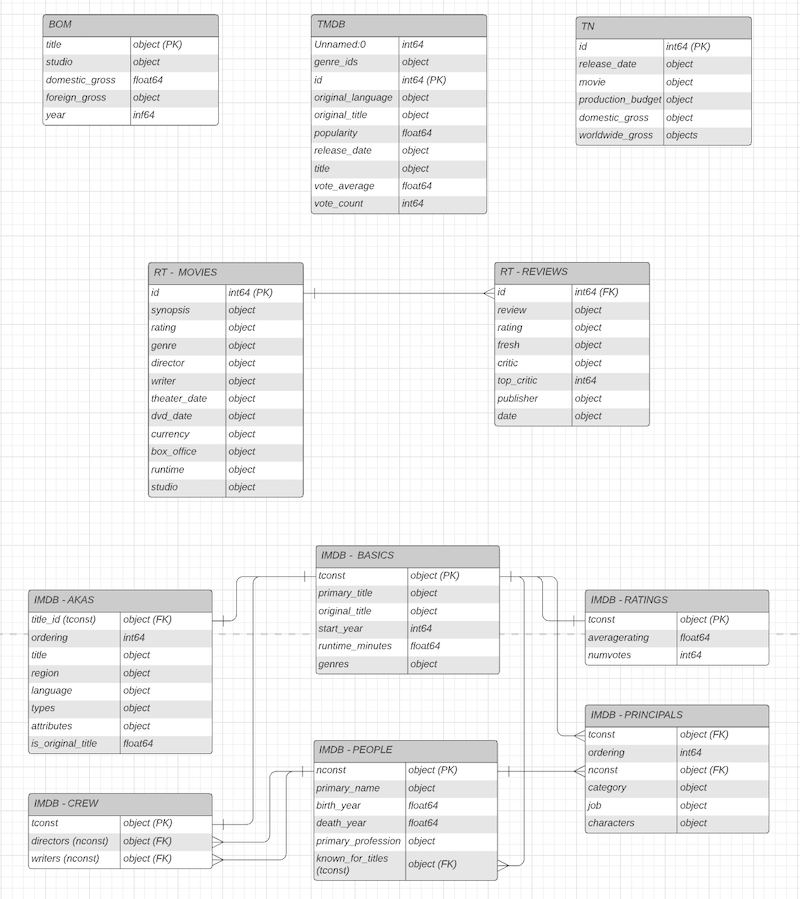

### Methodology

'zippedData' contains movie information from five different movie database websites.  They are Box Office Mojo, the Movie Database, the Numbers, Rotten Tomatoes, and IMDb.  Rotten Tomatoes and IMDb have multiple constituent databases with each focused on a different type of film data.  Each database contributes data of differing natures.  For example, Box Office Mojo and the Numbers databases contain financial data but not much else.  We have film genre data from the Movie Database, Rotten Tomatoes, and IMDb.  IMDb's six sub-databases have information regarding alternate titles, film crews, and more.     

Our main focus while examining the databases was recognizing potential movie classification and performance data.  Examples of classification data include the year of release, runtime, genre, the people and studio involved in creating the film, language, and budget.  Of the present classification data, we believe it is most useful to our client to focus on two specific classifications: **genre** and **film principals**.  Performance data was a more simple consideration.  We will measure a film's performance using **gross revenue** as well as **audience ratings**.    

We want to study how a film's classification affects its performance to discover which types of movies are the most profitable.  For the sake of time and efficiency, we will gather all perfomance data first.  There is no use classifying films when we cannot compare them in terms of performance.  We will then classify the films present in the performance data subset by genre and principals and see which classes of films do best in terms of revenue/ratings.   

### Database Clean Up

Before we can compile and analyze performance and classification data, we will prepare the databases by cleaning and preparing them for manipulation and analysis.  We will accomplish this by cleaning strings and numbers, casting data into the correct type, looking for and deleting exact duplicate film records, and dropping any unnecessary columns.  We will look for exact duplicates while discounting each database's primary key to give us the best chance of detection.

In [24]:
def remove_non_numbers(string):
    '''Removes all non-numeric characters (except decimals) from a string in preparation for 
    casting an object column into a float64 column'''
    if type(string) is str:
        return re.sub('[^0-9.]+', '', string)
    else:
        return string

In [25]:
#BOM Clean Up

#Cast Revenue and Date Columns
bom_df['foreign_gross'] = bom_df['foreign_gross'].map(remove_non_numbers)
bom_df['year'] = pd.to_datetime(bom_df['year'], format='%Y')
bom_df = bom_df.astype({'foreign_gross':'float64'})
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2037 non-null   float64       
 4   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 132.4+ KB


In [26]:
#Check BOM for Duplicate Records
bom_df[bom_df.duplicated()]

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []

In [27]:
#TMDB Clean Up

#tmdb_df['release_date'] = tmdb_df['release_date'].map(dateutil.parser.parse)
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

#drop unnecessary columns
tmdb_df.drop('Unnamed: 0', axis=1, inplace=True)


tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [28]:
#Check TMDB for Duplicate Records

tmdb_cols = list(tmdb_df.columns)
tmdb_cols.remove('id')

tmdb_df[tmdb_df[tmdb_cols].duplicated()]


genre_ids      id original_language  \
2473          [16, 35, 10751]     862                en   
2477          [16, 35, 10751]     863                en   
2536            [12, 28, 878]   20526                en   
2673              [18, 10749]   46705                en   
2717   [35, 18, 14, 27, 9648]   45649                en   
...                       ...     ...               ...   
26481                [35, 18]  270805                en   
26485                [27, 53]  453259                en   
26504            [27, 35, 27]  534282                en   
26510                    [99]  495045                en   
26511                    [99]  492837                en   

               original_title  popularity release_date  \
2473                Toy Story      28.005   1995-11-22   
2477              Toy Story 2      22.698   1999-11-24   
2536             TRON: Legacy      13.459   2010-12-10   
2673           Blue Valentine       8.994   2010-12-29   
2717                   Rubber       8.319   2010-09-01   
...                       ...         ...          ...   
26481           Summer League       0.600   2013-03-18   
26485  Devils in the Darkness       0.600   2013-05-15   
26504                    Head       0.600   2015-03-28   
26510              Fail State       0.600   2018-10-19   
26511       Making Filmmakers       0.600   2018-04-07   

                        title  vote_average  vote_count  
2473                Toy Story           7.9       10174  
2477              Toy Story 2           7.5        7553  
2536             TRON: Legacy           6.3        4387  
2673           Blue Valentine           6.9        1677  
2717                   Rubber           5.9         417  
...                       ...           ...         ...  
26481           Summer League           4.0           3  
26485  Devils in the Darkness           3.5           1  
26504                    Head           1.0           1  
26510              Fail State           0.0           1  
26511       Making Filmmakers           0.0           1  

[1020 rows x 9 columns]

In [29]:
#Remove TMDB Duplicates
tmdb_df = tmdb_df[~tmdb_df[tmdb_cols].duplicated()]
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [30]:
#create function to cleaning genre_ids column for later
def genre_string_to_tuple(genre_string):
    '''Function takes a string representation of a list of genre ids and casts it into a true list of ints'''
    genres = re.sub('[\[\]]','',genre_string).split(', ')     #strips leading and trailing brackets
    if len(genres[0]) != 0:                                   #if block turns string ids into ints
        genres = tuple(map(int,genres))
    else:
        genres = ()                                           #returns empty list if no genre ids are detected           
    return genres


In [31]:
#Clean TMDB Genre Ids -- String to list of ints
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].map(genre_string_to_tuple)


In [32]:
type(tmdb_df.genre_ids.iloc[0][0])

int

In [33]:
#TN Clean Up
for column in ['production_budget','domestic_gross','worldwide_gross']:
    tn_df[column] = tn_df[column].map(remove_non_numbers)

tn_df = tn_df.astype({'production_budget': 'float64', 'domestic_gross': 'float64', 'worldwide_gross': 'float64'})
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [34]:
#Check for TN Duplicates
tn_cols = list(tn_df.columns)
tn_cols.remove('id')

tn_df[tn_df[tn_cols].duplicated()]

Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross]
Index: []

In [35]:
#RT Movies Clean Up
rt_movies_df['theater_date'] = pd.to_datetime(rt_movies_df['theater_date'])
rt_movies_df['dvd_date'] = pd.to_datetime(rt_movies_df['dvd_date'])
rt_movies_df['box_office'] = rt_movies_df['box_office'].map(remove_non_numbers)
rt_movies_df = rt_movies_df.astype({'box_office':'float64'})
rt_movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   currency      340 non-null    object        
 9   box_office    340 non-null    float64       
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 146.4+ KB


In [36]:
#Check for RT duplicates
rt_cols = list(rt_movies_df.columns)
rt_cols.remove('id')
rt_movies_df[rt_movies_df[rt_cols].duplicated(keep=False)]


id                                           synopsis rating  \
10      17                                                NaN    NaN   
131    167                                                NaN    NaN   
573    743                                                NaN     NR   
923   1195                                                NaN     NR   
1245  1608  A group of air crash survivors are stranded in...  PG-13   
1362  1758  A group of air crash survivors are stranded in...  PG-13   
1543  1982                                                NaN    NaN   

                           genre director                    writer  \
10                           NaN      NaN                       NaN   
131                          NaN      NaN                       NaN   
573                        Drama      NaN                       NaN   
923                        Drama      NaN                       NaN   
1245  Action and Adventure|Drama      NaN  Edward Burns|Scott Frank   
1362  Action and Adventure|Drama      NaN  Edward Burns|Scott Frank   
1543                         NaN      NaN                       NaN   

     theater_date   dvd_date currency  box_office      runtime  \
10            NaT        NaT      NaN         NaN          NaN   
131           NaT        NaT      NaN         NaN          NaN   
573           NaT        NaT      NaN         NaN          NaN   
923           NaT        NaT      NaN         NaN          NaN   
1245   2004-12-17 2005-03-01        $  20900803.0  112 minutes   
1362   2004-12-17 2005-03-01        $  20900803.0  112 minutes   
1543          NaT        NaT      NaN         NaN          NaN   

                studio  
10                 NaN  
131                NaN  
573                NaN  
923                NaN  
1245  20th Century Fox  
1362  20th Century Fox  
1543               NaN

In [37]:
#Remove RT Duplciates
rt_movies_df.drop([10,131,573,923,1362,1543], inplace=True)
rt_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1554 non-null   int64         
 1   synopsis      1497 non-null   object        
 2   rating        1554 non-null   object        
 3   genre         1549 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1110 non-null   object        
 6   theater_date  1200 non-null   datetime64[ns]
 7   dvd_date      1200 non-null   datetime64[ns]
 8   currency      339 non-null    object        
 9   box_office    339 non-null    float64       
 10  runtime       1529 non-null   object        
 11  studio        493 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 157.8+ KB


In [38]:
#IMDB Basics Clean Up
imdb_basics_df['start_year'] = pd.to_datetime(imdb_basics_df['start_year'], format = '%Y')
imdb_basics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           146144 non-null  object        
 1   primary_title    146144 non-null  object        
 2   original_title   146123 non-null  object        
 3   start_year       146144 non-null  datetime64[ns]
 4   runtime_minutes  114405 non-null  float64       
 5   genres           140736 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 6.7+ MB


In [39]:
#Check for IMDB Basics Duplicates
imdb_cols = list(imdb_basics_df.columns)
imdb_cols.remove('tconst')
imdb_basics_df[imdb_basics_df[imdb_cols].duplicated()]



tconst                                      primary_title  \
948     tt10064536                        Untitled Disney Marvel Film   
949     tt10064558                               Untitled Marvel Film   
1478    tt10127292                        Plushtubers: The Apocalypse   
2231    tt10224422                                             Olanda   
2286    tt10230042                                 Rok Sako To Rok Lo   
...            ...                                                ...   
144016   tt9616952                                 View from the Past   
144392   tt9660588                                            3. Elma   
144622   tt9688944  Um fio de esperança: independência ou guerra n...   
145118   tt9773302                                            3. Elma   
145937   tt9889072                                        The Promise   

                                           original_title start_year  \
948                           Untitled Disney Marvel Film 2022-01-01   
949                                  Untitled Marvel Film 2021-01-01   
1478                          Plushtubers: The Apocalypse 2019-01-01   
2231                                               Olanda 2019-01-01   
2286                                   Rok Sako To Rok Lo 2018-01-01   
...                                                   ...        ...   
144016                                 View from the Past 2019-01-01   
144392                                            3. Elma 2014-01-01   
144622  Um fio de esperança: independência ou guerra n... 2017-01-01   
145118                                            3. Elma 2014-01-01   
145937                                        The Promise 2017-01-01   

        runtime_minutes            genres  
948                 NaN            Action  
949                 NaN            Action  
1478                NaN  Action,Adventure  
2231              154.0       Documentary  
2286                NaN            Comedy  
...                 ...               ...  
144016              NaN            Sci-Fi  
144392             65.0             Drama  
144622             94.0       Documentary  
145118             65.0             Drama  
145937              NaN             Drama  

[122 rows x 6 columns]

In [40]:
#Remove IMDB Basics Duplicates
imdb_basics_df = imdb_basics_df[~imdb_basics_df[imdb_cols].duplicated()]
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146022 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tconst           146022 non-null  object        
 1   primary_title    146022 non-null  object        
 2   original_title   146001 non-null  object        
 3   start_year       146022 non-null  datetime64[ns]
 4   runtime_minutes  114342 non-null  float64       
 5   genres           140627 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.8+ MB


### Rotten Tomatoes Title Scrape

The Rotten Tomatoes databases, in their present form, lack title data.  Without it, the only alternative is to analyze the databases on their own as it is not possible to associate its contents with the data contained in the other databases.  We find this unnacceptable and will attempt to scrape title data from the web using the information present in the database.  Our process involves scraping a film's title from the google search results of the included film's synopsis data.  The total scraping process was done in 17 batches as Google restricts users to a certain amount of searches per time period. For the most part, the title scrape was successful with only 14% of searches failing to return a film's title.

In [41]:
#Title Scrape Function
def scrape_rt_titles(num_titles):
    '''Function scrapes google search results for movie titles using synopsis data. Takes int input specifying
    desired number of titles to scrape. Opens and saves list to pickle object for repeated scrapings.  Some
    string cleaning present.'''
    
    #Deserialize title list from pickle storage
    with open('rt_titles.pickle', 'rb') as handle:
        rt_titles = pickle.load(handle)
        
    start_index = rt_titles[0]
    end_index = start_index + num_titles
    title_list = list(rt_titles[1])
    
    #Iterate through synopses and scrape google for titles. 
    for index, synopsis in enumerate(rt_movies_df['synopsis'][start_index:end_index]):
        print("Scraping Title", str(index+1), 'of', str(num_titles))
        url_prefix = 'https://www.google.com/search?q='
        url_query = synopsis.replace('\'', '').replace(' ','+')
        #print(url_prefix+url_query)
        #url_suffix = '&as_sitesearch=rottentomatoes.com'  #not working as desired
        html_page = requests.get(url_prefix+url_query)
        soup = BeautifulSoup(html_page.content, 'html.parser')
        search_results = soup.findAll('div', class_='BNeawe vvjwJb AP7Wnd')
        #print(search_results)

        match_list = []
        for result in search_results:
            #print(result.text)

            if result.text.endswith('Rotten Tomatoes'):
                if result.text.find('(') == -1:
                    match_list.append(result.text)
                    #print('No Title Parenthesis')
                else:
                    match_list.append(result.text[:result.text.index('(')-1])
                    #print('Title Parenthesis')
                    #break

        if len(match_list) == 0:
            title_list.append(np.nan)
            print('Failed Scraping.')
        else:
            title_list.append(match_list[0])
            print('Success. Title:', match_list[0])
        
        print('------------------------------')
        time.sleep(.5)  #To avoid overrequesting google
        
    
    
    rt_titles[0] = end_index
    rt_titles[1] = title_list
    print(end_index)
    
    #Serialize title list to pickle storage for future use
    with open('rt_titles.pickle', 'wb') as handle:
        pickle.dump(rt_titles, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [42]:
#Removing records with null synopses
rt_movies_titles_df = rt_movies_df[rt_movies_df['synopsis'].notna()]
#rt_movies_titles_df.head()
rt_movies_titles_df = rt_movies_titles_df.reset_index().drop('index',axis=1)
rt_movies_titles_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1497 non-null   int64         
 1   synopsis      1497 non-null   object        
 2   rating        1497 non-null   object        
 3   genre         1494 non-null   object        
 4   director      1322 non-null   object        
 5   writer        1097 non-null   object        
 6   theater_date  1197 non-null   datetime64[ns]
 7   dvd_date      1197 non-null   datetime64[ns]
 8   currency      339 non-null    object        
 9   box_office    339 non-null    float64       
 10  runtime       1484 non-null   object        
 11  studio        492 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 140.5+ KB


In [47]:
#Initialize rt title list and serialize
rt_titles = [0,[]]
with open('rt_titles.pickle', 'wb') as handle:
    pickle.dump(rt_titles, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [48]:
#First RT Scrape
scrape_rt_titles(100)

Scraping Title 1 of 100
Success. Title: The French Connection
------------------------------
Scraping Title 2 of 100
Success. Title: Cosmopolis
------------------------------
Scraping Title 3 of 100
Success. Title: Grace of My Heart
------------------------------
Scraping Title 4 of 100
Success. Title: Disclosure
------------------------------
Scraping Title 5 of 100
Success. Title: My Dog Skip
------------------------------
Scraping Title 6 of 100
Success. Title: Orange County
------------------------------
Scraping Title 7 of 100
Success. Title: Jindabyne
------------------------------
Scraping Title 8 of 100
Success. Title: Love Ranch
------------------------------
Scraping Title 9 of 100
Success. Title: Congo
------------------------------
Scraping Title 10 of 100
Success. Title: Tough Guys
------------------------------
Scraping Title 11 of 100
Failed Scraping.
Scraping Title 12 of 100
Failed Scraping.
Scraping Title 13 of 100
Success. Title: Meet Wally Sparks
--------------------

In [43]:
#17th and Last Scrape
scrape_rt_titles(78)

Scraping Title 1 of 78
Failed Scraping.
------------------------------
Scraping Title 2 of 78
Success. Title: Bye Bye Africa
------------------------------
Scraping Title 3 of 78
Failed Scraping.
------------------------------
Scraping Title 4 of 78
Success. Title: Household Saints
------------------------------
Scraping Title 5 of 78
Failed Scraping.
------------------------------
Scraping Title 6 of 78
Failed Scraping.
------------------------------
Scraping Title 7 of 78
Success. Title: The Green Hornet
------------------------------
Scraping Title 8 of 78
Failed Scraping.
------------------------------
Scraping Title 9 of 78
Failed Scraping.
------------------------------
Scraping Title 10 of 78
Success. Title: The Luzhin Defence
------------------------------
Scraping Title 11 of 78
Failed Scraping.
------------------------------
Scraping Title 12 of 78
Failed Scraping.
------------------------------
Scraping Title 13 of 78
Success. Title: The Star
------------------------------
S

KeyboardInterrupt: 

In [43]:
with open('rt_titles.pickle', 'rb') as handle:
    rt_titles = pickle.load(handle)

In [44]:
rt_movies_titles_df['title'] = rt_titles[1]
rt_movies_titles_df.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   8  The year is 1942. As the Allies unite overseas...     PG   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                Drama|Kids and Family       Jay Russell   

                            writer theater_date   dvd_date currency  \
0                   Ernest Tidyman   1971-10-09 2001-09-25      NaN   
1     David Cronenberg|Don DeLillo   2012-08-17 2013-01-01        $   
2                   Allison Anders   1996-09-13 2000-04-18      NaN   
3  Paul Attanasio|Michael Crichton   1994-12-09 1997-08-27      NaN   
4                  Gail Gilchriest   2000-03-03 2000-07-11      NaN   

   box_office      runtime                 studio                  title  
0         NaN  104 minutes                    NaN  The French Connection  
1    600000.0  108 minutes      Entertainment One             Cosmopolis  
2         NaN  116 minutes                    NaN      Grace of My Heart  
3         NaN  128 minutes                    NaN             Disclosure  
4         NaN   95 minutes  Warner Bros. Pictures            My Dog Skip

In [45]:
rt_movies_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1497 non-null   int64         
 1   synopsis      1497 non-null   object        
 2   rating        1497 non-null   object        
 3   genre         1494 non-null   object        
 4   director      1322 non-null   object        
 5   writer        1097 non-null   object        
 6   theater_date  1197 non-null   datetime64[ns]
 7   dvd_date      1197 non-null   datetime64[ns]
 8   currency      339 non-null    object        
 9   box_office    339 non-null    float64       
 10  runtime       1484 non-null   object        
 11  studio        492 non-null    object        
 12  title         1301 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 152.2+ KB


In [46]:
#Remove RT records with null title information
rt_movies_titles_df = rt_movies_titles_df[rt_movies_titles_df['title'].notna()]
rt_movies_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1496
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1301 non-null   int64         
 1   synopsis      1301 non-null   object        
 2   rating        1301 non-null   object        
 3   genre         1299 non-null   object        
 4   director      1154 non-null   object        
 5   writer        955 non-null    object        
 6   theater_date  1041 non-null   datetime64[ns]
 7   dvd_date      1041 non-null   datetime64[ns]
 8   currency      279 non-null    object        
 9   box_office    279 non-null    float64       
 10  runtime       1290 non-null   object        
 11  studio        408 non-null    object        
 12  title         1301 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 142.3+ KB


### Identification Standardization

With film data coming from multiple sources, it will be necessary to match movie data across databases for the sake of completeness. This will involve finding data common to all databases like film title and somehow standardizing them for comparison.  In this process, we will need to overcome obstacles like film reboots and different films with the same name.  For each film record, we will clean the its title and combine it with its respective release date data to create an *identification tuple*.  This tuple will be used to match and combine film records.  

Ideally, we want to include the most exact date information possible in order to give the identification tuples the most matching and discerning power.  All databases, except two, have full release dates.  BOM and IMDb only include the year of release, however, and to remain able to match film records in these two, we can only use year data in the identification tuples.  After creating the tuples, we will check for duplicate tuples. We will delete both duplicates to prevent confusing joins when we combine databases.    

In [47]:
#Detect Non alphas in titles
[title for title in tn_df['movie'] if len(re.findall('[^a-zA-z0-9 ]',title)) > 0]


['Pirates of the Caribbean: On Stranger Tides',
 'Avengers: Age of Ultron',
 'Star Wars Ep. VIII: The Last Jedi',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 'Solo: A Star Wars Story',
 'Spider-Man 3',
 'Captain America: Civil War',
 'Batman v Superman: Dawn of Justice',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Half-Blood Prince',
 'The Hobbit: The Desolation of Smaug',
 'The Hobbit: The Battle of the Five Armies',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest',
 'The Chronicles of Narnia: Prince Caspian',
 'The Amazing Spider-Man',
 'Transformers: The Last Knight',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'X-Men: The Last Stand',
 'Rogue One: A Star Wars Story',
 'Spider-Man 2',
 'X-Men: Days of Future Past',
 'The Amazing Spider-Man 2',
 'Tron: Legacy',
 'Fantastic Beasts: The Crimes of Grinde

In [48]:
#String Cleaning Function for title comparison
def string_cleaner(string):
    '''Function standardizations strings for comparison.  It takes a string and returns a clean string.'''
    if type(string) is str:
        string = ftfy.fix_text(string)                      #fix text unicode encoding issues
        string = string.lower()                             #standardize case
        string = re.sub('&', 'and', string)                 #replace & with and
        string = re.sub('(-| - )', ' ', string)             #replace hypens with spaces
        string = re.sub('\(.*\d{4}.*\)','',string).strip()  #remove year data in titles
        #string = re.sub('[^a-zA-Z0-9 ]','',string)          #remove special characters
        string = re.sub(' +',' ',string).strip()            #get rid of multiple spaces and replace with a single space
    
    return string

#def make_i_tuple(row):
#    '''Takes a movie dataframe and creates and inserts an identification tuple in a new column.'''
#    return (string_cleaner(row['title']),row['year'].year)


In [49]:
#Test to see which string cleaning methods return the most matches
sum(bom_df['title'].map(string_cleaner).isin(tn_df['movie'].map(string_cleaner)))

1468

In [50]:
#BOM i tuple creation
bom_df['i_tuple'] = bom_df.apply(lambda x: (string_cleaner(x['title']),x['year'].year), axis=1)
bom_df.head()


title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross       year                                            i_tuple  
0    652000000.0 2010-01-01                                (toy story 3, 2010)  
1    691300000.0 2010-01-01                        (alice in wonderland, 2010)  
2    664300000.0 2010-01-01  (harry potter and the deathly hallows part 1, ...  
3    535700000.0 2010-01-01                                  (inception, 2010)  
4    513900000.0 2010-01-01                        (shrek forever after, 2010)

In [51]:
#Check BOM i_tuple value counts
num_bom_duplicates = sum(bom_df['i_tuple'].value_counts() > 1)
print('Number BOM duplicate titles:', num_bom_duplicates)
list_bom_duplicates = bom_df['i_tuple'].value_counts()[:num_bom_duplicates]
print('Total BOM duplicate films:', sum(list_bom_duplicates))
list_bom_duplicates

Number BOM duplicate titles: 0
Total BOM duplicate films: 0


Series([], Name: i_tuple, dtype: int64)

In [52]:
#TN i tuple creation
tn_df['i_tuple'] = tn_df.apply(lambda x: (string_cleaner(x['movie']),x['release_date'].year), axis=1)
tn_df.head()

id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  \
0        425000000.0     760507625.0     2.776345e+09   
1        410600000.0     241063875.0     1.045664e+09   
2        350000000.0      42762350.0     1.497624e+08   
3        330600000.0     459005868.0     1.403014e+09   
4        317000000.0     620181382.0     1.316722e+09   

                                             i_tuple  
0                                     (avatar, 2009)  
1  (pirates of the caribbean: on stranger tides, ...  
2                               (dark phoenix, 2019)  
3                    (avengers: age of ultron, 2015)  
4          (star wars ep. viii: the last jedi, 2017)

In [53]:
#Check tn i tuple value counts
num_tn_duplicates = sum(tn_df['i_tuple'].value_counts() > 1)
print('Number TN duplicates titles:', num_tn_duplicates)
list_tn_duplicates = tn_df['i_tuple'].value_counts()[:num_tn_duplicates]
print('Total TN Duplicate Films:',sum(list_tn_duplicates))
list_tn_duplicates

Number TN duplicates titles: 1
Total TN Duplicate Films: 2


(home, 2009)    2
Name: i_tuple, dtype: int64

In [54]:
#Check duplicate i tuple records
tn_df[tn_df['i_tuple'] == ('home',2009)]

id release_date movie  production_budget  domestic_gross  \
3455  56   2009-06-05  Home         12000000.0             0.0   
5459  60   2009-04-23  Home           500000.0         15433.0   

      worldwide_gross       i_tuple  
3455              0.0  (home, 2009)  
5459       44793168.0  (home, 2009)

In [55]:
#Delete identical i tuple records that refer to different films
tn_df = tn_df[~(tn_df['i_tuple'] == ('home',2009))]

In [56]:
#RT i tuple creation
rt_movies_titles_df['i_tuple'] = rt_movies_titles_df.apply(lambda x: (string_cleaner(x['title']),x['theater_date'].year), axis=1)
rt_movies_titles_df.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   8  The year is 1942. As the Allies unite overseas...     PG   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                Drama|Kids and Family       Jay Russell   

                            writer theater_date   dvd_date currency  \
0                   Ernest Tidyman   1971-10-09 2001-09-25      NaN   
1     David Cronenberg|Don DeLillo   2012-08-17 2013-01-01        $   
2                   Allison Anders   1996-09-13 2000-04-18      NaN   
3  Paul Attanasio|Michael Crichton   1994-12-09 1997-08-27      NaN   
4                  Gail Gilchriest   2000-03-03 2000-07-11      NaN   

   box_office      runtime                 studio                  title  \
0         NaN  104 minutes                    NaN  The French Connection   
1    600000.0  108 minutes      Entertainment One             Cosmopolis   
2         NaN  116 minutes                    NaN      Grace of My Heart   
3         NaN  128 minutes                    NaN             Disclosure   
4         NaN   95 minutes  Warner Bros. Pictures            My Dog Skip   

                         i_tuple  
0  (the french connection, 1971)  
1             (cosmopolis, 2012)  
2      (grace of my heart, 1996)  
3             (disclosure, 1994)  
4            (my dog skip, 2000)

In [57]:
#Check rt i tuple value counts
num_rt_duplicates = sum(rt_movies_titles_df['i_tuple'].value_counts() > 1)
print('Number RT duplicates titles:', num_rt_duplicates)
list_rt_duplicates = rt_movies_titles_df['i_tuple'].value_counts()[:num_rt_duplicates]
print('Total RT Duplicate Films:',sum(list_rt_duplicates))
list_rt_duplicates

Number RT duplicates titles: 0
Total RT Duplicate Films: 0


Series([], Name: i_tuple, dtype: int64)

The following two databases, TMDB and IMDb, each have two title columns.  In each, we will see which title column returns the most matches in the other databases and use that column as our primary title data.  We will use the secondary title data to fill out missing data in the primary title column.

In [58]:
title_cols = [tmdb_df['original_title'],tmdb_df['title'],imdb_basics_df['primary_title'],imdb_basics_df['original_title'],bom_df['title'],tn_df['movie'],rt_movies_titles_df['title']]

#Find number of TMDB original title matches
tmdb_original_num_matches = 0
for ser in title_cols[2:]:
    num_matches = sum(tmdb_df['original_title'].isin(ser))
    print(ser.name+':',num_matches)
    tmdb_original_num_matches += num_matches
    
print('TMDB Original Matches:', tmdb_original_num_matches,'\n')

#Find number of TMDB title matches
tmdb_num_matches = 0
for ser in title_cols[2:]:
    num_matches = sum(tmdb_df['title'].isin(ser))
    print(ser.name+':',num_matches)
    tmdb_num_matches += num_matches
    
print('TMDB Matches:', tmdb_num_matches,'\n')

#Find number of IMDB primary title matches
imdb_primary_num_matches = 0
for ser in title_cols[:2]+title_cols[4:]:
    num_matches = sum(imdb_basics_df['primary_title'].isin(ser))
    print(ser.name+':',num_matches)
    imdb_primary_num_matches += num_matches
    
print('IMDB Primary Matches:', imdb_primary_num_matches,'\n')

#Find number of IMDB primary title matches
imdb_original_num_matches = 0
for ser in title_cols[:2]+title_cols[4:]:
    num_matches = sum(imdb_basics_df['original_title'].isin(ser))
    print(ser.name+':',num_matches)
    imdb_original_num_matches += num_matches
    
print('IMDB Original Matches:', imdb_original_num_matches,'\n')


primary_title: 14298
original_title: 14840
title: 2059
movie: 2068
title: 216
TMDB Original Matches: 33481 

primary_title: 15726
original_title: 14590
title: 2456
movie: 2126
title: 241
TMDB Matches: 35139 

original_title: 17910
title: 19537
title: 3362
movie: 3602
title: 556
IMDB Primary Matches: 44967 

original_title: 17850
title: 17589
title: 2774
movie: 3354
title: 469
IMDB Original Matches: 42036 



Our numbers shows that the best title column for TMDB is 'title' and that the best title column for IMDB is 'primary'.  Both of these columns have no null values and therefore require no further action.

In [59]:
#TMDB i tuple creation
tmdb_df['i_tuple'] = tmdb_df.apply(lambda x: (string_cleaner(x['title']),x['release_date'].year), axis=1)
tmdb_df.head()


genre_ids     id original_language  \
0      (12, 14, 10751)  12444                en   
1  (14, 12, 16, 10751)  10191                en   
2        (12, 28, 878)  10138                en   
3      (16, 35, 10751)    862                en   
4        (28, 878, 12)  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  \
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788   
1                      How to Train Your Dragon           7.7        7610   
2                                    Iron Man 2           6.8       12368   
3                                     Toy Story           7.9       10174   
4                                     Inception           8.3       22186   

                                             i_tuple  
0  (harry potter and the deathly hallows: part 1,...  
1                   (how to train your dragon, 2010)  
2                                 (iron man 2, 2010)  
3                                  (toy story, 1995)  
4                                  (inception, 2010)

In [60]:
#Check tmdb i_tuple value counts
num_tmdb_duplicates = sum(tmdb_df['i_tuple'].value_counts() > 1)
print('Number TMDB duplicate titles:', num_tmdb_duplicates)
list_tmdb_duplicates = tmdb_df['i_tuple'].value_counts()[:num_tmdb_duplicates]
print('Total TMDB Duplicate Films:',sum(list_tmdb_duplicates))
list_tmdb_duplicates

Number TMDB duplicate titles: 98
Total TMDB Duplicate Films: 202


(the box, 2018)       5
(solitary, 2016)      3
(home, 2016)          3
(split, 2016)         3
(riot, 2015)          2
                     ..
(redemption, 2013)    2
(final exam, 2016)    2
(revolution, 2013)    2
(serenade, 2012)      2
(lucky, 2011)         2
Name: i_tuple, Length: 98, dtype: int64

In [61]:
tmdb_df[tmdb_df['i_tuple']==list_tmdb_duplicates.index[1]]

genre_ids      id original_language original_title  popularity  \
19356     (99,)  390751                en       Solitary       0.840   
19719     (18,)  399104                en       Solitary       0.635   
20524     (18,)  425864                en       Solitary       0.600   

      release_date     title  vote_average  vote_count           i_tuple  
19356   2016-04-16  Solitary           7.3           3  (solitary, 2016)  
19719   2016-05-31  Solitary          10.0           1  (solitary, 2016)  
20524   2016-01-01  Solitary           3.0           1  (solitary, 2016)

While some of these duplicates, refer to the same film, many do not.  For simplicity, we will get rid of all the records with duplicate identification tuples.  We drop these records because our identification tuple cannot differentiate between the films and will lead to nasty joins when combining with other databases.

In [62]:
#Remove tmdb identical i tuple records 
for itup in list_tmdb_duplicates.index:
    tmdb_df = tmdb_df[tmdb_df['i_tuple'] != itup]

In [63]:
#IMDB i tuple creation
imdb_basics_df['i_tuple'] = imdb_basics_df.apply(lambda x: (string_cleaner(x['primary_title']),x['start_year'].year), axis=1)
imdb_basics_df.head()


tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

  start_year  runtime_minutes                genres  \
0 2013-01-01            175.0    Action,Crime,Drama   
1 2019-01-01            114.0       Biography,Drama   
2 2018-01-01            122.0                 Drama   
3 2018-01-01              NaN          Comedy,Drama   
4 2017-01-01             80.0  Comedy,Drama,Fantasy   

                                   i_tuple  
0                        (sunghursh, 2013)  
1  (one day before the rainy season, 2019)  
2       (the other side of the wind, 2018)  
3                  (sabse bada sukh, 2018)  
4         (the wandering soap opera, 2017)

In [64]:
#Check IMDB i tuple primary value counts
num_imdb_primary_duplicates = sum(imdb_basics_df['i_tuple'].value_counts() > 1)
print('Number IMDB primary duplicates titles:', num_imdb_primary_duplicates)
list_imdb_primary_duplicates = imdb_basics_df['i_tuple'].value_counts()[:num_imdb_primary_duplicates]
print('Total IMDB primary Duplicate Films:',sum(list_imdb_primary_duplicates))
list_imdb_primary_duplicates

Number IMDB primary duplicates titles: 1868
Total IMDB primary Duplicate Films: 3918


(split, 2016)             6
(inside out, 2011)        5
(home, 2015)              4
(maya, 2015)              4
(gone, 2011)              4
                         ..
(zoe, 2018)               2
(alena, 2015)             2
(this is me, 2015)        2
(two idiots, 2016)        2
(the red thread, 2016)    2
Name: i_tuple, Length: 1868, dtype: int64

In [65]:
imdb_basics_df[imdb_basics_df['i_tuple'] == list_imdb_primary_duplicates.index[0]]

tconst primary_title original_title start_year  runtime_minutes  \
44850   tt2660118         Split          Split 2016-01-01             90.0   
56771   tt3315656         Split          Split 2016-01-01            127.0   
62683   tt3604256         Split          Split 2016-01-01              NaN   
85877   tt4972582         Split          Split 2016-01-01            117.0   
94303   tt5495666         Split          Split 2016-01-01             80.0   
105165  tt6147768         Split          Split 2016-01-01            123.0   

                      genres        i_tuple  
44850   Comedy,Romance,Sport  (split, 2016)  
56771          Drama,Fantasy  (split, 2016)  
62683                  Crime  (split, 2016)  
85877        Horror,Thriller  (split, 2016)  
94303                  Drama  (split, 2016)  
105165    Action,Drama,Sport  (split, 2016)

In this case, the duplicate identification tuples all refer to different films.  We will drop these 3918 records which comprises of about 3% of the total database.

In [66]:
#Remove IMDB identical i tuple records
for itup in list_imdb_primary_duplicates.index:
    imdb_basics_df = imdb_basics_df[imdb_basics_df['i_tuple'] != itup]


### Film Performance

#### Gross Revenue

Three of the databases (Box Office Mojo, the Numbers, and Rotten Tomatoes) contain gross revenue data for a collection of films.  Box Office Mojo and the Numbers contain both domestic and foreign gross information whereas Rotten Tomatoes only contains domestic gross data.  To consolidate this information, we will remove null information, operate on, and rename the necessary columns before concatenating the databases.  Our goal is to obtain a combined revenue database with domestic and foreign gross information by implementing an outer join on the three databases.  

For movies with gross revenue information in more than one database, we will operate within a system of data prioritization.  Information in the Numbers database will trump the same data in the other two databases because it contains more exact revenue information.  In the same vein, data from the Box Office Mojo database will supercede the same data in the Rotten Tomatoes database but this time because of completeness.  A film will only have Rotten Tomatoes data in the consolidated revenue database if it does not have any data in the other two databases.

In [67]:
#Copy BOM database and trim non financial information
bom_money_df = bom_df.copy()[['i_tuple','domestic_gross','foreign_gross']]
bom_money_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   i_tuple         3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   float64
dtypes: float64(2), object(1)
memory usage: 79.5+ KB


In [68]:
#Detecting BOM records with null domestic AND foreign data
bom_money_df[(bom_money_df['domestic_gross'].isna())&(bom_money_df['foreign_gross'].isna())]

Empty DataFrame
Columns: [i_tuple, domestic_gross, foreign_gross]
Index: []

In [69]:
#Copy TN database and trim non financial information
tn_money_df = tn_df.copy()[['i_tuple','domestic_gross','worldwide_gross']]
tn_money_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5780 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   i_tuple          5780 non-null   object 
 1   domestic_gross   5780 non-null   float64
 2   worldwide_gross  5780 non-null   float64
dtypes: float64(2), object(1)
memory usage: 180.6+ KB


In [70]:
#Create Foreign gross column from present revenue data
tn_money_df['foreign_gross'] = tn_money_df['worldwide_gross'] - tn_money_df['domestic_gross']
tn_money_df = tn_money_df[['i_tuple','domestic_gross','foreign_gross']]
tn_money_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5780 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   i_tuple         5780 non-null   object 
 1   domestic_gross  5780 non-null   float64
 2   foreign_gross   5780 non-null   float64
dtypes: float64(2), object(1)
memory usage: 180.6+ KB


In [71]:
#Copy RT database and trim non financial information
rt_money_df = rt_movies_titles_df.copy()[['i_tuple','box_office']]
rt_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1496
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i_tuple     1301 non-null   object 
 1   box_office  279 non-null    float64
dtypes: float64(1), object(1)
memory usage: 30.5+ KB


In [72]:
#rename RT box_office to domestic_gross
rt_money_df.rename({'box_office':'domestic_gross'}, inplace=True, axis=1)

#remove RT null revenue information
rt_money_df = rt_money_df[rt_money_df['domestic_gross'].notna()]
rt_money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 1 to 1492
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   i_tuple         279 non-null    object 
 1   domestic_gross  279 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.5+ KB


In [73]:
#Outer Join all three revenue database

#TN and BOM Join
gross_revenue_df = tn_money_df.merge(bom_money_df, how='outer', on='i_tuple', suffixes=('_tn','_bom'))

#TN/BOM and RT Join
gross_revenue_df = gross_revenue_df.merge(rt_money_df, how='outer', on='i_tuple')

#Rename Rt Domestic Gross Column
gross_revenue_df.rename({'domestic_gross':'domestic_gross_rt'},axis=1,inplace=True)
gross_revenue_df.head()

i_tuple  domestic_gross_tn  \
0                                     (avatar, 2009)        760507625.0   
1  (pirates of the caribbean: on stranger tides, ...        241063875.0   
2                               (dark phoenix, 2019)         42762350.0   
3                    (avengers: age of ultron, 2015)        459005868.0   
4          (star wars ep. viii: the last jedi, 2017)        620181382.0   

   foreign_gross_tn  domestic_gross_bom  foreign_gross_bom  domestic_gross_rt  
0      2.015838e+09                 NaN                NaN                NaN  
1      8.046000e+08         241100000.0        804600000.0                NaN  
2      1.070000e+08                 NaN                NaN                NaN  
3      9.440081e+08         459000000.0        946400000.0                NaN  
4      6.965404e+08                 NaN                NaN                NaN

In [74]:
gross_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7825 entries, 0 to 7824
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i_tuple             7825 non-null   object 
 1   domestic_gross_tn   5780 non-null   float64
 2   foreign_gross_tn    5780 non-null   float64
 3   domestic_gross_bom  3359 non-null   float64
 4   foreign_gross_bom   2037 non-null   float64
 5   domestic_gross_rt   279 non-null    float64
dtypes: float64(5), object(1)
memory usage: 427.9+ KB


In [75]:
#Create Functions for combining domestic and foreign revenue data

def combine_domestic_revenue_data(row):
    '''Takes a dataframe row and determines domestic gross from potential revenue values'''
    #domestic gross if block
    if not np.isnan(row['domestic_gross_tn']):
        domestic_gross = row['domestic_gross_tn']
    elif not np.isnan(row['domestic_gross_bom']):
        domestic_gross = row['domestic_gross_bom']
    else:
        domestic_gross = row['domestic_gross_rt']
    
    return domestic_gross
        
    
def combine_foreign_revenue_data(row):
    '''Takes a dataframe row and determines foreign gross from potential revenue values'''
    #foreign gross if block
    if not np.isnan(row['foreign_gross_tn']):
        foreign_gross = row['foreign_gross_tn']
    else:
        foreign_gross = row['foreign_gross_bom']
        
    return foreign_gross



In [76]:
#Combine revenue data in database using above functions
gross_revenue_df['domestic_gross'] = gross_revenue_df.apply(combine_domestic_revenue_data, axis=1)
gross_revenue_df['foreign_gross'] = gross_revenue_df.apply(combine_foreign_revenue_data, axis=1)

gross_revenue_df.head()


i_tuple  domestic_gross_tn  \
0                                     (avatar, 2009)        760507625.0   
1  (pirates of the caribbean: on stranger tides, ...        241063875.0   
2                               (dark phoenix, 2019)         42762350.0   
3                    (avengers: age of ultron, 2015)        459005868.0   
4          (star wars ep. viii: the last jedi, 2017)        620181382.0   

   foreign_gross_tn  domestic_gross_bom  foreign_gross_bom  domestic_gross_rt  \
0      2.015838e+09                 NaN                NaN                NaN   
1      8.046000e+08         241100000.0        804600000.0                NaN   
2      1.070000e+08                 NaN                NaN                NaN   
3      9.440081e+08         459000000.0        946400000.0                NaN   
4      6.965404e+08                 NaN                NaN                NaN   

   domestic_gross  foreign_gross  
0     760507625.0   2.015838e+09  
1     241063875.0   8.046000e+08  
2      42762350.0   1.070000e+08  
3     459005868.0   9.440081e+08  
4     620181382.0   6.965404e+08

In [271]:
#Create total revenue column
gross_revenue_df['total_gross'] = gross_revenue_df['domestic_gross'].fillna(0) + gross_revenue_df['foreign_gross'].fillna(0)
gross_revenue_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7825 entries, 0 to 7824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i_tuple             7825 non-null   object 
 1   domestic_gross_tn   5780 non-null   float64
 2   foreign_gross_tn    5780 non-null   float64
 3   domestic_gross_bom  3359 non-null   float64
 4   foreign_gross_bom   2037 non-null   float64
 5   domestic_gross_rt   279 non-null    float64
 6   domestic_gross      7799 non-null   float64
 7   foreign_gross       6587 non-null   float64
 8   total_gross         7825 non-null   float64
dtypes: float64(8), object(1)
memory usage: 611.3+ KB


In [280]:
#Calculate Average and Standard deviation of Gross Revenue Dataframe
gross_revenue_df.describe()



domestic_gross_tn  foreign_gross_tn  domestic_gross_bom  \
count       5.780000e+03      5.780000e+03        3.359000e+03   
mean        4.188781e+07      4.962355e+07        2.874585e+07   
std         6.824796e+07      1.131369e+08        6.698250e+07   
min         0.000000e+00      0.000000e+00        1.000000e+02   
25%         1.430601e+06      0.000000e+00        1.200000e+05   
50%         1.723457e+07      5.701766e+06        1.400000e+06   
75%         5.236457e+07      4.683770e+07        2.790000e+07   
max         9.366622e+08      2.015838e+09        9.367000e+08   

       foreign_gross_bom  domestic_gross_rt  domestic_gross  foreign_gross  \
count       2.037000e+03       2.790000e+02    7.799000e+03   6.587000e+03   
mean        7.487281e+07       3.667274e+07    3.249353e+07   4.782105e+07   
std         1.374106e+08       5.543798e+07    6.364786e+07   1.113874e+08   
min         6.000000e+02       3.630000e+02    0.000000e+00   0.000000e+00   
25%         3.700000e+06       1.712664e+06    1.930000e+05   1.871000e+03   
50%         1.870000e+07       1.390000e+07    6.276869e+06   5.600000e+06   
75%         7.490000e+07       4.461655e+07    3.788018e+07   4.341667e+07   
max         9.605000e+08       3.680000e+08    9.367000e+08   2.015838e+09   

        total_gross  
count  7.825000e+03  
mean   7.264081e+07  
std    1.601516e+08  
min    0.000000e+00  
25%    6.450000e+05  
50%    1.360111e+07  
75%    6.954864e+07  
max    2.776345e+09

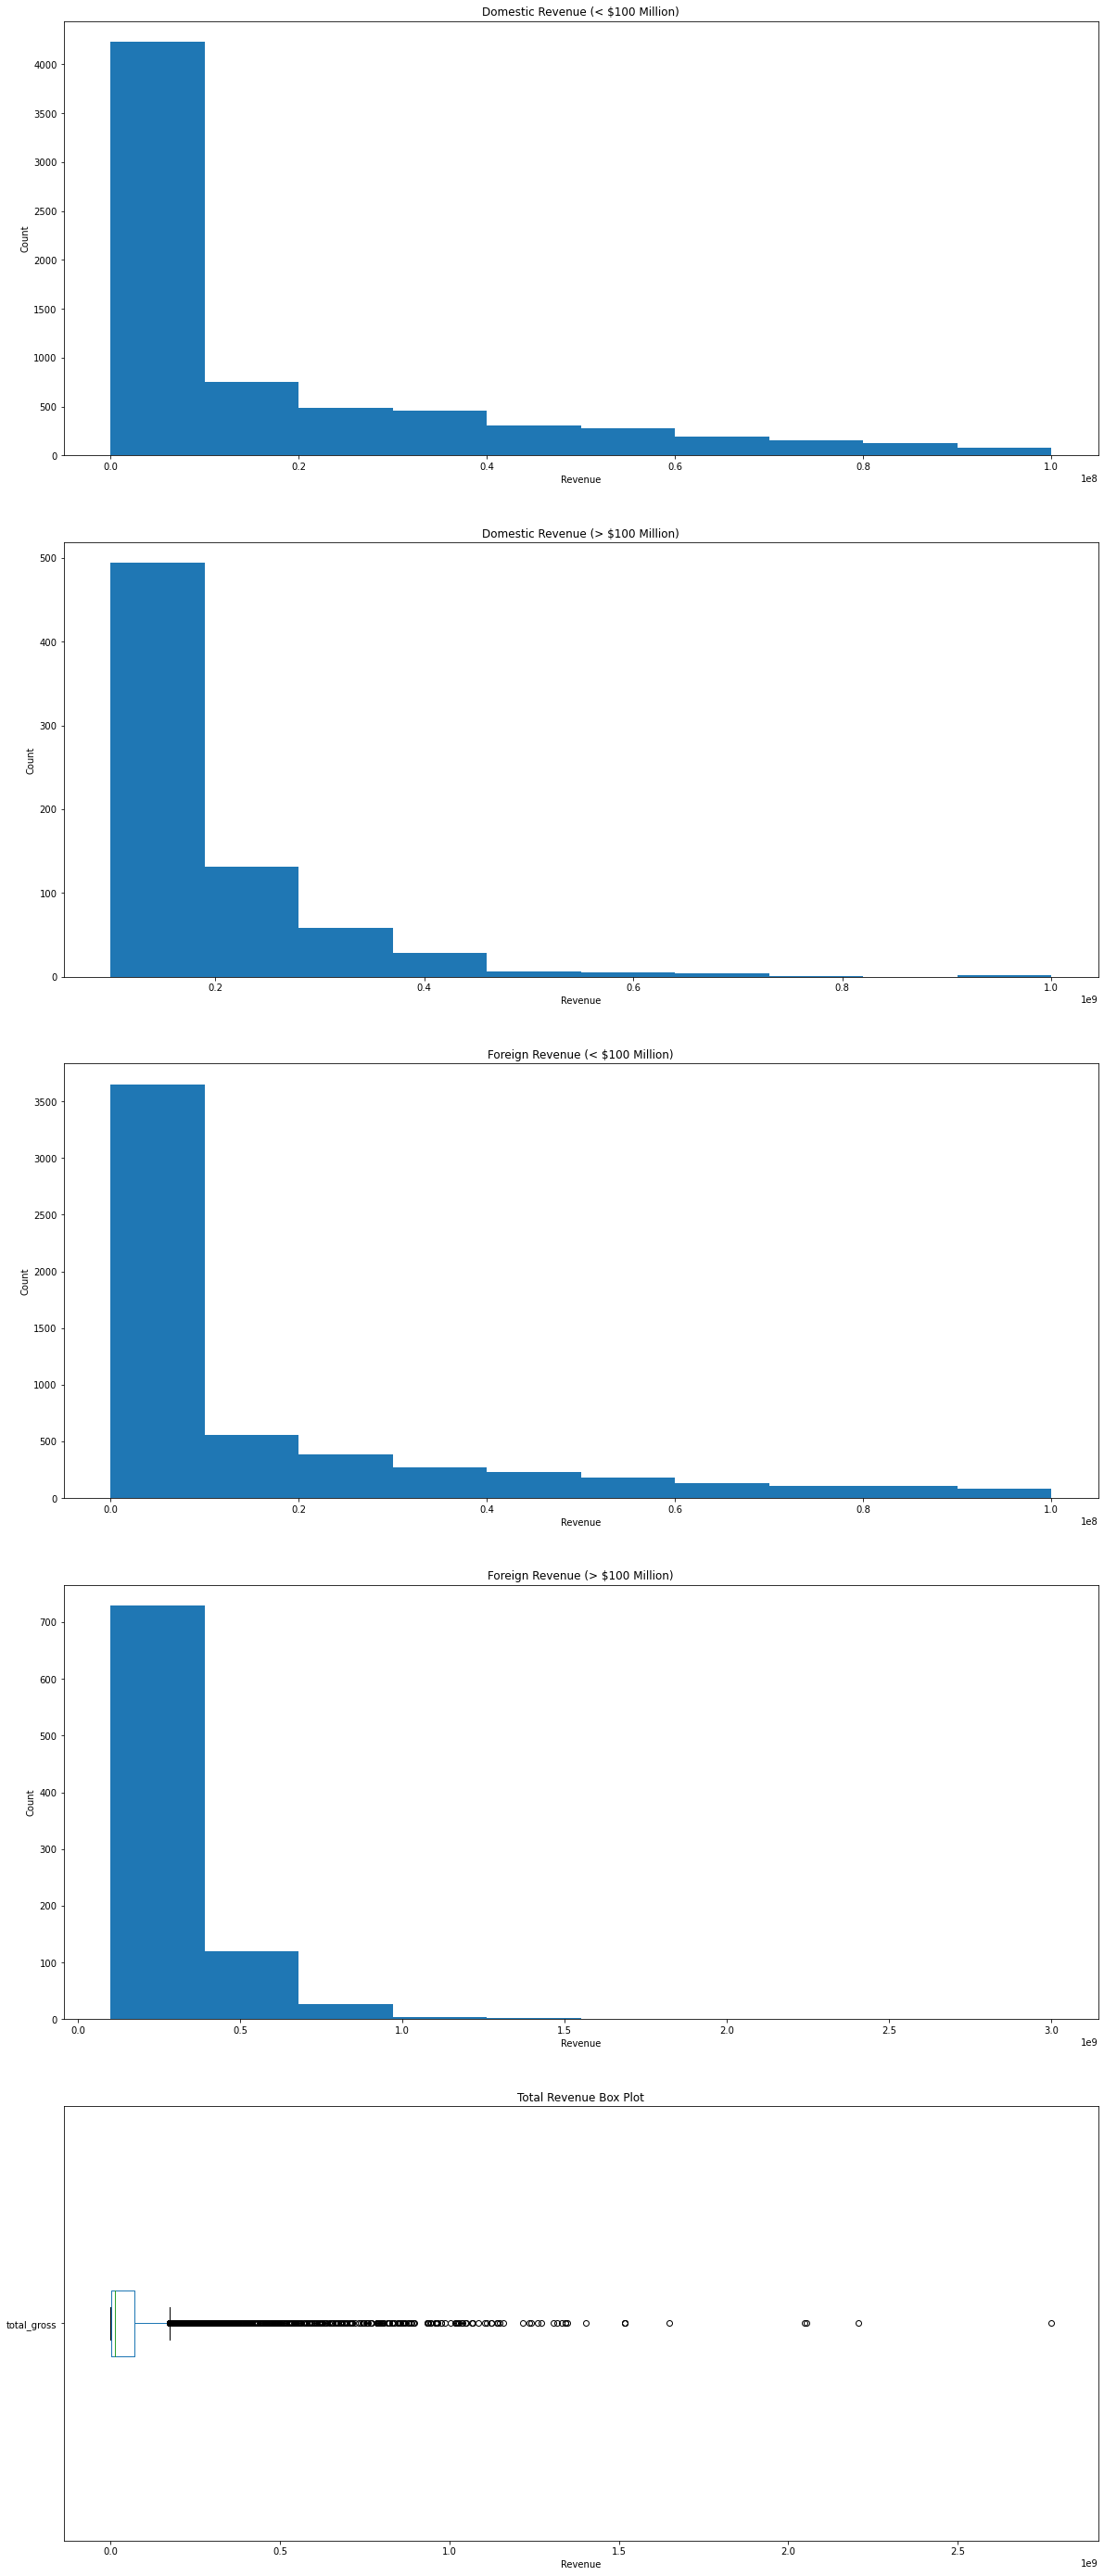

In [284]:
#Generate Revenue Histograms
revenue_fig, (dom_ax, dom_ax_high, for_ax, for_ax_high, total_ax) = plt.subplots(5,1,figsize=(20,50))

gross_revenue_df['domestic_gross'].plot(kind='hist',ax=dom_ax, range=(0,1e8))
dom_ax.set_xlabel('Revenue')
dom_ax.set_ylabel('Count')
dom_ax.set_title('Domestic Revenue (< $100 Million)')

gross_revenue_df['domestic_gross'].plot(kind='hist',ax=dom_ax_high, range=(1e8,1e9))
dom_ax_high.set_xlabel('Revenue')
dom_ax_high.set_ylabel('Count')
dom_ax_high.set_title('Domestic Revenue (> $100 Million)')

gross_revenue_df['foreign_gross'].plot(kind='hist',ax=for_ax, range=(0,1e8))
for_ax.set_xlabel('Revenue')
for_ax.set_ylabel('Count')
for_ax.set_title('Foreign Revenue (< $100 Million)')

gross_revenue_df['foreign_gross'].plot(kind='hist',ax=for_ax_high, range=(1e8,3e9))
for_ax_high.set_xlabel('Revenue')
for_ax_high.set_ylabel('Count')
for_ax_high.set_title('Foreign Revenue (> $100 Million)')

gross_revenue_df['total_gross'].plot(kind='box',ax=total_ax,vert=False)
total_ax.set_xlabel('Revenue')
total_ax.set_title('Total Revenue Box Plot')

plt.show()



In [274]:
#Print Top Grossing Films
print('Top 10 Highest Grossing Films - Domestic Revenue')
print(gross_revenue_df.sort_values(by='domestic_gross',ascending=False).head(20)[['i_tuple','domestic_gross']],'\n')
print('Top 10 Highest Grossing Films - Foreign Revenue')
print(gross_revenue_df.sort_values(by='foreign_gross',ascending=False).head(20)[['i_tuple','foreign_gross']],'\n')
print('Top 10 Highest Grossing Films - Total Revenue')
print(gross_revenue_df.sort_values(by='total_gross',ascending=False).head(20)[['i_tuple','total_gross']],'\n')


Top 10 Highest Grossing Films - Domestic Revenue
                                           i_tuple  domestic_gross
6802          (star wars: the force awakens, 2015)     936700000.0
5     (star wars ep. vii: the force awakens, 2015)     936662225.0
0                                   (avatar, 2009)     760507625.0
41                           (black panther, 2018)     700059566.0
6                   (avengers: infinity war, 2018)     678815482.0
42                                 (titanic, 1997)     659363944.0
33                          (jurassic world, 2015)     652270625.0
6131                 (marvel's the avengers, 2012)     623400000.0
26                            (the avengers, 2012)     623279547.0
7367              (star wars: the last jedi, 2017)     620200000.0
4        (star wars ep. viii: the last jedi, 2017)     620181382.0
43                           (incredibles 2, 2018)     608581744.0
74                         (the dark knight, 2008)     533720947.0
44           

Our combined reveue database contains information for just under 8000 films.  We generated summary statistics and visualizations for domestic, foreign, and total revenue.  The majority of films have domestic and foreign revenues under \\$10M dollars.  This is supported by the fact that median domestic and foreign revenues are \\$6.3M and \\$5.6M respectively.  Not unexpectedly, we see that both our revenue distributions are heavily skewed right with our mean domestic and foreign revenues being \\$32.5M and \\$47.8M, respectively.  To further illustrate the highly skewed nature of our revenue distributions, our bottom 75\% of total film revenues lies in a range (\\$70M) that is less than 3\% of the range (\\$2.7B) in which our top 25\% of total film revenue lies! 

After sorting our revenue database, we attempted to detect any trends or themes.  We see giant blockbuster films like *Avatar*, *Titanic*, and *Jurassic World* finish near the top of our all rankings.  Next, we noticed that the Marvel Cinematic Universe (MCU) films dominate our revenue rankings.  In terms of total revenue, four of the top ten highest grossing films are MCU films.  Additionally, while three MCU films show up in both the top ten domestic and foreign rankings, the MCU films finish higher domestically which indicates that they do better in the US.  In a similar vein, the Star Wars film franchise do better domestically.  Films that do better internationally include the *Fast and Furious*, the *Harry Potter*, and the *James Bond* film franchises.

A final thing to note is that we see that our identification tuple treatment (title manipulation) is definitely not perfect.  We have films show up multiple times in our database which means our treatment did not recognize that they were the same film.  With this in mind, we have to take our statistics with a grain of salt as some films are overrepresented.  We will leave more accurate string cleaning and matching for a future effort.




#### Film Ratings

Similar to our film revenue data, our film ratings' information comes from three databases: IMDb, TMDB, and Rotten Tomatoes.  The film rating data in both IMDb and TMDB come the same format.  For these databases, film records include an average viewer rating score (out of 10) and the number of viewer ratings recorded.  Ratings data in Rotten Tomatoes, however, is much less standardardized.  Film ratings in this database are scored in on a variety of scales.  Some are numerical out of scales of 4,5, and 10.  Others are letter grades.   

Unlike our treatment of the film revenue data, where the presence of a film's revenue record in one database allowed us to discount its presence in the other two, we will assume that the databases have polled mutually exclusive audiences.  Therefore, we will gather the ratings data from all three sources (if present in multiple databases) and create an average of some sort.  Combining IMDb and TMDB data should be simple enough because of the similarity in scale and format.  We will need to standardize the Rotten Tomatoes data before we can fold it into the data from the other two database.  A film's average rating will include weighting for the number of votes/grades a film has.  Additional value will be given to grades with a higher number of votes. We will consider other methods of weighting as well.

In [78]:
#RT Title and Reviews Database Join
rt_ratings_df = rt_movies_titles_df[['id','i_tuple']].merge(rt_reviews_df[['id','rating']], on='id', how='inner')

#Remove Null Rating Records
rt_ratings_df = rt_ratings_df[rt_ratings_df['rating'].notna()]

#Drop 'id' column
rt_ratings_df.drop('id',axis=1,inplace=True)
rt_ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 0 to 44548
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   i_tuple  33550 non-null  object
 1   rating   33550 non-null  object
dtypes: object(2)
memory usage: 786.3+ KB


In [79]:
#RT Ratings Cleaner Function
grade_dict = {'A+':9.33,'A':8.67,'A-':8,'B+':7.33,'B':6.67,'B-':6,'C+':5.33,'C':4.67,'C-':4,'D+':3.33,'D':2.67,'D-':2,'F+':1.33,'F':0.67,'F-':0}

def clean_rt_ratings(string):
    '''Function takes a string representation of a rating and standardizes
    the rating in preparation for comparison.'''
    grade = str(string)
    
    #Grades with '/' if block
    if re.search('/',grade):
        paren_index = grade.find('/')
        numerator = float(grade[:paren_index])
        denominator = float(grade[paren_index+1:])
        std_grade = (10*numerator)/denominator
    
    #Letter Grades if block
    elif re.search('[A-Za-z]{1}[+-]?',grade):
        if grade in grade_dict.keys():
            std_grade = grade_dict[grade]
        else:
            std_grade = np.nan
    
    else:
        std_grade = float(grade)
    
    return std_grade


In [80]:
#Detect abnormal rating formats
rt_ratings_df[rt_ratings_df['rating'].str.contains(' ')]

i_tuple rating
43115  (the green hornet, 2011)  3 1/2

In [81]:
#Manually Change these abnormal ratings
rt_ratings_df.loc[43115,'rating'] = 3.5

In [82]:
#Map Grade cleaner Function to RT ratings
rt_ratings_df['std_rating'] = rt_ratings_df['rating'].map(clean_rt_ratings)

#Remove records with null std_ratings
rt_ratings_df = rt_ratings_df[rt_ratings_df['std_rating'].notna()]
rt_ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33544 entries, 0 to 44548
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i_tuple     33544 non-null  object 
 1   rating      33544 non-null  object 
 2   std_rating  33544 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [83]:
#Group Ratings by Film
grouped_rt_ratings = rt_ratings_df.groupby('i_tuple')

#Calculate Average Rating for each film
grouped_rt_average_rating_df = pd.DataFrame(grouped_rt_ratings.mean())

#Calculate Number Ratings for each film
grouped_rt_number_votes_df = pd.DataFrame(grouped_rt_ratings.size())


In [84]:
#Grouped RT ratings Dataframe
grouped_rt_ratings_df = grouped_rt_average_rating_df.merge(grouped_rt_number_votes_df,on='i_tuple')
grouped_rt_ratings_df.rename({'std_rating':'vote_average_rt',0:'vote_count_rt'},axis=1,inplace=True)
grouped_rt_ratings_df.reset_index(inplace=True)

#Round average rating column to 2 decimal places
grouped_rt_ratings_df['vote_average_rt'] = round(grouped_rt_ratings_df['vote_average_rt'],2)
grouped_rt_ratings_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   i_tuple          957 non-null    object 
 1   vote_average_rt  957 non-null    float64
 2   vote_count_rt    957 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 22.6+ KB


In [85]:
#IMDb Title and Ratings Database Join
imdb_ratings_wtuples_df = imdb_ratings_df.merge(imdb_basics_df[['tconst','i_tuple']], on='tconst', how='inner')

#Trim IMDb Non ratings Data
imdb_ratings_wtuples_df = imdb_ratings_wtuples_df[['i_tuple','averagerating','numvotes']]

#Rename columns for readability
imdb_ratings_wtuples_df.rename({'averagerating':'vote_average','numvotes':'vote_count'},axis=1,inplace=True)
imdb_ratings_wtuples_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 71824 entries, 0 to 71823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   i_tuple       71824 non-null  object 
 1   vote_average  71824 non-null  float64
 2   vote_count    71824 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [86]:
#TMDB Ratings Dataframe Creation
tmdb_ratings_df = tmdb_df[['i_tuple','vote_average','vote_count']]
tmdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25295 entries, 0 to 26516
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   i_tuple       25295 non-null  object 
 1   vote_average  25295 non-null  float64
 2   vote_count    25295 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 790.5+ KB


In [87]:
#IMDB and TMDB Ratings Outer Join
ratings_df = imdb_ratings_wtuples_df.merge(tmdb_ratings_df,on='i_tuple',how='outer',suffixes=['_imdb','_tmdb'])

#IMDB/TMDB and RT Ratings Outer Join
ratings_df = ratings_df.merge(grouped_rt_ratings_df,on='i_tuple',how='outer')

#Fill all NaNs with 0 in preparation for combining ratings info
ratings_df.fillna(0,inplace=True)
ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86167 entries, 0 to 86166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   i_tuple            86167 non-null  object 
 1   vote_average_imdb  86167 non-null  float64
 2   vote_count_imdb    86167 non-null  float64
 3   vote_average_tmdb  86167 non-null  float64
 4   vote_count_tmdb    86167 non-null  float64
 5   vote_average_rt    86167 non-null  float64
 6   vote_count_rt      86167 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


In [88]:
#Calculate Total Vote Number
ratings_df['total_votes'] = ratings_df['vote_count_imdb'] + ratings_df['vote_count_tmdb'] + ratings_df['vote_count_rt']

#Calculate Combined Vote Average
ratings_df['vote_average'] = round((ratings_df['vote_average_imdb']*ratings_df['vote_count_imdb'] + ratings_df['vote_average_tmdb']*ratings_df['vote_count_tmdb'] + ratings_df['vote_average_rt']*ratings_df['vote_count_rt'])/ratings_df['total_votes'],2)
ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86167 entries, 0 to 86166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   i_tuple            86167 non-null  object 
 1   vote_average_imdb  86167 non-null  float64
 2   vote_count_imdb    86167 non-null  float64
 3   vote_average_tmdb  86167 non-null  float64
 4   vote_count_tmdb    86167 non-null  float64
 5   vote_average_rt    86167 non-null  float64
 6   vote_count_rt      86167 non-null  float64
 7   total_votes        86167 non-null  float64
 8   vote_average       86167 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.6+ MB


In [89]:
#Cast Total Votes to int64
ratings_df = ratings_df.astype({'total_votes':'int64'})
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86167 entries, 0 to 86166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   i_tuple            86167 non-null  object 
 1   vote_average_imdb  86167 non-null  float64
 2   vote_count_imdb    86167 non-null  float64
 3   vote_average_tmdb  86167 non-null  float64
 4   vote_count_tmdb    86167 non-null  float64
 5   vote_average_rt    86167 non-null  float64
 6   vote_count_rt      86167 non-null  float64
 7   total_votes        86167 non-null  int64  
 8   vote_average       86167 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 6.6+ MB


We will experiment with two methods of weighting for the film ratings.  Generally speaking, we want to penalize films with lower numbers of votes as we are less certain of average ratings calculated from smaller samples.  The first method we use will be based on computing a 99% confidence interval (z interval) for each film rating and taking its lower bound as each film's rating.  The lower the number of votes, the wider the interval, the bigger the penalty.  The second method of weighting simply involves multiplying a film's number of votes by its average rating.  This method really rewards films with large numbers of votes to the point where vote number basically overwhelms each film's average rating where the confidence interval method gives more weight to a film's average rating.  It will be interesting to compare the two weighting results.


In [91]:
#Calculate average rating for all films
(ratings_df['total_votes']*ratings_df['vote_average']).sum()/ratings_df['total_votes'].sum()


6.897801828886346

In [94]:
#Estimate Population Variance for Lower Bound Confidence Interval Mean Weighting

#Compile pseudo population vote list
all_vote_list = []

for i in range(86167):
    #print(i)
    all_vote_list.extend([ratings_df.loc[i,'vote_average']]*ratings_df.loc[i,'total_votes'])


In [95]:
#Calculate vote population standard deviation
vote_omega = np.sqrt(pd.Series(all_vote_list).var())
vote_omega

0.9876198029684015

In [96]:
#Create Lower Bound CI weighted mean column for vote average
ratings_df['vote_average_CIwtd'] = round(ratings_df['vote_average'] - 1.96*(vote_omega/np.sqrt(ratings_df['total_votes'])),2)
ratings_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 86167 entries, 0 to 86166
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   i_tuple             86167 non-null  object 
 1   vote_average_imdb   86167 non-null  float64
 2   vote_count_imdb     86167 non-null  float64
 3   vote_average_tmdb   86167 non-null  float64
 4   vote_count_tmdb     86167 non-null  float64
 5   vote_average_rt     86167 non-null  float64
 6   vote_count_rt       86167 non-null  float64
 7   total_votes         86167 non-null  int64  
 8   vote_average        86167 non-null  float64
 9   vote_average_CIwtd  86167 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.7+ MB


In [97]:
#Create Num Votes weighted mean column for vote average
ratings_df['vote_average_numwtd'] = ratings_df['vote_average']*ratings_df['total_votes']
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86167 entries, 0 to 86166
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i_tuple              86167 non-null  object 
 1   vote_average_imdb    86167 non-null  float64
 2   vote_count_imdb      86167 non-null  float64
 3   vote_average_tmdb    86167 non-null  float64
 4   vote_count_tmdb      86167 non-null  float64
 5   vote_average_rt      86167 non-null  float64
 6   vote_count_rt        86167 non-null  float64
 7   total_votes          86167 non-null  int64  
 8   vote_average         86167 non-null  float64
 9   vote_average_CIwtd   86167 non-null  float64
 10  vote_average_numwtd  86167 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 10.4+ MB


In [232]:
#Calculate mean/std/med information of ratings df
ratings_df.describe()

vote_average_imdb  vote_count_imdb  vote_average_tmdb  vote_count_tmdb  \
count       86167.000000     8.616700e+04       86167.000000     86167.000000   
mean            5.279638     2.938607e+03           1.755331        52.428459   
std             2.717796     2.789857e+04           2.904550       501.389233   
min             0.000000     0.000000e+00           0.000000         0.000000   
25%             4.300000     7.000000e+00           0.000000         0.000000   
50%             6.100000     2.800000e+01           0.000000         0.000000   
75%             7.200000     1.880000e+02           4.200000         1.000000   
max            10.000000     1.841066e+06          10.000000     22186.000000   

       vote_average_rt  vote_count_rt   total_votes  vote_average  \
count     86167.000000   86167.000000  8.616700e+04  86167.000000   
mean          0.064834       0.389291  2.991425e+03      6.306134   
std           0.631859       5.651146  2.833946e+04      1.560264   
min           0.000000       0.000000  1.000000e+00      0.000000   
25%           0.000000       0.000000  1.000000e+01      5.400000   
50%           0.000000       0.000000  3.300000e+01      6.400000   
75%           0.000000       0.000000  2.030000e+02      7.300000   
max          15.000000     194.000000  1.863252e+06     15.000000   

       vote_average_CIwtd  vote_average_numwtd  
count         86167.00000         8.616700e+04  
mean              5.84790         2.063426e+04  
std               1.57666         2.144311e+05  
min              -1.94000         0.000000e+00  
25%               4.99000         6.240000e+01  
50%               6.06000         2.112000e+02  
75%               6.96000         1.128400e+03  
max              13.06000         1.637799e+07

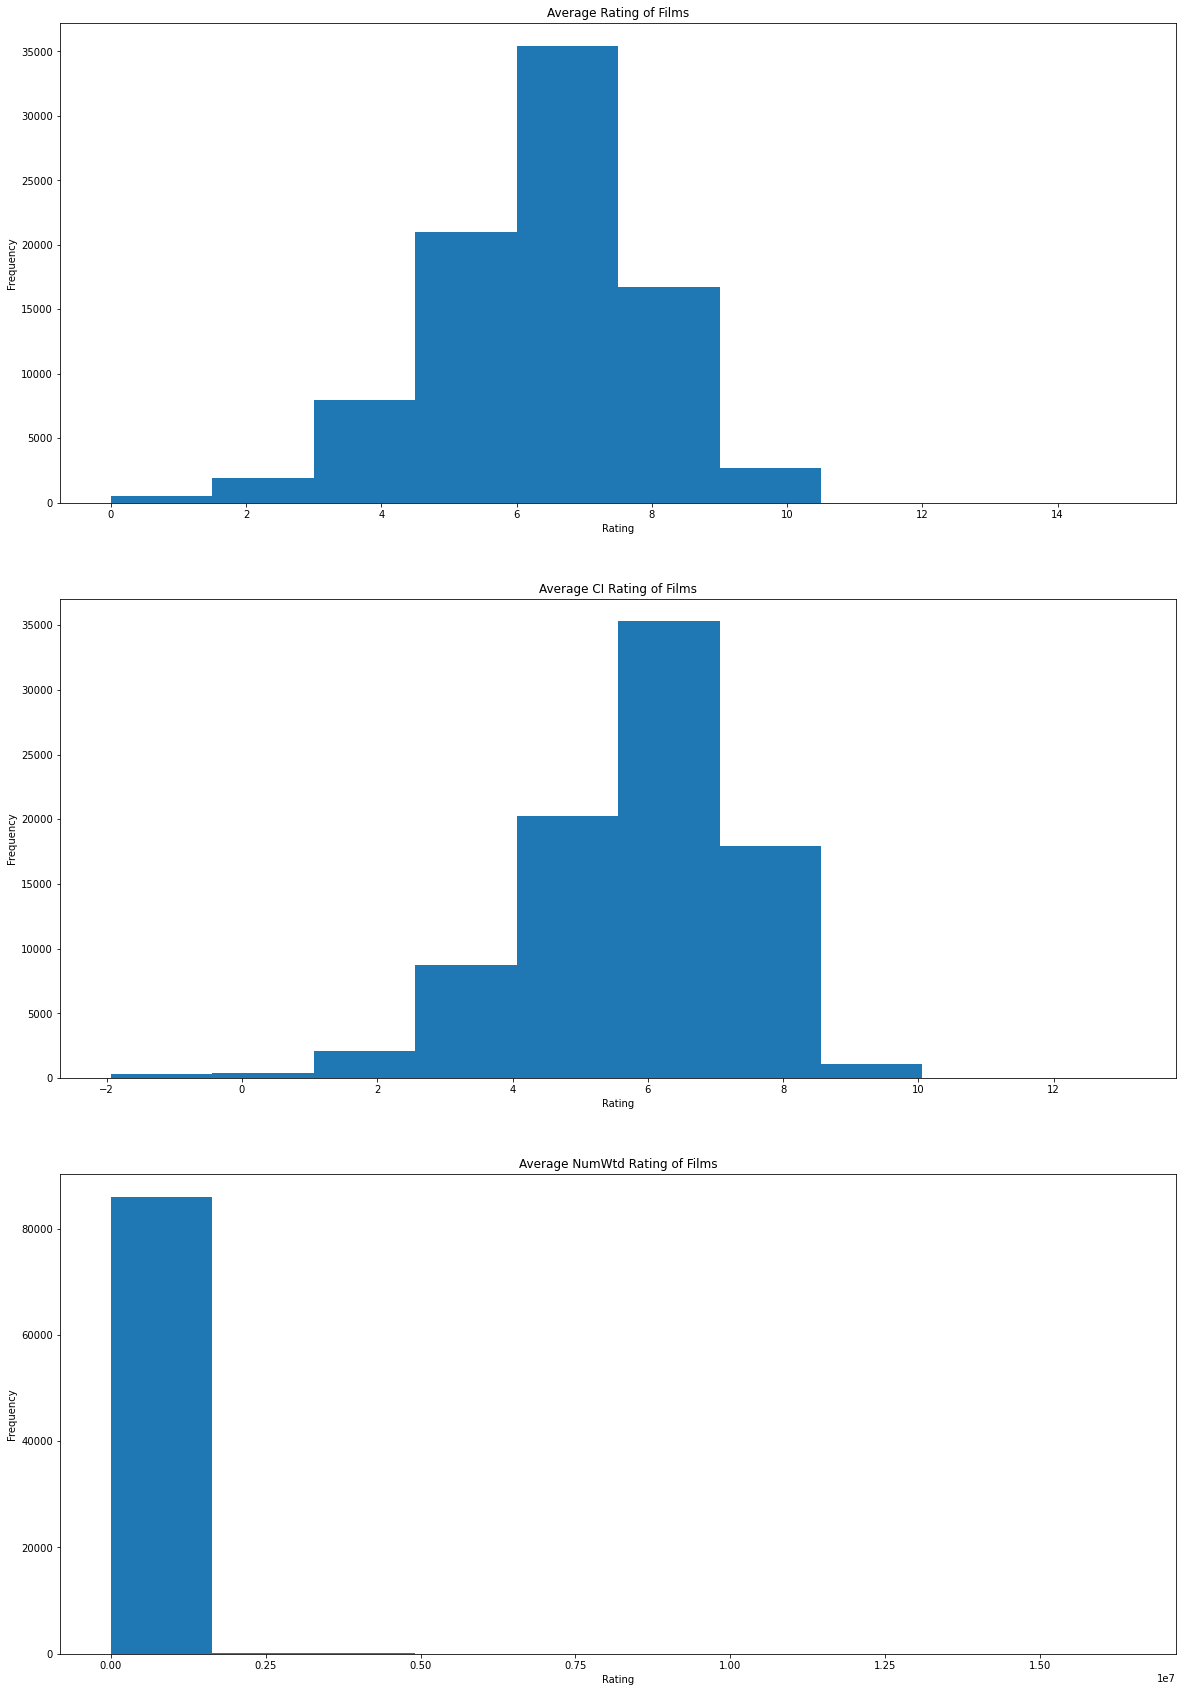

In [291]:
#Plot histogram of film ratings
ratings_fig, (avg_ax, ci_ax, num_ax) = plt.subplots(3,1,figsize=(20,30))

ratings_df['vote_average'].plot(kind='hist',ax=avg_ax)
avg_ax.set_xlabel('Rating')
avg_ax.set_title('Average Rating of Films')

ratings_df['vote_average_CIwtd'].plot(kind='hist',ax=ci_ax)
ci_ax.set_xlabel('Rating')
ci_ax.set_title('Average CI Rating of Films')

ratings_df['vote_average_numwtd'].plot(kind='hist',ax=num_ax)
num_ax.set_xlabel('Rating')
num_ax.set_title('Average NumWtd Rating of Films')

plt.show()



Text(0.5, 0, 'Number Votes')

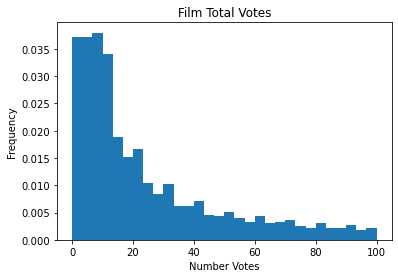

In [290]:
#PLot histogram of number of votes
ratings_df['total_votes'].plot.hist(range=(0,100),bins=30,density=True)
plt.title('Film Total Votes')
plt.xlabel('Number Votes')


In [277]:
#Print Ratings Rankings
# Avg Rating Rankings
print('Top Rated Films - Average Rating')
print(ratings_df[ratings_df['total_votes']>29].sort_values(by='vote_average',ascending=False).head(20)[['i_tuple','vote_average']],'\n')

# CI Weighted Avg Rating Rankings
print('Top Rated Films - CI Weighted Rating')
print(ratings_df[ratings_df['total_votes']>29].sort_values(by='vote_average_CIwtd',ascending=False).head(20)[['i_tuple','vote_average_CIwtd']],'\n')

# Num Weighted Avg Rating Rankings
print('Top Rated Films - Number Weighted Rating')
print(ratings_df[ratings_df['total_votes']>29].sort_values(by='vote_average_numwtd',ascending=False).head(20)[['i_tuple','vote_average_numwtd']],'\n')


Top Rated Films - Average Rating
                                             i_tuple  vote_average
44393                      (gini helida kathe, 2019)           9.9
5757           (rise: the story of augustines, 2018)           9.8
61409      (once upon a time ... in hollywood, 2019)           9.7
29129  (manry at sea ~ in the wake of a dream, 2018)           9.7
61693                  (soldiers without guns, 2019)           9.7
43121                                  (dosed, 2019)           9.7
20596                         (my darling son, 2018)           9.7
71750                              (eghantham, 2018)           9.7
52631                         (i want to live, 2015)           9.6
58186                       (trenches of rock, 2017)           9.6
19095                    (ananthu v/s nusrath, 2018)           9.6
3819               (yeh suhaagraat impossible, 2019)           9.6
26461                    (ekvtime: man of god, 2018)           9.6
63246                        

Our film ratings database contains information for over 86,000 films.  We generated summary statistics as well as histograms for total votes per film and for our three ratings metrics.  Our total votes histogram is expectedly skewed right with most of the films having less than 40 votes (median: 33 votes).  25\% of films have higher than 200 votes.  The outliers pull the mean number votes all the way up to 2990 votes.  The average rating and average confidence interval ratings histograms are mostly normal in shape with a slight left skew.  The summary statistcs for these two ratings are consistent with distribution shape as mean and median ratings are very similar.  Average rating of the films in our database is 6 out of 10 with our confidence interval weighted ratings being few tenths lower due to most films having low vote totals.  

Our volume weighted rating metric was a different story.  Because we folded our highly skewed right vote totals information into our average ratings info, this rating distribution was also highly skewed right.  Median rating in this case was 211 while our mean rating was 20600.  On their own, these ratings don't have much standalone value but do allow us to compare films relatively.  Films rated highly in this manner are films that have high vote totals and in turn high viewership.  This metric, in practice, filters for films with high vote totals first and then ranks the subset in terms of average rating second.

Next, we sorted our ratings database by each of our metrics to survey the rankings for any trends and similarities.  We restricted our attention to films with more than 30 votes.  In terms of our average film and confidence interval weighted ratings, our top rated films rankings are filled with foreign films.  Intuitively speaking, we need more analysis regarding the foreign film markets and rating behavior before we can make stronger conclusions to what type of films are best rated.  For the films we do recognize, we notice that the films, for the most part, were debuted at prestigious film festivals or were emotional documentaries (e.g. *Once Upon a Time in Hollywood*, *Rise: the Story of Augustines*, *One Note at a Time*).

We find that our volume weighted ratings rankings to be more interesting as they are more similar to our revenue rankings.  While MCU films also dominate these rankings, large film franchises are not as represented as compared to our revenue rankings.  Discounting the film franchises that are present in the rankings, we notice that the list contains visually grandiose and memorable films (*Inception* and *Mad Max: Fury Road*) as well as stories with outrageous and flamboyant characters (*Django Unchained* and *The Wolf of Wall Street*).  Interestingly enough, there seems to be a good representation of space films in these rankings (*Intersteller*, *Gravity*, and *The Martian*).  



### Film Classification

With film performance data compiled into two databases (revenue and ratings), we will now gather classification data for the records present in the performance databases.  Our means of film classification are by genre and by the involved principals. 

Three of our original databases, IMDb, TMDB, and Rotten Tomatoes, contain genre data.  Two databases, IMDB and Rotten Tomatoes, contain principal data.  We will be performing left joins between the performance databases and subsets of the genre and principal databases after cleaning the data.  Cleaning will involve standardizing different genre and principal formats.  We will only gather and clean genre and principal data for the films in the performance databases.  After the joins, we will unify the genre and principal data for each film in the performance databases as we prepare to analyze how a film's genres and principals affect its performance.  

One of the genre databases, the Movie Database, will require treatment before we can analyze its information.  The Movie Database has an API with extensive functionality.  We will use it to translate the genre data.  

#### Genre - Revenue


In [101]:
#TMDB Genres

#Get TMDB API key
def get_keys(path):
    '''Function takes file path of folder that contains the users TMDB API key
    and loads the key for usage with the API.'''
    
    with open(path) as f:
        return json.load(f)
    
keys = get_keys('/Users/johnnguyen/.secret/tmdb_api.json')

api_key = keys['api_key']

#Call TMDB API for Genre Dictionary
url = 'https://api.themoviedb.org/3/genre/movie/list?api_key='+api_key+'&language=en-US'
resp = requests.get(url)
genre_list = resp.json()['genres']
#genre_list

#Create Genre Translation Dictionary
genre_dict = {}
for dic in genre_list:
    genre_dict[dic['id']] = dic['name']

print(genre_dict)



{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [102]:
#Find i_tuples in both Gross Revenue DF and TMDB 
money_tmdb_tuples = set(gross_revenue_df['i_tuple']).intersection(set(tmdb_df['i_tuple']))

#Gather TMDB Genre data for films in Gross Revenue database
money_tmdb_genres_df = pd.DataFrame({'i_tuple':list(money_tmdb_tuples)}).merge(tmdb_df[['i_tuple','genre_ids']],how='left',on='i_tuple')
money_tmdb_genres_df.head()


i_tuple          genre_ids
0  (a better life, 2011)              (18,)
1       (repo men, 2010)  (28, 878, 53, 80)
2      (no escape, 2015)           (28, 53)
3        (rampage, 2018)  (28, 12, 878, 14)
4      (fair game, 2010)           (18, 53)

In [103]:
#Create Function to Translate tmdb genre_ids
def translate_genres(tup):
    '''Functions takes a tuple that represent a films genre and returns a tuple
    with its useful translation.'''
    genre_tup = tuple([genre_dict[id] for id in tup])
    return genre_tup

#Translate Genre IDs
money_tmdb_genres_df['genres'] = money_tmdb_genres_df['genre_ids'].map(translate_genres)
money_tmdb_genres_df.head()


i_tuple          genre_ids  \
0  (a better life, 2011)              (18,)   
1       (repo men, 2010)  (28, 878, 53, 80)   
2      (no escape, 2015)           (28, 53)   
3        (rampage, 2018)  (28, 12, 878, 14)   
4      (fair game, 2010)           (18, 53)   

                                          genres  
0                                       (Drama,)  
1     (Action, Science Fiction, Thriller, Crime)  
2                             (Action, Thriller)  
3  (Action, Adventure, Science Fiction, Fantasy)  
4                              (Drama, Thriller)

In [104]:
#IMDB Genres

#Find i_tuples in both Gross Revenue DF and IMDB
money_imdb_tuples = set(gross_revenue_df['i_tuple']).intersection(set(imdb_basics_df['i_tuple']))

#Gather IMDB Genre data for films in Gross Revenue database
money_imdb_genres_df = pd.DataFrame({'i_tuple':list(money_imdb_tuples)}).merge(imdb_basics_df[['i_tuple','genres']],how='left',on='i_tuple')
money_imdb_genres_df.head()



i_tuple                     genres
0   (repo men, 2010)        Action,Crime,Sci-Fi
1  (no escape, 2015)            Action,Thriller
2    (rampage, 2018)    Action,Adventure,Sci-Fi
3  (fair game, 2010)   Biography,Drama,Thriller
4    (catfish, 2010)  Documentary,Drama,Mystery

In [105]:
#Create Function to Format IMDb genres
def format_genres(string):
    '''Function takes a string representation of a film's genre and standardizes
    it for comparison.'''
    if type(string) == str:
        genre_list = string.split(',')
        if 'Sci-Fi' in genre_list:          #Format SciFi to match other genre databases
            scifi_index = genre_list.index('Sci-Fi')
            genre_list[scifi_index] = 'Science Fiction'               
        return tuple(genre_list)
    else:
        return string
    
#Format IMDB genre information
money_imdb_genres_df['genres'] = money_imdb_genres_df['genres'].map(format_genres)
money_imdb_genres_df.head()


i_tuple                                genres
0   (repo men, 2010)      (Action, Crime, Science Fiction)
1  (no escape, 2015)                    (Action, Thriller)
2    (rampage, 2018)  (Action, Adventure, Science Fiction)
3  (fair game, 2010)          (Biography, Drama, Thriller)
4    (catfish, 2010)         (Documentary, Drama, Mystery)

In [106]:
#RT Genres

#Find i_tuples in both Gross Revenue DF and RT
money_rt_tuples = set(gross_revenue_df['i_tuple']).intersection(set(rt_movies_titles_df['i_tuple']))

#Gather RT Genre data for films in Gross Revenue database
money_rt_genres_df = pd.DataFrame({'i_tuple':list(money_rt_tuples)}).merge(rt_movies_titles_df[['i_tuple','genre']],how='left',on='i_tuple')
money_rt_genres_df.head()


i_tuple  \
0                           (bandslam, 2009)   
1                            (skyfall, 2012)   
2                              (agora, 2010)   
3                (from dusk till dawn, 1996)   
4  (final fantasy: the spirits within, 2001)   

                                               genre  
0           Comedy|Drama|Musical and Performing Arts  
1          Action and Adventure|Mystery and Suspense  
2  Action and Adventure|Art House and Internation...  
3                  Drama|Horror|Mystery and Suspense  
4              Animation|Science Fiction and Fantasy

In [107]:
#Create Function to Format rt genres
def format_rt_genres(string):
    '''Function takes a string representation of a film's genre and standardizes
    it for comparison.'''
    if type(string) == str:
        split_list = tuple(string.split('|'))
        split_list_by_and = [genre.split(' and ') for genre in split_list]
        return tuple([genre for paired_genre in split_list_by_and for genre in paired_genre ])
    else:
        return np.nan
    
#Format RT Genre data
money_rt_genres_df['genres'] = money_rt_genres_df['genre'].map(format_rt_genres)
money_rt_genres_df.head()


i_tuple  \
0                           (bandslam, 2009)   
1                            (skyfall, 2012)   
2                              (agora, 2010)   
3                (from dusk till dawn, 1996)   
4  (final fantasy: the spirits within, 2001)   

                                               genre  \
0           Comedy|Drama|Musical and Performing Arts   
1          Action and Adventure|Mystery and Suspense   
2  Action and Adventure|Art House and Internation...   
3                  Drama|Horror|Mystery and Suspense   
4              Animation|Science Fiction and Fantasy   

                                              genres  
0          (Comedy, Drama, Musical, Performing Arts)  
1             (Action, Adventure, Mystery, Suspense)  
2  (Action, Adventure, Art House, International, ...  
3                 (Drama, Horror, Mystery, Suspense)  
4              (Animation, Science Fiction, Fantasy)

In [108]:
#Join Gross Revenue database to Genre Databases

#Revenue and TMDB
revenue_and_genre_df = gross_revenue_df[['i_tuple','domestic_gross','foreign_gross']].merge(money_tmdb_genres_df[['i_tuple','genres']],on='i_tuple', how='left')

#Revenue/TMDB and IMDB
revenue_and_genre_df = revenue_and_genre_df.merge(money_imdb_genres_df,on='i_tuple',how='left',suffixes=['_tmdb','_imdb'])

#Revenue/TMDB/IMDB and RT
revenue_and_genre_df = revenue_and_genre_df.merge(money_rt_genres_df[['i_tuple','genres']],on='i_tuple',how='left')

revenue_and_genre_df.rename({'genres':'genres_rt'},axis=1,inplace=True)
revenue_and_genre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7825 entries, 0 to 7824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   i_tuple         7825 non-null   object 
 1   domestic_gross  7799 non-null   float64
 2   foreign_gross   6587 non-null   float64
 3   genres_tmdb     2737 non-null   object 
 4   genres_imdb     2374 non-null   object 
 5   genres_rt       433 non-null    object 
dtypes: float64(2), object(4)
memory usage: 427.9+ KB


In [109]:
#Detect records with null genre data
revenue_and_genre_df[(revenue_and_genre_df['genres_tmdb'].isna())&(revenue_and_genre_df['genres_imdb'].isna())&(revenue_and_genre_df['genres_rt'].isna())]


i_tuple  domestic_gross  \
4            (star wars ep. viii: the last jedi, 2017)     620181382.0   
5         (star wars ep. vii: the force awakens, 2015)     936662225.0   
7     (pirates of the caribbean: at world's end, 2007)     309420425.0   
15                                (spider man 3, 2007)     336530303.0   
19      (harry potter and the half blood prince, 2009)     302089278.0   
...                                                ...             ...   
7751              (furious (legend of kolovrat), 2018)         10000.0   
7752                       (beauty and the dogs, 2018)          8900.0   
7754                                 (edward ii, 2018)          4800.0   
7755                                  (el pacto, 2018)          2500.0   
7756                                  (the swan, 2018)          2400.0   

      foreign_gross genres_tmdb genres_imdb genres_rt  
4      6.965404e+08         NaN         NaN       NaN  
5      1.116649e+09         NaN         NaN       NaN  
7      6.540000e+08         NaN         NaN       NaN  
15     5.583299e+08         NaN         NaN       NaN  
19     6.331245e+08         NaN         NaN       NaN  
...             ...         ...         ...       ...  
7751            NaN         NaN         NaN       NaN  
7752            NaN         NaN         NaN       NaN  
7754            NaN         NaN         NaN       NaN  
7755            NaN         NaN         NaN       NaN  
7756            NaN         NaN         NaN       NaN  

[4371 rows x 6 columns]

In [110]:
#Drop records with null genre data
drop_list = revenue_and_genre_df[(revenue_and_genre_df['genres_tmdb'].isna())&(revenue_and_genre_df['genres_imdb'].isna())&(revenue_and_genre_df['genres_rt'].isna())].index
revenue_and_genre_df.drop(drop_list, inplace=True)


In [111]:
#Create Function for Unifying Genre Data
def unify_genres(row):
    '''Takes a dataframe row and combines all the genre data into a single tuple.'''
    
    #TMDB genre if block
    if type(row['genres_tmdb']) != tuple:
        tmdb_set = set()
    else:
        tmdb_set = set(row['genres_tmdb'])
    
    #IMDB genre if block
    if type(row['genres_imdb']) != tuple:
        imdb_set = set()
    else:
        imdb_set = set(row['genres_imdb'])
    
    #RT genre if block
    if type(row['genres_rt']) != tuple:
        rt_set = set()
    else:
        rt_set = set(row['genres_rt'])
    
    #return union of sets
    return tuple(tmdb_set.union(imdb_set,rt_set))
    
#Unify Genre Data for each Film in Revenue Database
revenue_and_genre_df['genres'] = revenue_and_genre_df.apply(unify_genres ,axis=1)
revenue_and_genre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 0 to 7824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   i_tuple         3454 non-null   object 
 1   domestic_gross  3437 non-null   float64
 2   foreign_gross   2596 non-null   float64
 3   genres_tmdb     2737 non-null   object 
 4   genres_imdb     2374 non-null   object 
 5   genres_rt       433 non-null    object 
 6   genres          3454 non-null   object 
dtypes: float64(2), object(5)
memory usage: 215.9+ KB


#### Genre - Ratings

In [112]:
#Find i_tuples in both Ratings DF and TMDB 
ratings_tmdb_tuples = set(ratings_df['i_tuple']).intersection(set(tmdb_df['i_tuple']))

#Gather TMDB Genre data for films in Ratings database
ratings_tmdb_genres_df = pd.DataFrame({'i_tuple':list(ratings_tmdb_tuples)}).merge(tmdb_df[['i_tuple','genre_ids']],how='left',on='i_tuple')
#ratings_tmdb_genres_df.head()

#Translate Genre IDs
ratings_tmdb_genres_df['genres'] = ratings_tmdb_genres_df['genre_ids'].map(translate_genres)
ratings_tmdb_genres_df.head()



i_tuple    genre_ids  \
0                        (trading on thin air, 2010)           ()   
1                               (blood soaked, 2013)           ()   
2                         (friends of friends, 2013)        (35,)   
3  (starving the beast: the battle to disrupt and...        (99,)   
4                            (deadly delusion, 2018)  (53, 10770)   

                 genres  
0                    ()  
1                    ()  
2             (Comedy,)  
3        (Documentary,)  
4  (Thriller, TV Movie)

In [113]:
#Find i_tuples in both Ratings DF and IMDB
ratings_imdb_tuples = set(ratings_df['i_tuple']).intersection(set(imdb_basics_df['i_tuple']))

#Gather IMDB Genre data for films in Ratings database
ratings_imdb_genres_df = pd.DataFrame({'i_tuple':list(ratings_imdb_tuples)}).merge(imdb_basics_df[['i_tuple','genres']],how='left',on='i_tuple')
#ratings_imdb_genres_df.head()

#Format IMDB genre information
ratings_imdb_genres_df['genres'] = ratings_imdb_genres_df['genres'].map(format_genres)
ratings_imdb_genres_df.head()


i_tuple  \
0                        (trading on thin air, 2010)   
1  (the machine which makes everything disappear,...   
2                                (café nagler, 2016)   
3                              (the green lie, 2018)   
4                 (i can quit whenever i want, 2014)   

                           genres  
0                  (Documentary,)  
1                  (Documentary,)  
2  (Comedy, Documentary, History)  
3                  (Documentary,)  
4                 (Comedy, Crime)

In [114]:
#Find i_tuples in both Ratings DF and RT
ratings_rt_tuples = set(ratings_df['i_tuple']).intersection(set(rt_movies_titles_df['i_tuple']))

#Gather RT Genre data for films in Ratings database
ratings_rt_genres_df = pd.DataFrame({'i_tuple':list(ratings_rt_tuples)}).merge(rt_movies_titles_df[['i_tuple','genre']],how='left',on='i_tuple')
#ratings_rt_genres_df.head()

#Format RT Genre data
ratings_rt_genres_df['genres'] = ratings_rt_genres_df['genre'].map(format_rt_genres)
ratings_rt_genres_df.head()


i_tuple  \
0             (bandslam, 2009)   
1              (skyfall, 2012)   
2   (the burial society, 2003)   
3                (agora, 2010)   
4  (from dusk till dawn, 1996)   

                                               genre  \
0           Comedy|Drama|Musical and Performing Arts   
1          Action and Adventure|Mystery and Suspense   
2                         Drama|Mystery and Suspense   
3  Action and Adventure|Art House and Internation...   
4                  Drama|Horror|Mystery and Suspense   

                                              genres  
0          (Comedy, Drama, Musical, Performing Arts)  
1             (Action, Adventure, Mystery, Suspense)  
2                         (Drama, Mystery, Suspense)  
3  (Action, Adventure, Art House, International, ...  
4                 (Drama, Horror, Mystery, Suspense)

In [115]:
#Join Ratings database to Genre Databases

#Ratings and TMDB
ratings_and_genre_df = ratings_df[['i_tuple','total_votes','vote_average','vote_average_CIwtd','vote_average_numwtd']].merge(ratings_tmdb_genres_df[['i_tuple','genres']],on='i_tuple', how='left')

#Ratings/TMDB and IMDB
ratings_and_genre_df = ratings_and_genre_df.merge(ratings_imdb_genres_df,on='i_tuple',how='left',suffixes=['_tmdb','_imdb'])

#Ratings/TMDB/IMDB and RT
ratings_and_genre_df = ratings_and_genre_df.merge(ratings_rt_genres_df[['i_tuple','genres']],on='i_tuple',how='left')

ratings_and_genre_df.rename({'genres':'genres_rt'},axis=1,inplace=True)
ratings_and_genre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 86167 entries, 0 to 86166
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i_tuple              86167 non-null  object 
 1   total_votes          86167 non-null  int64  
 2   vote_average         86167 non-null  float64
 3   vote_average_CIwtd   86167 non-null  float64
 4   vote_average_numwtd  86167 non-null  float64
 5   genres_tmdb          25295 non-null  object 
 6   genres_imdb          71267 non-null  object 
 7   genres_rt            984 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 5.9+ MB


In [116]:
#Detect records with null genre data
ratings_and_genre_df[(ratings_and_genre_df['genres_tmdb'].isna())&(ratings_and_genre_df['genres_imdb'].isna())&(ratings_and_genre_df['genres_rt'].isna())]


i_tuple  total_votes  \
451                      (los corroboradores, 2017)           26   
492                         (ntou apo pantou, 2017)            6   
555                 (break through the snare, 2015)            7   
1035                      (pig death machine, 2013)           20   
1265       (the vern: a one hit wonder story, 2010)           28   
...                                             ...          ...   
71624         (gospel movie: song of victory, 2016)           58   
71629                (what a beautiful voice, 2017)           81   
71646  (akicita: the battle of standing rock, 2018)           16   
71770              (apolo. la juventud baila, 2018)            9   
85902                    (sniper: special ops, nan)            1   

       vote_average  vote_average_CIwtd  vote_average_numwtd genres_tmdb  \
451             7.2                6.82                187.2         NaN   
492             8.5                7.71                 51.0         NaN   
555             9.0                8.27                 63.0         NaN   
1035            6.0                5.57                120.0         NaN   
1265            7.5                7.13                210.0         NaN   
...             ...                 ...                  ...         ...   
71624           9.2                8.95                533.6         NaN   
71629           8.9                8.68                720.9         NaN   
71646           6.8                6.32                108.8         NaN   
71770           7.4                6.75                 66.6         NaN   
85902          15.0               13.06                 15.0         NaN   

      genres_imdb genres_rt  
451           NaN       NaN  
492           NaN       NaN  
555           NaN       NaN  
1035          NaN       NaN  
1265          NaN       NaN  
...           ...       ...  
71624         NaN       NaN  
71629         NaN       NaN  
71646         NaN       NaN  
71770         NaN       NaN  
85902         NaN       NaN  

[755 rows x 8 columns]

In [117]:
#Remove records with null genre data
ratings_and_genre_df = ratings_and_genre_df[(ratings_and_genre_df['genres_tmdb'].notna())|(ratings_and_genre_df['genres_imdb'].notna())|(ratings_and_genre_df['genres_rt'].notna())]
ratings_and_genre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85412 entries, 0 to 86166
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i_tuple              85412 non-null  object 
 1   total_votes          85412 non-null  int64  
 2   vote_average         85412 non-null  float64
 3   vote_average_CIwtd   85412 non-null  float64
 4   vote_average_numwtd  85412 non-null  float64
 5   genres_tmdb          25295 non-null  object 
 6   genres_imdb          71267 non-null  object 
 7   genres_rt            984 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 5.9+ MB


In [118]:
#Unify Genre Data for each Film in Ratings Database
ratings_and_genre_df['genres'] = ratings_and_genre_df.apply(unify_genres ,axis=1)
ratings_and_genre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85412 entries, 0 to 86166
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i_tuple              85412 non-null  object 
 1   total_votes          85412 non-null  int64  
 2   vote_average         85412 non-null  float64
 3   vote_average_CIwtd   85412 non-null  float64
 4   vote_average_numwtd  85412 non-null  float64
 5   genres_tmdb          25295 non-null  object 
 6   genres_imdb          71267 non-null  object 
 7   genres_rt            984 non-null    object 
 8   genres               85412 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.5+ MB


#### Principals - Revenue

In [119]:
#IMDB movies in Gross Revenue Dataframe
#print(len(money_imdb_tuples))

#Gather IMDB principal data for films in Gross Revenue database
money_imdb_principals_df = pd.DataFrame({'i_tuple':list(money_imdb_tuples)}).merge(imdb_basics_df[['i_tuple','tconst']],how='left',on='i_tuple')
money_imdb_principals_df = money_imdb_principals_df.merge(imdb_principals_df[['tconst','nconst']],how='left',on='tconst')
money_imdb_principals_df = money_imdb_principals_df.merge(imdb_people_df[['nconst','primary_name']],how='left',on='nconst')
#money_imdb_principals_df.head()

#Add Revenue information to IMDB principal data
money_imdb_principals_df = money_imdb_principals_df.merge(gross_revenue_df[['i_tuple','domestic_gross','foreign_gross']],how='left',on='i_tuple')
money_imdb_principals_df.head()



i_tuple     tconst     nconst     primary_name  domestic_gross  \
0  (repo men, 2010)  tt1053424  nm0002926  Enrique Chediak      13942007.0   
1  (repo men, 2010)  tt1053424  nm0000179         Jude Law      13942007.0   
2  (repo men, 2010)  tt1053424  nm0001845  Forest Whitaker      13942007.0   
3  (repo men, 2010)  tt1053424  nm0103797      Alice Braga      13942007.0   
4  (repo men, 2010)  tt1053424  nm0000630   Liev Schreiber      13942007.0   

   foreign_gross  
0      4253231.0  
1      4253231.0  
2      4253231.0  
3      4253231.0  
4      4253231.0

In [120]:
#Most represented actors in imdb principals revenue database
money_imdb_principals_df['primary_name'].value_counts(dropna=False)


Jason Blum           38
Tim Bevan            28
Eric Fellner         26
Alexandre Desplat    22
Steve Carell         20
                     ..
Kevin McKidd          1
Jordan Rennert        1
Jeffrey Zaslow        1
Kenny Wood            1
Logan Sparks          1
Name: primary_name, Length: 13669, dtype: int64

In [121]:
#Group IMDB Principal Data
grouped_imdb_principals = money_imdb_principals_df.groupby('i_tuple')

#Create Principals Tuple for each film
movie_list = []
principals_list = []

for key in grouped_imdb_principals.groups.keys():
    #print(key)
    movie_list.append(key)
    principals_list.append(tuple(grouped_imdb_principals.get_group(key)['primary_name'].values))

#Create Alternate Revenue and IMDB principals Dataframe
money_imdb_principalsList_df = pd.DataFrame({'i_tuple':movie_list,'principals_imdb':principals_list})
money_imdb_principalsList_df.head()


i_tuple  \
0                (#horror, 2015)   
1    (10 cloverfield lane, 2016)   
2  (10 days in a madhouse, 2015)   
3            (102 not out, 2018)   
4               (11 11 11, 2011)   

                                     principals_imdb  
0  (Leif Shackelford, Sadie Seelert, Haley Murphy...  
1  (Lindsey Weber, John Goodman, Mary Elizabeth W...  
2  (Aaron R.F. Anderson, Caroline Barry, Christop...  
3  (Mansi Dhruv Mehta, Amitabh Bachchan, Rishi Ka...  
4  (Ferran Monje, Timothy Gibbs, Michael Landes, ...

In [122]:
#RT movies in Gross Revenue Dataframe
#print(money_rt_tuples)

#Gather RT principal data for films in Gross Revenue database
money_rt_principals_df = pd.DataFrame({'i_tuple':list(money_rt_tuples)}).merge(rt_movies_titles_df[['i_tuple','director','writer']],how='left',on='i_tuple')
money_rt_principals_df.head()

#Create Function to consolidate RT principals
def combine_rt_principals(row):
    result = []
    
    if not pd.isnull(row['director']):
        result.extend(row['director'].split('|'))
    if not pd.isnull(row['writer']):
        result.extend(row['writer'].split('|'))
    
    return tuple(set(result))
    

#Combine director and writer columns into a single column
money_rt_principals_df['principals_rt'] = money_rt_principals_df.apply(combine_rt_principals,axis=1)

#Remove RT records with null principal data
money_rt_principals_df = money_rt_principals_df[money_rt_principals_df['principals_rt'] != ()]
money_rt_principals_df.head()


i_tuple  \
0                           (bandslam, 2009)   
1                            (skyfall, 2012)   
3                (from dusk till dawn, 1996)   
4  (final fantasy: the spirits within, 2001)   
5                (the bourne identity, 2002)   

                                            director  \
0                                         Todd Graff   
1                                         Sam Mendes   
3                                   Robert Rodriguez   
4  Hironobu Sakaguchi|Motonori Sakakibara|Jack Fl...   
5                                         Doug Liman   

                                      writer  \
0                                        NaN   
1         John Logan|Robert Wade|Neal Purvis   
3          Robert Krutzman|Quentin Tarantino   
4  Hironobu Sakaguchi|Al Reinert|Jeff Vintar   
5           Tony Gilroy|William Blake Herron   

                                       principals_rt  
0                                      (Todd Graff,)  
1  (Neal Purvis, John Logan, Sam Mendes, Robert W...  
3  (Robert Krutzman, Quentin Tarantino, Robert Ro...  
4  (Hironobu Sakaguchi, Jeff Vintar, Al Reinert, ...  
5    (Doug Liman, William Blake Herron, Tony Gilroy)

In [123]:
#Combine IMDB and RT principal information into one dataFrame
revenue_and_principals_df = money_imdb_principalsList_df.merge(money_rt_principals_df[['i_tuple','principals_rt']],how='outer',on='i_tuple')

#Fill null values in principals columns in preparation for consolidation. Can't make a set out of  NaN
revenue_and_principals_df.fillna('',axis=1,inplace=True)

#Combine IMDB and RT principal columns into one column
revenue_and_principals_df['principals'] = revenue_and_principals_df.apply(lambda row: tuple(set(row['principals_imdb']).union(set(row['principals_rt']))),axis=1)
revenue_and_principals_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2693 entries, 0 to 2692
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   i_tuple          2693 non-null   object
 1   principals_imdb  2693 non-null   object
 2   principals_rt    2693 non-null   object
 3   principals       2693 non-null   object
dtypes: object(4)
memory usage: 105.2+ KB


In [124]:
#Add Revenue information to revenue_and_principals df
revenue_and_principals_df = revenue_and_principals_df.merge(gross_revenue_df[['i_tuple','domestic_gross','foreign_gross']],how='left',on='i_tuple')
revenue_and_principals_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2693 entries, 0 to 2692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   i_tuple          2693 non-null   object 
 1   principals_imdb  2693 non-null   object 
 2   principals_rt    2693 non-null   object 
 3   principals       2693 non-null   object 
 4   domestic_gross   2683 non-null   float64
 5   foreign_gross    2105 non-null   float64
dtypes: float64(2), object(4)
memory usage: 147.3+ KB


#### Principals - Ratings

In [125]:
#Repeat process with ratings and principals
#ratings_imdb_tuples

#Gather IMDB principal data for films in Ratings database
ratings_imdb_principals_df = pd.DataFrame({'i_tuple':list(ratings_imdb_tuples)}).merge(imdb_basics_df[['i_tuple','tconst']],how='left',on='i_tuple')
ratings_imdb_principals_df = ratings_imdb_principals_df.merge(imdb_principals_df[['tconst','nconst']],how='left',on='tconst')
ratings_imdb_principals_df = ratings_imdb_principals_df.merge(imdb_people_df[['nconst','primary_name']],how='left',on='nconst')
ratings_imdb_principals_df.head()



i_tuple     tconst     nconst        primary_name
0  (trading on thin air, 2010)  tt2177805  nm4848148       Lee Altenberg
1  (trading on thin air, 2010)  tt2177805  nm4848959         John Barnes
2  (trading on thin air, 2010)  tt2177805  nm1393140       Jeff Bingaman
3  (trading on thin air, 2010)  tt2177805  nm1769207  Alexander Cockburn
4  (trading on thin air, 2010)  tt2177805  nm4848741        Susan Kucera

In [126]:
#Detect null primary name values
print(ratings_imdb_principals_df.info())

#Remove null primary name values
ratings_imdb_principals_df = ratings_imdb_principals_df[ratings_imdb_principals_df['primary_name'].notna()]
ratings_imdb_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613459 entries, 0 to 613458
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   i_tuple       613459 non-null  object
 1   tconst        613459 non-null  object
 2   nconst        613276 non-null  object
 3   primary_name  613124 non-null  object
dtypes: object(4)
memory usage: 23.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 613124 entries, 0 to 613458
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   i_tuple       613124 non-null  object
 1   tconst        613124 non-null  object
 2   nconst        613124 non-null  object
 3   primary_name  613124 non-null  object
dtypes: object(4)
memory usage: 23.4+ MB


In [127]:
#Group IMDB Principal Data
grouped_imdb_principals_ratings = ratings_imdb_principals_df.groupby('i_tuple')

#Create Principals Tuple for each film
movie_list_ratings = []
principals_list_ratings = []

for key in grouped_imdb_principals_ratings.groups.keys():
    #print(key)
    movie_list_ratings.append(key)
    principals_list_ratings.append(tuple(grouped_imdb_principals_ratings.get_group(key)['primary_name'].values))

#Create Alternate Revenue and IMDB principals Dataframe
ratings_imdb_principalsList_df = pd.DataFrame({'i_tuple':movie_list_ratings,'principals_imdb':principals_list_ratings})
ratings_imdb_principalsList_df.head()


i_tuple  \
0  (!women art revolution, 2010)   
1       (#1 serial killer, 2013)   
2                     (#5, 2013)   
3                    (#66, 2015)   
4              (#abrohilo, 2019)   

                                     principals_imdb  
0                            (Lynn Hershman-Leeson,)  
1  (Suan Toon Yeo, Jason Tobin, Eugenia Yuan, Tzi...  
2                        (Ricky Bardy, Justin Bardy)  
3  (Max Chan Tat Leong, Ari Riski Ananda, Erwin B...  
4  (Manuel Bartual, Anita Botwin, Beatriz Cepeda,...

In [128]:
#RT movies in Ratings Dataframe
#print(ratings_rt_tuples)

#Gather RT principal data for films in ratings database
ratings_rt_principals_df = pd.DataFrame({'i_tuple':list(ratings_rt_tuples)}).merge(rt_movies_titles_df[['i_tuple','director','writer']],how='left',on='i_tuple')
ratings_rt_principals_df.head()

#Combine director and writer columns into a single column
ratings_rt_principals_df['principals_rt'] = ratings_rt_principals_df.apply(combine_rt_principals,axis=1)

#Remove RT records with null principal data
ratings_rt_principals_df = ratings_rt_principals_df[ratings_rt_principals_df['principals_rt'] != ()]
ratings_rt_principals_df.head()



i_tuple  \
0              (bandslam, 2009)   
1               (skyfall, 2012)   
2    (the burial society, 2003)   
4   (from dusk till dawn, 1996)   
5  (how the west was won, 1963)   

                                            director  \
0                                         Todd Graff   
1                                         Sam Mendes   
2                                      Nicholas Racz   
4                                   Robert Rodriguez   
5  John Ford|Henry Hathaway|George Marshall|Richa...   

                               writer  \
0                                 NaN   
1  John Logan|Robert Wade|Neal Purvis   
2                                 NaN   
4   Robert Krutzman|Quentin Tarantino   
5                                 NaN   

                                       principals_rt  
0                                      (Todd Graff,)  
1  (Neal Purvis, John Logan, Sam Mendes, Robert W...  
2                                   (Nicholas Racz,)  
4  (Robert Krutzman, Quentin Tarantino, Robert Ro...  
5  (John Ford, Henry Hathaway, George Marshall, R...

In [129]:
#Combine IMDB and RT principal information into one dataFrame
ratings_and_principals_df = ratings_imdb_principalsList_df.merge(ratings_rt_principals_df[['i_tuple','principals_rt']],how='outer',on='i_tuple')

#Fill null values in principals columns in preparation for consolidation. Can't make a set out of  NaN
ratings_and_principals_df.fillna('',axis=1,inplace=True)

#Combine IMDB and RT principal columns into one column
ratings_and_principals_df['principals'] = ratings_and_principals_df.apply(lambda row: tuple(set(row['principals_imdb']).union(set(row['principals_rt']))),axis=1)
ratings_and_principals_df.head()


i_tuple  \
0  (!women art revolution, 2010)   
1       (#1 serial killer, 2013)   
2                     (#5, 2013)   
3                    (#66, 2015)   
4              (#abrohilo, 2019)   

                                     principals_imdb principals_rt  \
0                            (Lynn Hershman-Leeson,)                 
1  (Suan Toon Yeo, Jason Tobin, Eugenia Yuan, Tzi...                 
2                        (Ricky Bardy, Justin Bardy)                 
3  (Max Chan Tat Leong, Ari Riski Ananda, Erwin B...                 
4  (Manuel Bartual, Anita Botwin, Beatriz Cepeda,...                 

                                          principals  
0                            (Lynn Hershman-Leeson,)  
1  (Stanley Yung, Jason Tobin, Shoshana Bush, Que...  
2                        (Justin Bardy, Ricky Bardy)  
3  (Fandy Christian, Franki Darmawan, Daniel Tham...  
4  (Manuel Bartual, Pepe Colubi, Antonio J. Garcí...

In [130]:
#Add Revenue information to revenue_and_principals df
ratings_and_principals_df = ratings_and_principals_df.merge(ratings_df[['i_tuple','total_votes','vote_average','vote_average_CIwtd','vote_average_numwtd']],how='left',on='i_tuple')
ratings_and_principals_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72713 entries, 0 to 72712
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i_tuple              72713 non-null  object 
 1   principals_imdb      72713 non-null  object 
 2   principals_rt        72713 non-null  object 
 3   principals           72713 non-null  object 
 4   total_votes          72713 non-null  int64  
 5   vote_average         72713 non-null  float64
 6   vote_average_CIwtd   72713 non-null  float64
 7   vote_average_numwtd  72713 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.0+ MB


### Revenue Insights

We will begin our exploration by examining our revenue results databases.  Mainly, we will be determining which genres of films and which film principals are associated with the largest total and average revenues.  We will use two functions.  One will group the film revenue information by genre or principal and the other will generate ranking visualizations of the grouped results.  Additionally, we will generate more precise rankings by analyzing rankings of genres/principals with a minimum number of films.  Lastly, we will determine how revenue rankings change over a certain period of time.


In [131]:
#Create function that groups film revenue dataframes by genre or principal
def group_revenue_info(revenue_df,classification):
    '''Function takes Film Revenue Dataframe and groups the information by genre
    or principals and returns a dataframe with the results'''
    #Dictionary for grouped results
    revenue_dict = {}
    
    #Iterate through film revenue dataframe
    for index, row in revenue_df.iterrows():
        #Iterate through classification of particular film
        for classif in row[classification]:
            #Add film revenue information for each individual classification 
            revenue_classif_dict = revenue_dict.pop(classif,{'num_movies':0,'domestic_gross':0,'foreign_gross':0})
            revenue_classif_dict['num_movies'] += 1
            revenue_classif_dict['domestic_gross'] += row['domestic_gross']
            revenue_classif_dict['foreign_gross'] += row['foreign_gross']
            #Update result dictionary
            revenue_dict[classif] = revenue_classif_dict
            
    #Create Dataframe for grouped results
    grouped_revenue_df = pd.DataFrame(revenue_dict).transpose()
    
    #Calculate Total and Average Revenues for each classification
    grouped_revenue_df['total_gross'] = grouped_revenue_df['domestic_gross'] + grouped_revenue_df['foreign_gross']
    grouped_revenue_df['avg_domestic_gross'] = grouped_revenue_df['domestic_gross'] / grouped_revenue_df['num_movies']
    grouped_revenue_df['avg_foreign_gross'] = grouped_revenue_df['foreign_gross'] / grouped_revenue_df['num_movies']
    grouped_revenue_df['avg_total_gross'] = grouped_revenue_df['total_gross'] / grouped_revenue_df['num_movies']
    
    return grouped_revenue_df
            

In [292]:
#Create function that generates total and average revenue rankings
def generate_revenue_rankings(grouped_revenue_df,classification,avg_only='n',charts='y'):
    '''Takes classification grouped revenue dataframe and returns total and average
    revenue rankings and stacked bar charts for each ranking'''
    
    if avg_only != 'y':
        
        #Total Revenue Rankings
        total_revenue_rankings = list(grouped_revenue_df.sort_values(by='total_gross',ascending=False)[['total_gross']].index)
        #Total Domestic Revenue Rankings
        total_domestic_revenue_rankings = list(grouped_revenue_df.sort_values(by='domestic_gross',ascending=False)[['domestic_gross']].index)
        #Total Foreign Revenue Rankings
        total_foreign_revenue_rankings = list(grouped_revenue_df.sort_values(by='foreign_gross',ascending=False)[['foreign_gross']].index)
        #Total Revenue Ranking Table
        total_revenue_table = pd.DataFrame({'Total Domestic Revenue': total_domestic_revenue_rankings,'Total Foreign Revenue': total_foreign_revenue_rankings, 'Total Revenue': total_revenue_rankings})
        print(total_revenue_table.head(10),'\n')
        
        #Avg Revenue Rankings
        avg_revenue_rankings = list(grouped_revenue_df.sort_values(by='avg_total_gross',ascending=False)[['avg_total_gross']].index)
        #Avg Domestic Revenue Rankings
        avg_domestic_revenue_rankings = list(grouped_revenue_df.sort_values(by='avg_domestic_gross',ascending=False)[['avg_domestic_gross']].index)
        #Avg Foreign Revenue Rankings
        avg_foreign_revenue_rankings = list(grouped_revenue_df.sort_values(by='avg_foreign_gross',ascending=False)[['avg_foreign_gross']].index)
        #Average Revenue Ranking Table
        avg_revenue_table = pd.DataFrame({'Average Domestic Revenue': avg_domestic_revenue_rankings,'Average Foreign Revenue': avg_foreign_revenue_rankings, 'Average Total Revenue': avg_revenue_rankings})
        print(avg_revenue_table.head(10),'\n')
        
        if charts == 'y':
        
            #Revenue Stacked Bar Charts Figure
            revenue_fig, (total_revenue_ax, avg_revenue_ax) = plt.subplots(2,1,figsize=(20,40))
            if len(grouped_revenue_df) > 49:
                length = 40
            else:
                length = len(grouped_revenue_df)
            
            #Total Revenue
            total_revenue_ax.tick_params(axis='x', labelsize=25)
            total_revenue_ax.tick_params(axis='y', labelsize=25)
            total_revenue_ax.set_xlabel('Revenue (Dollars)',fontsize=40)
            total_revenue_ax.set_ylabel(classification,fontsize=40)
            grouped_revenue_df.sort_values(by='total_gross',ascending=True)[['domestic_gross','foreign_gross']].tail(length).plot(kind='barh',stacked=True,ax=total_revenue_ax)
            total_revenue_ax.legend(loc=4, prop={'size': 20})
            total_revenue_ax.set_title('Total Revenue by Film '+classification,fontsize=40)

            #Average Revenue
            avg_revenue_ax.tick_params(axis='x', labelsize=25)
            avg_revenue_ax.tick_params(axis='y', labelsize=25)
            avg_revenue_ax.set_xlabel('Revenue (Dollars)',fontsize=40)
            avg_revenue_ax.set_ylabel(classification,fontsize=40)
            grouped_revenue_df.sort_values(by='avg_total_gross',ascending=True)[['avg_domestic_gross','avg_foreign_gross']].tail(length).plot(kind='barh',stacked=True,ax=avg_revenue_ax)
            avg_revenue_ax.legend(loc=4, prop={'size': 20})
            avg_revenue_ax.set_title('Average Revenue by Film '+classification,fontsize=40)

            plt.show()

    else:
    
        #Avg Revenue Rankings
        avg_revenue_rankings = list(grouped_revenue_df.sort_values(by='avg_total_gross',ascending=False)[['avg_total_gross']].index)
        #Avg Domestic Revenue Rankings
        avg_domestic_revenue_rankings = list(grouped_revenue_df.sort_values(by='avg_domestic_gross',ascending=False)[['avg_domestic_gross']].index)
        #Avg Foreign Revenue Rankings
        avg_foreign_revenue_rankings = list(grouped_revenue_df.sort_values(by='avg_foreign_gross',ascending=False)[['avg_foreign_gross']].index)
        #Average Revenue Ranking Table
        avg_revenue_table = pd.DataFrame({'Average Domestic Revenue': avg_domestic_revenue_rankings,'Average Foreign Revenue': avg_foreign_revenue_rankings, 'Average Total Revenue': avg_revenue_rankings})
        print(avg_revenue_table.head(10),'\n')

        if charts == 'y':
            
            #Revenue Stacked Bar Charts Figure
            revenue_fig, avg_revenue_ax = plt.subplots(figsize=(20,20))
            if len(grouped_revenue_df) > 49:
                length = 40
            else:
                length = len(grouped_revenue_df)
            
            #Average Revenue
            avg_revenue_ax.tick_params(axis='x', labelsize=25)
            avg_revenue_ax.tick_params(axis='y', labelsize=25)
            avg_revenue_ax.set_xlabel('Revenue (Dollars)',fontsize=40)
            avg_revenue_ax.set_ylabel(classification,fontsize=40)
            grouped_revenue_df.sort_values(by='avg_total_gross',ascending=True)[['avg_domestic_gross','avg_foreign_gross']].tail(length).plot(kind='barh',stacked=True,ax=avg_revenue_ax)
            avg_revenue_ax.legend(loc=4, prop={'size': 20})
            avg_revenue_ax.set_title('Average Revenue by Film '+classification,fontsize=40)

            plt.show()
    

#### Genre

In [133]:
#Determine which genres generate the most revenue
print(revenue_and_genre_df.info())
revenue_and_genre_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 0 to 7824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   i_tuple         3454 non-null   object 
 1   domestic_gross  3437 non-null   float64
 2   foreign_gross   2596 non-null   float64
 3   genres_tmdb     2737 non-null   object 
 4   genres_imdb     2374 non-null   object 
 5   genres_rt       433 non-null    object 
 6   genres          3454 non-null   object 
dtypes: float64(2), object(5)
memory usage: 215.9+ KB
None


i_tuple  domestic_gross  \
0                                     (avatar, 2009)     760507625.0   
1  (pirates of the caribbean: on stranger tides, ...     241063875.0   
2                               (dark phoenix, 2019)      42762350.0   
3                    (avengers: age of ultron, 2015)     459005868.0   
6                     (avengers: infinity war, 2018)     678815482.0   

   foreign_gross                                    genres_tmdb  \
0   2.015838e+09  (Action, Adventure, Fantasy, Science Fiction)   
1   8.046000e+08                   (Adventure, Action, Fantasy)   
2   1.070000e+08                                            NaN   
3   9.440081e+08           (Action, Adventure, Science Fiction)   
6   1.369319e+09                   (Adventure, Action, Fantasy)   

                            genres_imdb genres_rt  \
0                                   NaN       NaN   
1          (Action, Adventure, Fantasy)       NaN   
2  (Action, Adventure, Science Fiction)       NaN   
3  (Action, Adventure, Science Fiction)       NaN   
6  (Action, Adventure, Science Fiction)       NaN   

                                          genres  
0  (Adventure, Fantasy, Science Fiction, Action)  
1                   (Fantasy, Action, Adventure)  
2           (Adventure, Science Fiction, Action)  
3           (Science Fiction, Action, Adventure)  
6  (Science Fiction, Fantasy, Action, Adventure)

In [134]:
#Fill Gross Revenue NaNs with zeroes
revenue_and_genre_df['domestic_gross'] = revenue_and_genre_df['domestic_gross'].fillna(0)
revenue_and_genre_df['foreign_gross'] = revenue_and_genre_df['foreign_gross'].fillna(0)
revenue_and_genre_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 0 to 7824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   i_tuple         3454 non-null   object 
 1   domestic_gross  3454 non-null   float64
 2   foreign_gross   3454 non-null   float64
 3   genres_tmdb     2737 non-null   object 
 4   genres_imdb     2374 non-null   object 
 5   genres_rt       433 non-null    object 
 6   genres          3454 non-null   object 
dtypes: float64(2), object(5)
memory usage: 215.9+ KB


In [135]:
#Group Film Revenue info by genre
genre_revenue_df = group_revenue_info(revenue_and_genre_df,'genres')
genre_revenue_df.head()


num_movies  domestic_gross  foreign_gross  total_gross  \
Sports               2.0      56133682.0     87022647.0  143156329.0   
Fitness              2.0      56133682.0     87022647.0  143156329.0   
Cult Movies          1.0      14124286.0     17024965.0   31149251.0   
TV Movie             3.0             0.0            0.0          0.0   
Spirituality         3.0      13076899.0      2100477.0   15177376.0   

              avg_domestic_gross  avg_foreign_gross  avg_total_gross  
Sports              2.806684e+07         43511323.5     7.157816e+07  
Fitness             2.806684e+07         43511323.5     7.157816e+07  
Cult Movies         1.412429e+07         17024965.0     3.114925e+07  
TV Movie            0.000000e+00                0.0     0.000000e+00  
Spirituality        4.358966e+06           700159.0     5.059125e+06

In [236]:
#Calculate Mean/STD/Median Info of Grouped Genre/Revenue Df
genre_revenue_df.describe()

num_movies  domestic_gross  foreign_gross   total_gross  \
count    36.000000    3.600000e+01   3.600000e+01  3.600000e+01   
mean    267.444444    1.089173e+10   1.652764e+10  2.741937e+10   
std     410.918931    1.639101e+10   2.649115e+10  4.277652e+10   
min       1.000000    0.000000e+00   0.000000e+00  0.000000e+00   
25%      14.750000    7.922265e+07   2.623424e+08  3.415651e+08   
50%      97.000000    2.670242e+09   2.895740e+09  5.613217e+09   
75%     338.500000    1.427686e+10   1.987137e+10  3.414822e+10   
max    1979.000000    5.800893e+10   1.007143e+11  1.587233e+11   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        3.600000e+01       3.600000e+01     3.600000e+01  
mean         3.181462e+07       4.451716e+07     7.633178e+07  
std          2.685066e+07       4.587842e+07     7.225203e+07  
min          0.000000e+00       0.000000e+00     0.000000e+00  
25%          1.395742e+07       1.319471e+07     2.705115e+07  
50%          2.614686e+07       2.938815e+07     5.518198e+07  
75%          3.816822e+07       4.807932e+07     8.460849e+07  
max          9.060594e+07       1.561462e+08     2.460826e+08

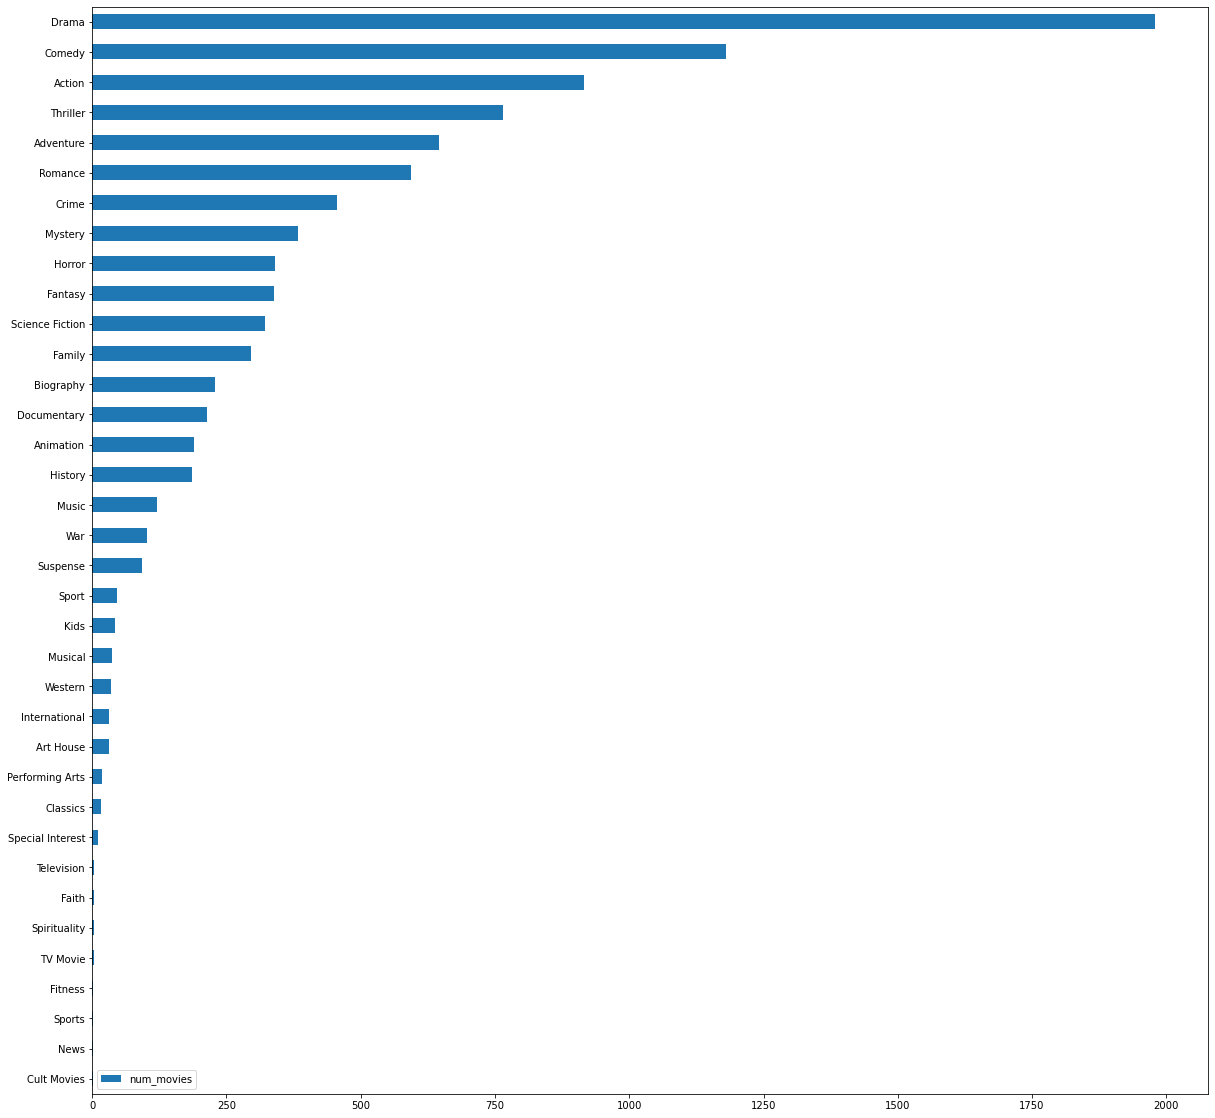

In [136]:
#Sort Grouped Genre/Revenue by num_movies
genre_revenue_df.sort_values(by='num_movies',ascending=True)[['num_movies']].plot(kind='barh',figsize=(20,20))



  Total Domestic Revenue Total Foreign Revenue    Total Revenue
0              Adventure             Adventure        Adventure
1                 Action                Action           Action
2                 Comedy                Comedy           Comedy
3                  Drama                 Drama            Drama
4        Science Fiction       Science Fiction  Science Fiction
5                Fantasy               Fantasy          Fantasy
6                 Family                Family           Family
7               Thriller              Thriller         Thriller
8              Animation             Animation        Animation
9                Romance               Romance          Romance 

  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0          Science Fiction               Adventure             Adventure
1                Adventure               Animation             Animation
2                Animation         Science Fiction       Science Fiction
3 

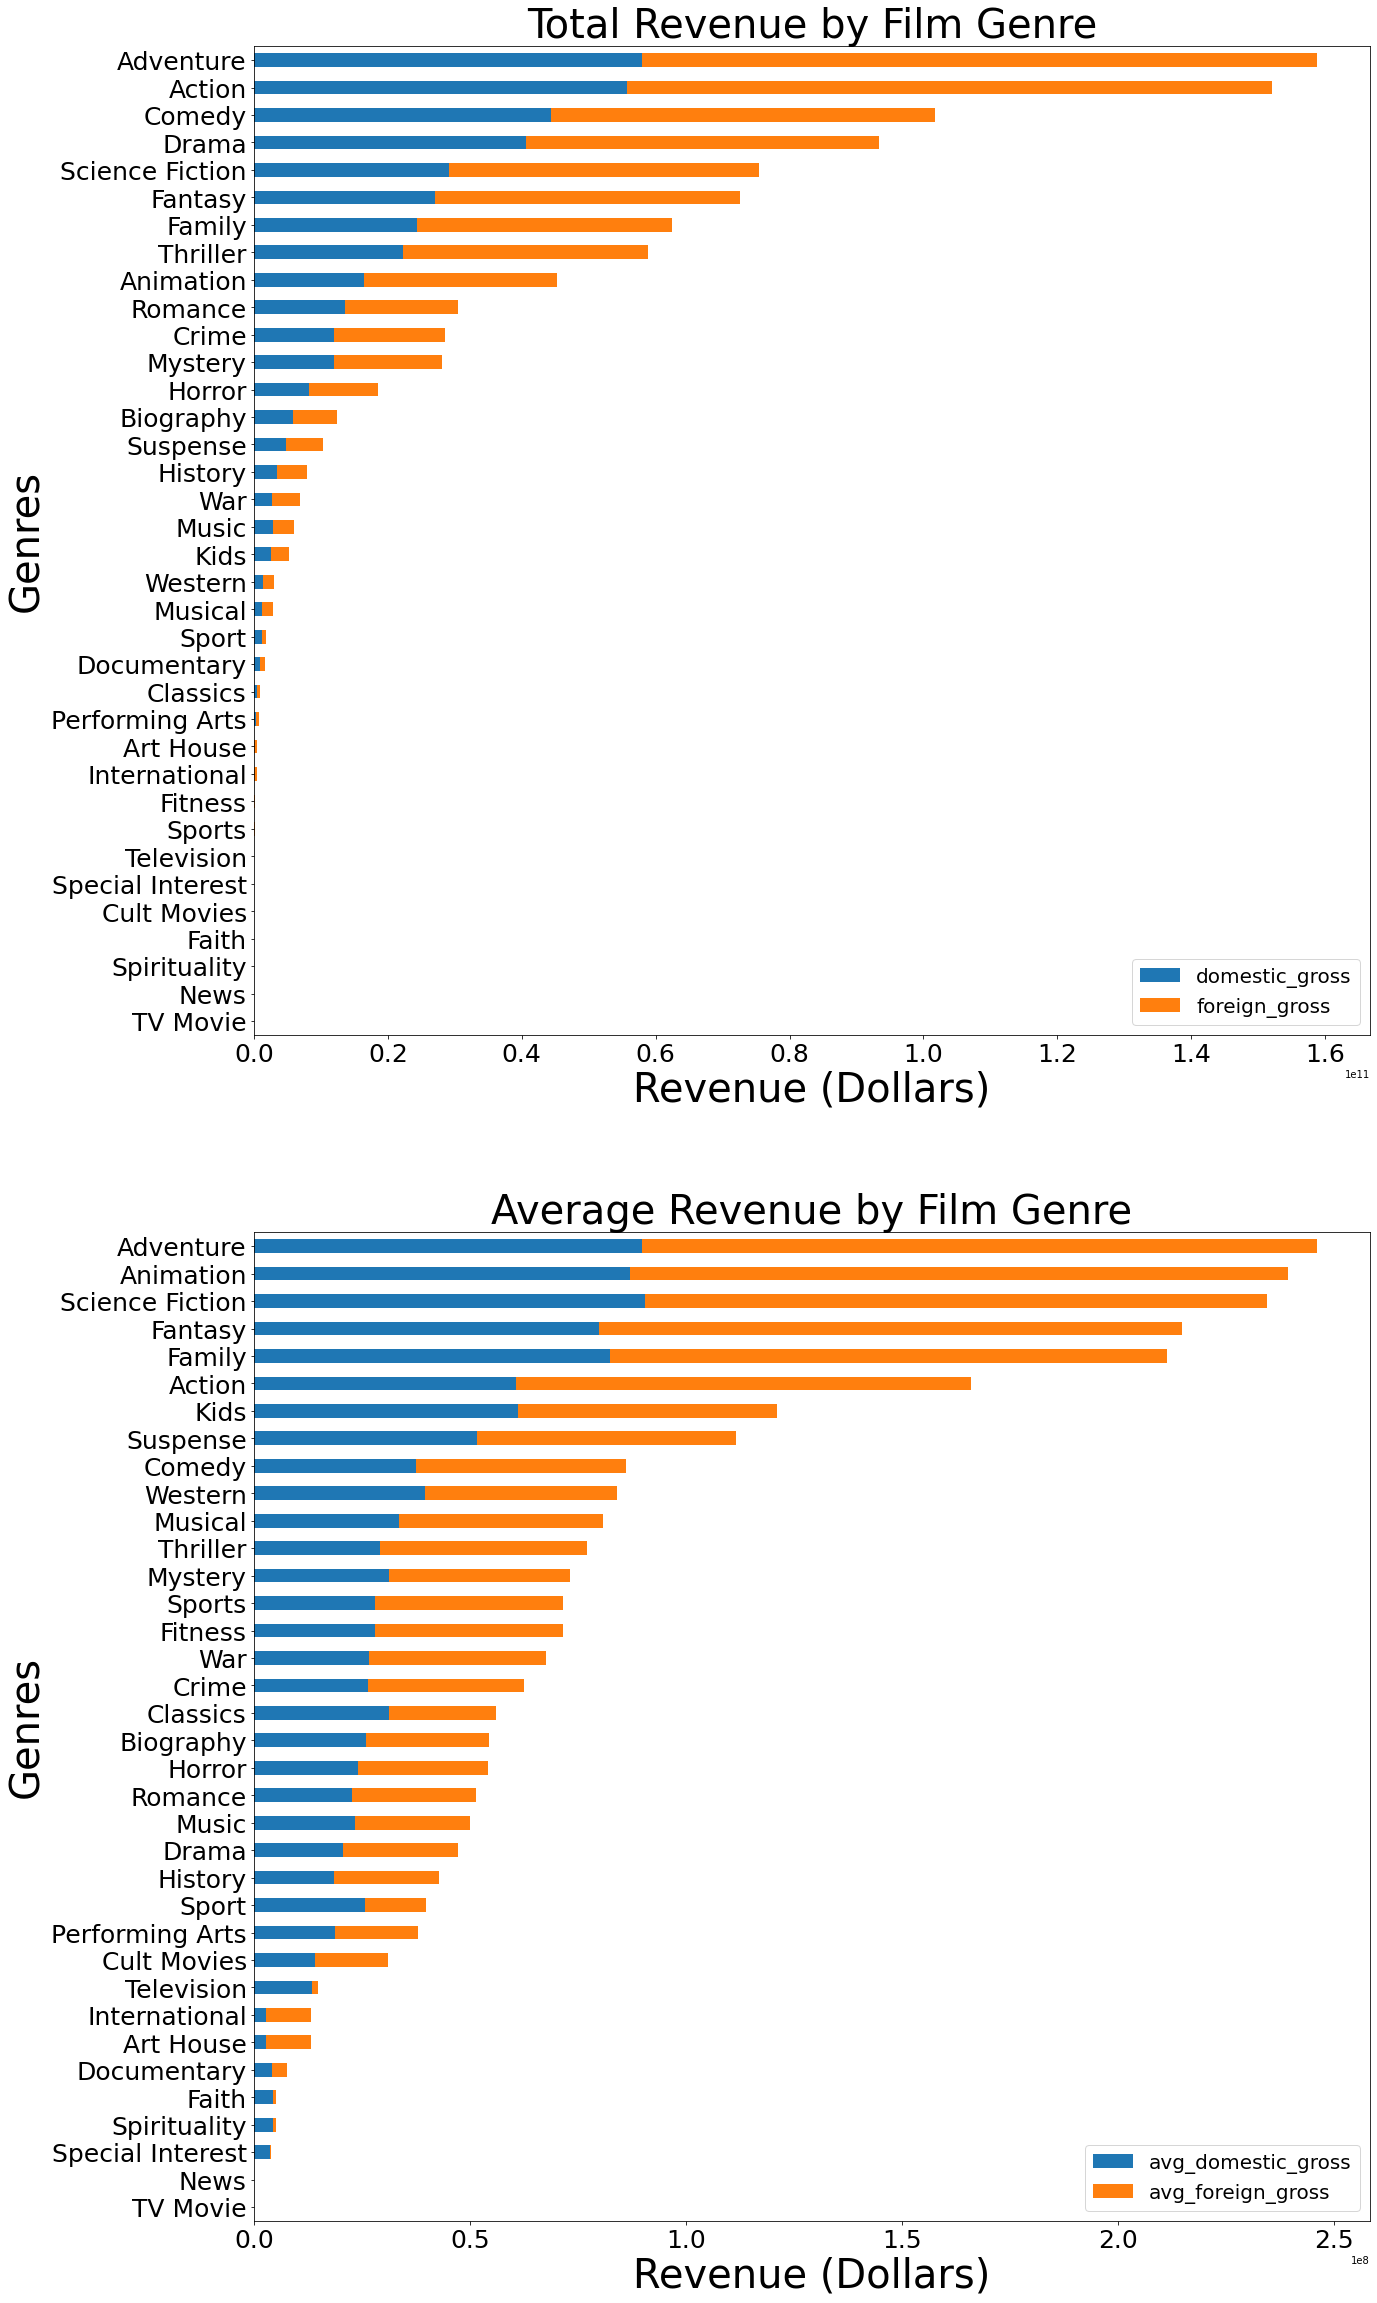

In [201]:
#Generate Genre - Revenue Visualizations
generate_revenue_rankings(genre_revenue_df,'Genres')


num_movies mean: 267.44444444444446 num_movies median: 97.0


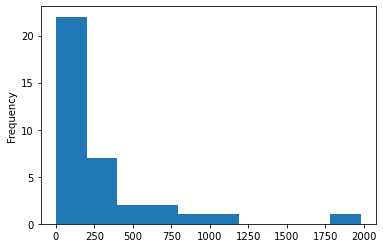

In [138]:
#Mean/Median, Histogram of Number of Movies per Genre
print('num_movies mean:',genre_revenue_df['num_movies'].mean(),'num_movies median:', genre_revenue_df['num_movies'].median())
genre_revenue_df['num_movies'].plot(kind='hist')


  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0          Science Fiction               Adventure             Adventure
1                Adventure               Animation             Animation
2                Animation         Science Fiction       Science Fiction
3                   Family                 Fantasy               Fantasy
4                  Fantasy                  Family                Family
5                   Action                  Action                Action
6                   Comedy                  Comedy                Comedy
7                  Mystery                Thriller              Thriller
8                 Thriller                 Mystery               Mystery
9                      War                     War                   War 



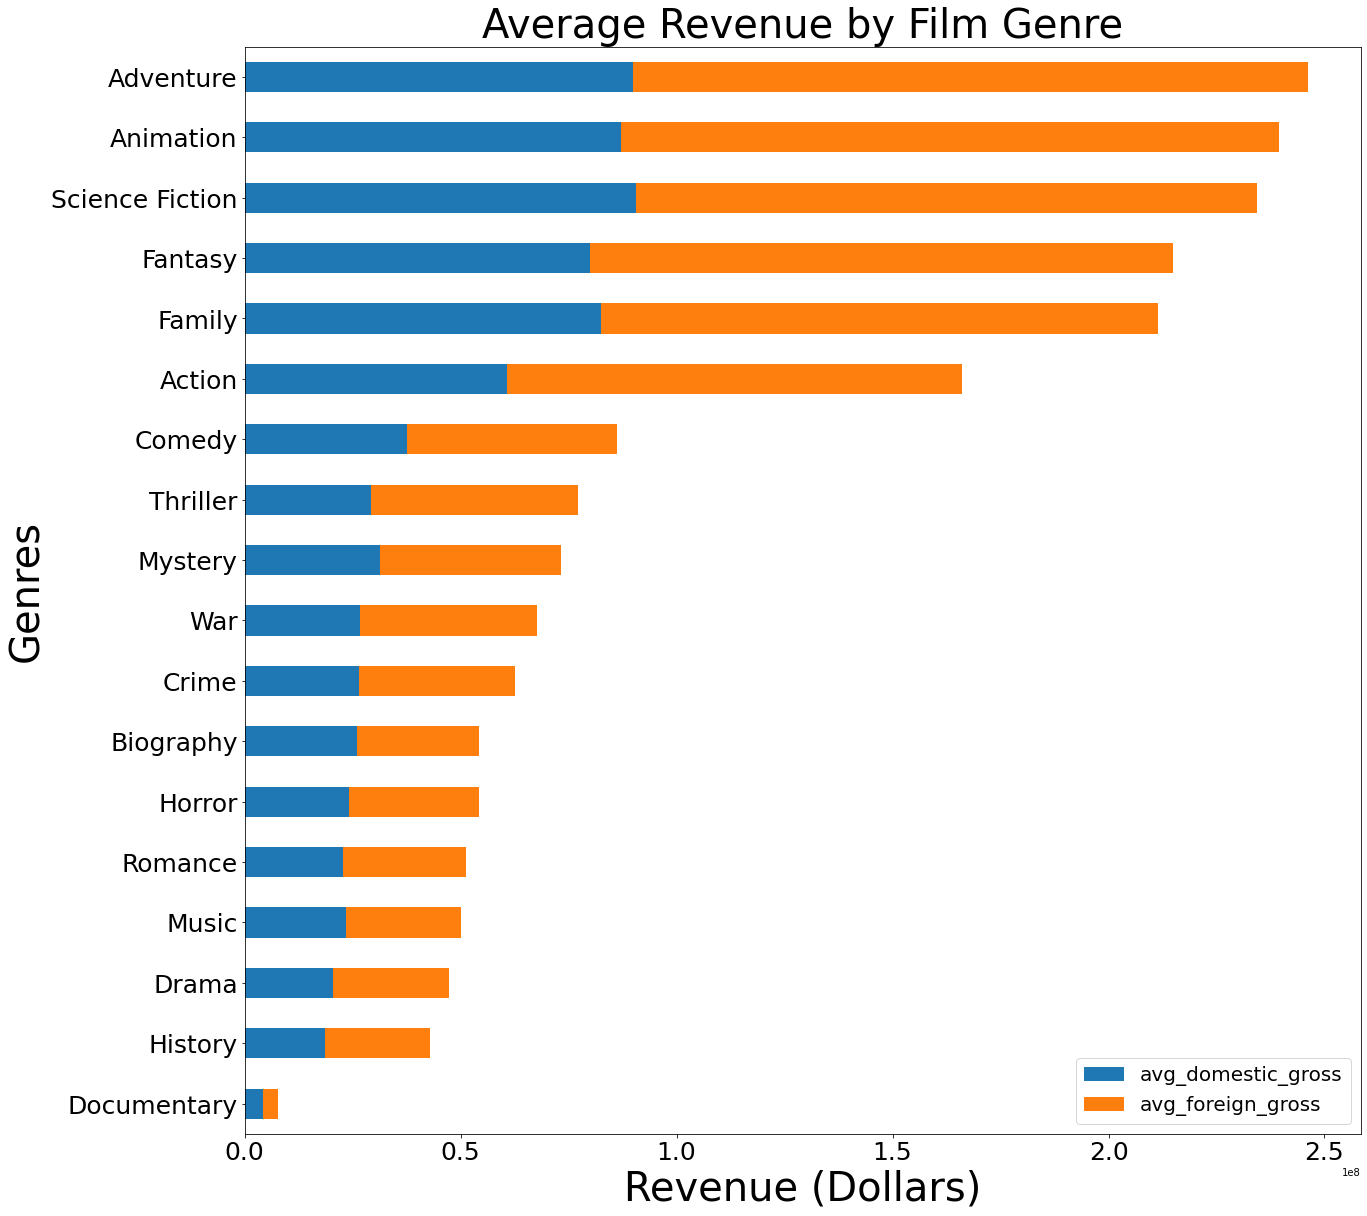

In [202]:
#Check if rankings change when limiting to genres with more than 100 films
genre_revenue_100_df = genre_revenue_df[genre_revenue_df['num_movies'] > 99]
generate_revenue_rankings(genre_revenue_100_df,"Genres",avg_only='y')


In [237]:
#Calculate Mean/STD/Median Info of Grouped Genre/Revenue Df
genre_revenue_100_df.describe()

num_movies  domestic_gross  foreign_gross   total_gross  \
count    18.000000    1.800000e+01   1.800000e+01  1.800000e+01   
mean    513.888889    2.109279e+10   3.229943e+10  5.339222e+10   
std     467.391370    1.819971e+10   3.026774e+10  4.828934e+10   
min     102.000000    9.243029e+08   7.118677e+08  1.636171e+09   
25%     217.500000    6.474441e+09   7.436945e+09  1.391139e+10   
50%     339.000000    1.500666e+10   2.284058e+10  3.784723e+10   
75%     632.000000    2.864177e+10   4.613550e+10  7.477727e+10   
max    1979.000000    5.800893e+10   1.007143e+11  1.587233e+11   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        1.800000e+01       1.800000e+01     1.800000e+01  
mean         4.342841e+07       6.696164e+07     1.103900e+08  
std          2.930121e+07       5.281881e+07     8.201706e+07  
min          4.319173e+06       3.326485e+06     7.645657e+06  
25%          2.355083e+07       2.845771e+07     5.209279e+07  
50%          2.789378e+07       4.149400e+07     7.044574e+07  
75%          7.520733e+07       1.230711e+08     2.001106e+08  
max          9.060594e+07       1.561462e+08     2.460826e+08

In [140]:
#Genre/Revenue Rankings Over time
revenue_and_genre_df.head()

i_tuple  domestic_gross  \
0                                     (avatar, 2009)     760507625.0   
1  (pirates of the caribbean: on stranger tides, ...     241063875.0   
2                               (dark phoenix, 2019)      42762350.0   
3                    (avengers: age of ultron, 2015)     459005868.0   
6                     (avengers: infinity war, 2018)     678815482.0   

   foreign_gross                                    genres_tmdb  \
0   2.015838e+09  (Action, Adventure, Fantasy, Science Fiction)   
1   8.046000e+08                   (Adventure, Action, Fantasy)   
2   1.070000e+08                                            NaN   
3   9.440081e+08           (Action, Adventure, Science Fiction)   
6   1.369319e+09                   (Adventure, Action, Fantasy)   

                            genres_imdb genres_rt  \
0                                   NaN       NaN   
1          (Action, Adventure, Fantasy)       NaN   
2  (Action, Adventure, Science Fiction)       NaN   
3  (Action, Adventure, Science Fiction)       NaN   
6  (Action, Adventure, Science Fiction)       NaN   

                                          genres  
0  (Adventure, Fantasy, Science Fiction, Action)  
1                   (Fantasy, Action, Adventure)  
2           (Adventure, Science Fiction, Action)  
3           (Science Fiction, Action, Adventure)  
6  (Science Fiction, Fantasy, Action, Adventure)

In [141]:
#Make a year column for filtering by year
revenue_and_genre_df['year'] = revenue_and_genre_df['i_tuple'].map(lambda i_tuple: i_tuple[1])
#print(revenue_and_genre_df['year'].value_counts())
revenue_and_genre_df.head()


i_tuple  domestic_gross  \
0                                     (avatar, 2009)     760507625.0   
1  (pirates of the caribbean: on stranger tides, ...     241063875.0   
2                               (dark phoenix, 2019)      42762350.0   
3                    (avengers: age of ultron, 2015)     459005868.0   
6                     (avengers: infinity war, 2018)     678815482.0   

   foreign_gross                                    genres_tmdb  \
0   2.015838e+09  (Action, Adventure, Fantasy, Science Fiction)   
1   8.046000e+08                   (Adventure, Action, Fantasy)   
2   1.070000e+08                                            NaN   
3   9.440081e+08           (Action, Adventure, Science Fiction)   
6   1.369319e+09                   (Adventure, Action, Fantasy)   

                            genres_imdb genres_rt  \
0                                   NaN       NaN   
1          (Action, Adventure, Fantasy)       NaN   
2  (Action, Adventure, Science Fiction)       NaN   
3  (Action, Adventure, Science Fiction)       NaN   
6  (Action, Adventure, Science Fiction)       NaN   

                                          genres    year  
0  (Adventure, Fantasy, Science Fiction, Action)  2009.0  
1                   (Fantasy, Action, Adventure)  2011.0  
2           (Adventure, Science Fiction, Action)  2019.0  
3           (Science Fiction, Action, Adventure)  2015.0  
6  (Science Fiction, Fantasy, Action, Adventure)  2018.0

In [142]:
#Examine Value Counts for Film year column in genre revenue dataframe
revenue_and_genre_df['year'].value_counts()



2015.0    414
2014.0    377
2016.0    359
2011.0    352
2013.0    350
2012.0    348
2017.0    290
2010.0    281
2018.0    265
2019.0     52
2000.0     28
2004.0     27
2003.0     23
2009.0     23
2006.0     22
2002.0     20
2007.0     20
2005.0     20
2008.0     19
2001.0     18
1999.0     14
1997.0     12
1998.0     11
1995.0     10
1996.0     10
1994.0      8
1981.0      5
1984.0      5
1980.0      5
1982.0      5
1988.0      4
1986.0      4
1985.0      4
1992.0      3
1991.0      3
1987.0      3
1983.0      3
1990.0      3
1960.0      2
1946.0      2
1968.0      2
1978.0      2
1971.0      2
1993.0      2
1959.0      2
1952.0      1
1965.0      1
1969.0      1
1977.0      1
2020.0      1
1951.0      1
1976.0      1
1979.0      1
1972.0      1
1974.0      1
1975.0      1
1953.0      1
1955.0      1
1950.0      1
1973.0      1
Name: year, dtype: int64

  Total Domestic Revenue Total Foreign Revenue    Total Revenue
0              Adventure             Adventure        Adventure
1                 Action                Action           Action
2                 Comedy                Comedy           Comedy
3                  Drama                 Drama            Drama
4                 Family               Fantasy          Fantasy
5               Thriller                Family           Family
6                Fantasy              Thriller         Thriller
7        Science Fiction       Science Fiction  Science Fiction
8                Romance             Animation        Animation
9              Animation               Romance          Romance 

  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0                Animation               Animation             Animation
1                Adventure               Adventure             Adventure
2          Science Fiction                 Fantasy               Fantasy
3 

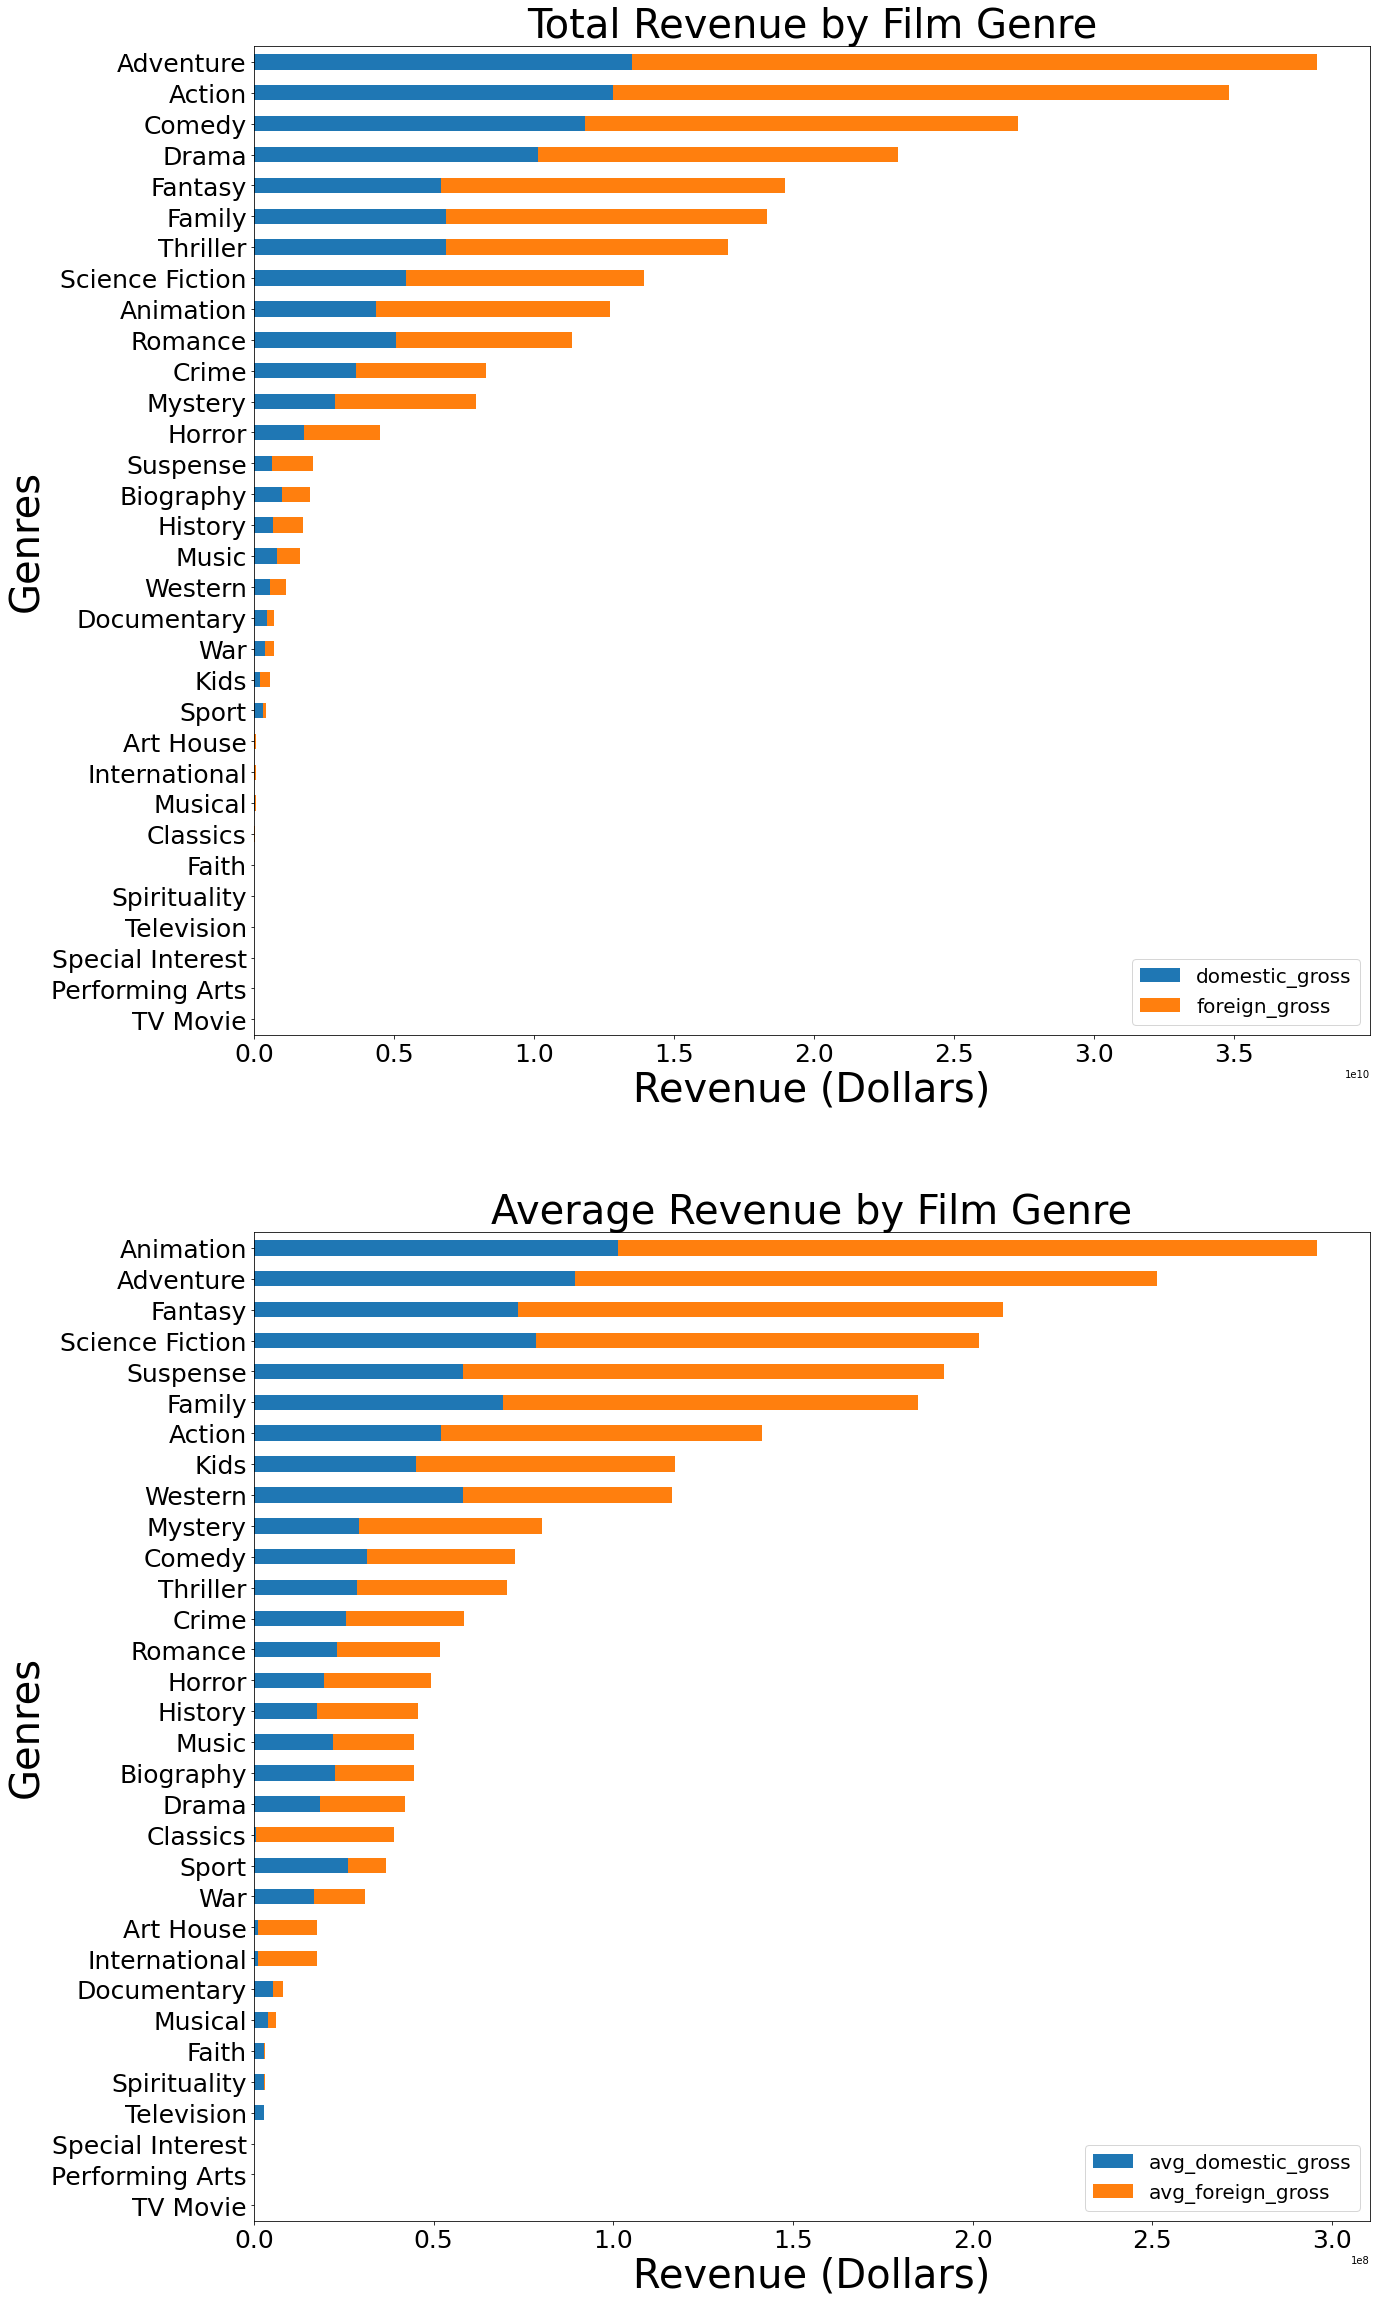

In [203]:
#A:2010-2012  
revenue_and_genre_2010_df = revenue_and_genre_df[(revenue_and_genre_df['year']>=2010)&(revenue_and_genre_df['year']<=2012)]
genre_revenue_2010_df = group_revenue_info(revenue_and_genre_2010_df,'genres')
generate_revenue_rankings(genre_revenue_2010_df,"Genres")


  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0                Animation               Animation             Animation
1                Adventure               Adventure             Adventure
2          Science Fiction                 Fantasy               Fantasy
3                  Fantasy                Suspense       Science Fiction
4                   Family         Science Fiction              Suspense
5                 Suspense                  Family                Family
6                  Western                  Action                Action
7                   Action                 Western               Western
8                   Comedy                 Mystery               Mystery
9                  Mystery                Thriller                Comedy 



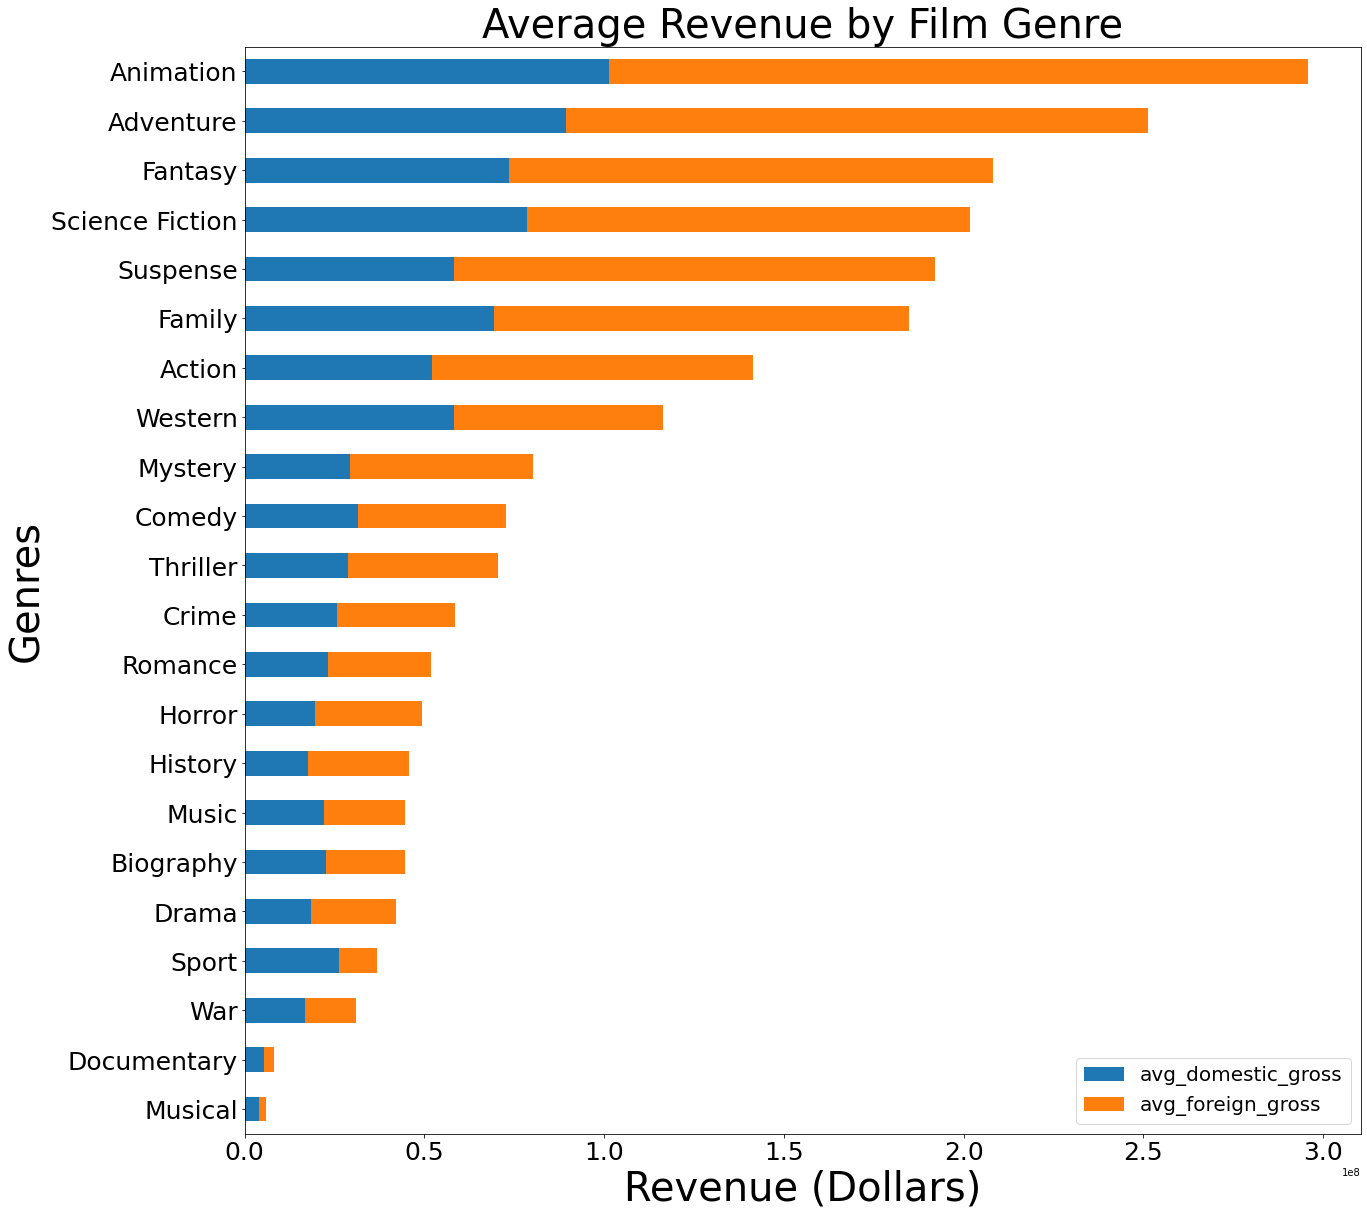

In [259]:
#Check if rankings change when limiting to genres with more than 100 films
generate_revenue_rankings(genre_revenue_2010_df[genre_revenue_2010_df['num_movies'] > 9],"Genres",avg_only='y')


In [238]:
#Calculate Mean/STD/Median Info of Grouped Genre/Revenue Df
genre_revenue_2010_df.describe()

num_movies  domestic_gross  foreign_gross   total_gross  \
count   32.000000    3.200000e+01   3.200000e+01  3.200000e+01   
mean    84.781250    3.034407e+09   4.694575e+09  7.728982e+09   
std    124.025162    4.159989e+09   6.726305e+09  1.084505e+10   
min      1.000000    0.000000e+00   0.000000e+00  0.000000e+00   
25%      4.000000    4.153887e+06   5.933537e+07  6.950352e+07   
50%     37.500000    6.568922e+08   9.150522e+08  1.696494e+09   
75%     99.000000    5.172113e+09   8.392288e+09  1.301642e+10   
max    548.000000    1.351288e+10   2.442685e+10  3.793973e+10   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        3.200000e+01       3.200000e+01     3.200000e+01  
mean         2.901431e+07       4.707099e+07     7.608530e+07  
std          2.907506e+07       5.318720e+07     8.140255e+07  
min          0.000000e+00       0.000000e+00     0.000000e+00  
25%          2.908126e+06       8.653732e+06     1.527201e+07  
50%          2.228754e+07       2.834239e+07     4.523208e+07  
75%          4.691567e+07       6.157891e+07     1.164999e+08  
max          1.013265e+08       1.943846e+08     2.957111e+08

  Total Domestic Revenue Total Foreign Revenue    Total Revenue
0              Adventure             Adventure        Adventure
1                 Action                Action           Action
2                 Comedy                Comedy           Comedy
3                  Drama                 Drama            Drama
4        Science Fiction       Science Fiction  Science Fiction
5               Thriller              Thriller         Thriller
6                 Family                Family           Family
7                Fantasy               Fantasy          Fantasy
8                  Crime             Animation        Animation
9              Animation                 Crime            Crime 

  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0          Science Fiction               Adventure             Adventure
1                Adventure         Science Fiction       Science Fiction
2                   Family               Animation             Animation
3 

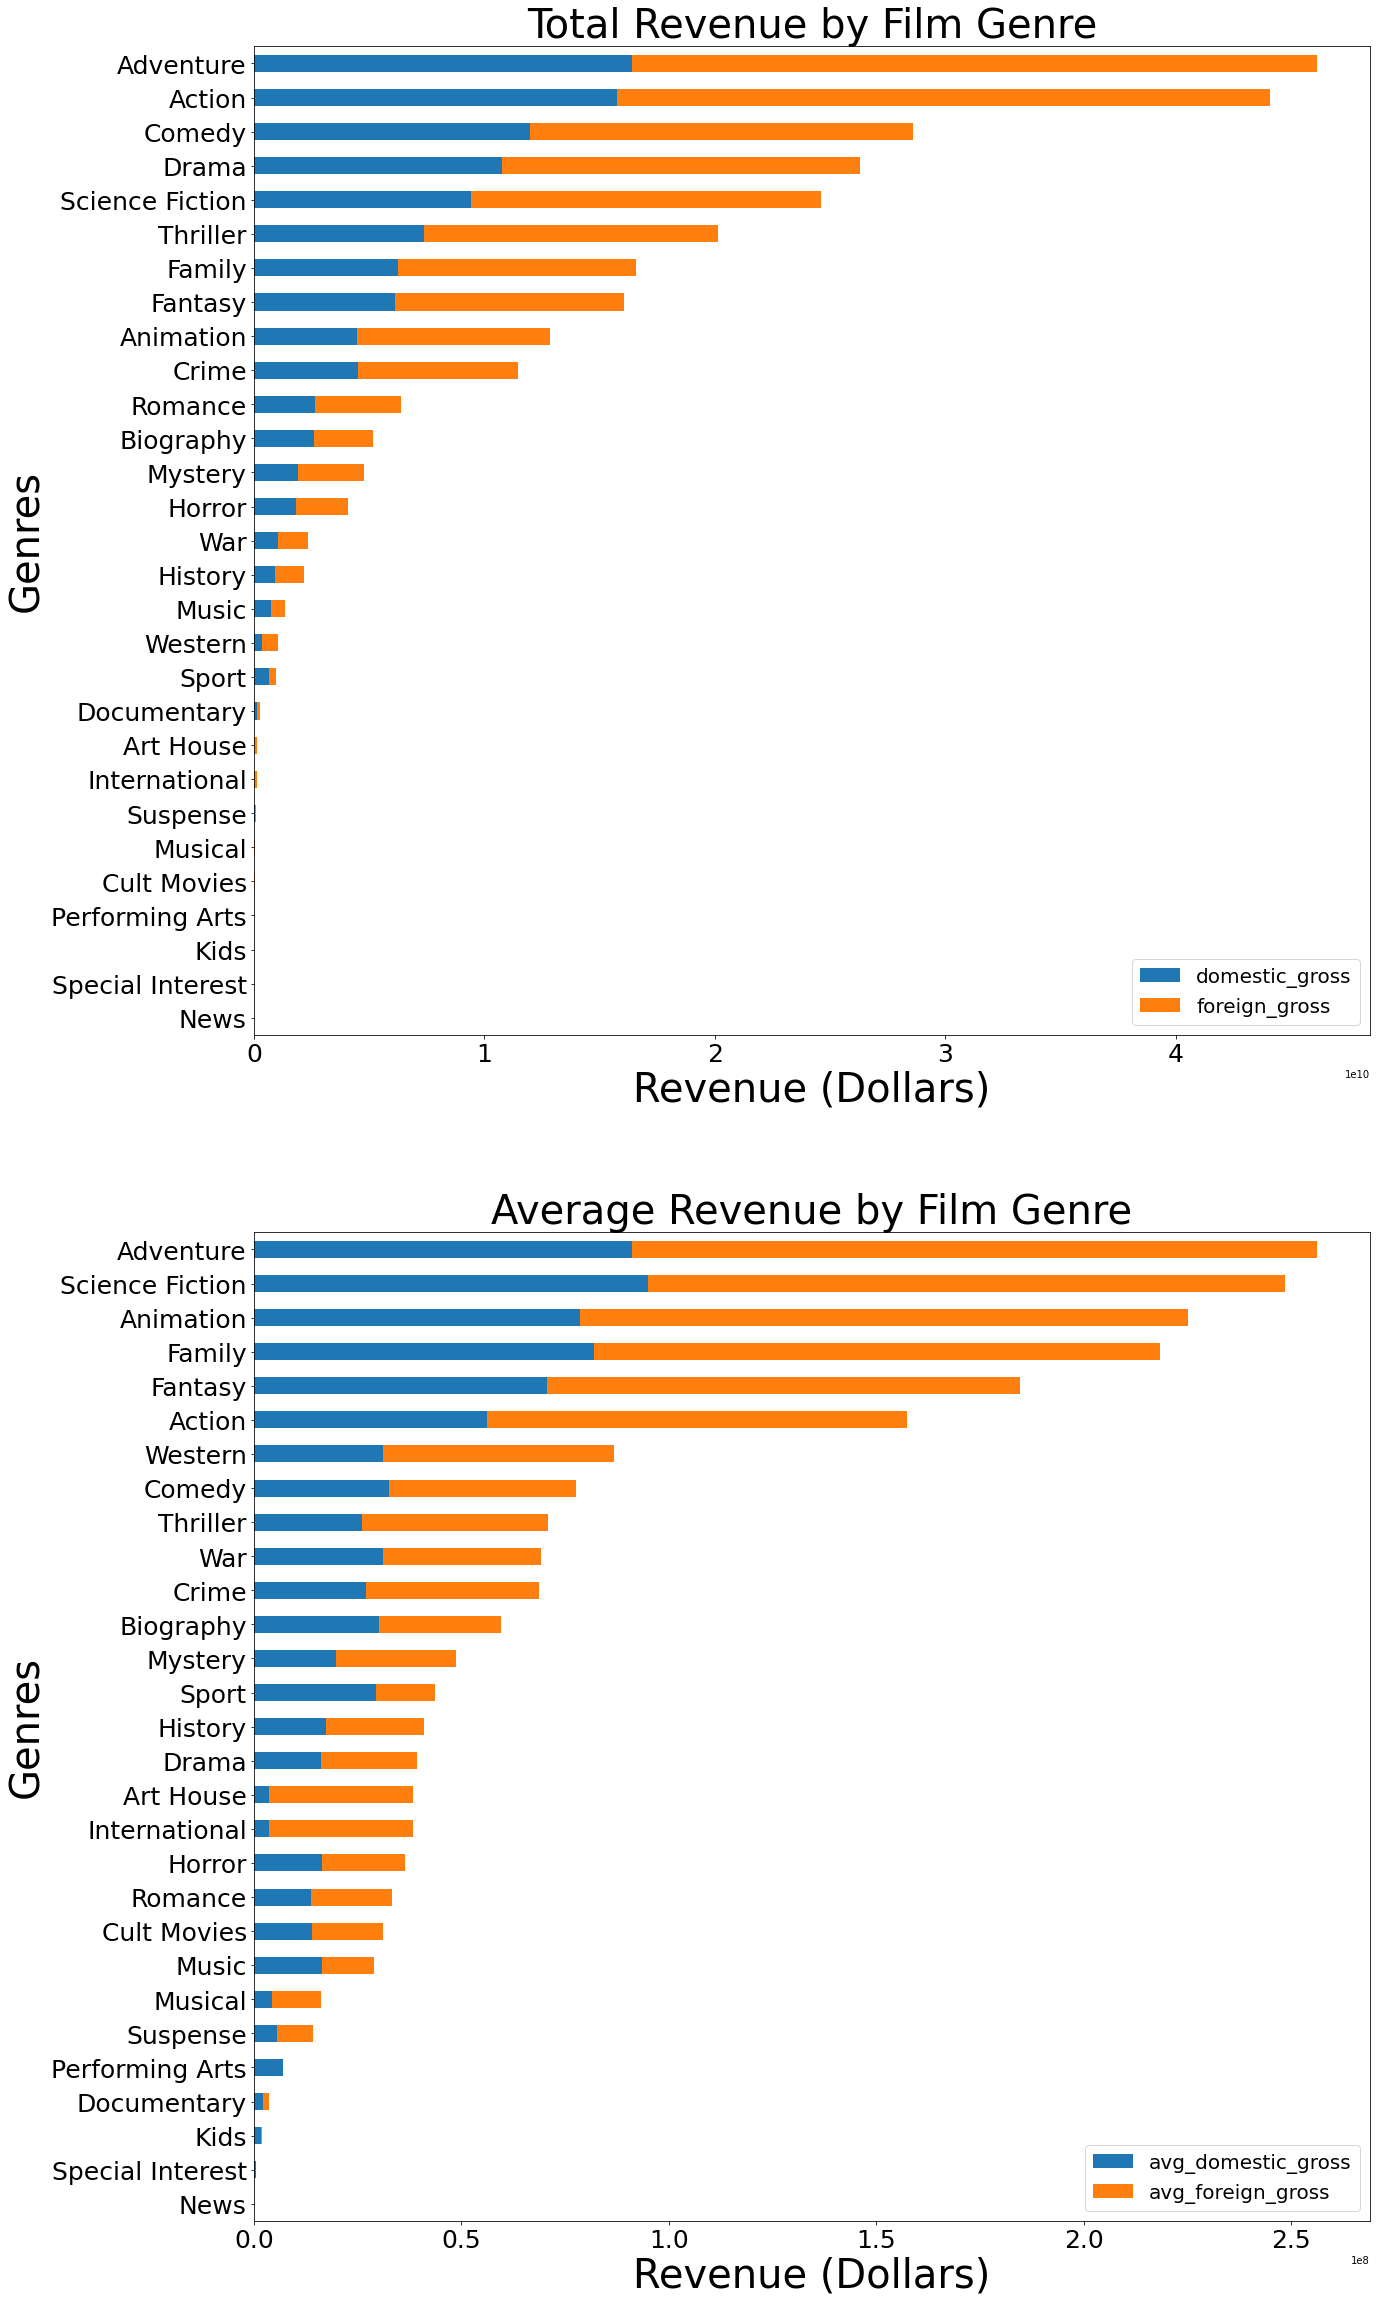

In [144]:
#B:2013-2015  
revenue_and_genre_2013_df = revenue_and_genre_df[(revenue_and_genre_df['year']>=2013)&(revenue_and_genre_df['year']<=2015)]
genre_revenue_2013_df = group_revenue_info(revenue_and_genre_2013_df,'genres')
generate_revenue_rankings(genre_revenue_2013_df,"Genres")



  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0          Science Fiction               Adventure             Adventure
1                Adventure         Science Fiction       Science Fiction
2                   Family               Animation             Animation
3                Animation                  Family                Family
4                  Fantasy                 Fantasy               Fantasy
5                   Action                  Action                Action
6                   Comedy                 Western               Western
7                      War                  Comedy                Comedy
8                  Western                Thriller              Thriller
9                Biography                   Crime                   War 



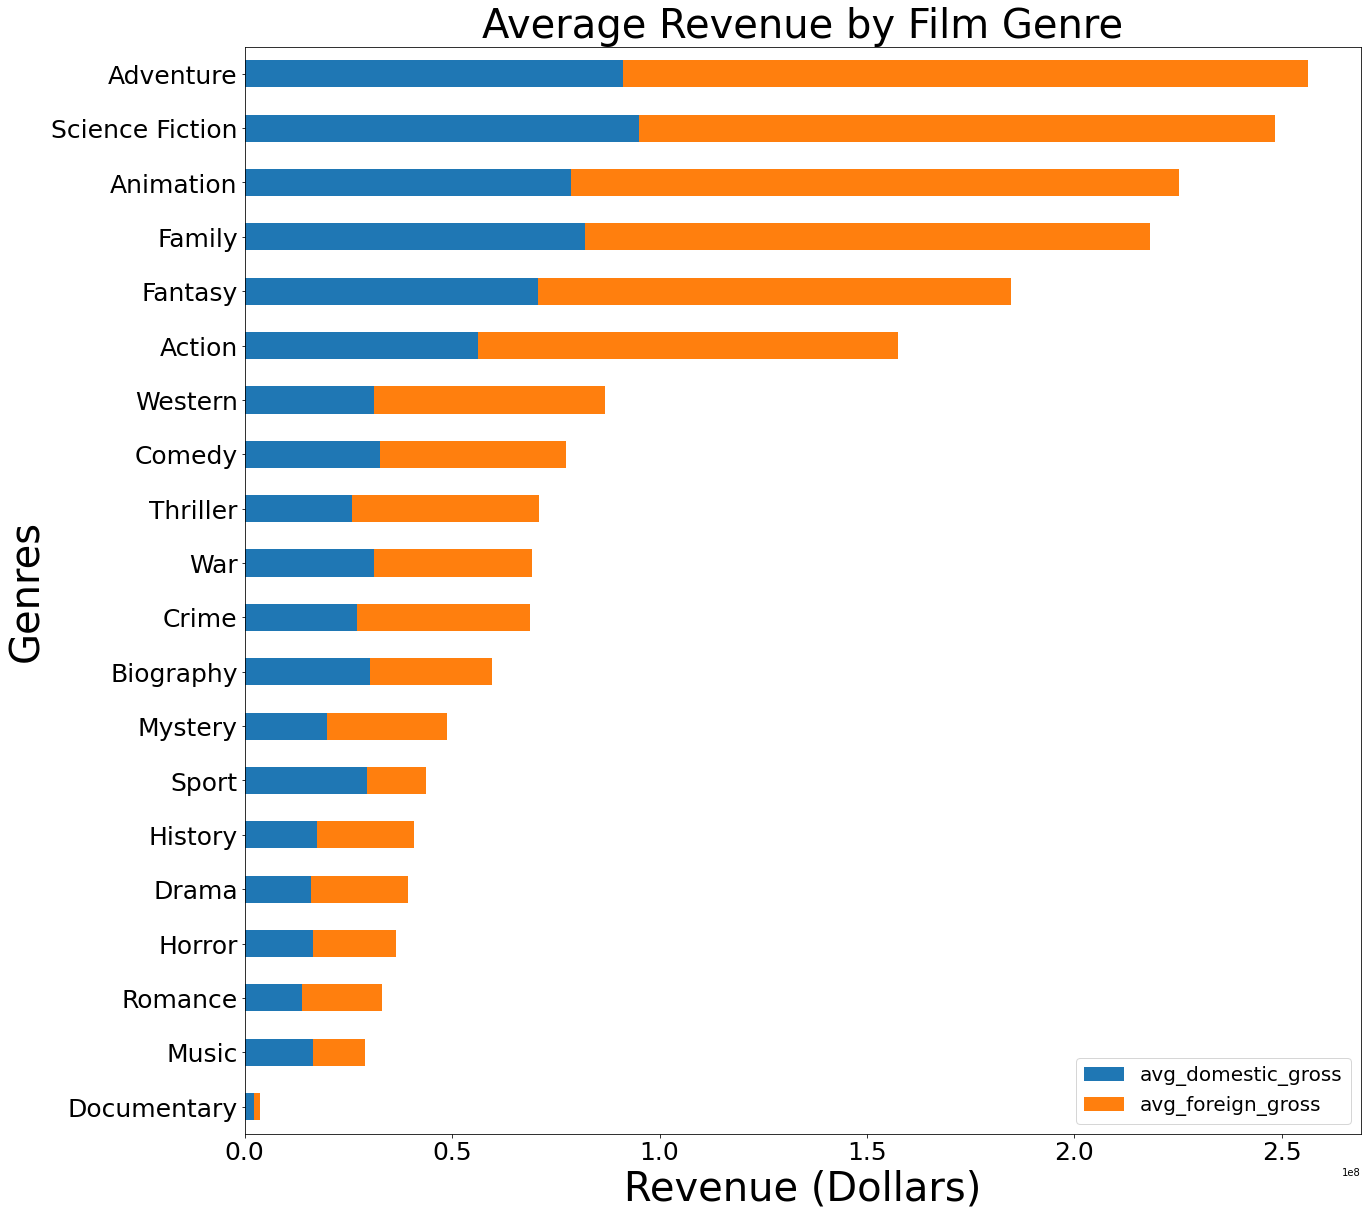

In [260]:
#Check if rankings change when limiting to genres with more than 100 films
generate_revenue_rankings(genre_revenue_2013_df[genre_revenue_2013_df['num_movies'] > 9],"Genres",avg_only='y')


In [239]:
#Calculate Mean/STD/Median Info of Grouped Genre/Revenue Df
genre_revenue_2013_df.describe()

num_movies  domestic_gross  foreign_gross   total_gross  \
count   29.000000    2.900000e+01   2.900000e+01  2.900000e+01   
mean   104.068966    3.660751e+09   5.852900e+09  9.513652e+09   
std    145.432343    4.900724e+09   8.376877e+09  1.325232e+10   
min      1.000000    1.320000e+04   0.000000e+00  1.320000e+04   
25%      4.000000    1.786797e+07   9.805883e+07  1.532416e+08   
50%     57.000000    1.061365e+09   1.294005e+09  2.355370e+09   
75%    112.000000    6.142761e+09   9.924956e+09  1.606772e+10   
max    668.000000    1.640071e+10   2.971256e+10  4.611327e+10   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        2.900000e+01       2.900000e+01     2.900000e+01  
mean         2.841294e+07       4.558180e+07     7.399474e+07  
std          2.877723e+07       5.035428e+07     7.853622e+07  
min          1.320000e+04       0.000000e+00     1.320000e+04  
25%          5.470699e+06       1.251035e+07     2.905197e+07  
50%          1.738480e+07       2.888810e+07     4.090367e+07  
75%          3.121662e+07       4.504873e+07     7.754732e+07  
max          9.498589e+07       1.650698e+08     2.561848e+08

  Total Domestic Revenue Total Foreign Revenue    Total Revenue
0              Adventure             Adventure        Adventure
1                 Action                Action           Action
2                 Comedy                Comedy           Comedy
3                  Drama               Fantasy          Fantasy
4                Fantasy       Science Fiction            Drama
5        Science Fiction                 Drama  Science Fiction
6                 Family                Family           Family
7               Thriller              Thriller         Thriller
8              Animation             Animation        Animation
9                Romance               Romance          Romance 

  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0                  Musical                 Musical               Musical
1          Science Fiction               Adventure             Adventure
2                   Family                 Fantasy               Fantasy
3 

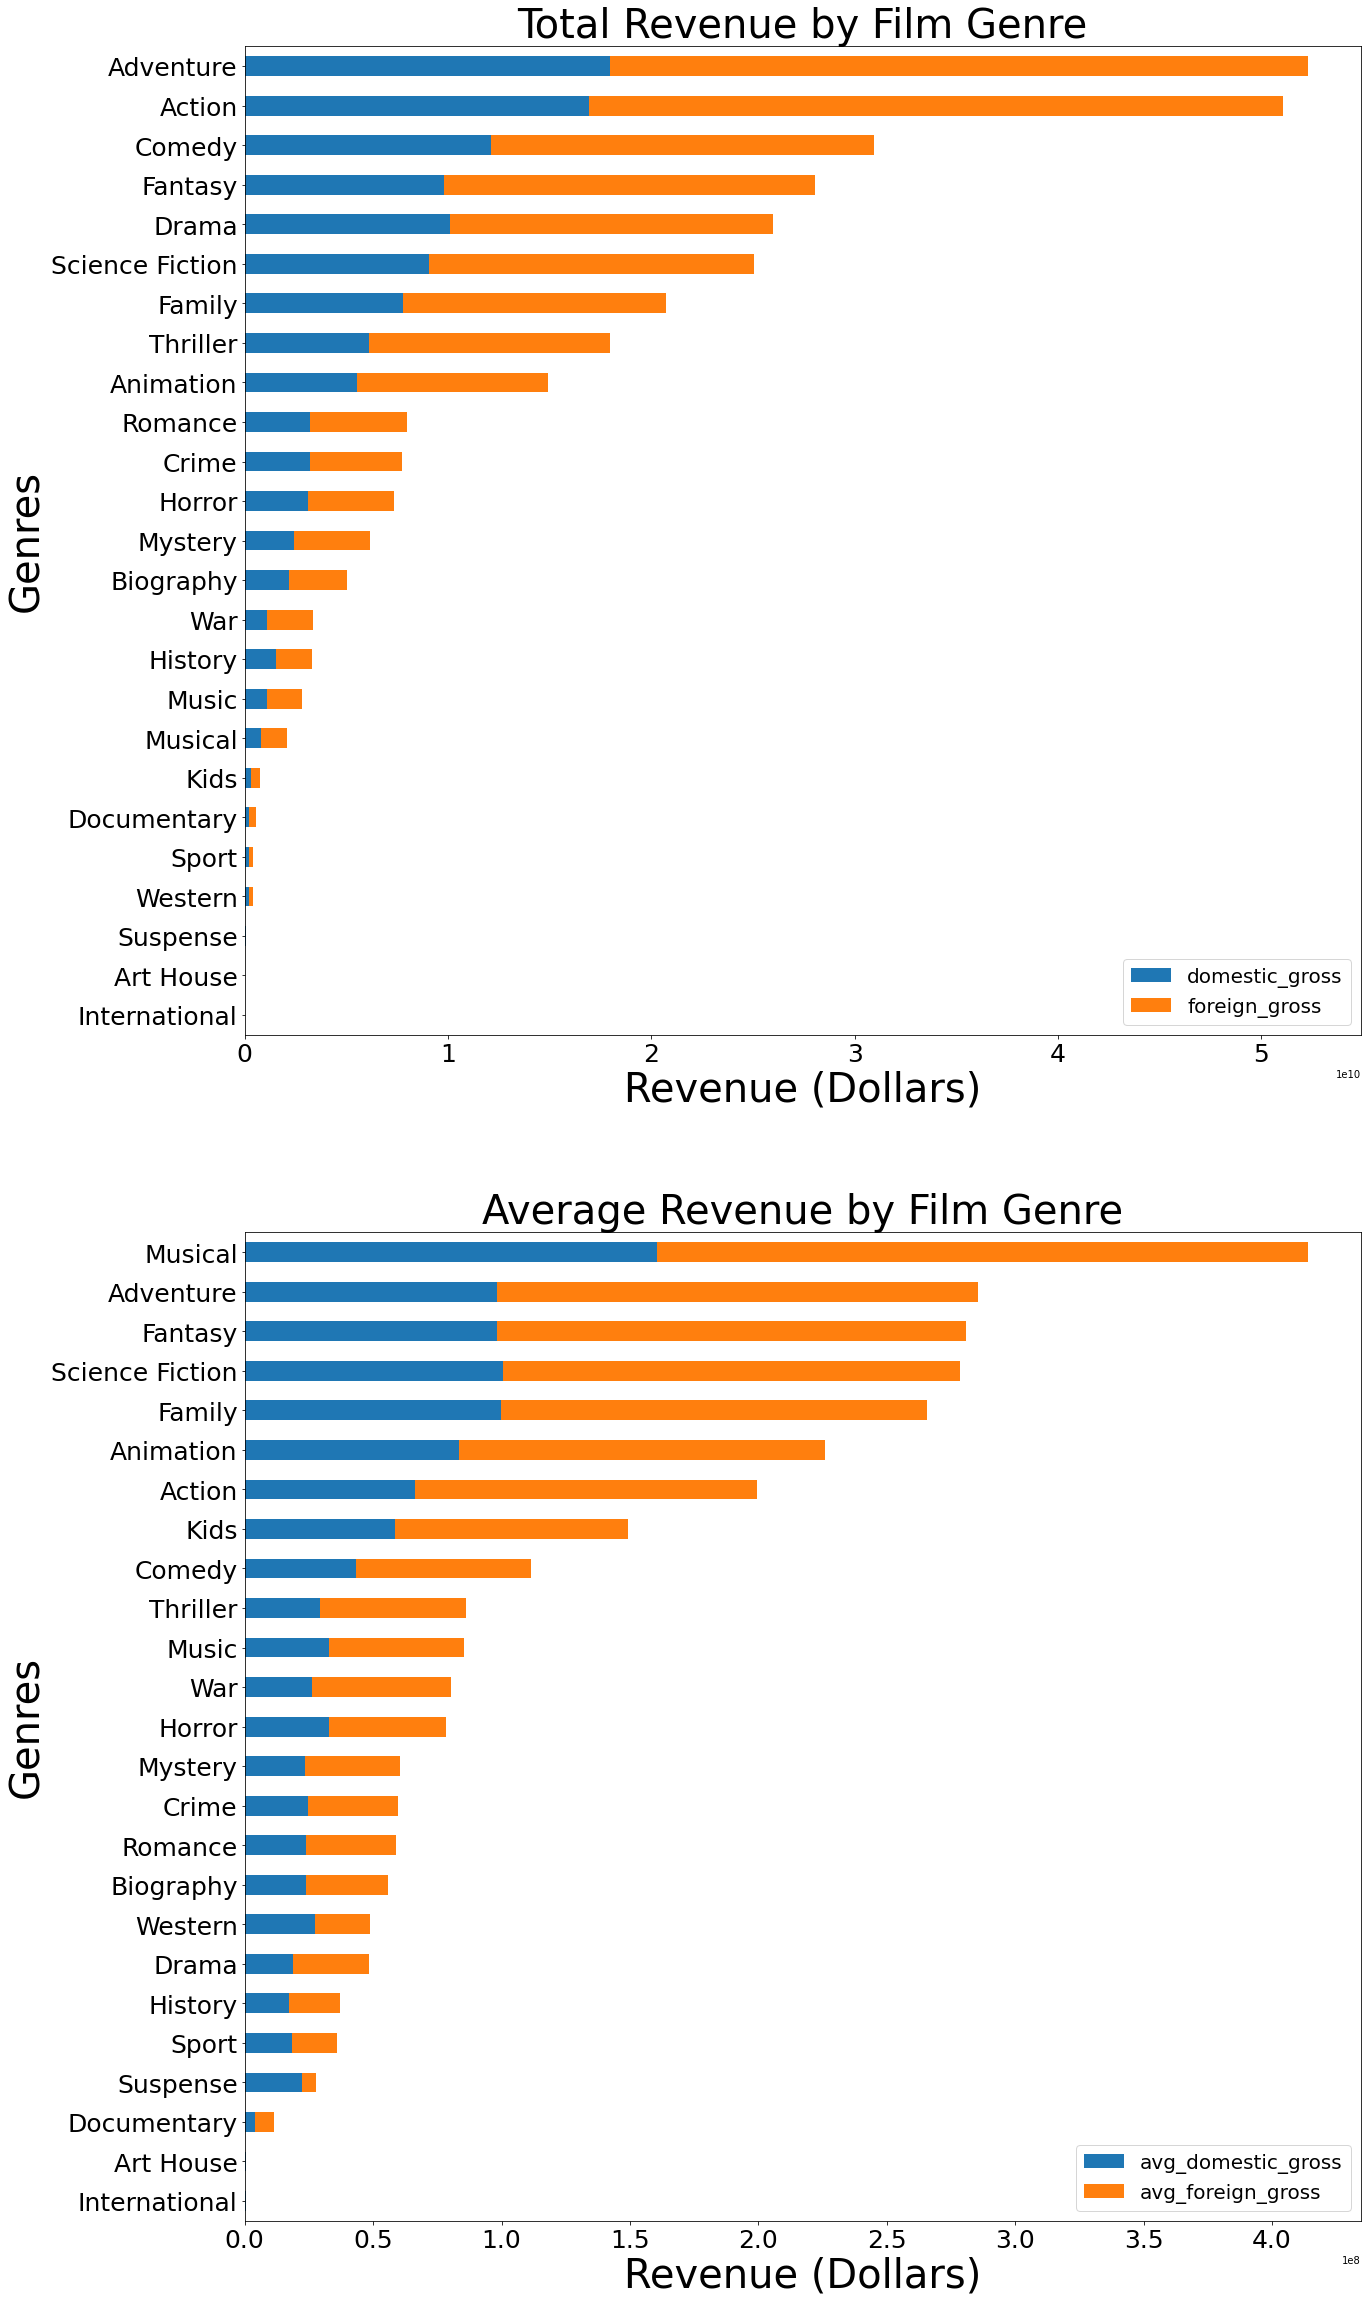

In [145]:
#B:2016-2018
revenue_and_genre_2016_df = revenue_and_genre_df[(revenue_and_genre_df['year']>=2016)&(revenue_and_genre_df['year']<=2018)]
genre_revenue_2016_df = group_revenue_info(revenue_and_genre_2016_df,'genres')
generate_revenue_rankings(genre_revenue_2016_df,'Genres')



  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0          Science Fiction               Adventure             Adventure
1                   Family                 Fantasy               Fantasy
2                Adventure         Science Fiction       Science Fiction
3                  Fantasy                  Family                Family
4                Animation               Animation             Animation
5                   Action                  Action                Action
6                   Comedy                  Comedy                Comedy
7                   Horror                Thriller              Thriller
8                    Music                     War                 Music
9                 Thriller                   Music                   War 



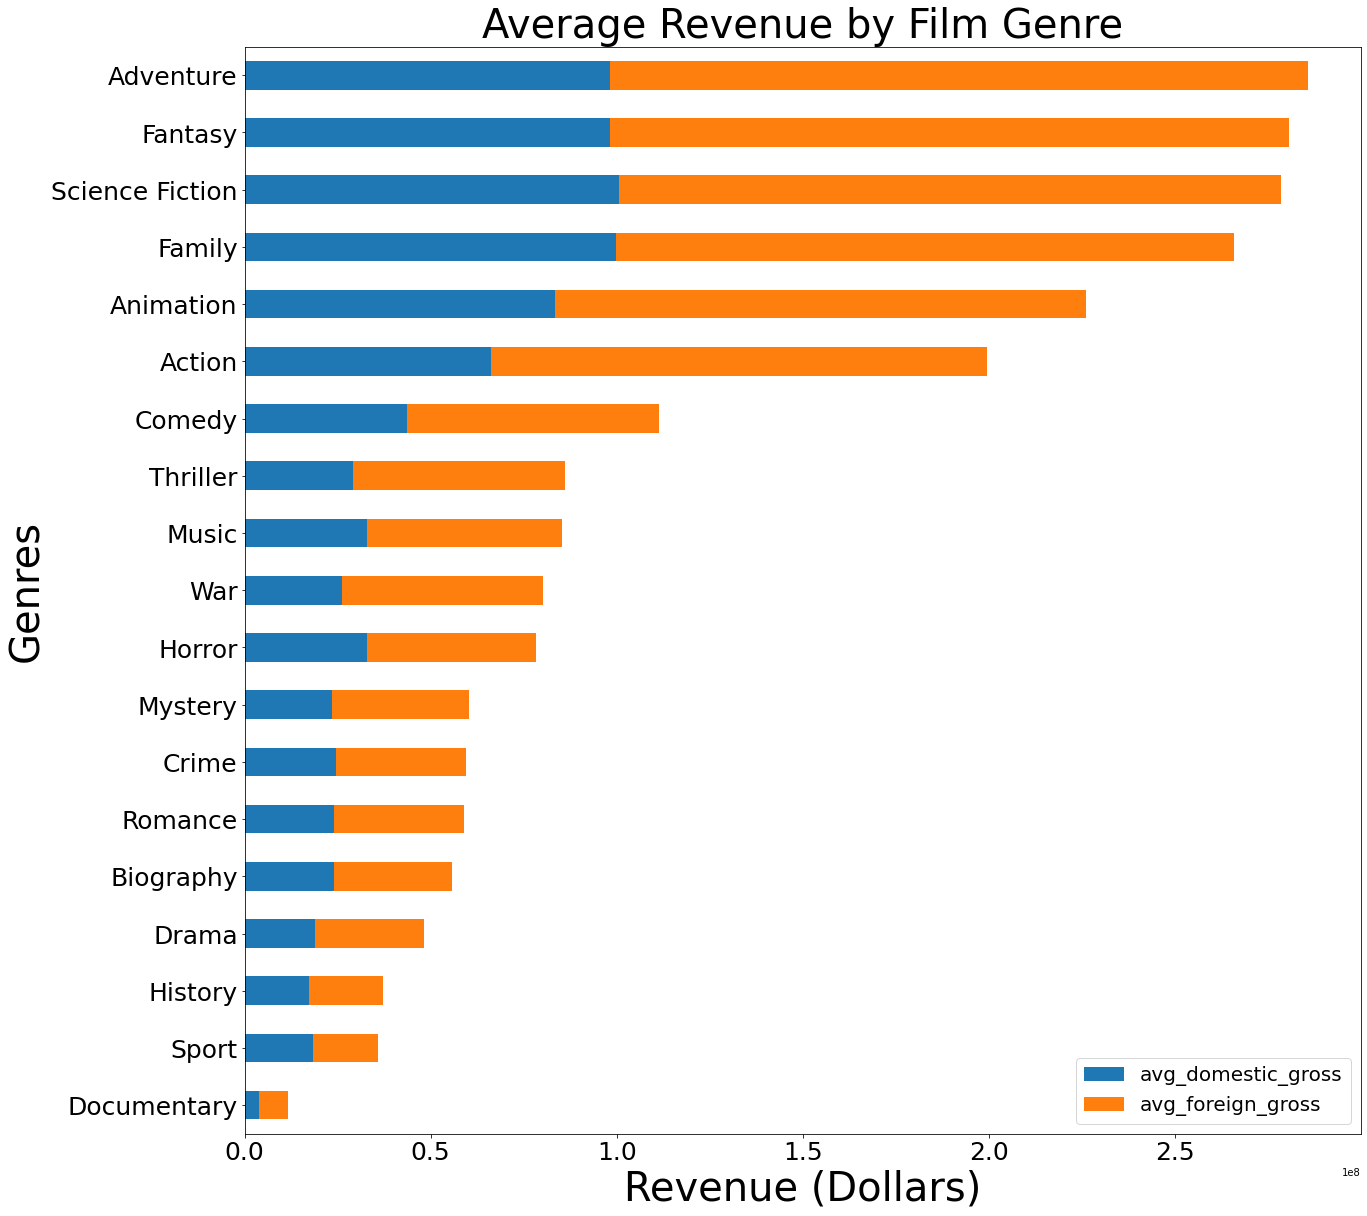

In [261]:
#Check if rankings change when limiting to genres with more than 100 films
generate_revenue_rankings(genre_revenue_2016_df[genre_revenue_2016_df['num_movies'] > 9],"Genres",avg_only='y')


In [240]:
#Calculate Mean/STD/Median Info of Grouped Genre/Revenue Df
genre_revenue_2016_df.describe()

num_movies  domestic_gross  foreign_gross   total_gross  \
count   25.000000    2.500000e+01   2.500000e+01  2.500000e+01   
mean   103.880000    4.600125e+09   8.000779e+09  1.260090e+10   
std    119.723751    5.333976e+09   1.006507e+10  1.537365e+10   
min      2.000000    1.295000e+06   0.000000e+00  1.295000e+06   
25%     12.000000    2.929622e+08   4.526366e+08  7.455988e+08   
50%     89.000000    2.400778e+09   3.749057e+09  6.149835e+09   
75%    130.000000    7.787088e+09   1.294287e+10  2.072996e+10   
max    538.000000    1.797756e+10   3.429964e+10  5.227720e+10   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        2.500000e+01       2.500000e+01     2.500000e+01  
mean         4.544061e+07       7.398567e+07     1.194263e+08  
std          4.005255e+07       7.178344e+07     1.114526e+08  
min          6.475000e+05       0.000000e+00     6.475000e+05  
25%          2.220392e+07       2.142334e+07     4.827535e+07  
50%          2.733733e+07       4.540514e+07     7.838233e+07  
75%          6.617569e+07       1.333213e+08     1.994970e+08  
max          1.606553e+08       2.532022e+08     4.138575e+08

Text(0.5, 1.0, 'Highest Average Grossing Genres by Year')

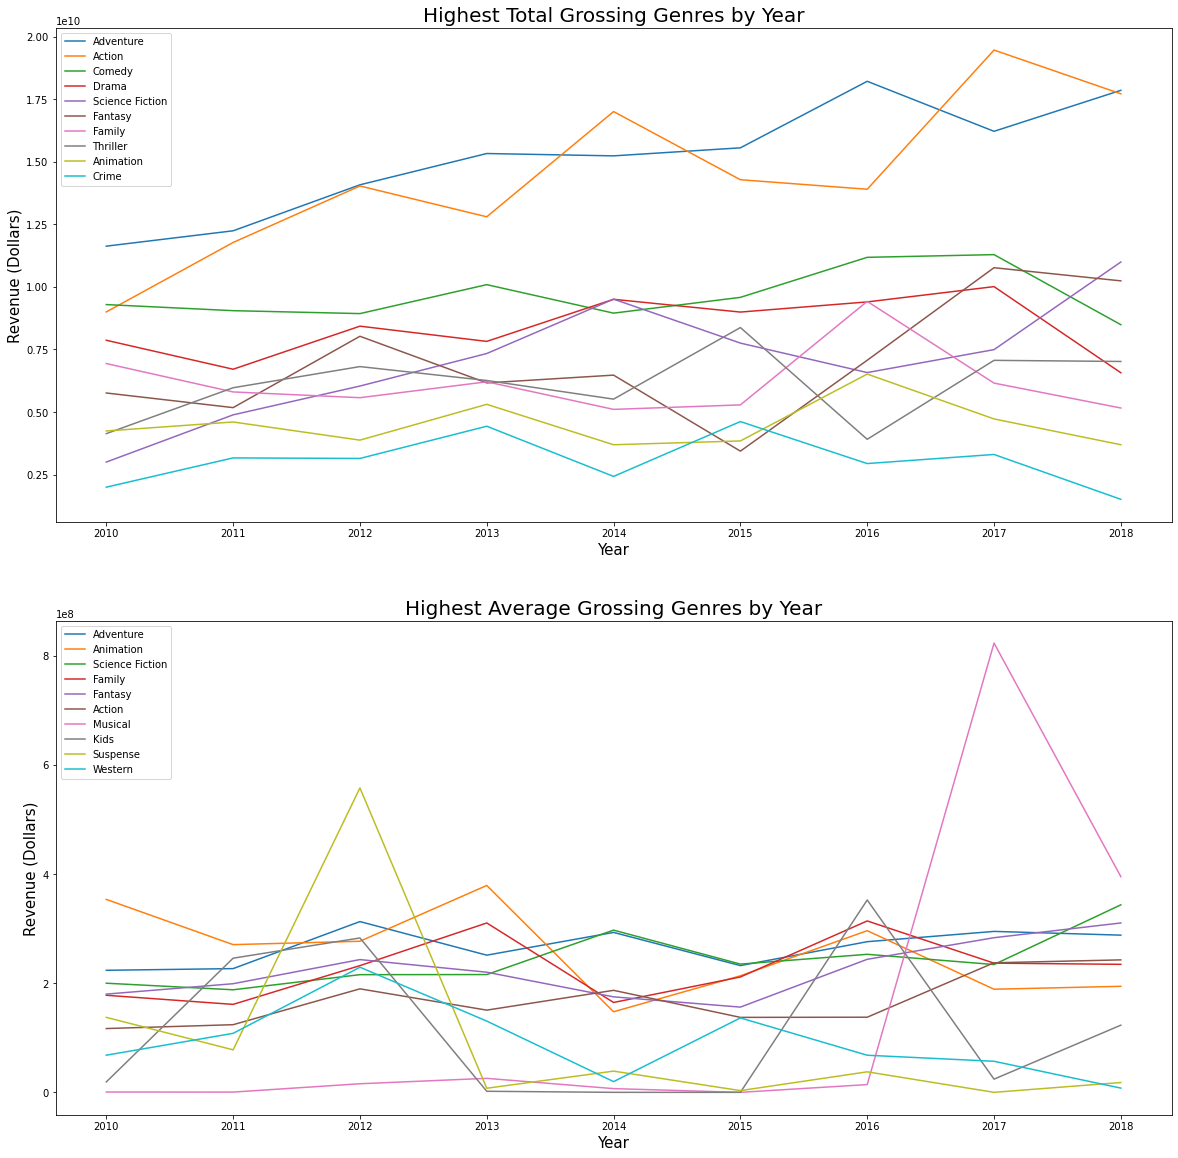

In [146]:
###Genre/Revenue Time Line Plot || Find Genre Average Revenue for each year of interest

#Create Genre Dictionary of List to hold Average Total Revenue Values
all_genres_list = list(genre_revenue_df.index)
tot_result_dict = {}
avg_result_dict = {}
for genre in all_genres_list:
    tot_result_dict[genre] = []
    avg_result_dict[genre] = []
    
for year in range(2010,2019):
    
    #Filter Revenue/Genre Df by year
    year_df = revenue_and_genre_df[revenue_and_genre_df['year'] == year]
    
    #Group Yearly Revenue/Genre df by Genre
    grouped_year_df = group_revenue_info(year_df,'genres')
    total_revenue_series = grouped_year_df['total_gross']
    avg_total_revenue_series = grouped_year_df['avg_total_gross']

    #Add Total Revenue Information to results dict
    for key in tot_result_dict.keys():
        if key in total_revenue_series.index:
            tot_result_dict[key].append(total_revenue_series.loc[key])
        else:
            tot_result_dict[key].append(0.0)    
    
    #Add Avg Total Revenue Information to results dict
    for key in avg_result_dict.keys():
        if key in avg_total_revenue_series.index:
            avg_result_dict[key].append(avg_total_revenue_series.loc[key])
        else:
            avg_result_dict[key].append(0.0)

#Create Dataframes to show Revenue Results by year
tot_time_results_df = pd.DataFrame(tot_result_dict, index=range(2010,2019))
avg_time_results_df = pd.DataFrame(avg_result_dict, index=range(2010,2019))

#Top Ten Genres in Yearly Average Revenues
tot_top_10_genres = list(tot_time_results_df.mean().sort_values(ascending=False).index)[:10]
avg_top_10_genres = list(avg_time_results_df.mean().sort_values(ascending=False).index)[:10]

#Time Line Plots
time_fig, (tot_ax,avg_ax) = plt.subplots(2,1,figsize=(20,20))
tot_time_results_df[tot_top_10_genres].plot.line(ax=tot_ax)
tot_ax.set_xlabel('Year',fontsize=15)
tot_ax.set_ylabel('Revenue (Dollars)',fontsize=15)
tot_ax.set_title('Highest Total Grossing Genres by Year',fontsize=20)
avg_time_results_df[avg_top_10_genres].plot.line(ax=avg_ax)
avg_ax.set_xlabel('Year',fontsize=15)
avg_ax.set_ylabel('Revenue (Dollars)',fontsize=15)
avg_ax.set_title('Highest Average Grossing Genres by Year',fontsize=20)



The most common film genres are drama, comedy, action, thriller, and adventure.  We see that seven of the top ten highest grossing genres are also represented in the top ten most common genres.  This is expected as the more films a genre has, the more opportunities for revenue.  The other three, science fiction, family, and animation, make the top ten in total revenue because these genres are amongst the top five highest grossing genres on a per film basis (average revenue).

We observed that there is no distinction between the top ten domestic and the top ten foreign total revenue rankings.  In terms of average revenue, however, we observed that the genres of science fiction, family, and kids are higher grossing domestically, while the genres of animation, fantasy, and thriller are higher grossing internationally.

We also sought to generate a more precise ranking of average revenue by only considering genres with more than a certain amount of films.  We found that the median number of films per genre is 97 and therefore generated average revenue rankings for genres in the top 50% of number of films.  We found the ranking order mostly unchanged when compared to the original rankings, with the genres of kids, suspense, and westerns falling out of the top ten. 

Finally, we examined how the highest grossing genres changed over time during the last decade.  We chose the last decade as our period of choice because of our data. Our dataframe contains hundreds of films per year the last decade but drops precipitously for years before 2010.  We split our genre/revenue film dataframe into three periods of three years each: 2010-2012, 2013-2015, and 2016-2018.  After grouping each revenue period by genre, we generated rankings and compared them.  

In terms of total revenue, there was very little change in rankings from period to period with some order of adventure, action, comedy, and drama occupying the top five spots.  Average revenue was another story, however.  We can see that animation was the highest grossing per film in the first period before dropping in rankings in the second period and completely out of the top five in the third.  The opposite was true with the fantasy genre.  An interesting thing to note was that the musical genre was the highest grossing genre in the last period although we expect there to be a low sample size with a few musicals with very high revenues.   


#### Principals

In [147]:
#Determine which principals return the most money.
print(revenue_and_principals_df.info())
revenue_and_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2693 entries, 0 to 2692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   i_tuple          2693 non-null   object 
 1   principals_imdb  2693 non-null   object 
 2   principals_rt    2693 non-null   object 
 3   principals       2693 non-null   object 
 4   domestic_gross   2683 non-null   float64
 5   foreign_gross    2105 non-null   float64
dtypes: float64(2), object(4)
memory usage: 147.3+ KB
None


i_tuple  \
0                (#horror, 2015)   
1    (10 cloverfield lane, 2016)   
2  (10 days in a madhouse, 2015)   
3            (102 not out, 2018)   
4               (11 11 11, 2011)   

                                     principals_imdb principals_rt  \
0  (Leif Shackelford, Sadie Seelert, Haley Murphy...                 
1  (Lindsey Weber, John Goodman, Mary Elizabeth W...                 
2  (Aaron R.F. Anderson, Caroline Barry, Christop...                 
3  (Mansi Dhruv Mehta, Amitabh Bachchan, Rishi Ka...                 
4  (Ferran Monje, Timothy Gibbs, Michael Landes, ...                 

                                          principals  domestic_gross  \
0  (Jason Ludman, Haley Murphy, Oren Segal, Blue ...             0.0   
1  (Matthew Stuecken, John Goodman, John Gallaghe...      72082999.0   
2  (Timothy Hines, Martin Wiley, Aaron R.F. Ander...         14616.0   
3  (Jimit Trivedi, Saumya Joshi, Amitabh Bachchan...       1300000.0   
4  (Timothy Gibbs, Michael Landes, Darren Lynn Bo...         32800.0   

   foreign_gross  
0            0.0  
1     36203423.0  
2            0.0  
3     10900000.0  
4      5700000.0

In [148]:
#Fill Gross Revenue NaNs with zeroes
revenue_and_principals_df['domestic_gross'] = revenue_and_principals_df['domestic_gross'].fillna(0)
revenue_and_principals_df['foreign_gross'] = revenue_and_principals_df['foreign_gross'].fillna(0)
revenue_and_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2693 entries, 0 to 2692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   i_tuple          2693 non-null   object 
 1   principals_imdb  2693 non-null   object 
 2   principals_rt    2693 non-null   object 
 3   principals       2693 non-null   object 
 4   domestic_gross   2693 non-null   float64
 5   foreign_gross    2693 non-null   float64
dtypes: float64(2), object(4)
memory usage: 147.3+ KB


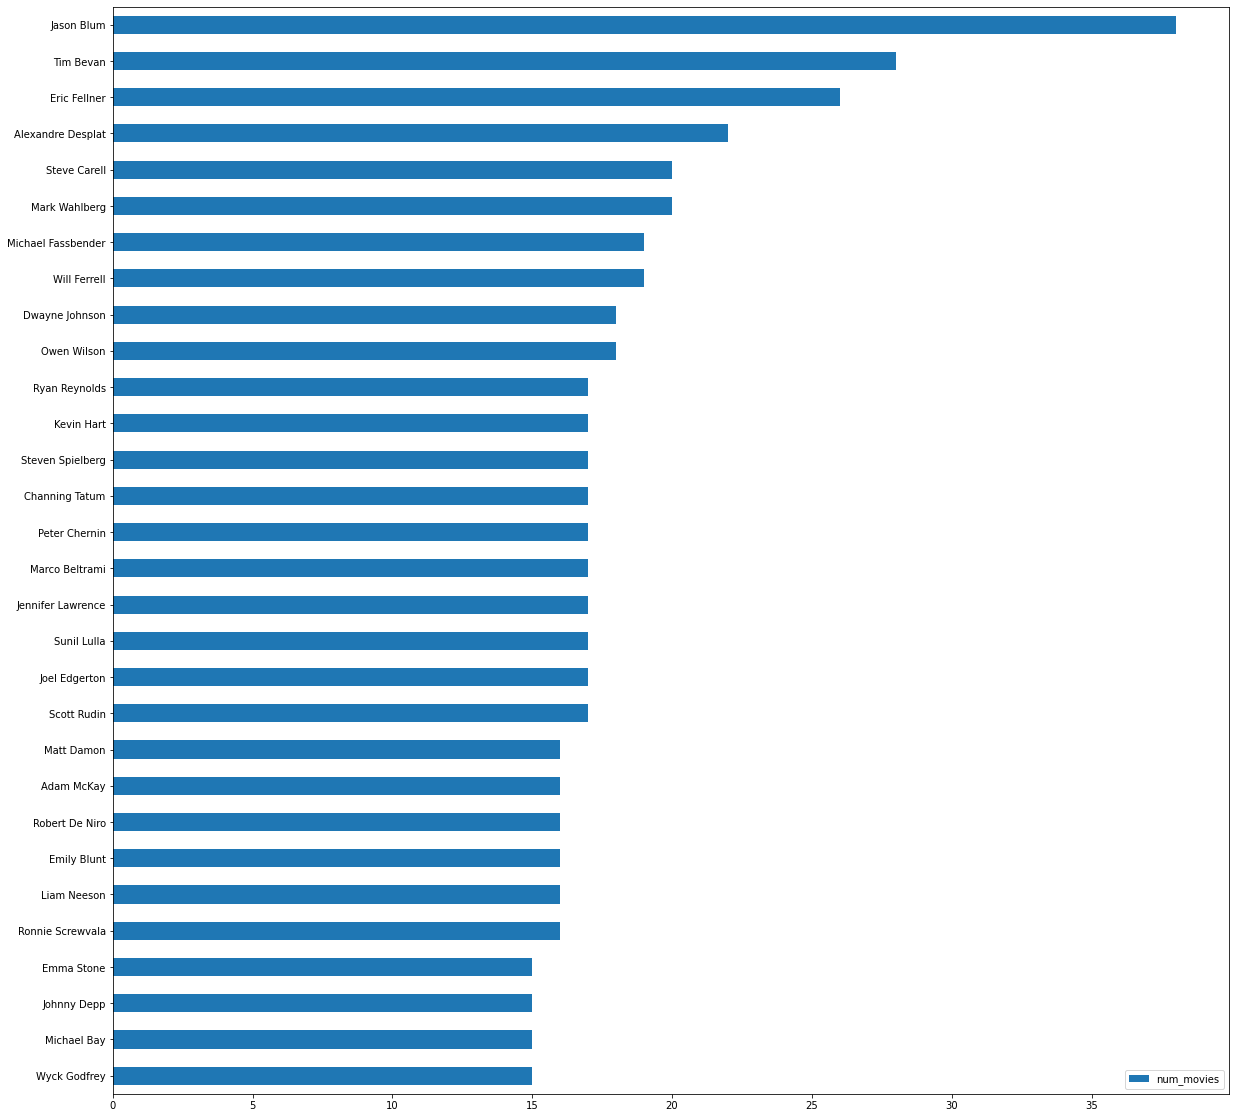

In [149]:
#Group Film Revenue Information by principal
principals_revenue_df = group_revenue_info(revenue_and_principals_df,'principals')
#Sort Grouped principal/Revenue by num_movies
principals_revenue_df.sort_values(by='num_movies',ascending=True)[['num_movies']].tail(30).plot(kind='barh',figsize=(20,20))

  Total Domestic Revenue Total Foreign Revenue      Total Revenue
0               Stan Lee              Stan Lee           Stan Lee
1             Jack Kirby            Jack Kirby         Jack Kirby
2      Robert Downey Jr.     Robert Downey Jr.  Robert Downey Jr.
3            Chris Evans        Dwayne Johnson     Dwayne Johnson
4            Kevin Feige           Chris Evans        Chris Evans
5         Dwayne Johnson            Vin Diesel        Kevin Feige
6            Chris Pratt       Chris Hemsworth         Vin Diesel
7      Jennifer Lawrence           Kevin Feige    Chris Hemsworth
8        Chris Hemsworth        Neal H. Moritz        Chris Pratt
9       Steven Spielberg    Christopher Markus    Stephen McFeely 

  Average Domestic Revenue Average Foreign Revenue   Average Total Revenue
0          Joe Robert Cole             Ty Simpkins             Ty Simpkins
1              Ty Simpkins            Jeffrey Ford            Jeffrey Ford
2             Jeffrey Ford            Idina Men

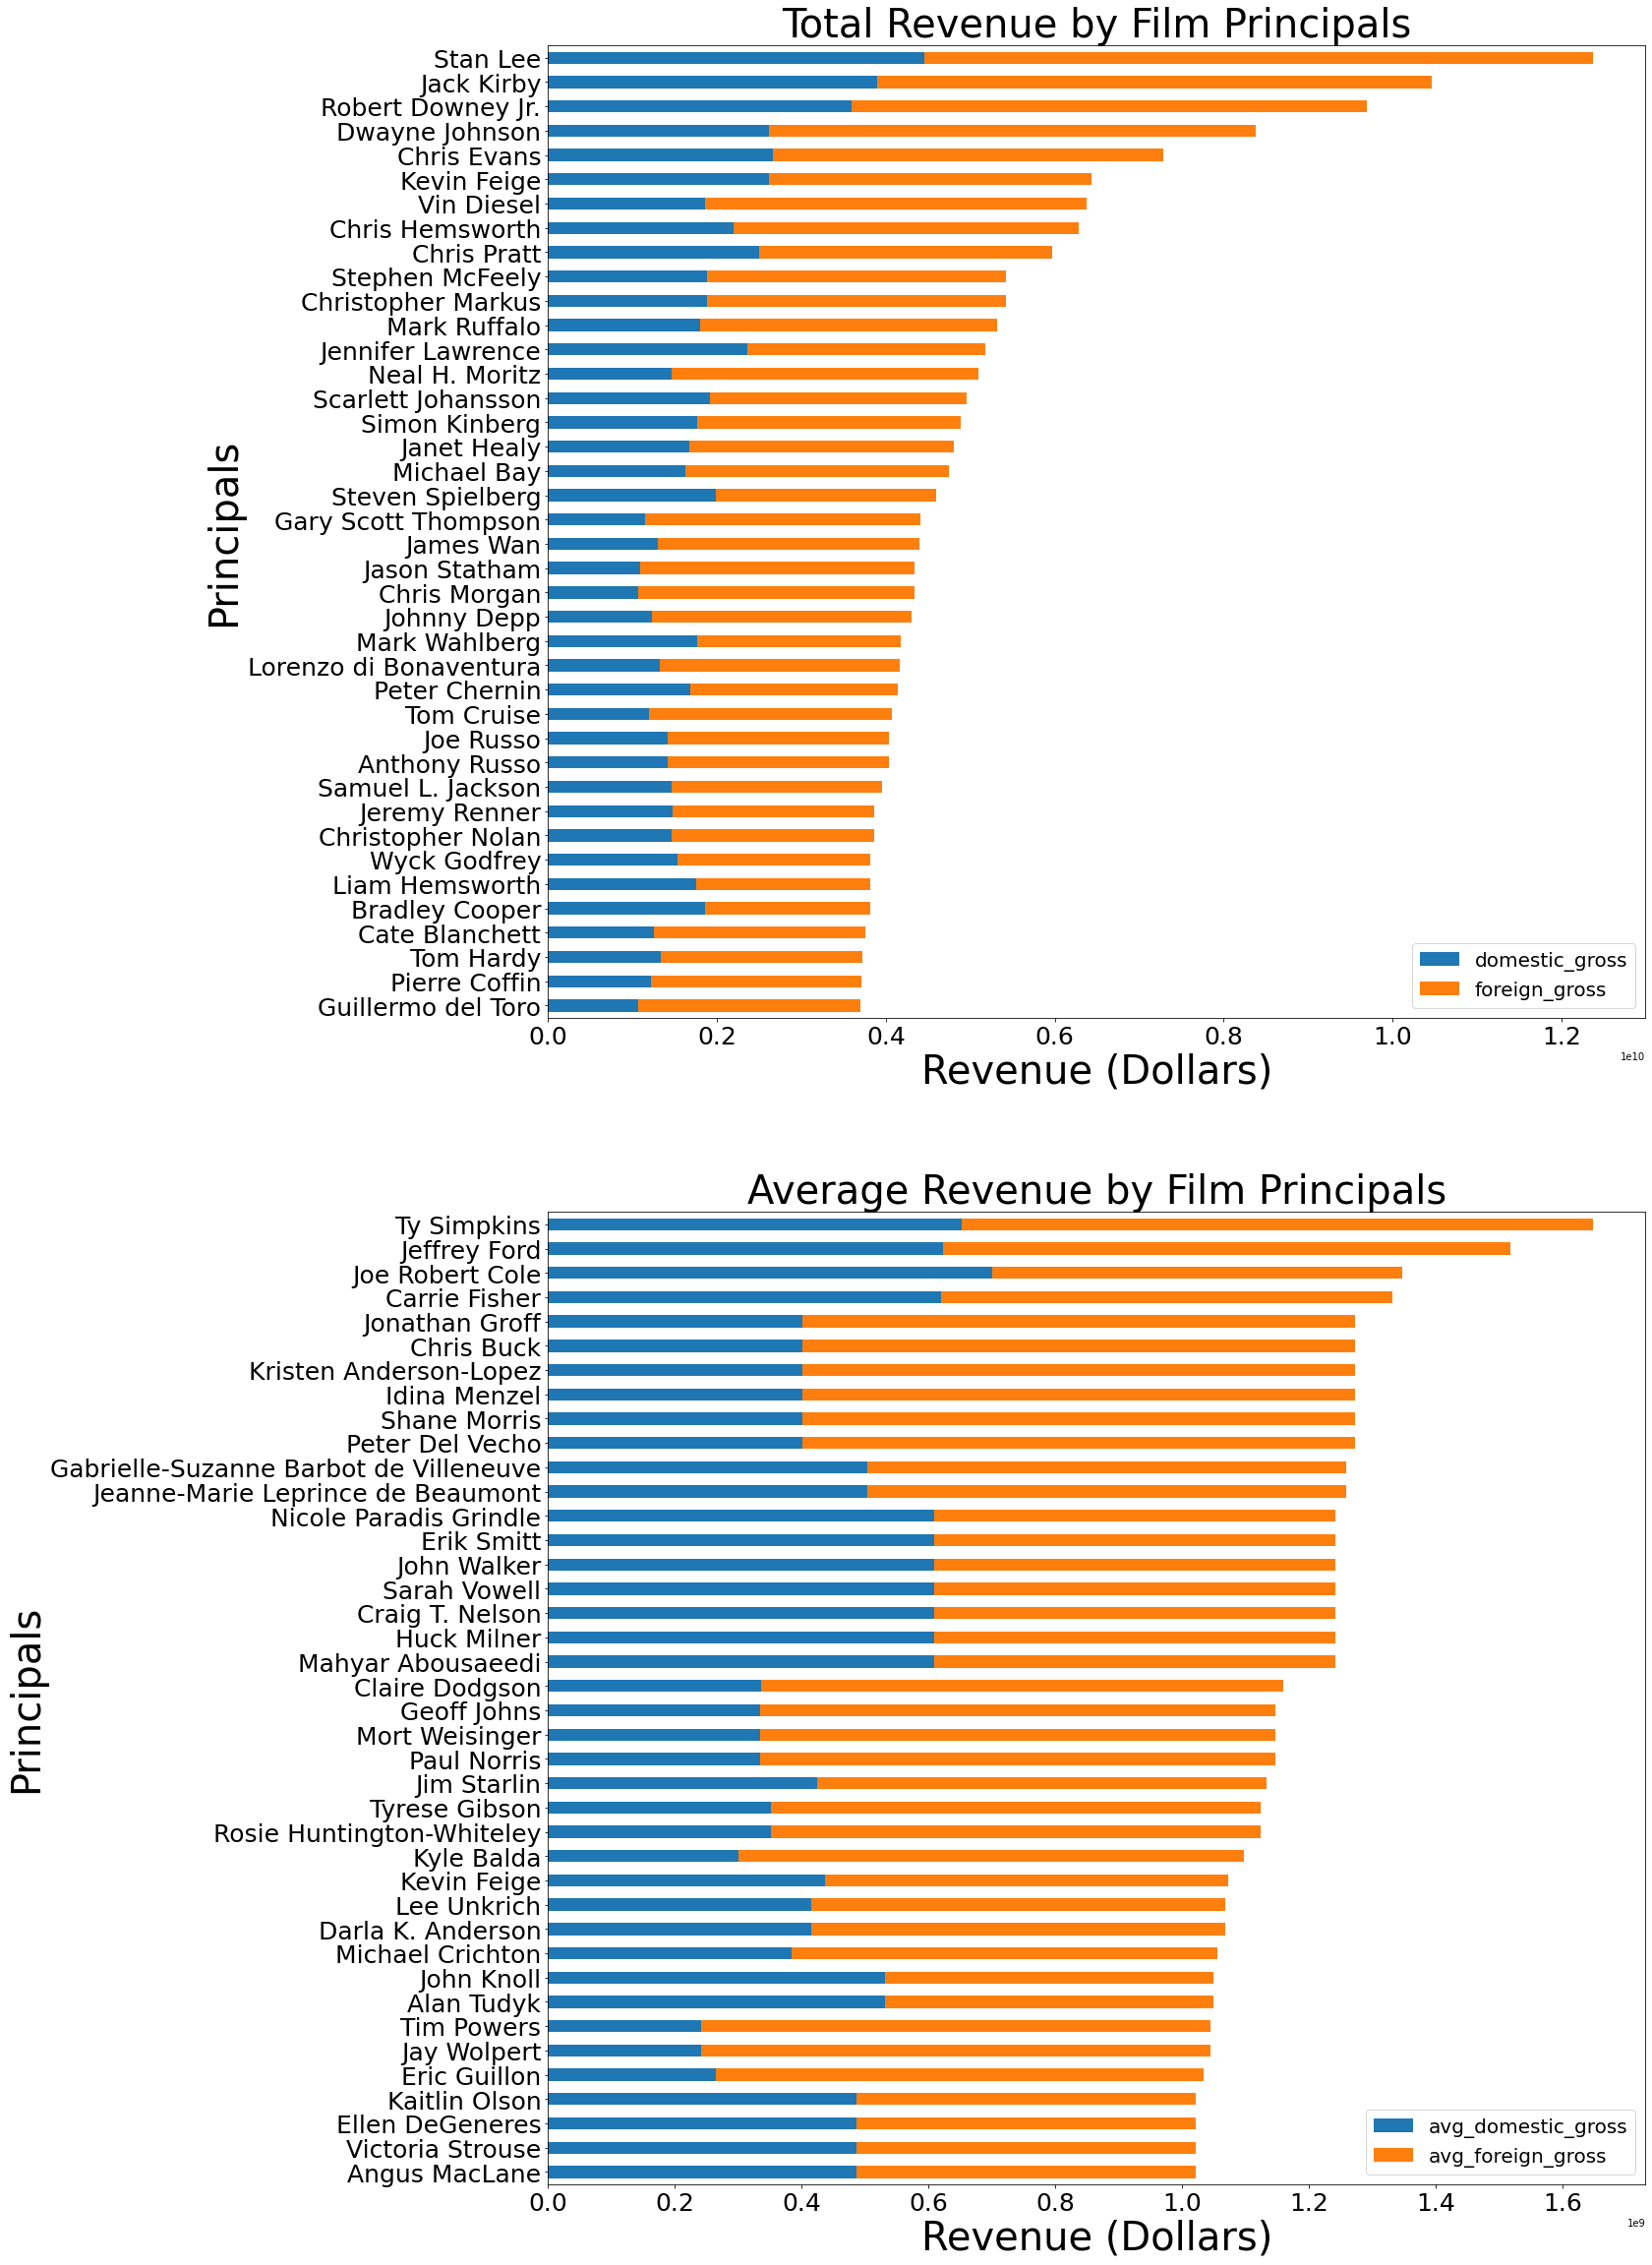

In [293]:
#Generate Revenue Rankings
generate_revenue_rankings(principals_revenue_df,"Principals")


In [241]:
#Calculate Mean/STD/Med of grouped principals/revenue df
principals_revenue_df.describe()


num_movies  domestic_gross  foreign_gross   total_gross  \
count  14042.000000    1.404200e+04   1.404200e+04  1.404200e+04   
mean       1.716778    6.762147e+07   1.038521e+08  1.714735e+08   
std        1.812023    1.860946e+08   3.122934e+08  4.902699e+08   
min        1.000000    0.000000e+00   0.000000e+00  0.000000e+00   
25%        1.000000    1.490000e+05   0.000000e+00  3.123520e+05   
50%        1.000000    3.400000e+06   4.327196e+06  1.280119e+07   
75%        2.000000    4.911248e+07   5.632697e+07  1.073771e+08   
max       38.000000    4.456986e+09   7.919255e+09  1.237624e+10   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        1.404200e+04       1.404200e+04     1.404200e+04  
mean         2.730135e+07       4.202275e+07     6.932410e+07  
std          5.408197e+07       9.484356e+07     1.427450e+08  
min          0.000000e+00       0.000000e+00     0.000000e+00  
25%          1.370000e+05       0.000000e+00     3.020000e+05  
50%          2.848587e+06       3.250731e+06     1.002626e+07  
75%          3.361886e+07       3.732571e+07     7.158476e+07  
max          7.000596e+08       9.965842e+08     1.648855e+09

  Average Domestic Revenue Average Foreign Revenue   Average Total Revenue
0                 Stan Lee                Stan Lee                Stan Lee
1           Dwayne Johnson          Dwayne Johnson          Dwayne Johnson
2        Jennifer Lawrence             Michael Bay             Michael Bay
3           Bradley Cooper             Johnny Depp       Jennifer Lawrence
4         Steven Spielberg  Lorenzo di Bonaventura             Johnny Depp
5              Michael Bay       Jennifer Lawrence  Lorenzo di Bonaventura
6               Kevin Hart     James Newton Howard        Steven Spielberg
7             Wyck Godfrey        Steven Spielberg     James Newton Howard
8            Peter Chernin            Wyck Godfrey            Wyck Godfrey
9      James Newton Howard           Peter Chernin          Bradley Cooper 



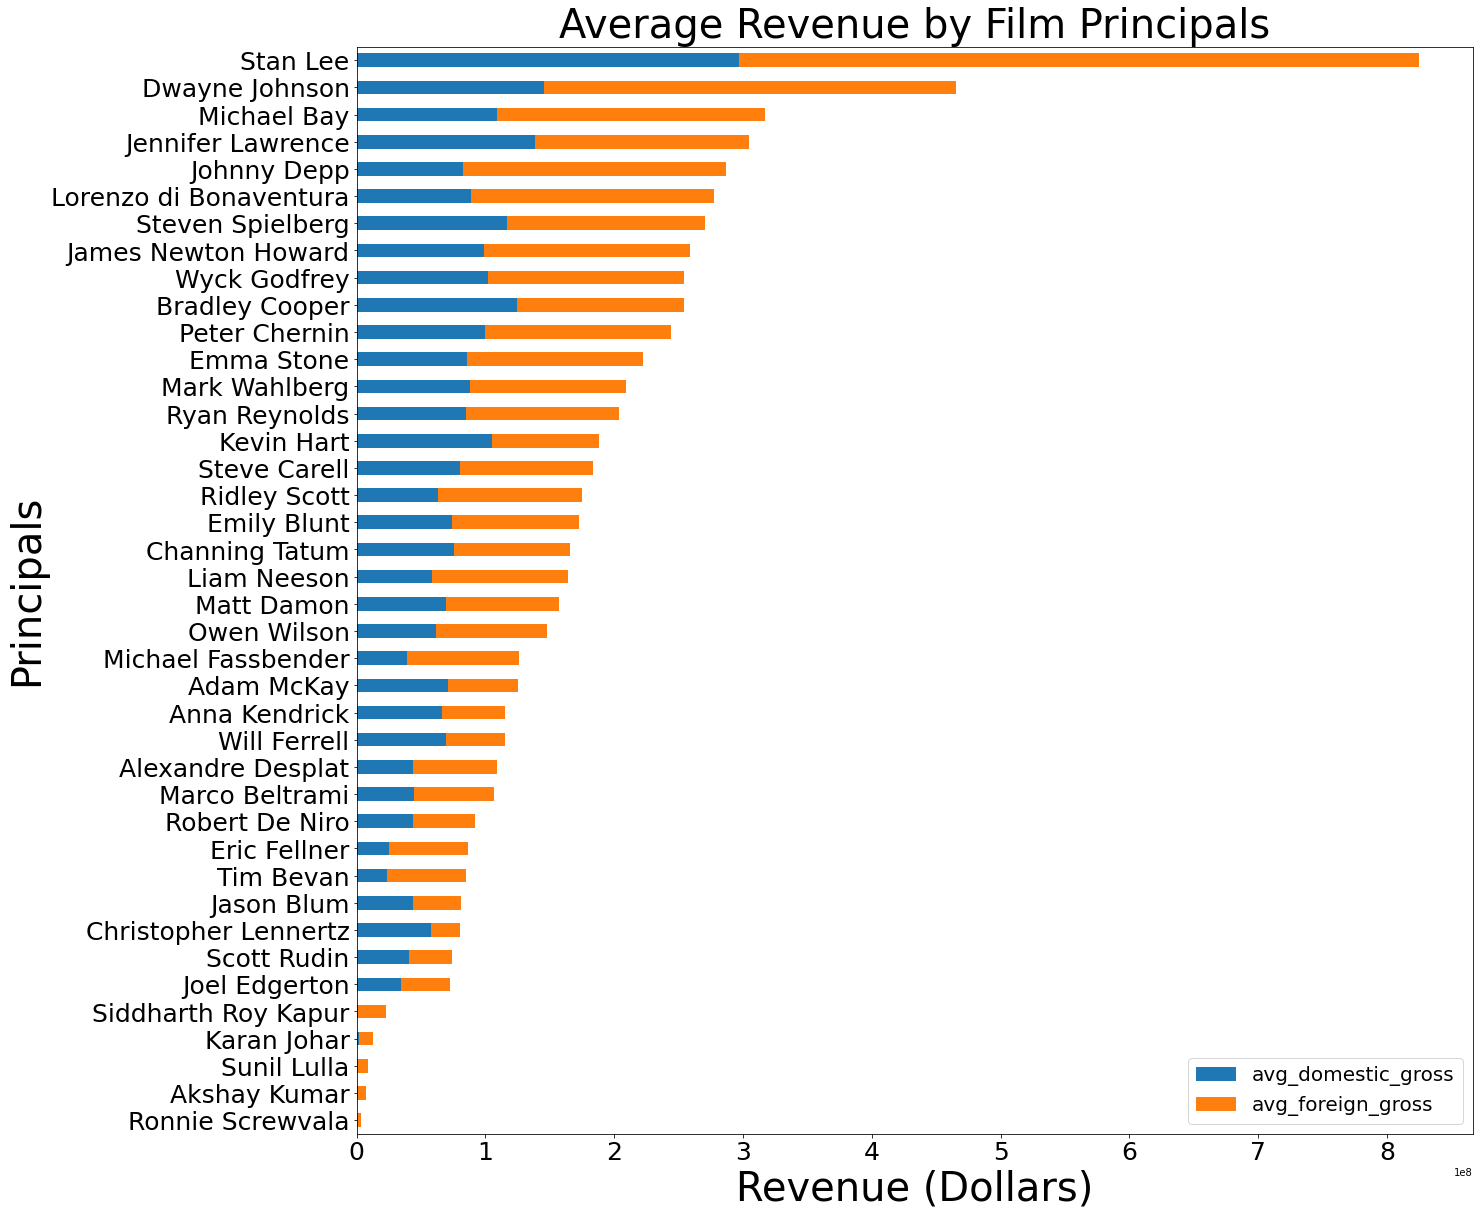

In [294]:
#Generate Average Revenue rankings for 40 busiest principals, Number Restricted
generate_revenue_rankings(principals_revenue_df.sort_values(by='num_movies',ascending=False).head(40),'Principals',avg_only='y')


In [242]:
#Calculate Mean/STD/Med of grouped principals/revenue df
principals_revenue_df.sort_values(by='num_movies',ascending=False).head(40).describe()


num_movies  domestic_gross  foreign_gross   total_gross  \
count   40.000000    4.000000e+01   4.000000e+01  4.000000e+01   
mean    17.525000    1.208000e+09   1.770167e+09  2.978167e+09   
std      4.420161    8.167295e+08   1.474275e+09  2.234795e+09   
min     14.000000    9.678500e+06   4.523830e+07  5.491680e+07   
25%     15.000000    7.337955e+08   8.421607e+08  1.788998e+09   
50%     16.500000    1.160130e+09   1.583335e+09  2.646907e+09   
75%     17.250000    1.616820e+09   2.250465e+09  3.811601e+09   
max     38.000000    4.456986e+09   7.919255e+09  1.237624e+10   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        4.000000e+01       4.000000e+01     4.000000e+01  
mean         7.145517e+07       1.053052e+08     1.767604e+08  
std          5.262306e+07       9.550007e+07     1.452735e+08  
min          6.049062e+05       2.827394e+06     3.432300e+06  
25%          4.292878e+07       4.754915e+07     8.606891e+07  
50%          6.938554e+07       8.726351e+07     1.605125e+08  
75%          9.107707e+07       1.387751e+08     2.463479e+08  
max          2.971324e+08       5.279503e+08     8.250827e+08

In [152]:
#Make a year column for filtering by year
revenue_and_principals_df['year'] = revenue_and_principals_df['i_tuple'].map(lambda i_tuple: i_tuple[1])
#print(revenue_and_principals_df['year'].value_counts())
revenue_and_principals_df.head()


i_tuple  \
0                (#horror, 2015)   
1    (10 cloverfield lane, 2016)   
2  (10 days in a madhouse, 2015)   
3            (102 not out, 2018)   
4               (11 11 11, 2011)   

                                     principals_imdb principals_rt  \
0  (Leif Shackelford, Sadie Seelert, Haley Murphy...                 
1  (Lindsey Weber, John Goodman, Mary Elizabeth W...                 
2  (Aaron R.F. Anderson, Caroline Barry, Christop...                 
3  (Mansi Dhruv Mehta, Amitabh Bachchan, Rishi Ka...                 
4  (Ferran Monje, Timothy Gibbs, Michael Landes, ...                 

                                          principals  domestic_gross  \
0  (Jason Ludman, Haley Murphy, Oren Segal, Blue ...             0.0   
1  (Matthew Stuecken, John Goodman, John Gallaghe...      72082999.0   
2  (Timothy Hines, Martin Wiley, Aaron R.F. Ander...         14616.0   
3  (Jimit Trivedi, Saumya Joshi, Amitabh Bachchan...       1300000.0   
4  (Timothy Gibbs, Michael Landes, Darren Lynn Bo...         32800.0   

   foreign_gross    year  
0            0.0  2015.0  
1     36203423.0  2016.0  
2            0.0  2015.0  
3     10900000.0  2018.0  
4      5700000.0  2011.0

In [153]:
#Examine Value Counts for Film year column in principals revenue dataframe
revenue_and_principals_df['year'].value_counts()


2015.0    316
2016.0    290
2014.0    287
2012.0    266
2011.0    261
2013.0    255
2010.0    229
2017.0    226
2018.0    219
2019.0     48
2000.0     26
2009.0     21
2004.0     21
2003.0     19
2007.0     19
2006.0     19
2001.0     16
2002.0     16
2008.0     15
2005.0     15
1999.0     13
1997.0      9
1998.0      9
1996.0      8
1994.0      7
1995.0      6
1981.0      5
1980.0      3
1987.0      3
1985.0      3
1990.0      3
1983.0      3
1984.0      3
1971.0      2
1978.0      2
1986.0      2
1992.0      2
1993.0      2
1991.0      2
1988.0      2
1960.0      2
1982.0      2
1972.0      1
1965.0      1
1951.0      1
1973.0      1
1950.0      1
1959.0      1
1974.0      1
1975.0      1
1968.0      1
1946.0      1
2020.0      1
1969.0      1
1955.0      1
Name: year, dtype: int64

  Total Domestic Revenue Total Foreign Revenue      Total Revenue
0      Robert Downey Jr.     Robert Downey Jr.  Robert Downey Jr.
1          Jeremy Renner       Kristen Stewart    Kristen Stewart
2        Kristen Stewart         Jeremy Renner      Jeremy Renner
3        Karen Rosenfelt       Karen Rosenfelt    Karen Rosenfelt
4           Wyck Godfrey      Robert Pattinson   Robert Pattinson
5       Robert Pattinson          Wyck Godfrey       Wyck Godfrey
6         Taylor Lautner           Johnny Depp  Melissa Rosenberg
7        Stephenie Meyer       Stephenie Meyer    Stephenie Meyer
8      Melissa Rosenberg        Taylor Lautner     Taylor Lautner
9            Chris Evans     Melissa Rosenberg        Johnny Depp 

  Average Domestic Revenue Average Foreign Revenue      Average Total Revenue
0                 Zak Penn          Alan Silvestri            Seamus McGarvey
1          Seamus McGarvey            Jeffrey Ford             Alan Silvestri
2             Jeffrey Ford            

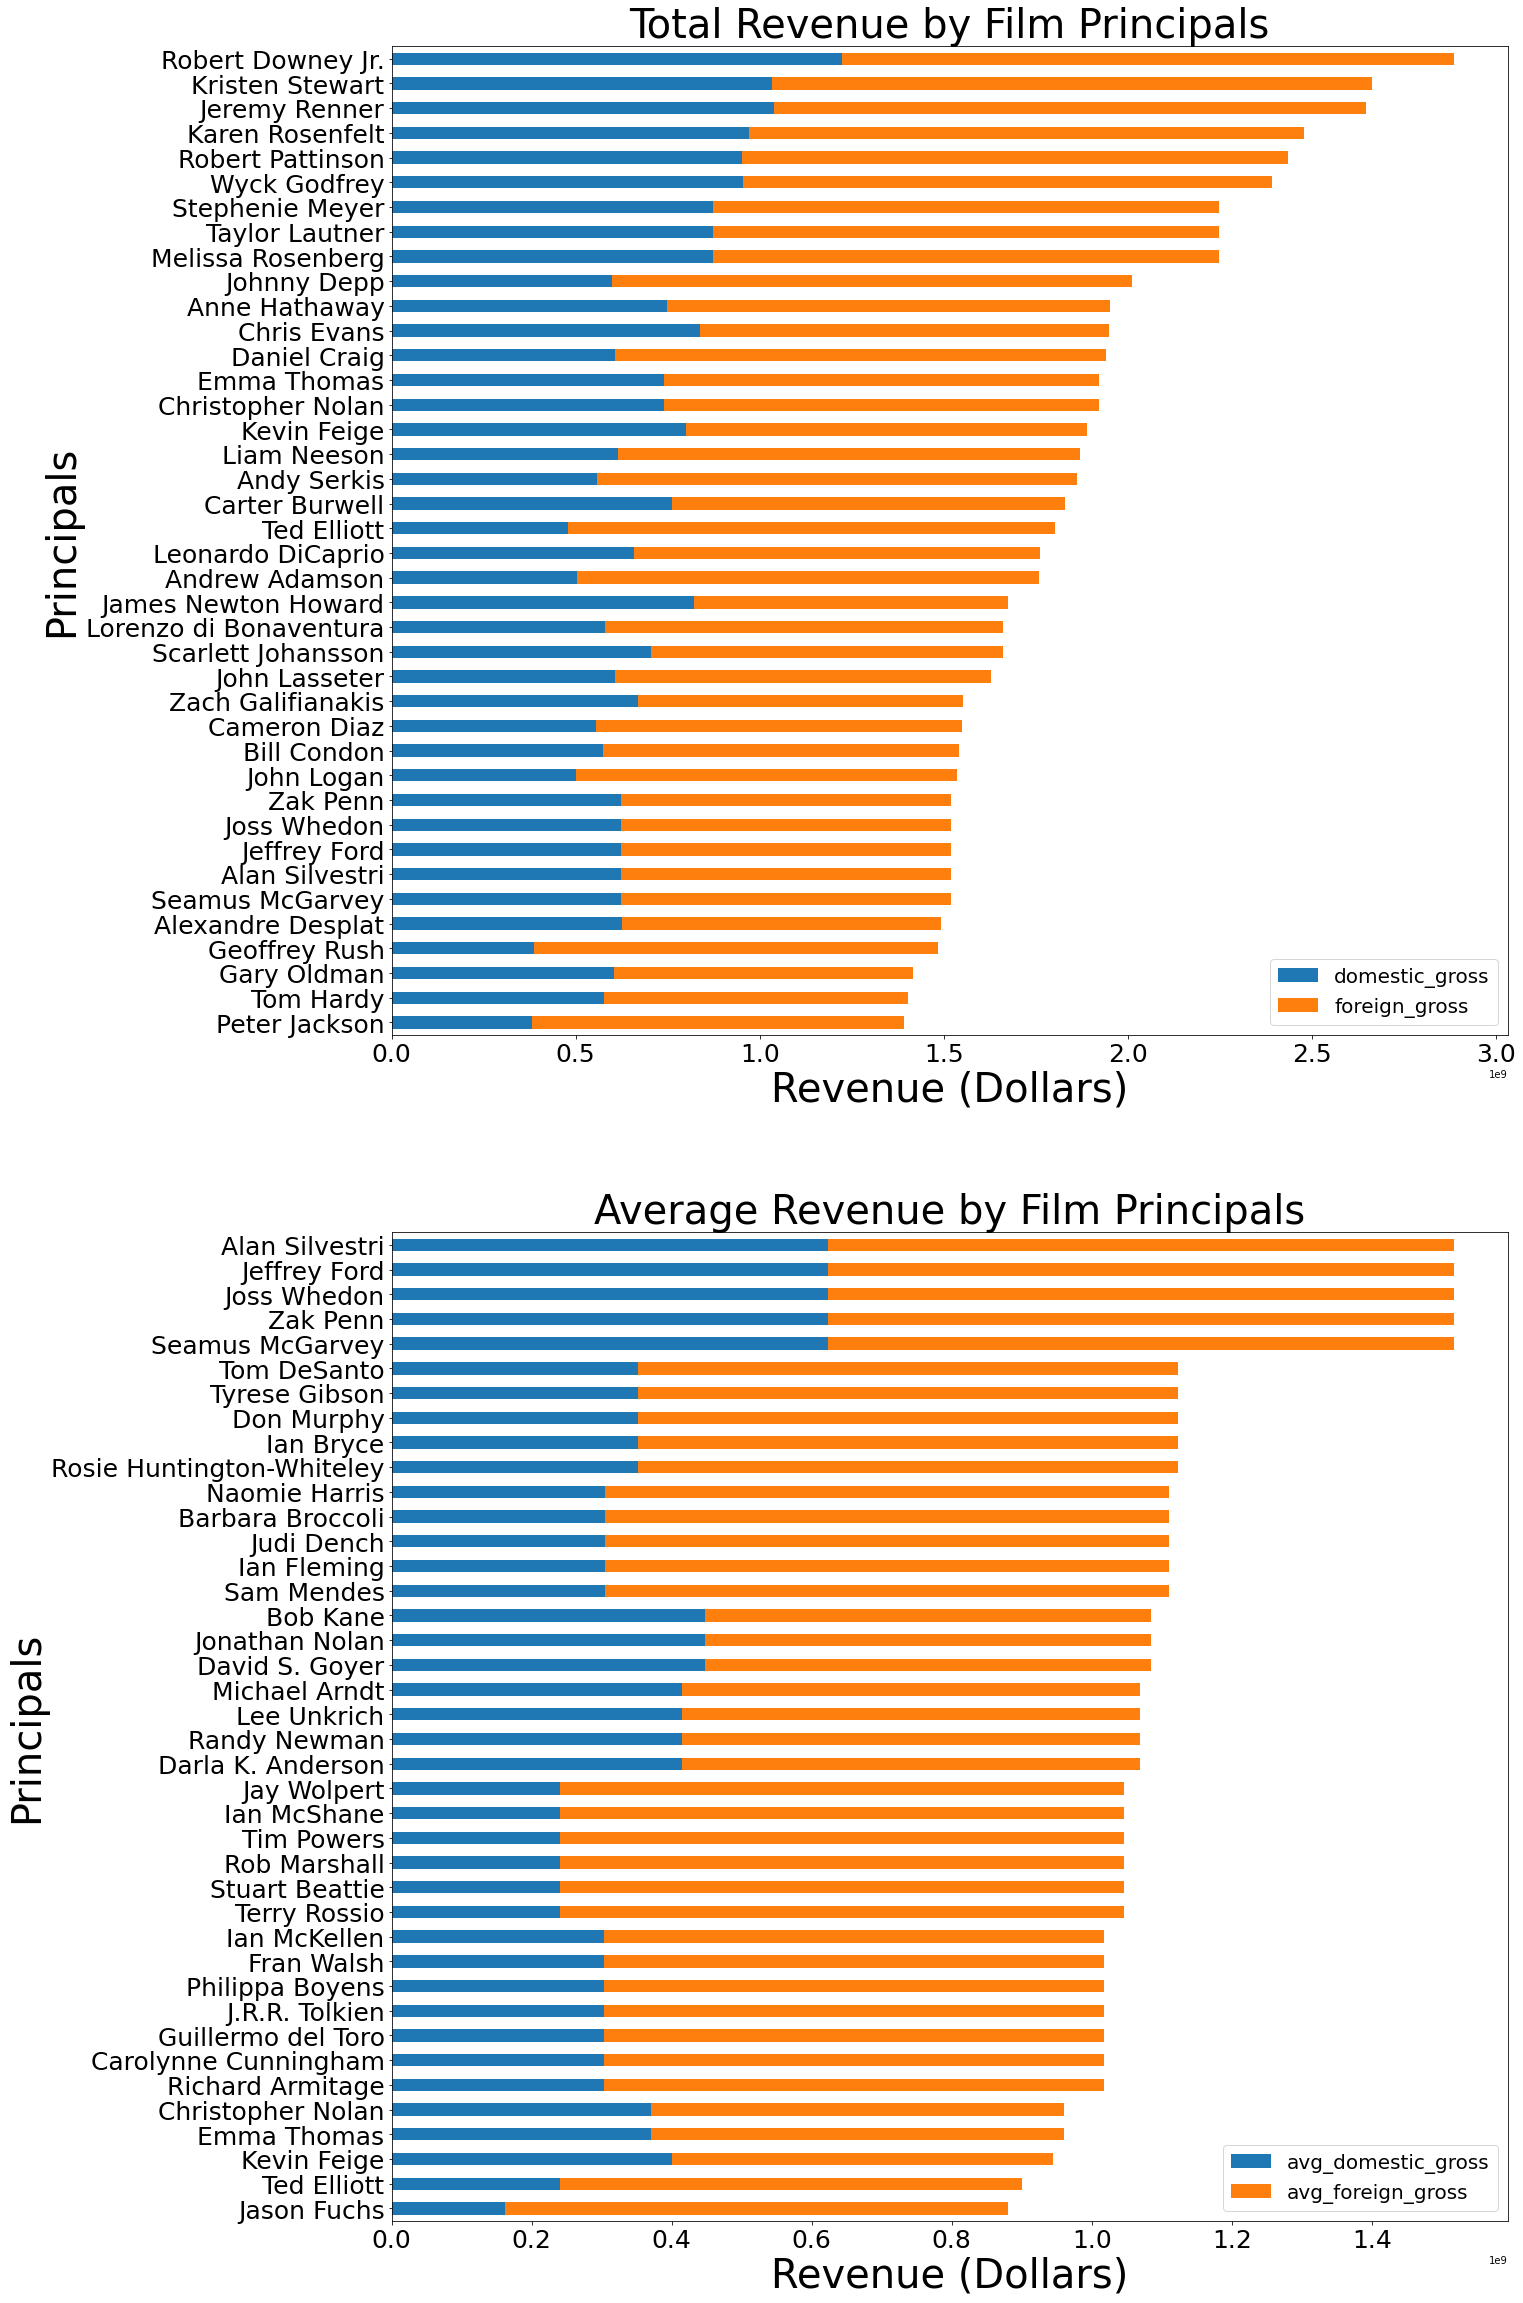

In [295]:
#A:2010-2012  
revenue_and_principals_2010_df = revenue_and_principals_df[(revenue_and_principals_df['year']>=2010)&(revenue_and_principals_df['year']<=2012)]
principals_revenue_2010_df = group_revenue_info(revenue_and_principals_2010_df,'principals')
generate_revenue_rankings(principals_revenue_2010_df,"Principals")


  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0          Kristen Stewart             Johnny Depp       Kristen Stewart
1         Robert Pattinson         Kristen Stewart      Robert Pattinson
2        Jennifer Lawrence        Robert Pattinson           Johnny Depp
3      James Newton Howard             Liam Neeson           Liam Neeson
4              Johnny Depp             Ben Stiller   James Newton Howard
5              Jason Segel             Jason Segel     Jennifer Lawrence
6           Bradley Cooper     James Newton Howard           Ben Stiller
7             Adam Sandler             Owen Wilson           Jason Segel
8              Liam Neeson          Bradley Cooper        Bradley Cooper
9              Ben Stiller       Jennifer Lawrence           Owen Wilson 



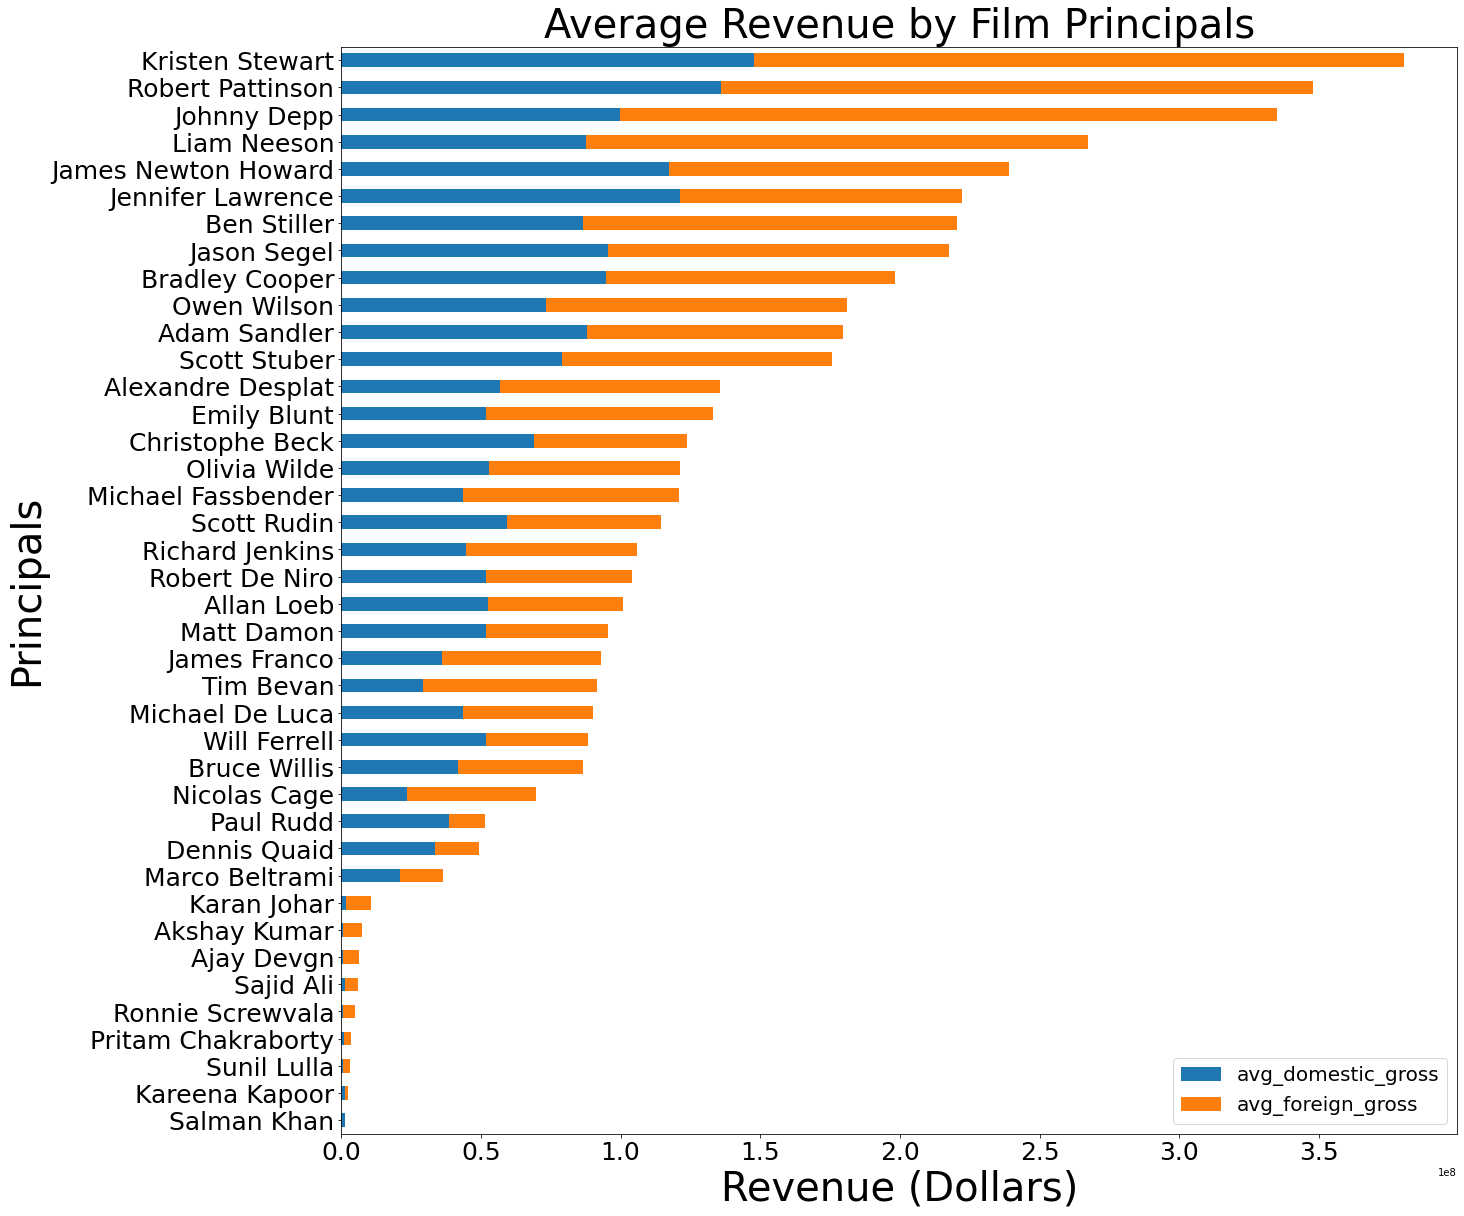

In [296]:
#A:2010-2012 Average Revenue
generate_revenue_rankings(principals_revenue_2010_df.sort_values(by='num_movies',ascending=False).head(40),'Principals',avg_only='y')


In [243]:
#Calculate Mean/STD/Med of grouped principals/revenue df
principals_revenue_2010_df.describe()


num_movies  domestic_gross  foreign_gross   total_gross  \
count  5473.000000    5.473000e+03   5.473000e+03  5.473000e+03   
mean      1.346793    5.131198e+07   7.438370e+07  1.256957e+08   
std       0.891376    1.014571e+08   1.668819e+08  2.625078e+08   
min       1.000000    0.000000e+00   0.000000e+00  0.000000e+00   
25%       1.000000    2.510000e+05   3.130000e+04  8.426930e+05   
50%       1.000000    6.738954e+06   8.199999e+06  2.046602e+07   
75%       1.000000    5.681666e+07   5.979170e+07  1.177410e+08   
max      11.000000    1.223100e+09   1.663394e+09  2.886495e+09   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        5.473000e+03       5.473000e+03     5.473000e+03  
mean         3.297450e+07       4.847250e+07     8.144700e+07  
std          5.721171e+07       1.042739e+08     1.568826e+08  
min          0.000000e+00       0.000000e+00     0.000000e+00  
25%          2.460000e+05       3.130000e+04     8.307000e+05  
50%          6.000000e+06       6.871779e+06     1.715519e+07  
75%          4.433822e+07       4.690000e+07     8.866774e+07  
max          6.232795e+08       8.946564e+08     1.517936e+09

  Total Domestic Revenue Total Foreign Revenue       Total Revenue
0               Stan Lee              Stan Lee            Stan Lee
1             Jack Kirby            Jack Kirby          Jack Kirby
2            Chris Pratt        Dwayne Johnson          Vin Diesel
3      Jennifer Lawrence            Vin Diesel      Dwayne Johnson
4        Josh Hutcherson          Ian McKellen         Chris Pratt
5              Jon Kilik          Chris Morgan   Robert Downey Jr.
6         Liam Hemsworth     Robert Downey Jr.        Ian McKellen
7          Nina Jacobson    Guillermo del Toro   Jennifer Lawrence
8        Suzanne Collins           Paul Walker     Josh Hutcherson
9       Francis Lawrence        Neal H. Moritz  Guillermo del Toro 

  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0      Bryce Dallas Howard        Michael Fottrell           Ty Simpkins
1              Ty Simpkins             Ty Simpkins       Colin Trevorrow
2          Patrick Crowley         Colin T

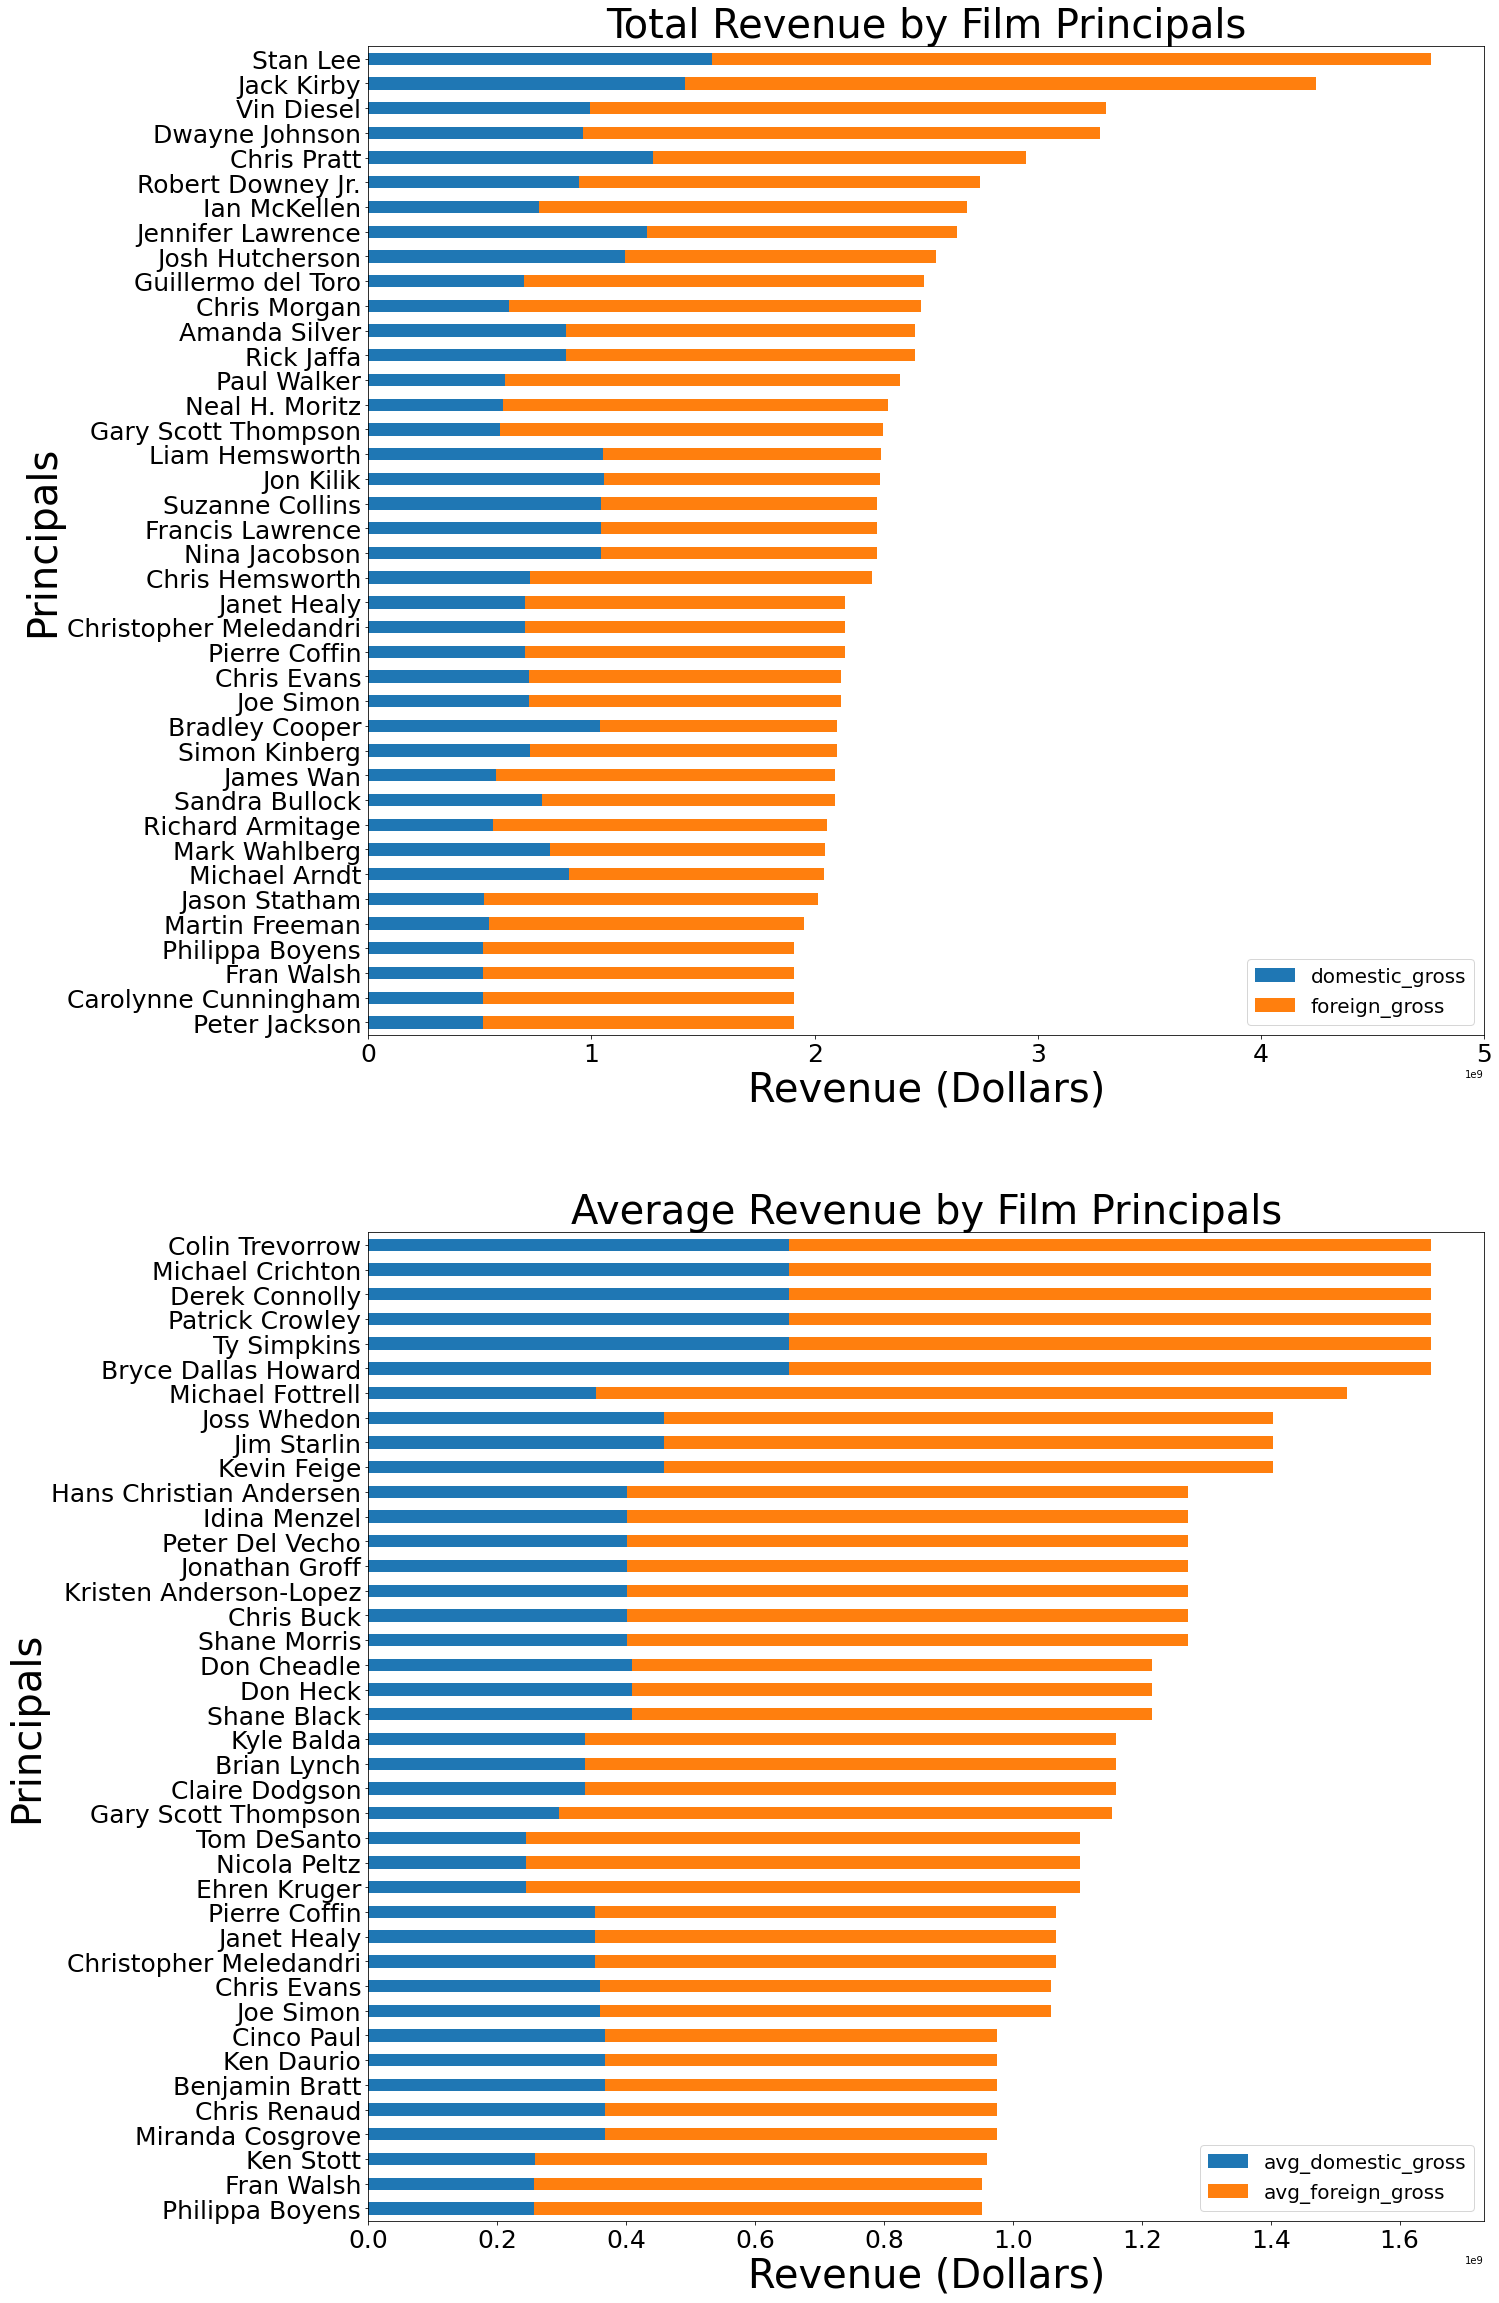

In [297]:
#A:2013-2015
revenue_and_principals_2013_df = revenue_and_principals_df[(revenue_and_principals_df['year']>=2013)&(revenue_and_principals_df['year']<=2015)]
principals_revenue_2013_df = group_revenue_info(revenue_and_principals_2013_df,'principals')
generate_revenue_rankings(principals_revenue_2013_df,'Principals')


  Average Domestic Revenue Average Foreign Revenue   Average Total Revenue
0                 Stan Lee                Stan Lee                Stan Lee
1           Dwayne Johnson          Dwayne Johnson          Dwayne Johnson
2           Bradley Cooper           Simon Kinberg           Simon Kinberg
3            Simon Kinberg  Lorenzo di Bonaventura  Lorenzo di Bonaventura
4             Kristen Wiig            Kristen Wiig            Kristen Wiig
5             Will Ferrell          Cate Blanchett          Bradley Cooper
6               Bill Hader             Michael Bay          Cate Blanchett
7            Peter Chernin           Peter Chernin           Peter Chernin
8               Adam McKay          Bradley Cooper             Michael Bay
9            Mark Wahlberg              Emma Stone           Mark Wahlberg 



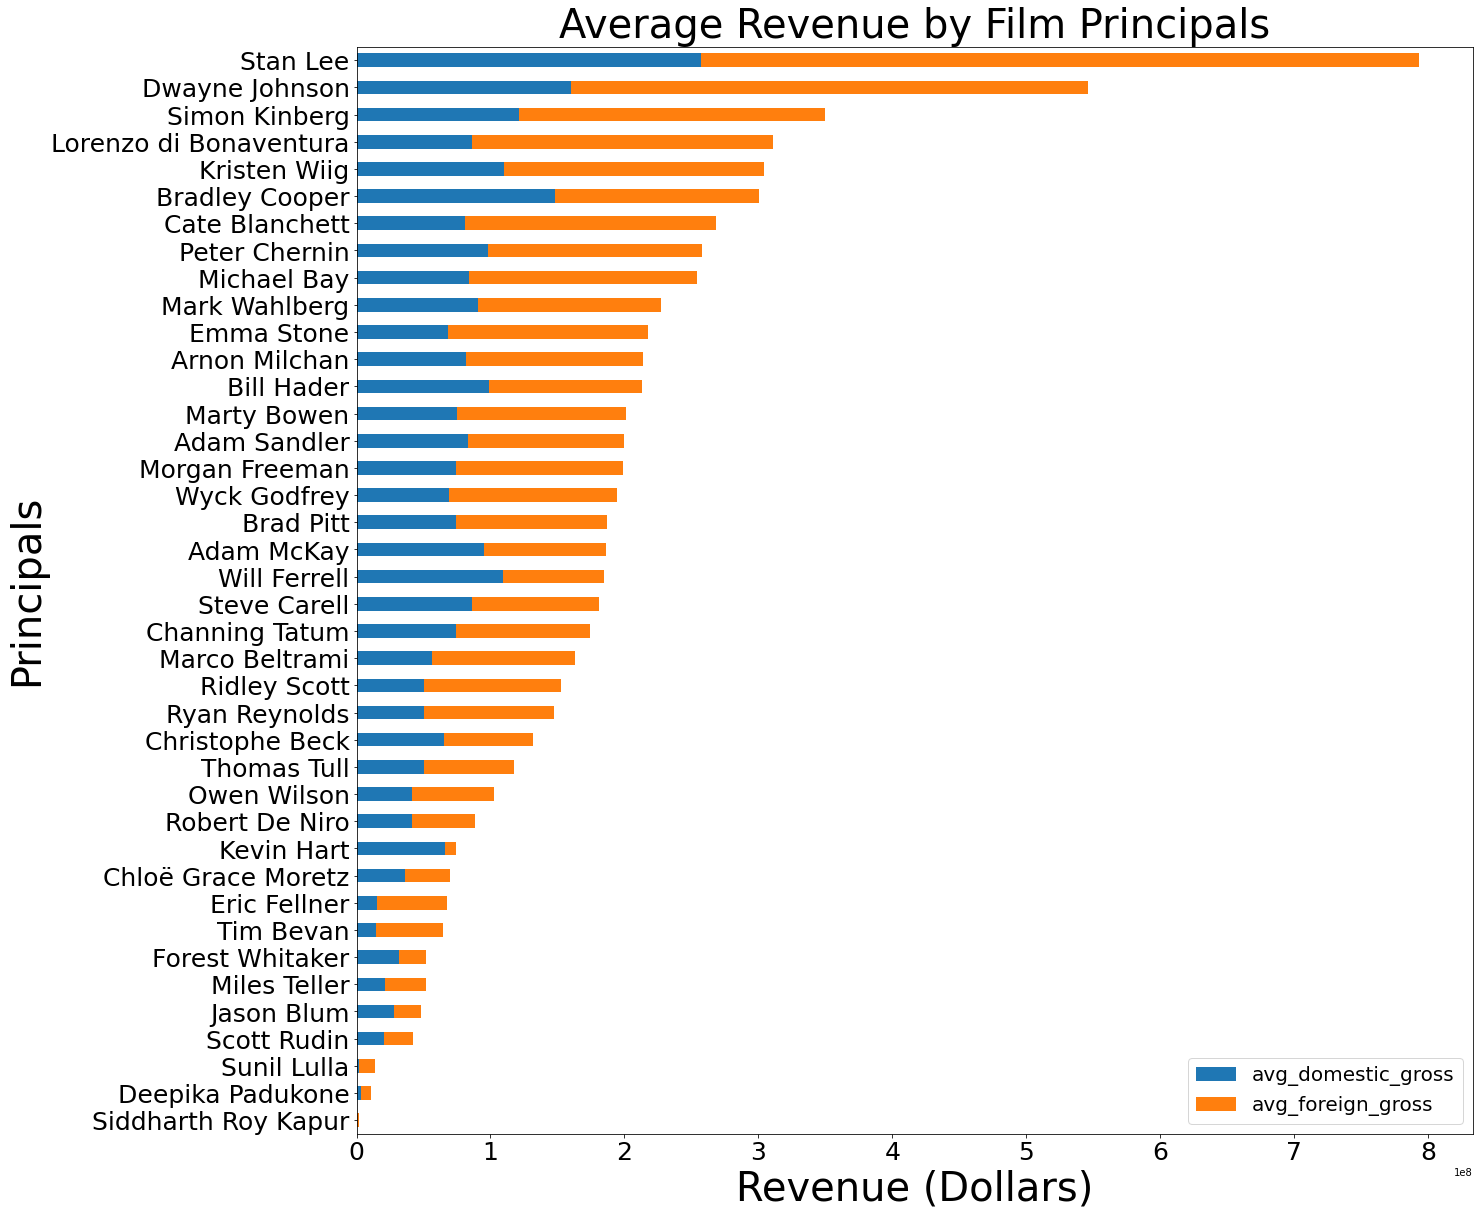

In [298]:
#A:2013-2015 Average Revenue
generate_revenue_rankings(principals_revenue_2013_df.sort_values(by='num_movies',ascending=False).head(40),'Principals',avg_only='y')


In [244]:
#Calculate Mean/STD/Med of grouped principals/revenue df
principals_revenue_2013_df.describe()


num_movies  domestic_gross  foreign_gross   total_gross  \
count  6379.000000    6.379000e+03   6.379000e+03  6.379000e+03   
mean      1.315096    4.551862e+07   7.135041e+07  1.168690e+08   
std       0.846169    1.085944e+08   1.932333e+08  2.955442e+08   
min       1.000000    0.000000e+00   0.000000e+00  0.000000e+00   
25%       1.000000    5.967100e+04   0.000000e+00  1.192000e+05   
50%       1.000000    2.274649e+06   1.703281e+06  6.591365e+06   
75%       1.000000    4.264302e+07   4.830000e+07  9.367276e+07   
max      17.000000    1.541093e+09   3.220880e+09  4.761973e+09   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        6.379000e+03       6.379000e+03     6.379000e+03  
mean         2.862799e+07       4.535158e+07     7.397957e+07  
std          5.898112e+07       1.094798e+08     1.640079e+08  
min          0.000000e+00       0.000000e+00     0.000000e+00  
25%          5.790000e+04       0.000000e+00     1.160000e+05  
50%          1.889650e+06       1.319331e+06     6.049171e+06  
75%          3.224405e+07       3.517581e+07     7.053687e+07  
max          6.522706e+08       1.165716e+09     1.648855e+09

  Total Domestic Revenue Total Foreign Revenue       Total Revenue
0               Stan Lee              Stan Lee            Stan Lee
1             Jack Kirby            Jack Kirby          Jack Kirby
2      Robert Downey Jr.        Dwayne Johnson   Robert Downey Jr.
3           George Lucas     Robert Downey Jr.      Dwayne Johnson
4         Dwayne Johnson          Mark Ruffalo         Chris Evans
5             Kevin Hart           Chris Evans        Mark Ruffalo
6          Chris McKenna         Anthony Russo  Christopher Markus
7           Erik Sommers             Joe Russo     Stephen McFeely
8            Chris Evans    Christopher Markus           Joe Russo
9        Chris Hemsworth       Stephen McFeely       Anthony Russo 

  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0          Joe Robert Cole         Stephen McFeely         Anthony Russo
1            Carrie Fisher           Anthony Russo             Joe Russo
2             Rian Johnson               J

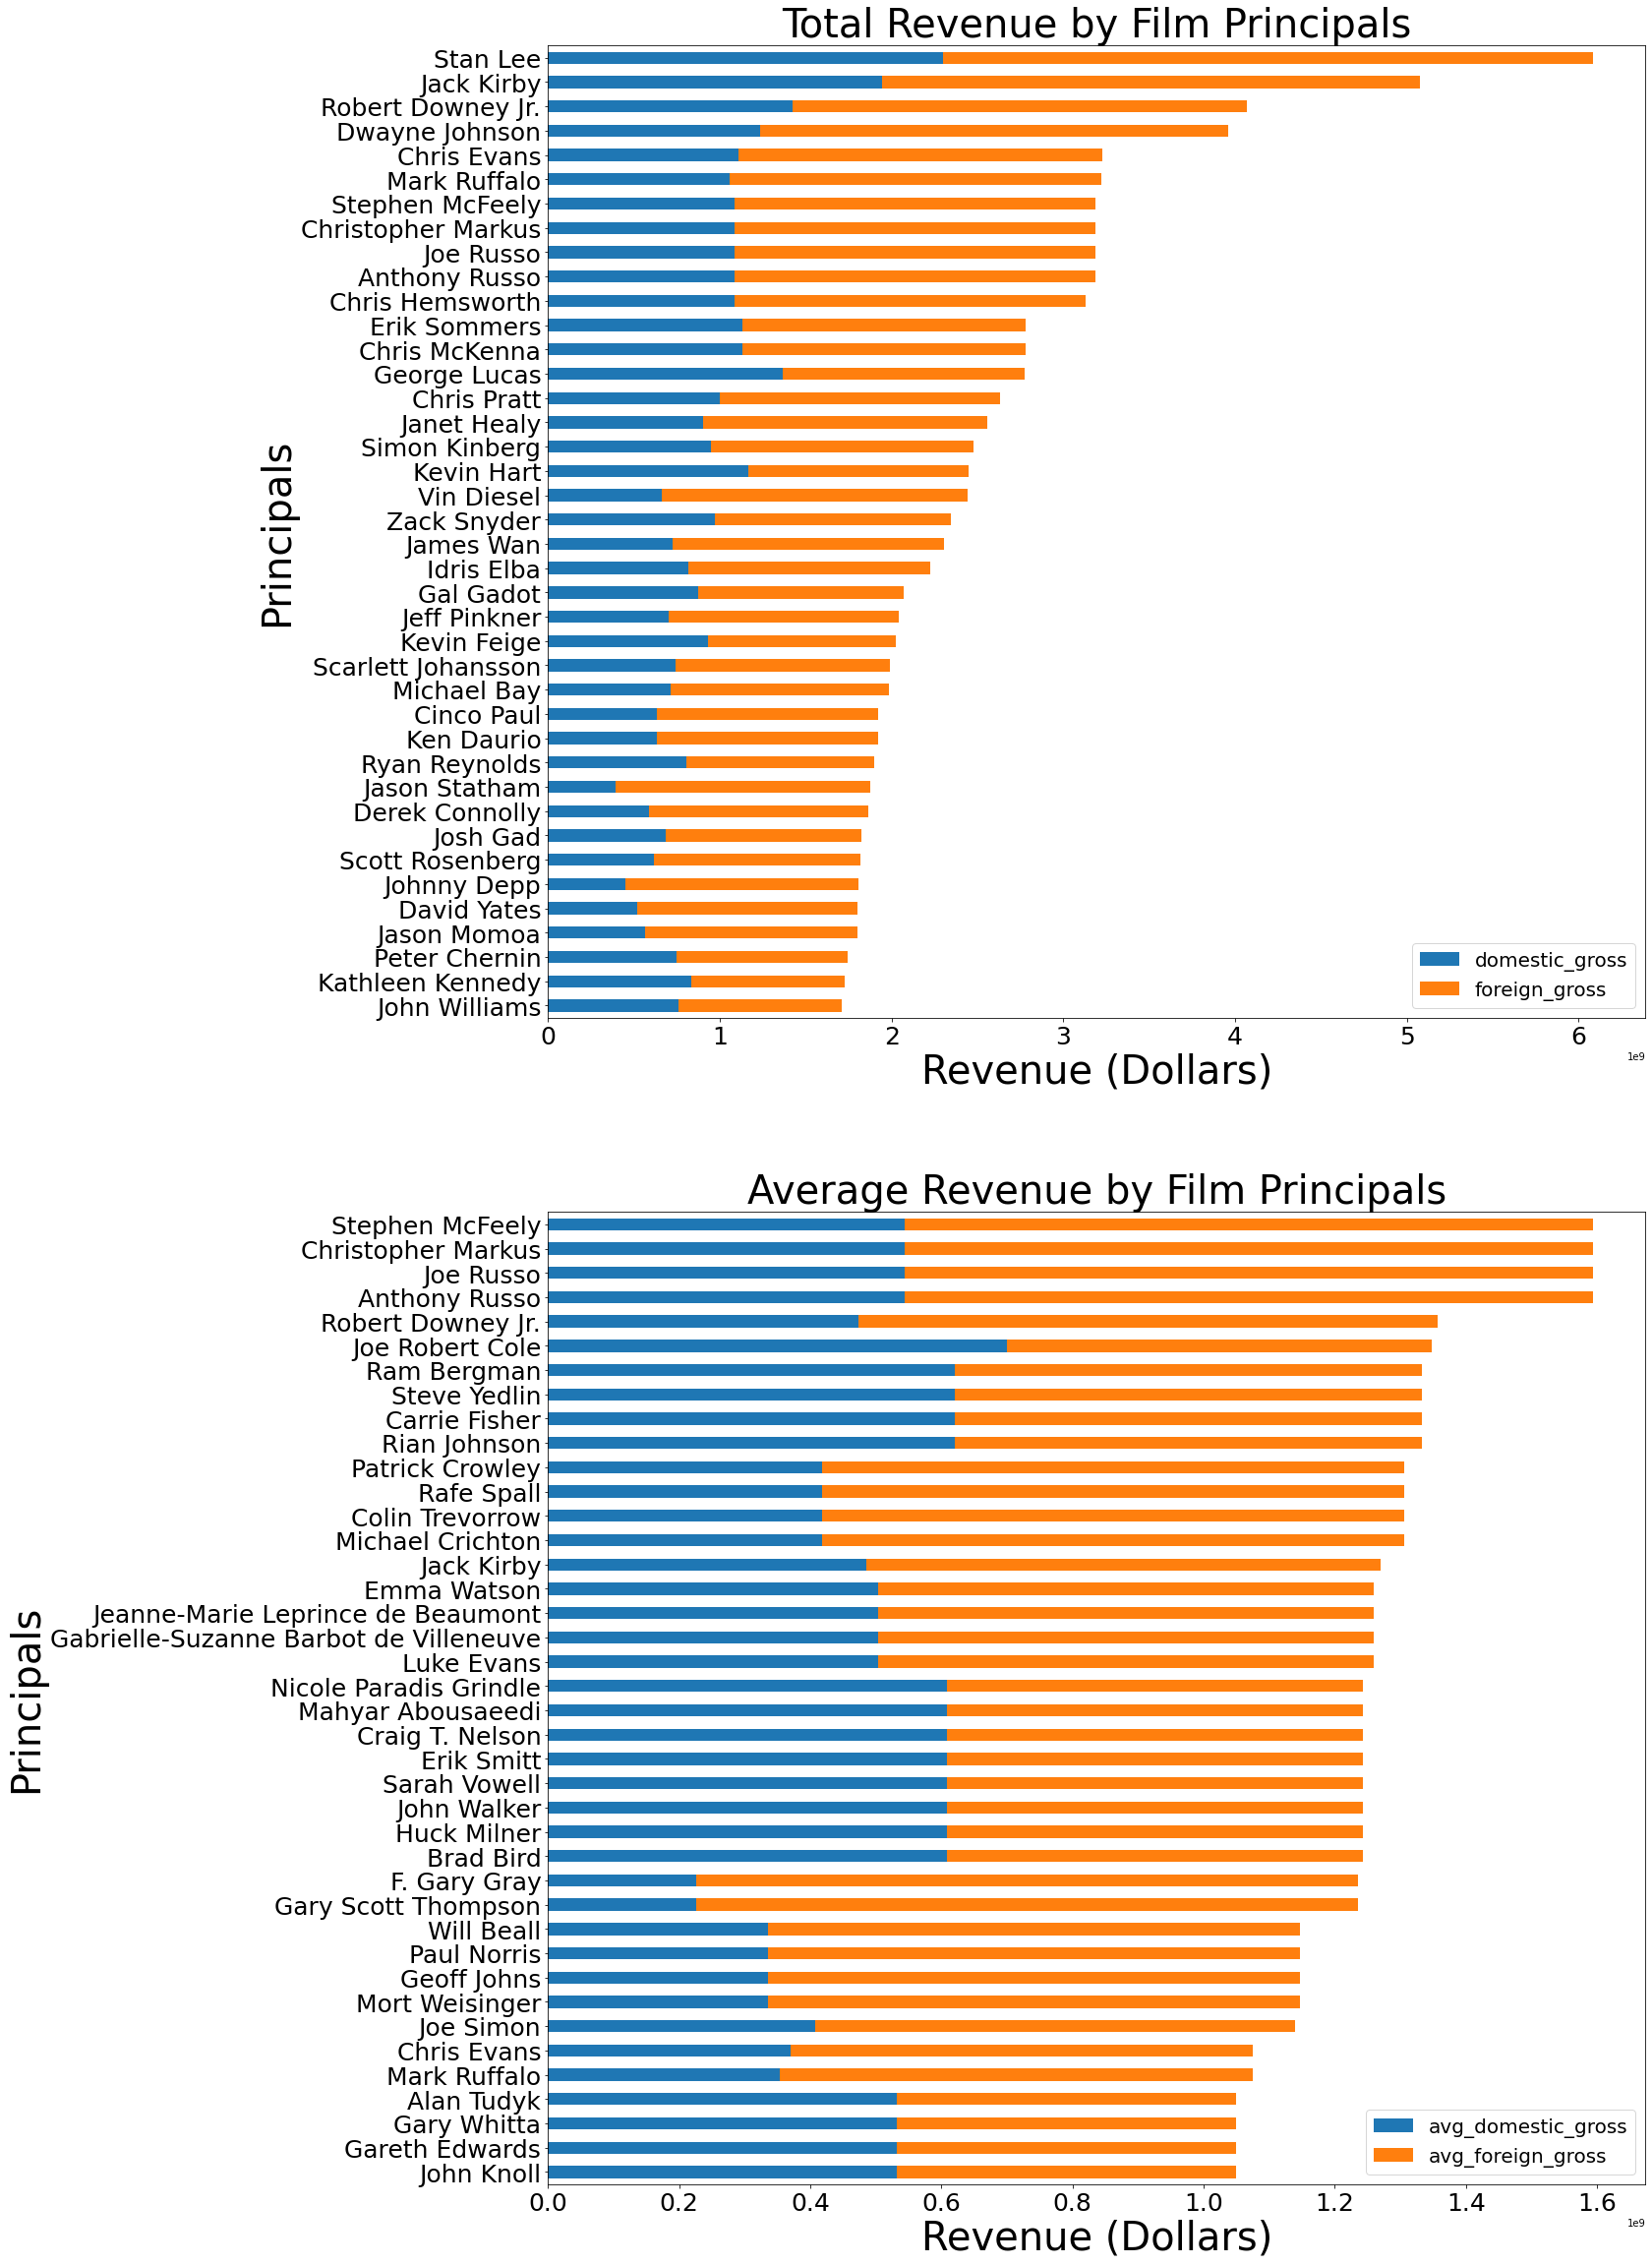

In [299]:
#A:2016-2018  
revenue_and_principals_2016_df = revenue_and_principals_df[(revenue_and_principals_df['year']>=2016)&(revenue_and_principals_df['year']<=2018)]
principals_revenue_2016_df = group_revenue_info(revenue_and_principals_2016_df,'principals')
generate_revenue_rankings(principals_revenue_2016_df,'Principals')


  Average Domestic Revenue Average Foreign Revenue Average Total Revenue
0                 Stan Lee                Stan Lee              Stan Lee
1           Dwayne Johnson          Dwayne Johnson        Dwayne Johnson
2                Gal Gadot               James Wan             James Wan
3               Kevin Hart               Gal Gadot             Gal Gadot
4                James Wan     James Newton Howard            Idris Elba
5               Idris Elba              Idris Elba            Kevin Hart
6              Michael Bay              Kevin Hart   James Newton Howard
7          Woody Harrelson             Michael Bay           Michael Bay
8            Jenno Topping         Woody Harrelson       Woody Harrelson
9      James Newton Howard          Akiva Goldsman         Peter Chernin 



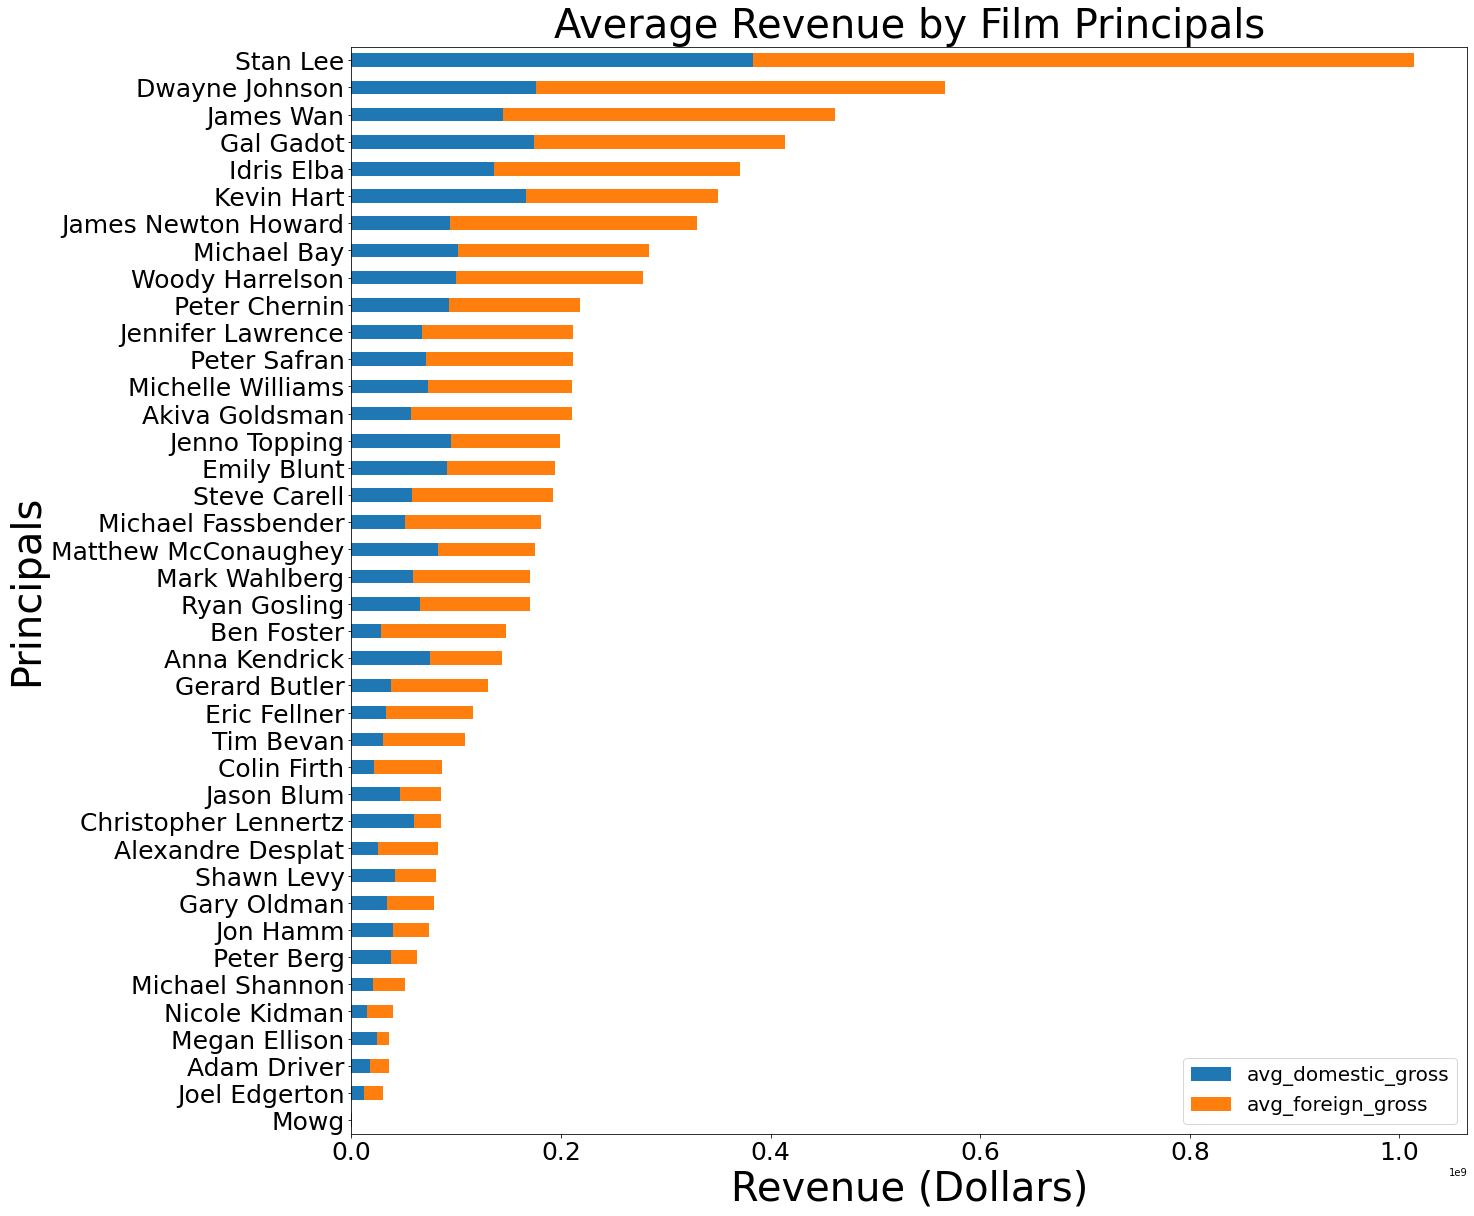

In [300]:
#A:2016-2018 Average Revenue
generate_revenue_rankings(principals_revenue_2016_df.sort_values(by='num_movies',ascending=False).head(40),'Principals',avg_only='y')


In [245]:
#Calculate Mean/STD/Med of grouped principals/revenue df
principals_revenue_2016_df.describe()


num_movies  domestic_gross  foreign_gross   total_gross  \
count  5573.000000    5.573000e+03   5.573000e+03  5.573000e+03   
mean      1.291226    5.655774e+07   9.503005e+07  1.515878e+08   
std       0.760467    1.294317e+08   2.244651e+08  3.446109e+08   
min       1.000000    0.000000e+00   0.000000e+00  0.000000e+00   
25%       1.000000    4.770000e+05   0.000000e+00  1.000000e+06   
50%       1.000000    7.100000e+06   7.700000e+06  2.211308e+07   
75%       1.000000    5.070132e+07   7.040000e+07  1.290690e+08   
max      12.000000    2.298666e+09   3.786793e+09  6.085459e+09   

       avg_domestic_gross  avg_foreign_gross  avg_total_gross  
count        5.573000e+03       5.573000e+03     5.573000e+03  
mean         3.761090e+07       6.465769e+07     1.022686e+08  
std          7.541759e+07       1.344582e+08     2.003663e+08  
min          0.000000e+00       0.000000e+00     0.000000e+00  
25%          4.670000e+05       0.000000e+00     9.900000e+05  
50%          6.352306e+06       6.800000e+06     1.967990e+07  
75%          4.137448e+07       5.493909e+07     9.411393e+07  
max          7.000596e+08       1.050652e+09     1.594102e+09

In [160]:
###SLOPE CHART!!!!!!!!
revenue_and_principals_df.head()

i_tuple  \
0                (#horror, 2015)   
1    (10 cloverfield lane, 2016)   
2  (10 days in a madhouse, 2015)   
3            (102 not out, 2018)   
4               (11 11 11, 2011)   

                                     principals_imdb principals_rt  \
0  (Leif Shackelford, Sadie Seelert, Haley Murphy...                 
1  (Lindsey Weber, John Goodman, Mary Elizabeth W...                 
2  (Aaron R.F. Anderson, Caroline Barry, Christop...                 
3  (Mansi Dhruv Mehta, Amitabh Bachchan, Rishi Ka...                 
4  (Ferran Monje, Timothy Gibbs, Michael Landes, ...                 

                                          principals  domestic_gross  \
0  (Jason Ludman, Haley Murphy, Oren Segal, Blue ...             0.0   
1  (Matthew Stuecken, John Goodman, John Gallaghe...      72082999.0   
2  (Timothy Hines, Martin Wiley, Aaron R.F. Ander...         14616.0   
3  (Jimit Trivedi, Saumya Joshi, Amitabh Bachchan...       1300000.0   
4  (Timothy Gibbs, Michael Landes, Darren Lynn Bo...         32800.0   

   foreign_gross    year  
0            0.0  2015.0  
1     36203423.0  2016.0  
2            0.0  2015.0  
3     10900000.0  2018.0  
4      5700000.0  2011.0

In [161]:
set1 = set(principals_revenue_2010_df.sort_values(by='num_movies',ascending=False).head(40).sort_values(by='avg_total_gross',ascending=False).head(20).index)

In [162]:
set2 = set(principals_revenue_2013_df.sort_values(by='num_movies',ascending=False).head(40).sort_values(by='avg_total_gross',ascending=False).head(20).index)

In [163]:
set3 = set(principals_revenue_2016_df.sort_values(by='num_movies',ascending=False).head(40).sort_values(by='avg_total_gross',ascending=False).head(20).index)

In [164]:
print(set1.intersection(set2))
print(set1.intersection(set3))
print(set2.intersection(set3))

{'Adam Sandler', 'Bradley Cooper'}
{'James Newton Howard', 'Michael Fassbender', 'Emily Blunt', 'Jennifer Lawrence'}
{'Michael Bay', 'Stan Lee', 'Dwayne Johnson', 'Mark Wahlberg', 'Peter Chernin'}


Text(0.5, 1.0, 'Highest Average Grossing Principals by Year')

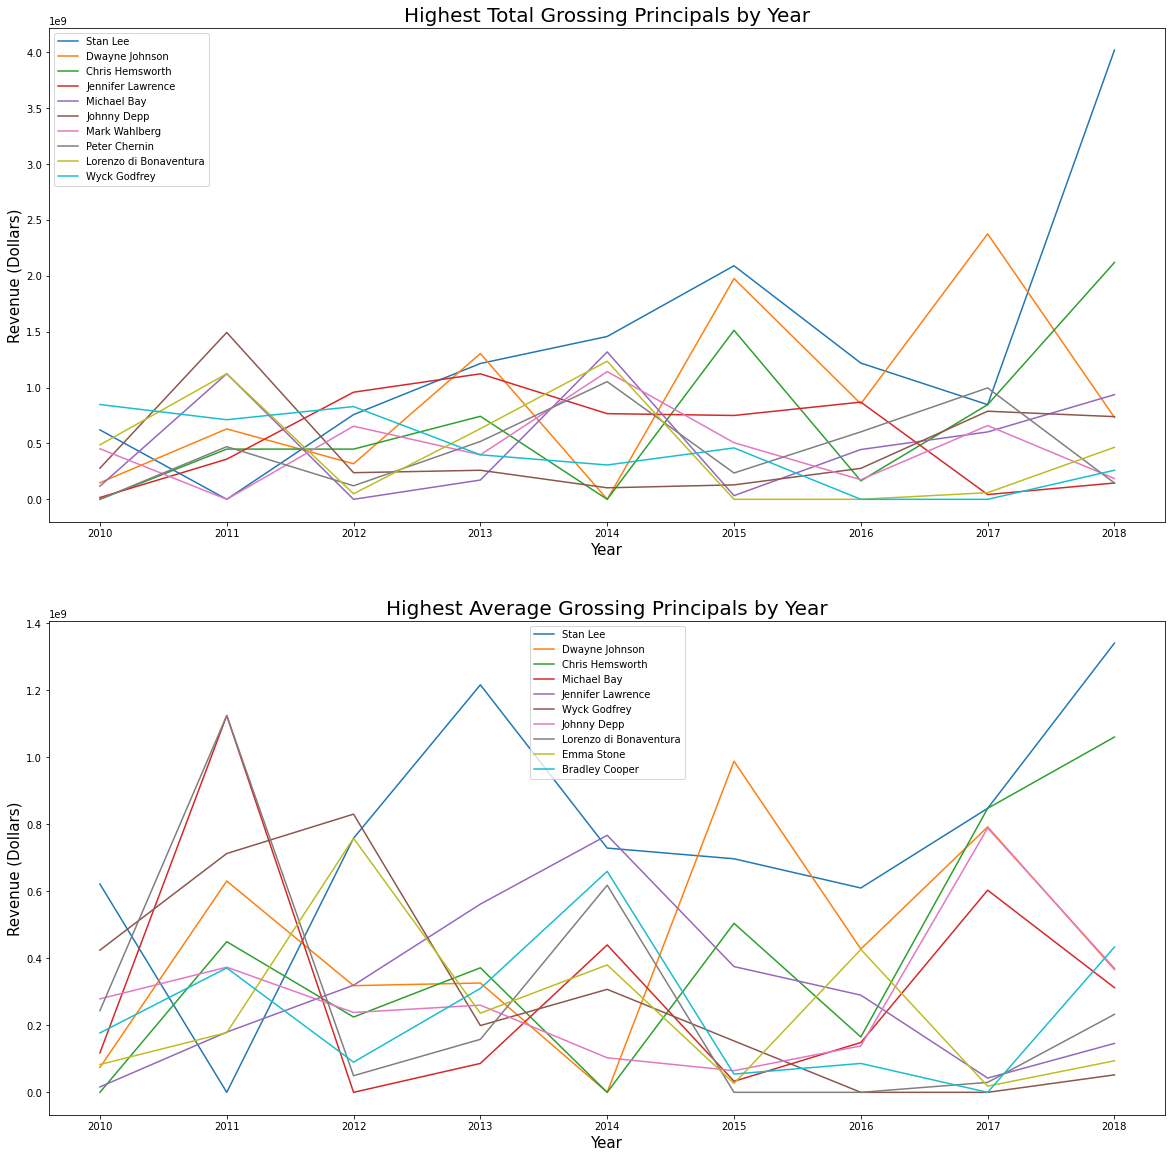

In [165]:
###Principals/Revenue Time Line Plot || Find Principals Average Revenue for each year of interest

#Create Genre Dictionary of List to hold Average Total Revenue Values
top_principals_list = list(principals_revenue_df.sort_values(by='num_movies',ascending=False).head(50).index)
tot_result_dict = {}
avg_result_dict = {}
for principal in top_principals_list:
    tot_result_dict[principal] = []
    avg_result_dict[principal] = []
    
for year in range(2010,2019):
    
    #Filter Revenue/Genre Df by year
    year_df = revenue_and_principals_df[revenue_and_principals_df['year'] == year]
    
    #Group Yearly Revenue/Genre df by Genre
    grouped_year_df = group_revenue_info(year_df,'principals')
    total_revenue_series = grouped_year_df['total_gross']
    avg_total_revenue_series = grouped_year_df['avg_total_gross']

    #Add Total Revenue Information to results dict
    for key in tot_result_dict.keys():
        if key in total_revenue_series.index:
            tot_result_dict[key].append(total_revenue_series.loc[key])
        else:
            tot_result_dict[key].append(0.0)    
    
    #Add Avg Total Revenue Information to results dict
    for key in avg_result_dict.keys():
        if key in avg_total_revenue_series.index:
            avg_result_dict[key].append(avg_total_revenue_series.loc[key])
        else:
            avg_result_dict[key].append(0.0)

#Create Dataframes to show Revenue Results by year
tot_time_results_df = pd.DataFrame(tot_result_dict, index=range(2010,2019))
avg_time_results_df = pd.DataFrame(avg_result_dict, index=range(2010,2019))

#Top Ten Genres in Yearly Average Revenues
tot_top_10_principals = list(tot_time_results_df.mean().sort_values(ascending=False).index)[:10]
avg_top_10_principals = list(avg_time_results_df.mean().sort_values(ascending=False).index)[:10]

#Time Line Plots
time_fig, (tot_ax,avg_ax) = plt.subplots(2,1,figsize=(20,20))
tot_time_results_df[tot_top_10_principals].plot.line(ax=tot_ax)
tot_ax.set_xlabel('Year',fontsize=15)
tot_ax.set_ylabel('Revenue (Dollars)',fontsize=15)
tot_ax.set_title('Highest Total Grossing Principals by Year',fontsize=20)
avg_time_results_df[avg_top_10_principals].plot.line(ax=avg_ax)
avg_ax.set_xlabel('Year',fontsize=15)
avg_ax.set_ylabel('Revenue (Dollars)',fontsize=15)
avg_ax.set_title('Highest Average Grossing Principals by Year',fontsize=20)



Regarding film principals and how they relate to film revenue, we first determined who the top 30 principals were in terms of number of films.  Half of the top 30 principals were "A-List" actors such as Mark Walhberg, Bradley Cooper, and Jennifer Lawrence.  Seven of the 30 are prodigious film producers like Tim Bevan and Peter Chernin.  Directors, composers, and studio executives each had two representatives in the top 30 principals.  The lower relative percentage of these may speak to the eliteness of these six principals.  Total film revenue (as related to film principals) is less correlated to number of films compared to total film revenue (as related to genre).  It seems that top film principals in terms of total revenue are related to successful film franchises of the current era like the Marvel Cinematic Universe and the Fast and Furious franchise.  

Unlike our revenue/genre analysis where there was less than 40 possible genres to analyze and under which to group films, there are just over 14,000 principals in our revenue database.  While it was possible to analyze both total and average revenue of all genres initially and to consider low sample sizes (number films) after the fact, in the case of film principals we decided to analyze average film revenue of the top 40 (in terms of film number, 10+ films) film principals.  We see that our average revenue rankings are much less correlated to hit film franchises.  The top film principals in terms of average revenue are dominated by A-List actors as well as the producers of the aforementioned film franchises. The top 10 seem to be more action-type actors while the next 10 seem to be more comedy-type actors.  Horror and Thriller film principals are represented higher in the total revenue than in average revenue.  It seems that these two genres bring in less money per film, but are made in relatively greater number.  Presumptively speaking, this shows that horror and thriller films are cheaper to make and therefore easier to profit from lower revenues.

When comparing total domestic revenue to total foreign revenue principal rankings, we do not detect a large difference.  We see that the top ten in each are dominated by Marvel and Fast and Furious principals with the former more popular domestically and the latter more popular internationally.  In terms of average revenue, there is a larger difference comparitively.  We see that actors like Jennifer Lawrence and Kevin Hart have more appeal domestically while we see principals such as Michael Bay, Johnny Depp, and Emma Stone more appeal internationally.

Finally, we determined if principal/revenue rankings change over time. Similar to our treatment with genre, we decided that the last decade was our time period of interest as our volume of data decreases drastically before 2010.  After filtering our film principal/revenue data by year, we grouped the revenue data by principal, calculated total revenue of all and average revenue of the busiest principals.  We analyzed the rankings in three periods and also graphed the changes for the entire decade.  Our total revenue rankings will tell us which film franchises were in vogue during each period for the most part, while our average revenue rankings will show us which principals are associated with the highest revenues.

Our first period (2010-2012) total revenue rankings was dominated by the Twilight and Iron Man franchises.  We see that Jeremy Renner was very busy this period, involved in multiple high grossing films like Mission Impossible, the Bourne films, as well as the Marvel Cinematic Universe.  In terms of average revenue, it seems that the highest grossing principals on a per film basis were comedic actors like Ben Stiller, Jason Segel, Owen Wilson, and Adam Sandler.  In the second period (2013-2015), total revenue rankings show us that the MCU as well as the Fast and the Furious, XMen, and the Hunger Games franchises continue their momentum from the past period.  Guillermo del Toro was the highest total grossing principal not tied to a film franchise.  Average revenue rankings in this period show that action-type principals supplanted comedic actors as the highest grossing on a per film basis.  The third period (2016-2018) total revenue rankings again show the MCU as well as the Star Wars films dominating the period.  Kevin Hart was involved in many high grossing films this period.  He shows up in the average revenue rankings this period as well as James Wan, Idris Elba, and Woody Harrelson, possibly showing a departure from the action/comedy domination of the past two periods.  To wrap up our time/revenue/principal analysis, we wished to see which principals had the most "staying power" during the past decade.  We sought to determine which principals remained relatively busy while also being involved with higher grossing projects.  Consistent principals included Bradley Cooper, Adam Sandler, Emily Blunt, Michael Fassbender, Mark Walberg, Peter Chernin, Dwayne Johnson, Stan Lee, and Michael Bay.      





### Ratings Insight

We will wrap up this project by analyzing which film genres and principals are the highest rated.  We will generate distinct rankings for our three rating metrics and discern the differences and similarities between the three.  We will also generate rankings for the genre and principals with a minimum number of constituent films for additional precision by handling small sample sizes.  Lastly, we will generate rankings for different periods of time to see if we can discern any interesting changes or trends.


In [166]:
#Create function that groups film ratings dataframes by genre or principal
def group_ratings_info(ratings_df,classification):
    '''Function takes Film Ratings Dataframe and groups the information by genre
    or principals and returns a dataframe with the results'''
    #Dictionary for grouped results
    ratings_dict = {}
    
    #Iterate through film ratings dataframe
    for index, row in ratings_df.iterrows():
        #Iterate through classification of particular film
        for classif in row[classification]:
            #Add film ratings information for each individual classification 
            ratings_classif_dict = ratings_dict.pop(classif,{'num_movies':0,'total_votes':0,'total_rating_points':0})
            ratings_classif_dict['num_movies'] += 1
            ratings_classif_dict['total_votes'] += row['total_votes']
            ratings_classif_dict['total_rating_points'] += row['vote_average_numwtd']
            #Update result dictionary
            ratings_dict[classif] = ratings_classif_dict
            
    #Create Dataframe for grouped results
    grouped_ratings_df = pd.DataFrame(ratings_dict).transpose()
    
    #Calculate Average Rating for each genre
    grouped_ratings_df['avg_rating'] = round(grouped_ratings_df['total_rating_points']/grouped_ratings_df['total_votes'],2)
    
    #Rename total_rating_points column to vote_average_numwtd
    grouped_ratings_df.rename({'total_rating_points':'avg_rating_numwtd'},axis=1,inplace=True)
    
    #Implement 99% CI Interval weighting on avg_rating column
    grouped_ratings_df['avg_rating_CIwtd'] = round(grouped_ratings_df['avg_rating'] - 2.58*(vote_omega/np.sqrt(grouped_ratings_df['total_votes'])),2)
    
    return grouped_ratings_df
            

In [167]:
#Create function that ratings rankings
def generate_ratings_rankings(grouped_ratings_df,classification):
    '''Takes classification grouped ratings dataframe and returns rankings for
    three metrics and horizontal bar charts for each'''

    #Print Top Ten Rankings of Each Metric
    #Average Rating Rankings
    print(grouped_ratings_df.sort_values(by='avg_rating',ascending=False)['avg_rating'].head(10), '\n')
    #Average NumWtd Rating Rankings
    print(grouped_ratings_df.sort_values(by='avg_rating_numwtd',ascending=False)['avg_rating_numwtd'].head(10), '\n')
    #Average CIWtd Rating Rankings
    print(grouped_ratings_df.sort_values(by='avg_rating_CIwtd',ascending=False)['avg_rating_CIwtd'].head(10), '\n')

    #Create 3 Bar Charts for rankings
    ratings_fig, (avg_ax, num_ax, ci_ax)= plt.subplots(3,1,figsize=(20,60))
    if len(grouped_ratings_df) > 49:
        length = 40
    else:
        length = len(grouped_ratings_df)
                
    #Plot Avg Rating
    grouped_ratings_df.sort_values(by='avg_rating',ascending=True)['avg_rating'].tail(length).plot(kind='barh',ax=avg_ax)
    avg_ax.set_xlabel('Rating',fontsize=20)
    avg_ax.set_ylabel(classification,fontsize=20)
    avg_ax.set_title('Avg Rating',fontsize=40)
    #Plot Num Wtd Avg Rating
    grouped_ratings_df.sort_values(by='avg_rating_numwtd',ascending=True)['avg_rating_numwtd'].tail(length).plot(kind='barh',ax=num_ax)
    num_ax.set_xlabel('Rating',fontsize=20)
    num_ax.set_ylabel(classification,fontsize=20)
    num_ax.set_title('Number Weighted Avg Rating',fontsize=40)
    #Plot CI Avg Rating
    grouped_ratings_df.sort_values(by='avg_rating_CIwtd',ascending=True)['avg_rating_CIwtd'].tail(length).plot(kind='barh',ax=ci_ax)
    ci_ax.set_xlabel('Rating',fontsize=20)
    ci_ax.set_ylabel(classification,fontsize=20)
    ci_ax.set_title('CI Avg Rating',fontsize=40)
    
    plt.show()

    


#### Genre

In [168]:
#Determine which genres are the most highly rated
print(ratings_and_genre_df.info())
ratings_and_genre_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85412 entries, 0 to 86166
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i_tuple              85412 non-null  object 
 1   total_votes          85412 non-null  int64  
 2   vote_average         85412 non-null  float64
 3   vote_average_CIwtd   85412 non-null  float64
 4   vote_average_numwtd  85412 non-null  float64
 5   genres_tmdb          25295 non-null  object 
 6   genres_imdb          71267 non-null  object 
 7   genres_rt            984 non-null    object 
 8   genres               85412 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.5+ MB
None


i_tuple  total_votes  vote_average  \
0        (laiye je yaarian, 2019)           31           8.3   
1              (borderless, 2019)          559           8.9   
2               (just inès, 2010)           20           6.4   
3  (the legend of hercules, 2014)        51157           4.2   
4               (até onde?, 2011)           21           6.5   

   vote_average_CIwtd  vote_average_numwtd          genres_tmdb  \
0                7.95                257.3                  NaN   
1                8.82               4975.1                  NaN   
2                5.97                128.0                  NaN   
3                4.19             214859.4  (Action, Adventure)   
4                6.08                136.5                  NaN   

                    genres_imdb genres_rt                        genres  
0                    (Romance,)       NaN                    (Romance,)  
1                (Documentary,)       NaN                (Documentary,)  
2                      (Drama,)       NaN                      (Drama,)  
3  (Action, Adventure, Fantasy)       NaN  (Fantasy, Action, Adventure)  
4           (Mystery, Thriller)       NaN           (Mystery, Thriller)

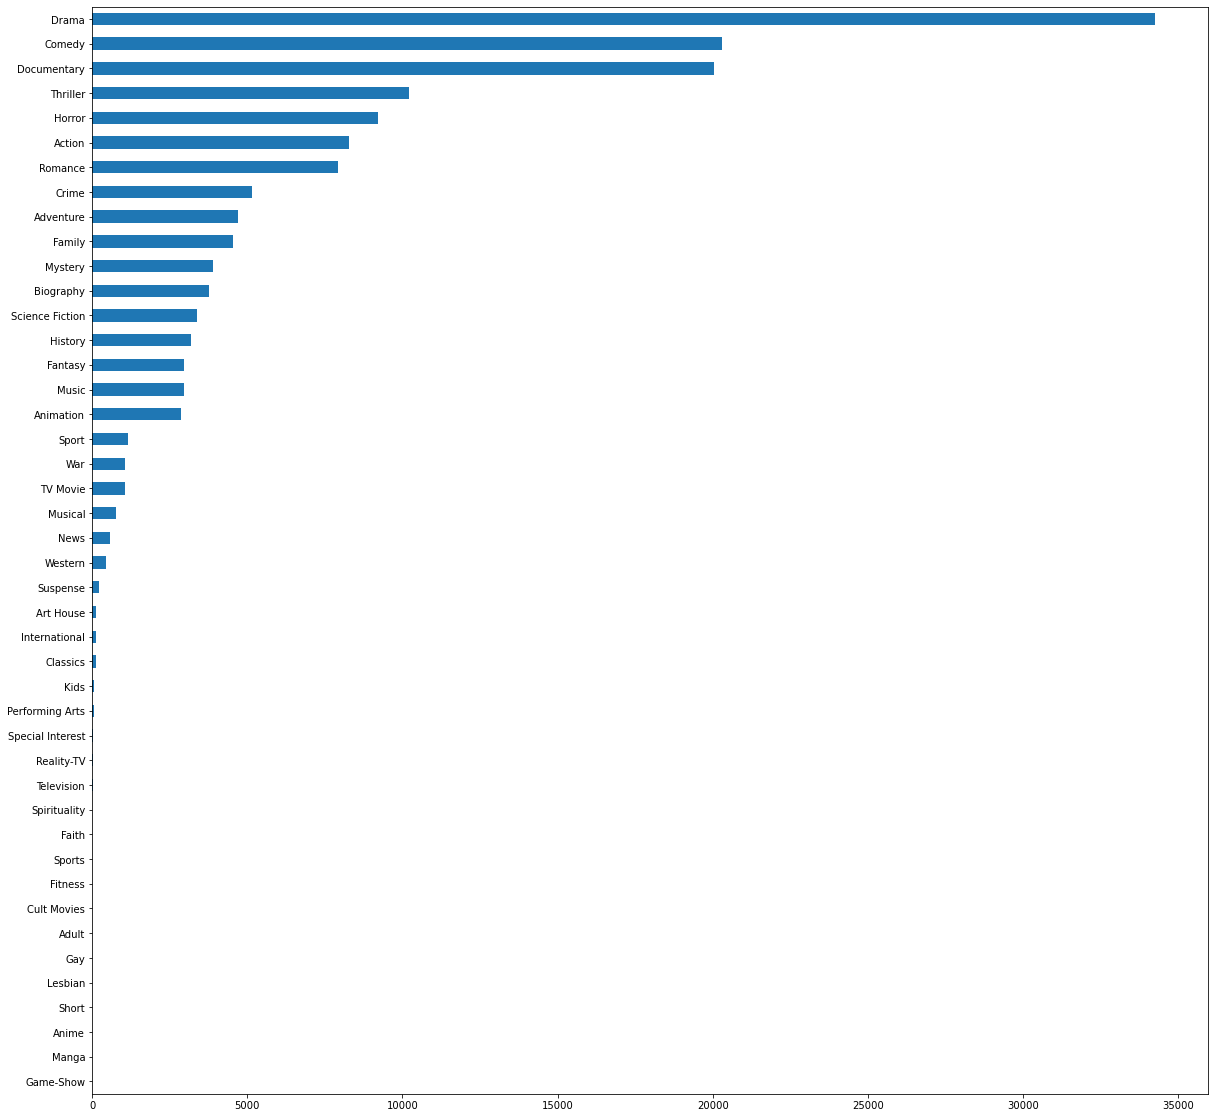

In [305]:
#Most common genres in ratings dataframe
genre_ratings_df.sort_values(by='num_movies',ascending=True)['num_movies'].plot(kind='barh',figsize=(20,20))

Game-Show           9.00
Short               8.93
News                7.64
Performing Arts     7.61
Special Interest    7.59
Biography           7.48
Western             7.40
History             7.35
Sport               7.30
Art House           7.29
Name: avg_rating, dtype: float64 

Drama              8.968827e+08
Action             7.492851e+08
Adventure          6.123416e+08
Comedy             5.297190e+08
Thriller           4.869149e+08
Science Fiction    4.080715e+08
Crime              3.052553e+08
Fantasy            2.718631e+08
Romance            2.211335e+08
Mystery            2.197530e+08
Name: avg_rating_numwtd, dtype: float64 

Short               8.08
Game-Show           8.04
News                7.63
Performing Arts     7.59
Special Interest    7.58
Biography           7.48
Western             7.40
History             7.35
Sport               7.30
Documentary         7.28
Name: avg_rating_CIwtd, dtype: float64 



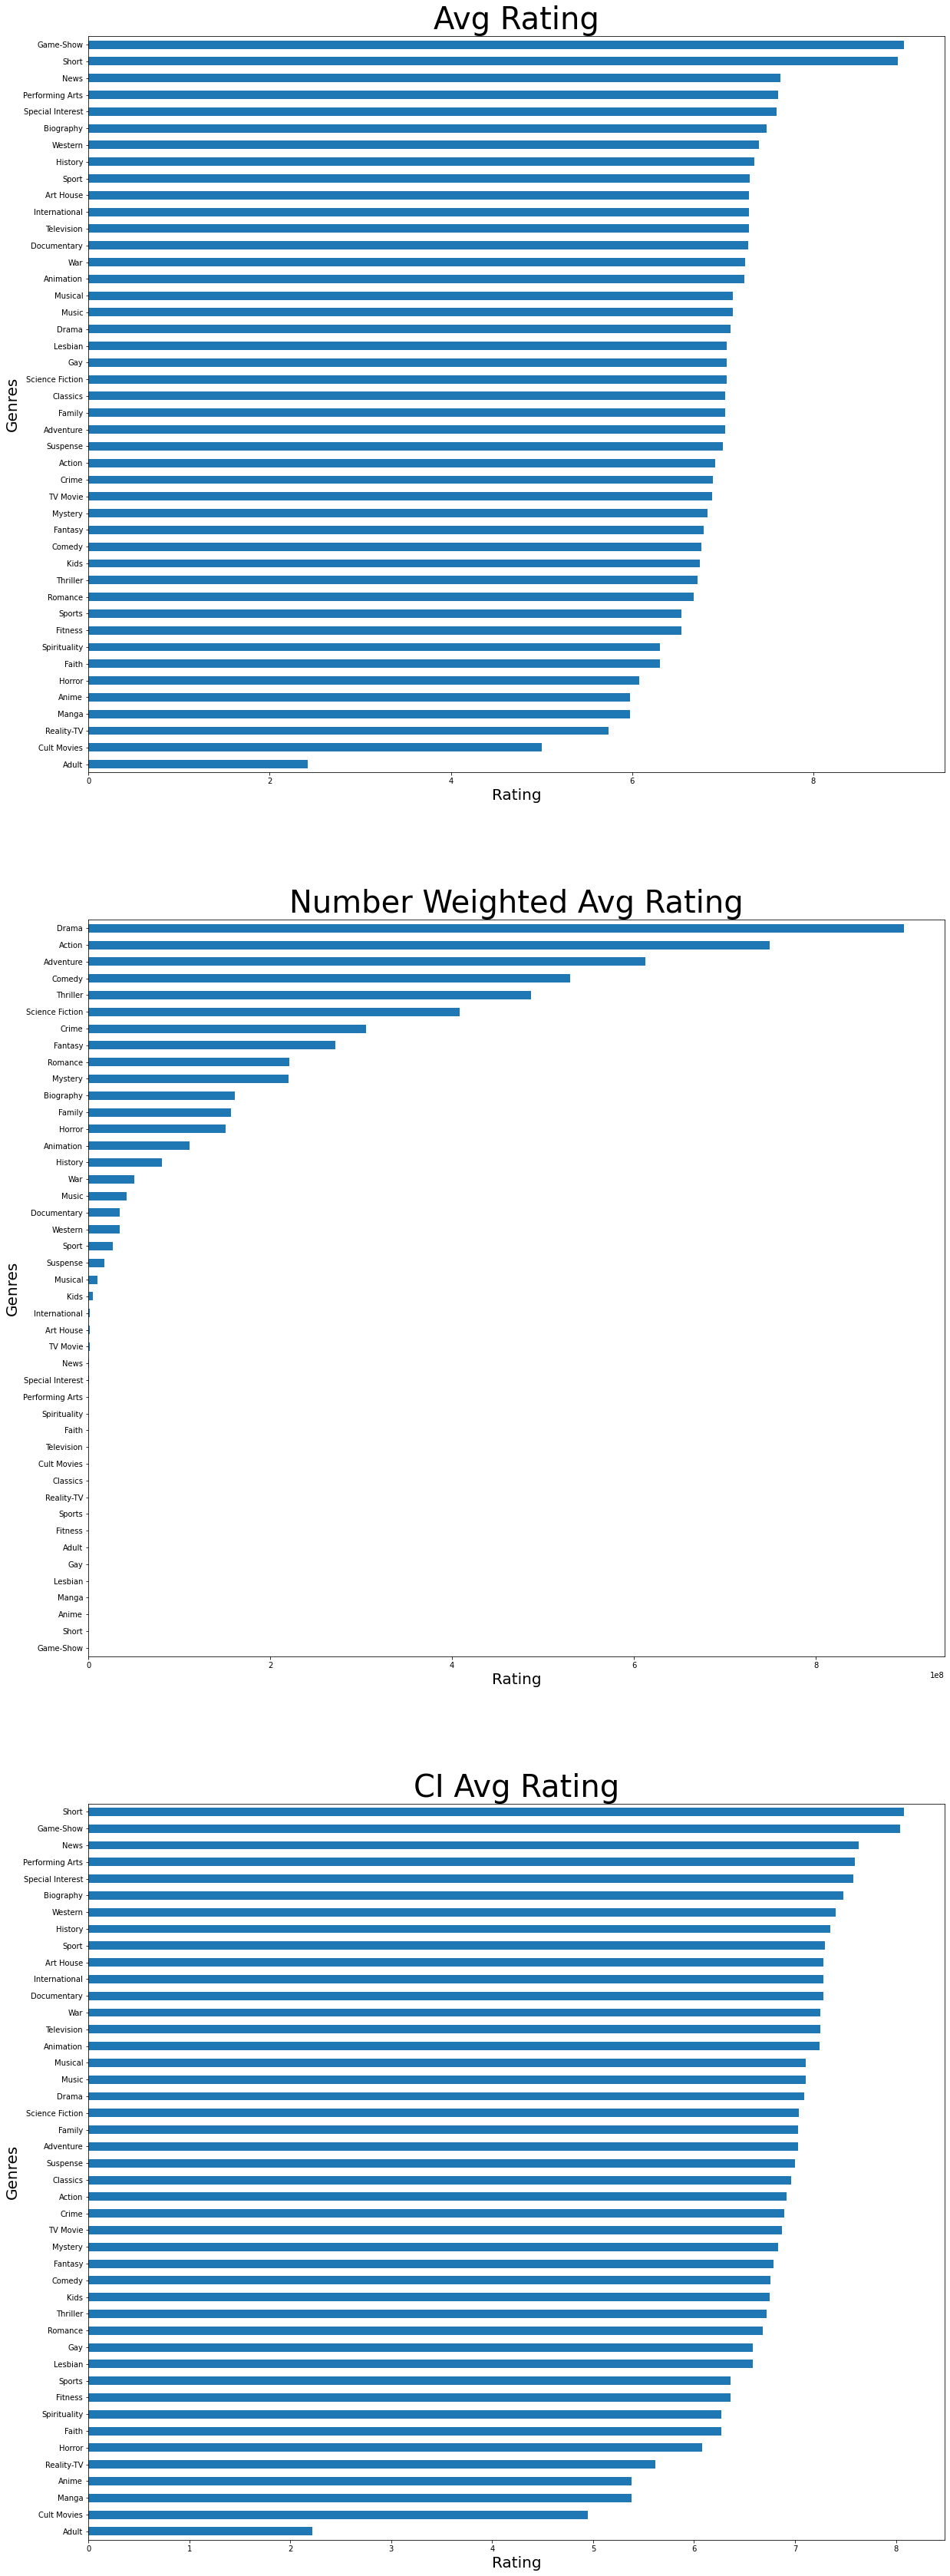

In [169]:
#Grouped Ratings/Genre Dataframe by genre and generate rankings
genre_ratings_df = group_ratings_info(ratings_and_genre_df,'genres')
generate_ratings_rankings(genre_ratings_df,'Genres')


In [246]:
#Calculate Mean/STD/Med of grouped genre/ratings df
genre_ratings_df.describe()


num_movies   total_votes  avg_rating_numwtd  avg_rating  \
count     44.000000  4.400000e+01       4.400000e+01   44.000000   
mean    3487.454545  1.833492e+07       1.269979e+08    6.876818   
std     6686.440780  3.165301e+07       2.199229e+08    0.971141   
min        1.000000  7.000000e+00       6.300000e+01    2.420000   
25%        7.000000  2.233250e+03       1.188825e+04    6.710000   
50%      504.500000  1.011710e+06       7.072367e+06    7.030000   
75%     3791.250000  2.291773e+07       1.577888e+08    7.290000   
max    34254.000000  1.265445e+08       8.968827e+08    9.000000   

       avg_rating_CIwtd  
count         44.000000  
mean           6.765000  
std            0.960319  
min            2.220000  
25%            6.580000  
50%            6.980000  
75%            7.280000  
max            8.080000

In [170]:
genre_ratings_df['num_movies'].sort_values()

Game-Show               1.0
Manga                   1.0
Anime                   1.0
Short                   2.0
Lesbian                 2.0
Gay                     2.0
Adult                   3.0
Cult Movies             3.0
Fitness                 4.0
Sports                  4.0
Faith                   7.0
Spirituality            7.0
Television             10.0
Reality-TV             18.0
Special Interest       29.0
Performing Arts        58.0
Kids                   72.0
Classics              130.0
International         132.0
Art House             132.0
Suspense              211.0
Western               433.0
News                  576.0
Musical               769.0
TV Movie             1064.0
War                  1068.0
Sport                1167.0
Animation            2856.0
Music                2943.0
Fantasy              2953.0
History              3181.0
Science Fiction      3365.0
Biography            3759.0
Mystery              3888.0
Family               4528.0
Adventure           

News               7.64
Performing Arts    7.61
Biography          7.48
Western            7.40
History            7.35
Sport              7.30
Art House          7.29
International      7.29
Documentary        7.28
War                7.25
Name: avg_rating, dtype: float64 

Drama              8.968827e+08
Action             7.492851e+08
Adventure          6.123416e+08
Comedy             5.297190e+08
Thriller           4.869149e+08
Science Fiction    4.080715e+08
Crime              3.052553e+08
Fantasy            2.718631e+08
Romance            2.211335e+08
Mystery            2.197530e+08
Name: avg_rating_numwtd, dtype: float64 

News               7.63
Performing Arts    7.59
Biography          7.48
Western            7.40
History            7.35
Sport              7.30
Art House          7.28
International      7.28
Documentary        7.28
War                7.25
Name: avg_rating_CIwtd, dtype: float64 



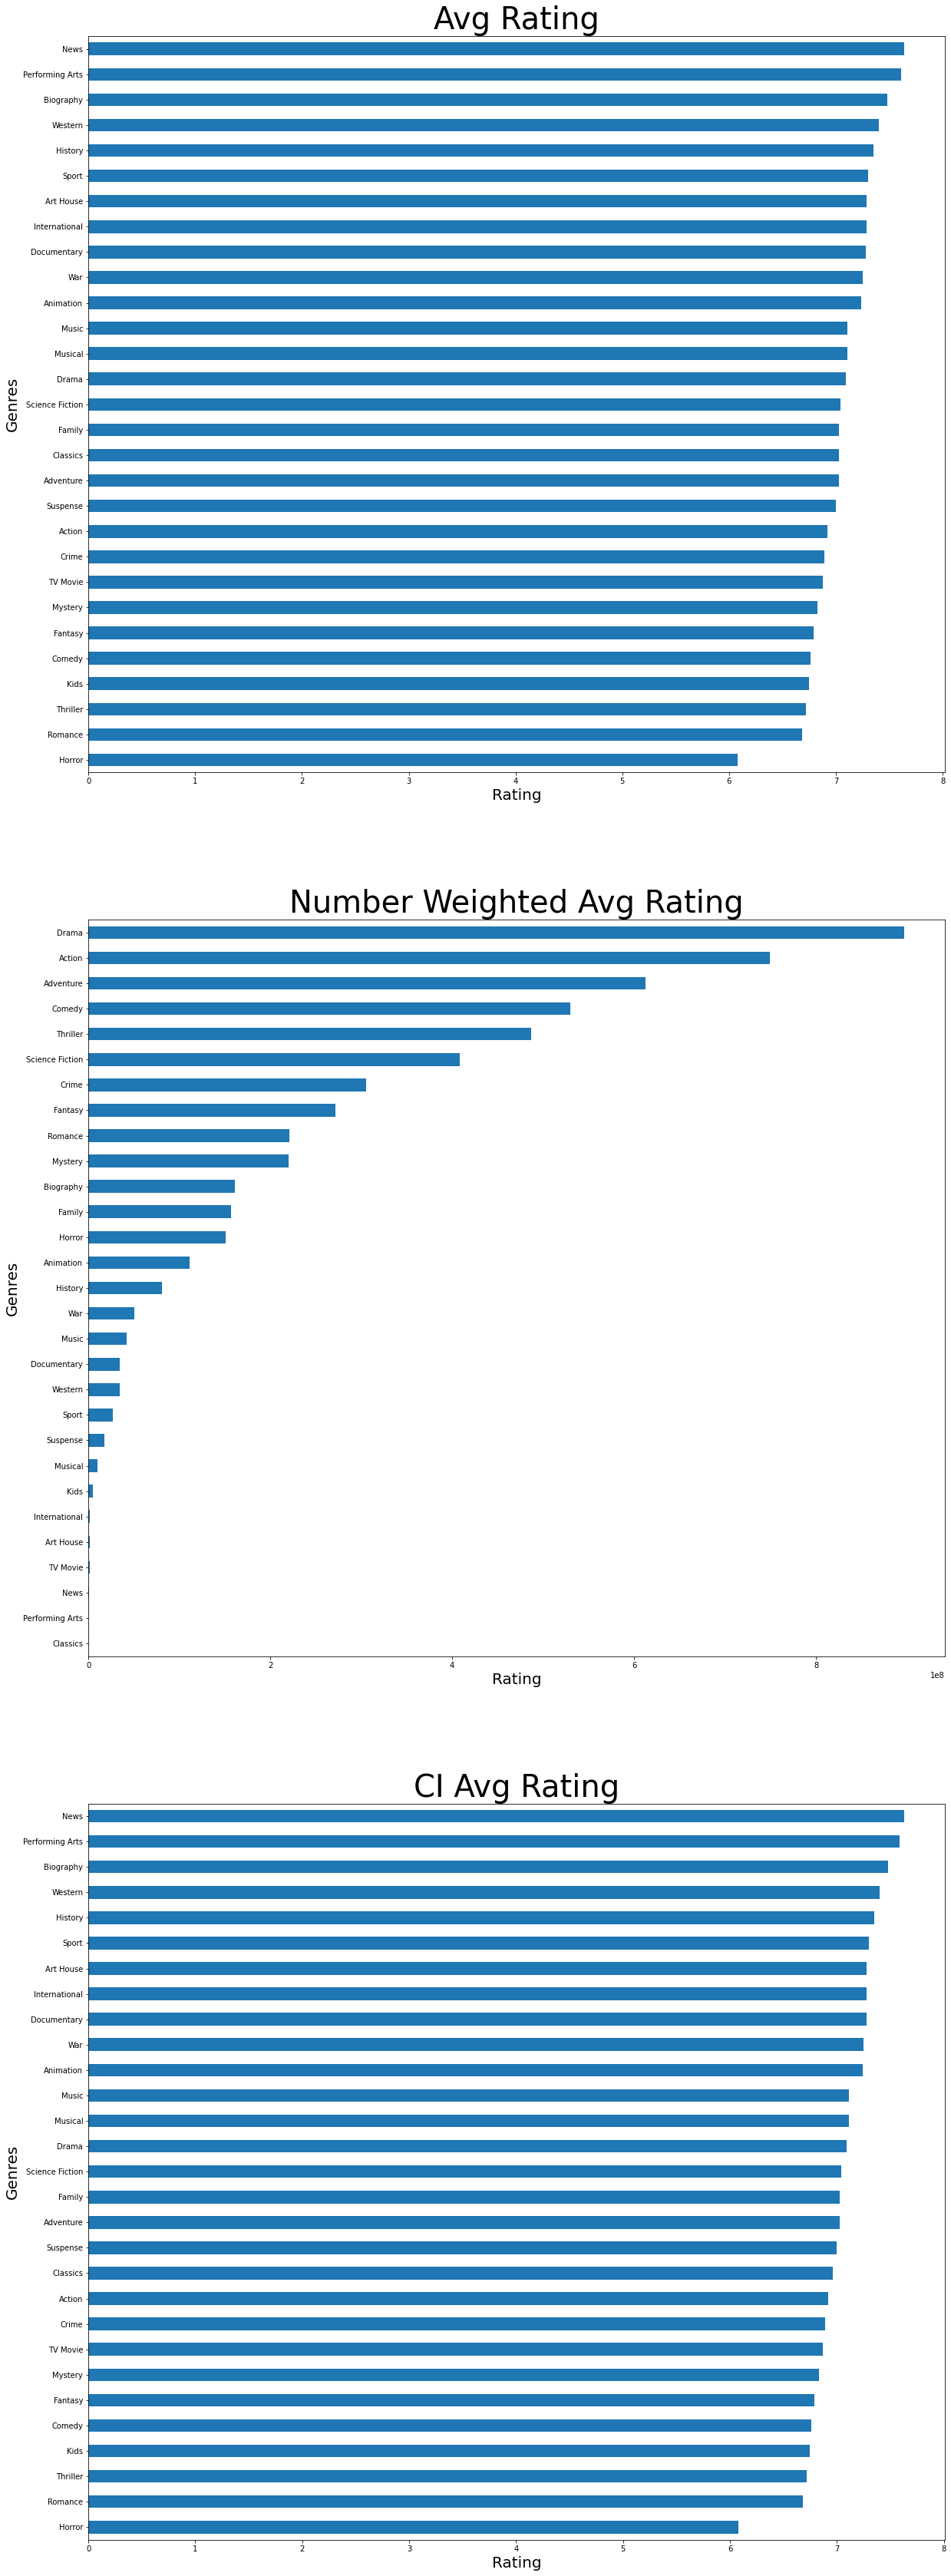

In [171]:
#Generate Ratings Rankings for Genres with 50 or more films
generate_ratings_rankings(genre_ratings_df[genre_ratings_df['num_movies'] > 49], 'Genres')


In [247]:
#Calculate Mean/STD/Med of grouped genre/ratings df
genre_ratings_df[genre_ratings_df['num_movies'] > 49].describe()


num_movies   total_votes  avg_rating_numwtd  avg_rating  \
count     29.000000  2.900000e+01       2.900000e+01   29.000000   
mean    5288.068966  2.781622e+07       1.926700e+08    7.064483   
std     7668.721378  3.557447e+07       2.473332e+08    0.322962   
min       58.000000  1.421000e+03       9.984090e+03    6.080000   
25%      576.000000  1.352948e+06       9.618261e+06    6.880000   
50%     2953.000000  1.096020e+07       8.051454e+07    7.040000   
75%     5153.000000  4.002184e+07       2.718631e+08    7.290000   
max    34254.000000  1.265445e+08       8.968827e+08    7.640000   

       avg_rating_CIwtd  
count          29.00000  
mean            7.06000  
std             0.32137  
min             6.08000  
25%             6.87000  
50%             7.04000  
75%             7.28000  
max             7.63000

In [172]:
#Make Year column for ratings/genre dataframe for year filtering
ratings_and_genre_df['year'] = ratings_and_genre_df['i_tuple'].map(lambda tup: tup[1])
ratings_and_genre_df['year'].value_counts().head(30)

2017.0    9879
2016.0    9822
2015.0    9719
2014.0    9626
2013.0    9341
2012.0    8830
2011.0    8602
2018.0    8458
2010.0    7887
2019.0    2198
2009.0      65
2003.0      35
2000.0      35
2008.0      34
1995.0      33
2002.0      32
2004.0      31
2001.0      29
2006.0      29
2005.0      28
2007.0      28
1993.0      27
1998.0      27
1987.0      25
1997.0      25
1994.0      25
1996.0      22
1999.0      22
1988.0      20
1991.0      19
Name: year, dtype: int64

Western        7.73
Biography      7.57
Sport          7.53
News           7.45
History        7.29
Animation      7.27
Documentary    7.23
Musical        7.12
Drama          7.11
Family         7.09
Name: avg_rating, dtype: float64 

Drama              3.228029e+08
Action             2.648271e+08
Adventure          2.171512e+08
Comedy             2.015761e+08
Thriller           1.975433e+08
Science Fiction    1.247651e+08
Crime              1.161442e+08
Romance            1.029397e+08
Fantasy            1.011113e+08
Mystery            8.449058e+07
Name: avg_rating_numwtd, dtype: float64 

Western        7.73
Biography      7.57
Sport          7.53
News           7.43
History        7.29
Animation      7.27
Documentary    7.23
Musical        7.12
Drama          7.11
Family         7.09
Name: avg_rating_CIwtd, dtype: float64 



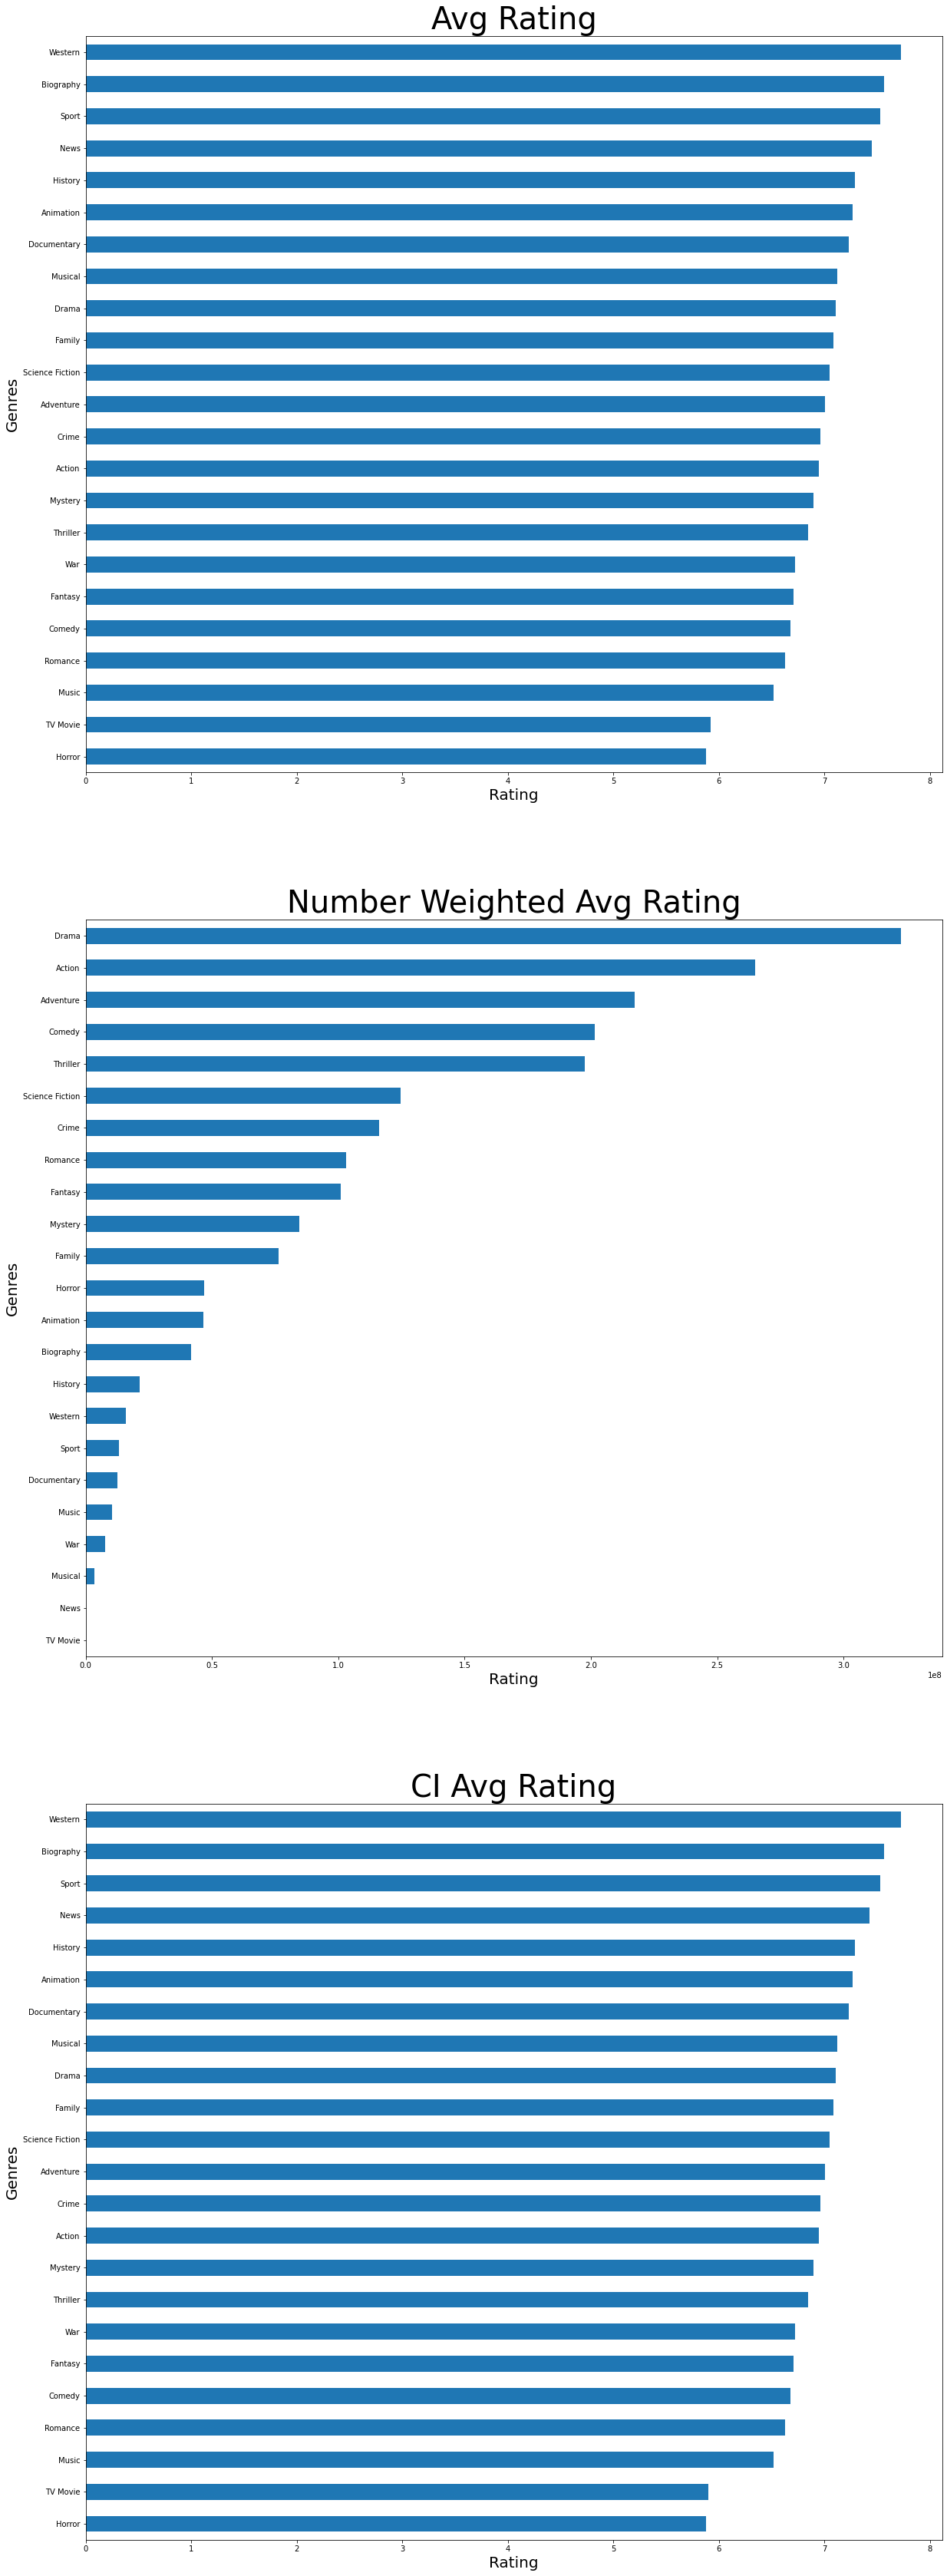

In [173]:
#A:2010-2012  
ratings_and_genre_2010_df = ratings_and_genre_df[(ratings_and_genre_df['year']>=2010)&(ratings_and_genre_df['year']<=2012)]
genre_ratings_2010_df = group_ratings_info(ratings_and_genre_2010_df,'genres')
generate_ratings_rankings(genre_ratings_2010_df[genre_ratings_2010_df['num_movies']>49],'Genres')


In [248]:
#Calculate Mean/STD/Med of grouped genre/ratings df
genre_ratings_2010_df.describe()


num_movies   total_votes  avg_rating_numwtd  avg_rating  \
count     36.000000  3.600000e+01       3.600000e+01   36.000000   
mean    1249.277778  8.221826e+06       5.694401e+07    6.953889   
std     2138.486041  1.227374e+07       8.532628e+07    0.819269   
min        1.000000  1.000000e+00       1.000000e+01    4.940000   
25%        4.750000  2.384525e+04       1.712351e+05    6.667500   
50%      327.000000  1.742506e+06       1.285939e+07    7.005000   
75%     1272.250000  1.294926e+07       8.864577e+07    7.317500   
max    10104.000000  4.541702e+07       3.228029e+08   10.000000   

       avg_rating_CIwtd  
count         36.000000  
mean           6.835833  
std            0.728213  
min            4.770000  
25%            6.667500  
50%            6.985000  
75%            7.307500  
max            7.730000

Biography      7.55
News           7.52
History        7.41
Documentary    7.34
Animation      7.28
Western        7.27
Music          7.26
War            7.25
Sport          7.12
Drama          7.12
Name: avg_rating, dtype: float64 

Drama              3.478774e+08
Action             2.736805e+08
Adventure          2.270964e+08
Comedy             1.984432e+08
Thriller           1.745192e+08
Science Fiction    1.695785e+08
Crime              1.173050e+08
Fantasy            8.168500e+07
Mystery            7.708334e+07
Biography          7.591585e+07
Name: avg_rating_numwtd, dtype: float64 

Biography      7.55
News           7.51
History        7.41
Documentary    7.34
Animation      7.28
Western        7.27
Music          7.26
War            7.25
Sport          7.12
Drama          7.12
Name: avg_rating_CIwtd, dtype: float64 



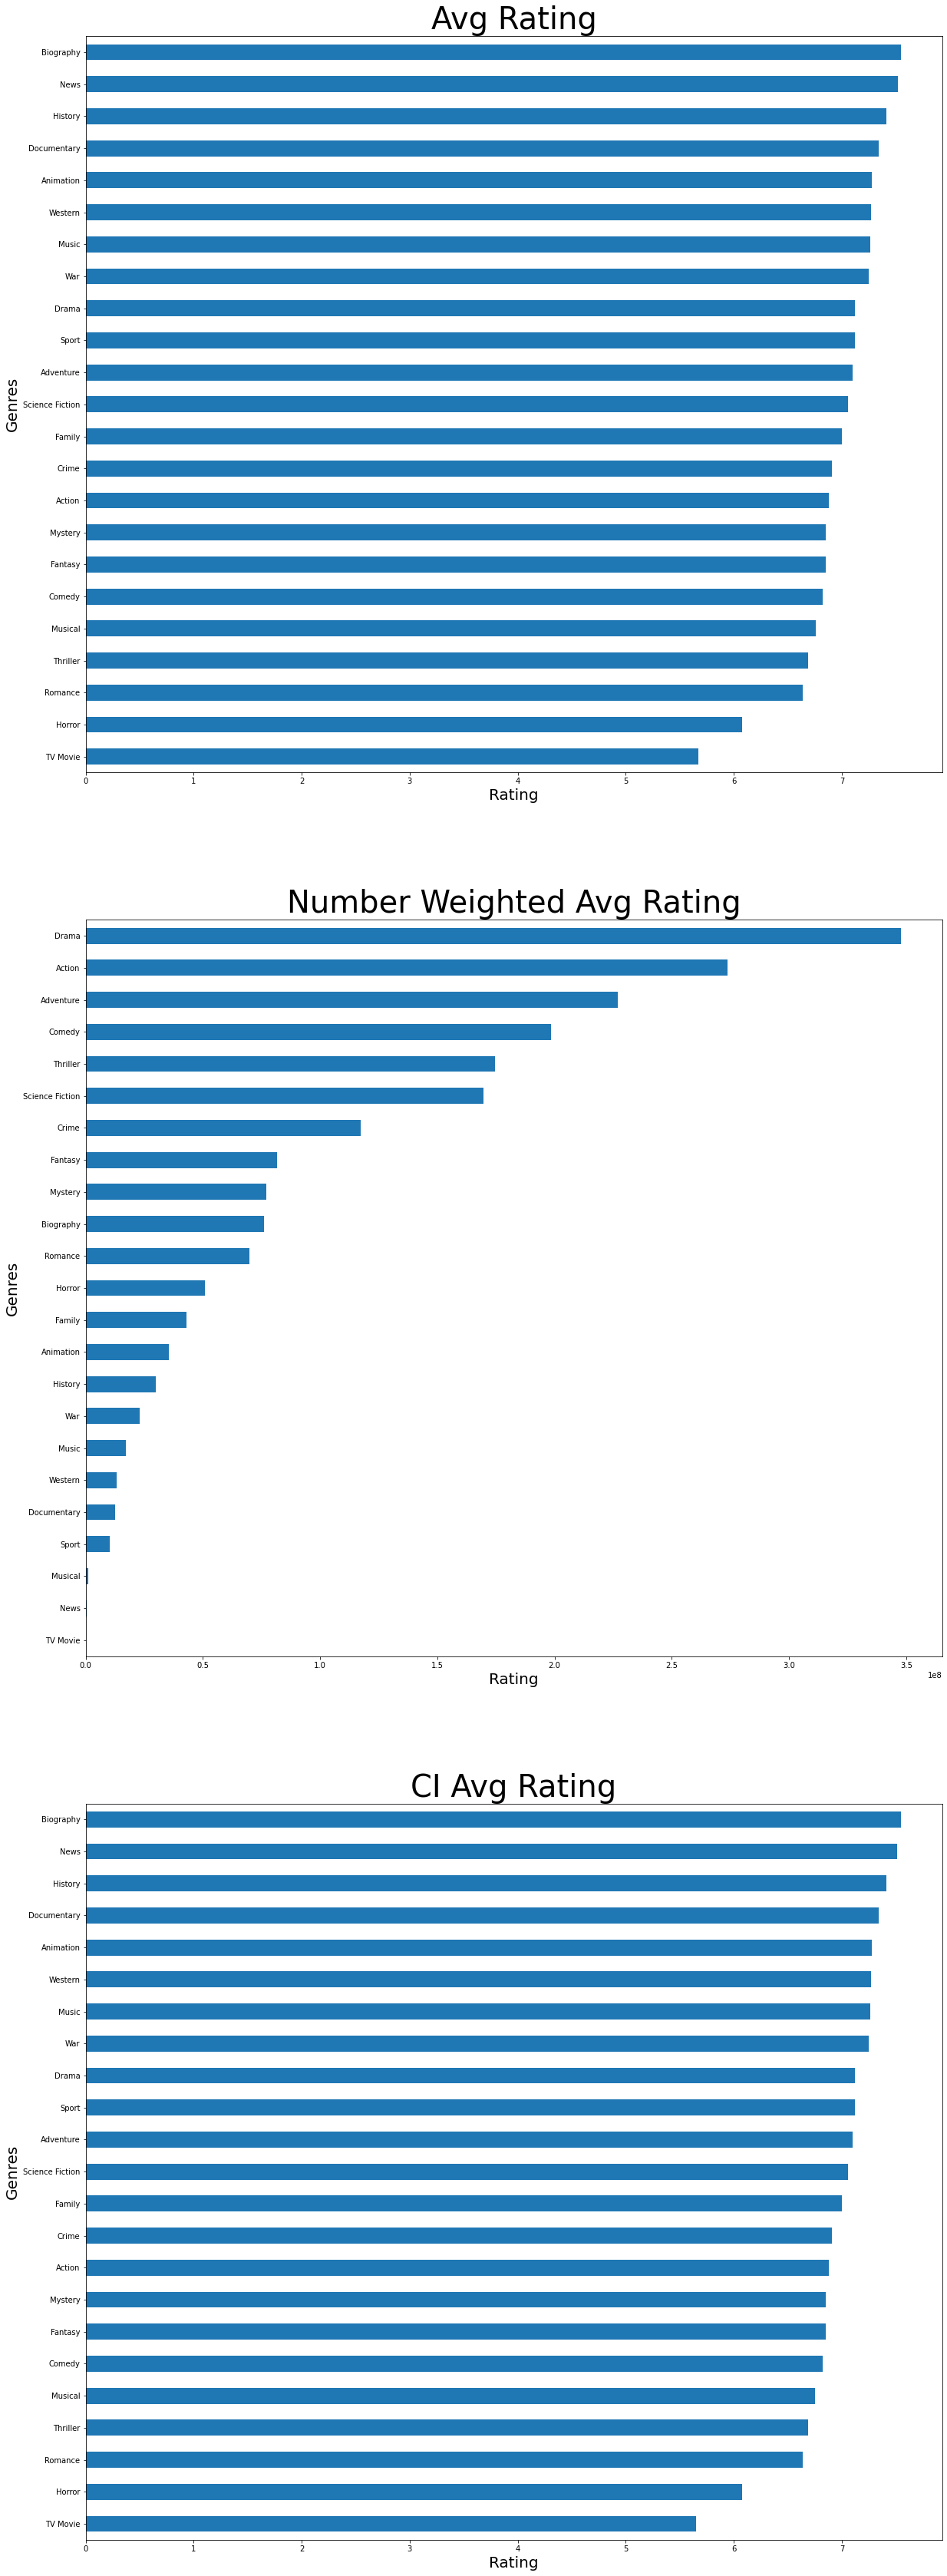

In [174]:
#B:2013-2015  
ratings_and_genre_2013_df = ratings_and_genre_df[(ratings_and_genre_df['year']>=2013)&(ratings_and_genre_df['year']<=2015)]
genre_ratings_2013_df = group_ratings_info(ratings_and_genre_2013_df,'genres')
generate_ratings_rankings(genre_ratings_2013_df[genre_ratings_2013_df['num_movies']>49],'Genres')


In [249]:
#Calculate Mean/STD/Med of grouped genre/ratings df
genre_ratings_2013_df.describe()


num_movies   total_votes  avg_rating_numwtd  avg_rating  \
count     33.000000  3.300000e+01       3.300000e+01   33.000000   
mean    1600.393939  8.945220e+06       6.221406e+07    6.699091   
std     2528.356852  1.298728e+07       9.069861e+07    1.107761   
min        1.000000  7.000000e+00       6.300000e+01    2.000000   
25%        8.000000  3.887200e+04       2.346192e+05    6.200000   
50%      954.000000  2.343996e+06       1.700795e+07    6.880000   
75%     1734.000000  1.124864e+07       7.708334e+07    7.260000   
max    11666.000000  4.888559e+07       3.478774e+08    9.000000   

       avg_rating_CIwtd  
count         33.000000  
mean           6.646667  
std            1.096627  
min            1.780000  
25%            6.140000  
50%            6.880000  
75%            7.260000  
max            8.040000

War            7.48
Music          7.41
History        7.32
Biography      7.29
Documentary    7.27
Musical        7.19
TV Movie       7.19
Animation      7.14
Sport          7.06
Drama          7.03
Name: avg_rating, dtype: float64 

Drama              2.198563e+08
Action             1.978588e+08
Adventure          1.568847e+08
Comedy             1.254170e+08
Thriller           1.106264e+08
Science Fiction    1.049620e+08
Fantasy            8.779352e+07
Crime              6.900100e+07
Mystery            5.612601e+07
Horror             5.107149e+07
Name: avg_rating_numwtd, dtype: float64 

War            7.48
Music          7.41
History        7.32
Biography      7.29
Documentary    7.27
Musical        7.19
TV Movie       7.18
Animation      7.14
Sport          7.06
Drama          7.03
Name: avg_rating_CIwtd, dtype: float64 



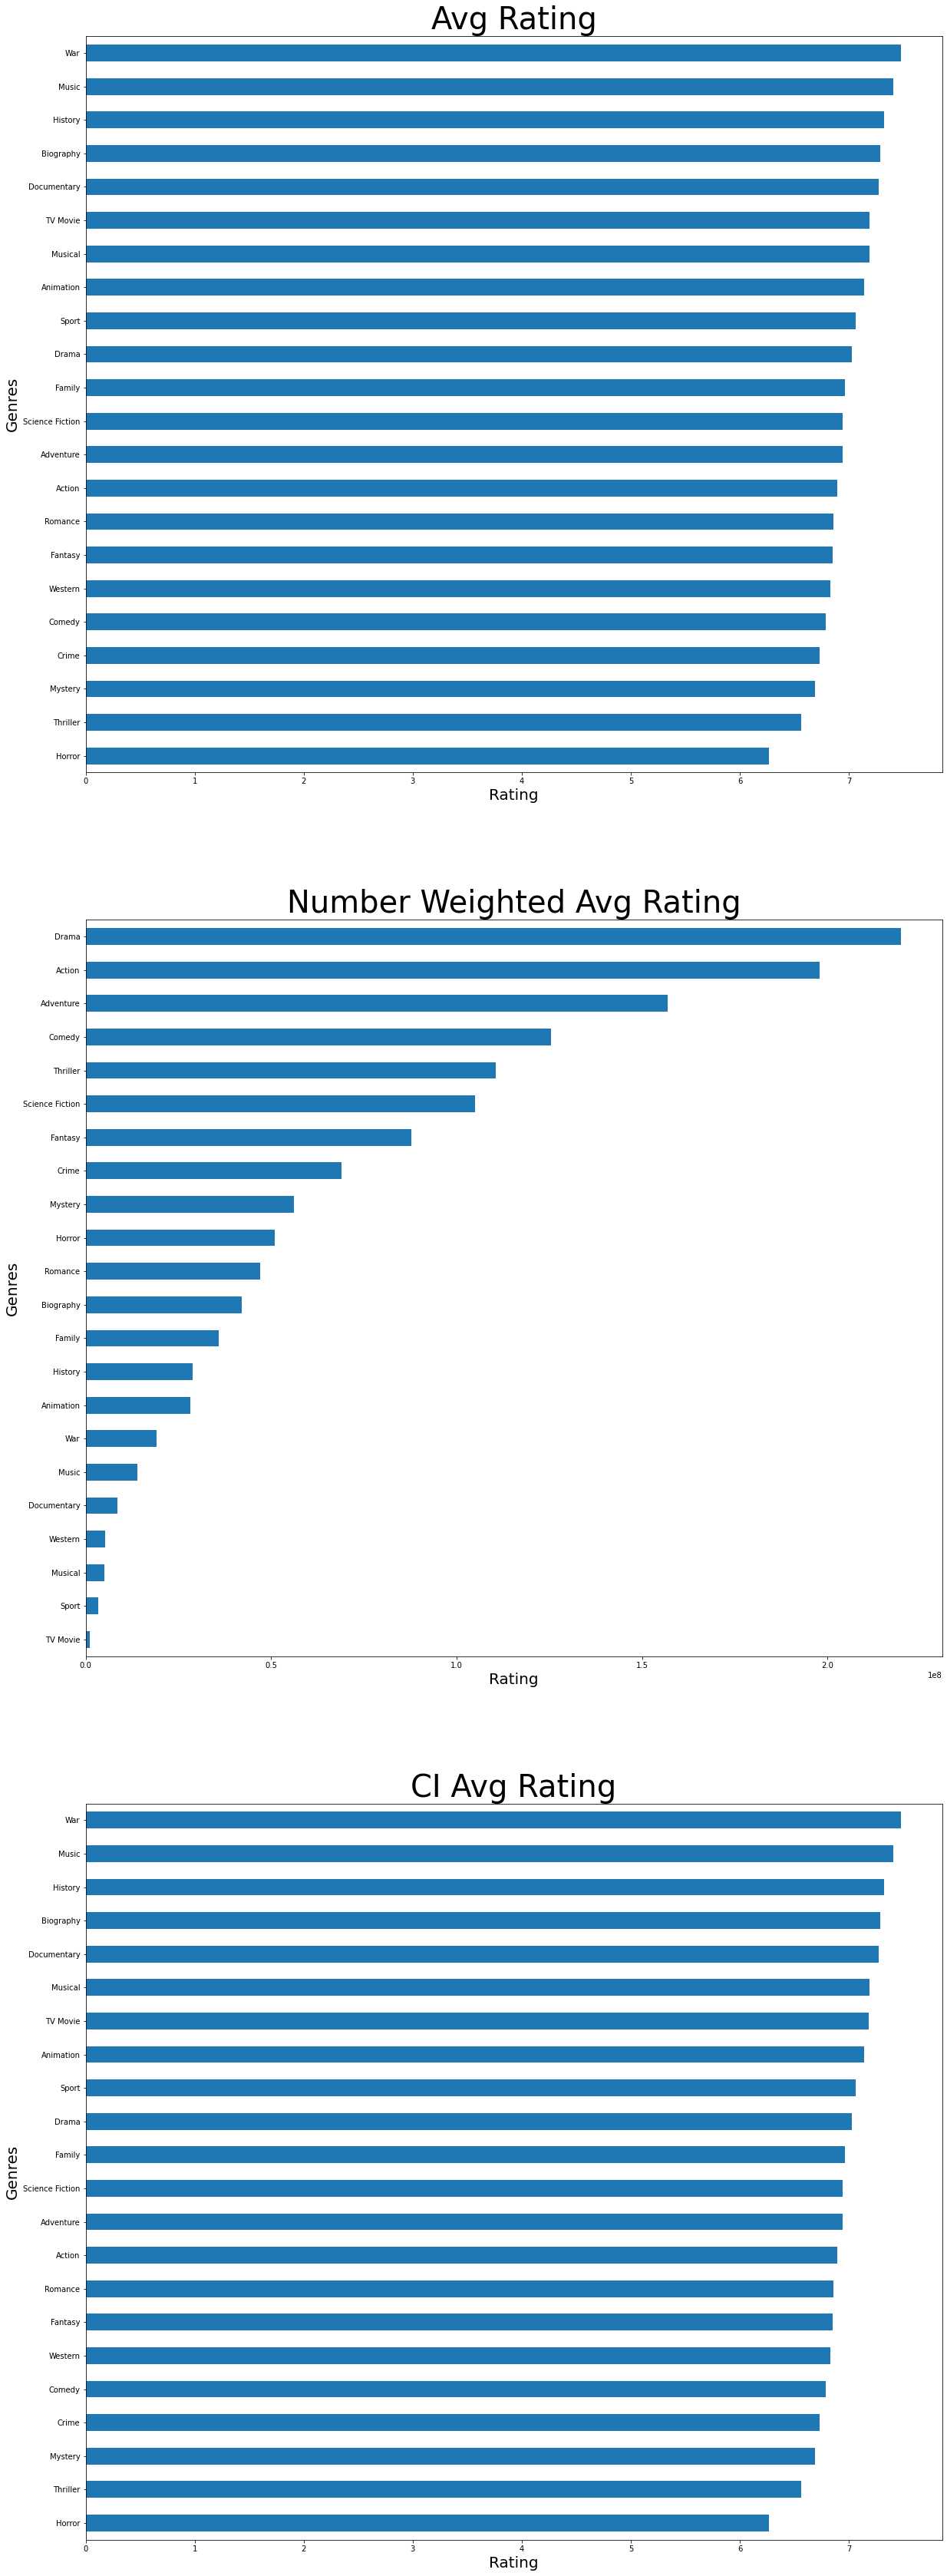

In [175]:
#B:2016-2018 
ratings_and_genre_2016_df = ratings_and_genre_df[(ratings_and_genre_df['year']>=2016)&(ratings_and_genre_df['year']<=2018)]
genre_ratings_2016_df = group_ratings_info(ratings_and_genre_2016_df,'genres')
generate_ratings_rankings(genre_ratings_2016_df[genre_ratings_2016_df['num_movies']>49],'Genres')


In [250]:
#Calculate Mean/STD/Med of grouped genre/ratings df
genre_ratings_2016_df.describe()


num_movies   total_votes  avg_rating_numwtd  avg_rating  \
count     30.000000  3.000000e+01       3.000000e+01   30.000000   
mean    1628.400000  6.883847e+06       4.737528e+07    6.939667   
std     2443.783593  8.911051e+06       6.146943e+07    0.820246   
min        1.000000  8.000000e+00       7.040000e+01    3.400000   
25%       66.250000  1.990035e+05       1.326087e+06    6.745000   
50%      905.500000  3.245543e+06       2.361389e+07    6.940000   
75%     1644.250000  9.788236e+06       6.578225e+07    7.250000   
max    10963.000000  3.127959e+07       2.198563e+08    8.800000   

       avg_rating_CIwtd  
count         30.000000  
mean           6.879333  
std            0.836660  
min            2.920000  
25%            6.745000  
50%            6.940000  
75%            7.187500  
max            8.020000

Text(0.5, 1.0, 'Highest Rated (CI) Genres by Year')

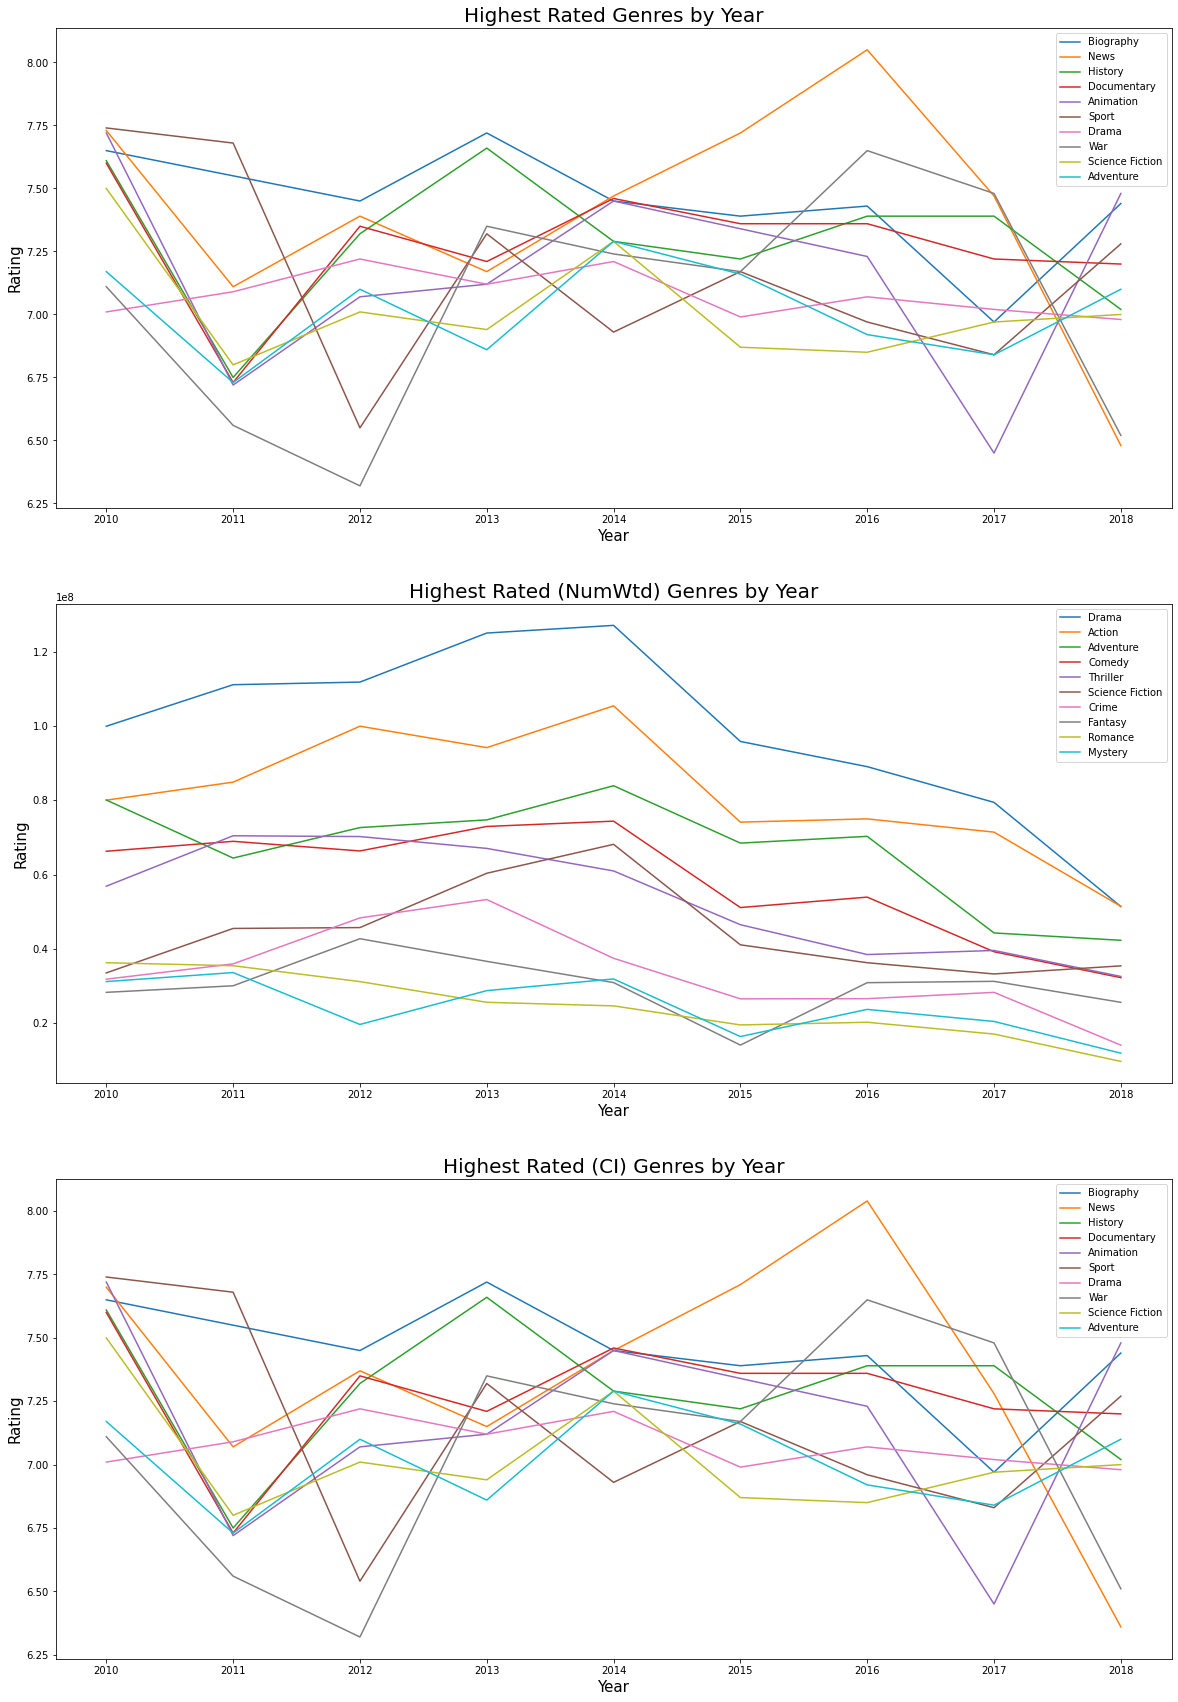

In [176]:
###Genre/Ratings Time Line Plot || Find Genre Average Ratings for each year of interest

#Create Genre Dictionary of List to hold Average Ratings Values
all_genres_list = list(genre_ratings_df.index)
avg_dict = {}
numwtd_dict = {}
ci_dict = {}
for genre in all_genres_list:
    avg_dict[genre] = []
    numwtd_dict[genre] = []
    ci_dict[genre] = []
    
for year in range(2010,2019):
    
    #Filter Rating/Genre Df by year
    year_df = ratings_and_genre_df[ratings_and_genre_df['year'] == year]
    
    #Group Yearly Rating/Genre df by Genre
    grouped_year_df = group_ratings_info(year_df,'genres')
    avg_ratings_series = grouped_year_df['avg_rating']
    numwtd_ratings_series = grouped_year_df['avg_rating_numwtd']
    ci_ratings_series = grouped_year_df['avg_rating_CIwtd']

    #Add Avg Ratings Information to results dict
    for key in avg_dict.keys():
        if key in avg_ratings_series.index:
            avg_dict[key].append(avg_ratings_series.loc[key])
        else:
            avg_dict[key].append(0.0)
            
    #Add NumWtd Ratings Information to results dict
    for key in numwtd_dict.keys():
        if key in numwtd_ratings_series.index:
            numwtd_dict[key].append(numwtd_ratings_series.loc[key])
        else:
            numwtd_dict[key].append(0.0)
            
    #Add CI Ratings Information to results dict
    for key in ci_dict.keys():
        if key in ci_ratings_series.index:
            ci_dict[key].append(ci_ratings_series.loc[key])
        else:
            ci_dict[key].append(0.0)
    
#Create Dataframes to show Ratings Results by year
avg_time_results_df = pd.DataFrame(avg_dict, index=range(2010,2019))
numwtd_time_results_df = pd.DataFrame(numwtd_dict, index=range(2010,2019))
ci_time_results_df = pd.DataFrame(ci_dict, index=range(2010,2019))

#Top Ten Genres in Yearly Average Ratings
avg_top_10_genres = list(avg_time_results_df.mean().sort_values(ascending=False).index)[:10]
numwtd_top_10_genres = list(numwtd_time_results_df.mean().sort_values(ascending=False).index)[:10]
ci_top_10_genres = list(ci_time_results_df.mean().sort_values(ascending=False).index)[:10]


#Time Line Plots
time_fig, (avg_ax,numwtd_ax,ci_ax) = plt.subplots(3,1,figsize=(20,30))
avg_time_results_df[avg_top_10_genres].plot.line(ax=avg_ax)
avg_ax.set_xlabel('Year',fontsize=15)
avg_ax.set_ylabel('Rating',fontsize=15)
avg_ax.set_title('Highest Rated Genres by Year',fontsize=20)
numwtd_time_results_df[numwtd_top_10_genres].plot.line(ax=numwtd_ax)
numwtd_ax.set_xlabel('Year',fontsize=15)
numwtd_ax.set_ylabel('Rating',fontsize=15)
numwtd_ax.set_title('Highest Rated (NumWtd) Genres by Year',fontsize=20)
ci_time_results_df[ci_top_10_genres].plot.line(ax=ci_ax)
ci_ax.set_xlabel('Year',fontsize=15)
ci_ax.set_ylabel('Rating',fontsize=15)
ci_ax.set_title('Highest Rated (CI) Genres by Year',fontsize=20)



In practice, the difference between our average rating and our confidence interval weighted rating is negligible when it comes to genres and their effect on film ratings.  This is not unexpected, because we grouped the film rating information by genre, most genres had thousands of votes, which leads to confidence intervals to be very narrow.  We will accordingly discuss average rating rankings and how it compares to the number weighted rating rankings.  

Additionally, in regards to our number weighted ratings, we recognized a couple points of interest.  Because the rating is directly proportional to number of votes, which is directly proportional to the number films in the genre, we see that for the most part our highest rated genres have the highest numbers of films.  Each film's rating, in reality, is a secondary portion of the rating compared to the number of votes (especially with very high vote counts) and acts as a point of distinction only in films with similar vote totals.  

We will first discuss our number weighted rating genres rankings because they are very consistent overall, with number of film restrictions, and in our time periods of interests.  The top five highest rated genres (and their film number) according to our number weighted rankings are drama (34K), action (8K), adventure (4K), comedy (20K), and thriller (10K).  With their lower (relatively) film counts, we designate the action, adventure, science fiction, crime, fantasy, and mystery genres as our "star" performers.  Per number of films, these genres drive more voting and film rating which we believe may be a potential indicator of film performance and audience investment/enthusiasm.

In terms of our average rating (as well as our confidence interval ratings), our top five highest rated genres are game show, short, news and performing arts.  We suspect that some of genres' rankings are products of low sample size (i.e. film number), so to produce more reliable rankings, we decided to generate rankings of genres with 50 of more constituent films.  This is resulted with a top five of news, performing arts, biography, western, and history.  

Lastly, we wished to analyze how these rankings changed over time.  Similar to our revenue information, we were constrained to the last decade (2010 - 2018) due to data scarcity.  As mentioned before our top five rankings according to our number weighted ranking remained consistent so we will discuss average rating only.  We generated rankings for three periods, (2010 to 2012, 2013 - 2015, 2016 - 2018) and attempted to notice any trends or consistencies.  Genres that performed well in all periods are biography and history with the news and documentary genres performing admirably as well.  We also see western, sport, animation, war, and music appear in just one of the periods' rankings.

With our two rankings proving to be very different, we attempted to detect genres that performed well in the number weighted ratings (Mass appeal/high audience enthusiasm) as well as in the average ratings (film culture signifigance).  We found that the genres of drama, science fiction, action, adventure, and crime appeared in the top half of both ranking methods.  


#### Principals

In [177]:
#Determine which principals are the most highly rated
print(ratings_and_principals_df.info())
ratings_and_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72713 entries, 0 to 72712
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   i_tuple              72713 non-null  object 
 1   principals_imdb      72713 non-null  object 
 2   principals_rt        72713 non-null  object 
 3   principals           72713 non-null  object 
 4   total_votes          72713 non-null  int64  
 5   vote_average         72713 non-null  float64
 6   vote_average_CIwtd   72713 non-null  float64
 7   vote_average_numwtd  72713 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.0+ MB
None


i_tuple  \
0  (!women art revolution, 2010)   
1       (#1 serial killer, 2013)   
2                     (#5, 2013)   
3                    (#66, 2015)   
4              (#abrohilo, 2019)   

                                     principals_imdb principals_rt  \
0                            (Lynn Hershman-Leeson,)                 
1  (Suan Toon Yeo, Jason Tobin, Eugenia Yuan, Tzi...                 
2                        (Ricky Bardy, Justin Bardy)                 
3  (Max Chan Tat Leong, Ari Riski Ananda, Erwin B...                 
4  (Manuel Bartual, Anita Botwin, Beatriz Cepeda,...                 

                                          principals  total_votes  \
0                            (Lynn Hershman-Leeson,)          196   
1  (Stanley Yung, Jason Tobin, Shoshana Bush, Que...           40   
2                        (Justin Bardy, Ricky Bardy)            6   
3  (Fandy Christian, Franki Darmawan, Daniel Tham...           18   
4  (Manuel Bartual, Pepe Colubi, Antonio J. Garcí...            8   

   vote_average  vote_average_CIwtd  vote_average_numwtd  
0           6.9                6.76               1352.4  
1           5.6                5.29                224.0  
2           6.8                6.01                 40.8  
3           5.3                4.84                 95.4  
4           6.6                5.92                 52.8

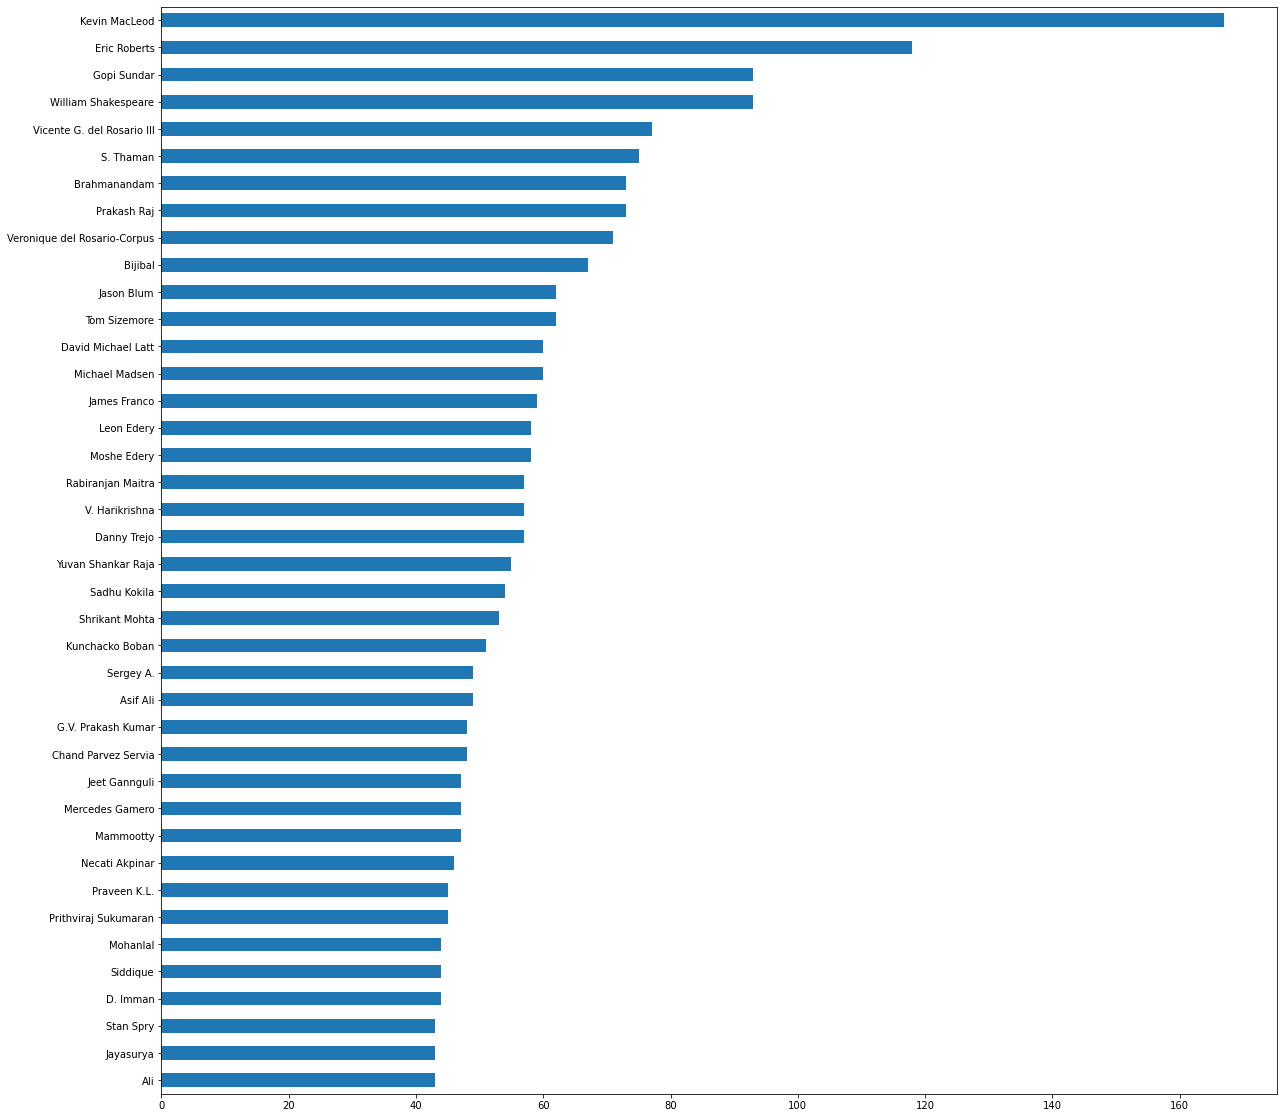

In [308]:
#Most common principals in ratings data
principals_ratings_df.sort_values('num_movies')['num_movies'].tail(40).plot(kind='barh',figsize=(20,20))


Jay Gonzalez            10.0
Heather Augustyn        10.0
Michael Truong          10.0
Benji Riggs             10.0
Esmeralda Ortega        10.0
Annabel Spinks-Jones    10.0
Emre Oran               10.0
John Avila              10.0
Aaron Barrett           10.0
Doug Harris             10.0
Name: avg_rating, dtype: float64 

Stan Lee             56398255.38
Leonardo DiCaprio    54748040.47
Jack Kirby           51279295.19
Robert Downey Jr.    49605136.84
Christopher Nolan    47874854.86
Emma Thomas          43215367.69
Chris Evans          43083819.44
Tom Hardy            39292743.31
Chris Hemsworth      36783525.11
Hans Zimmer          36766199.76
Name: avg_rating_numwtd, dtype: float64 

Mr. Ravichandran       9.78
Nagaraja Uppunda       9.78
Malathesh              9.78
Githanjali             9.78
Barbara Ling           9.67
Neeraja                9.60
S.K. Bhupathi          9.60
Shanthi Anand          9.60
Arsel Arumugam         9.60
Rezo Chkhikvishvili    9.55
Name: avg_rating_CIwtd,

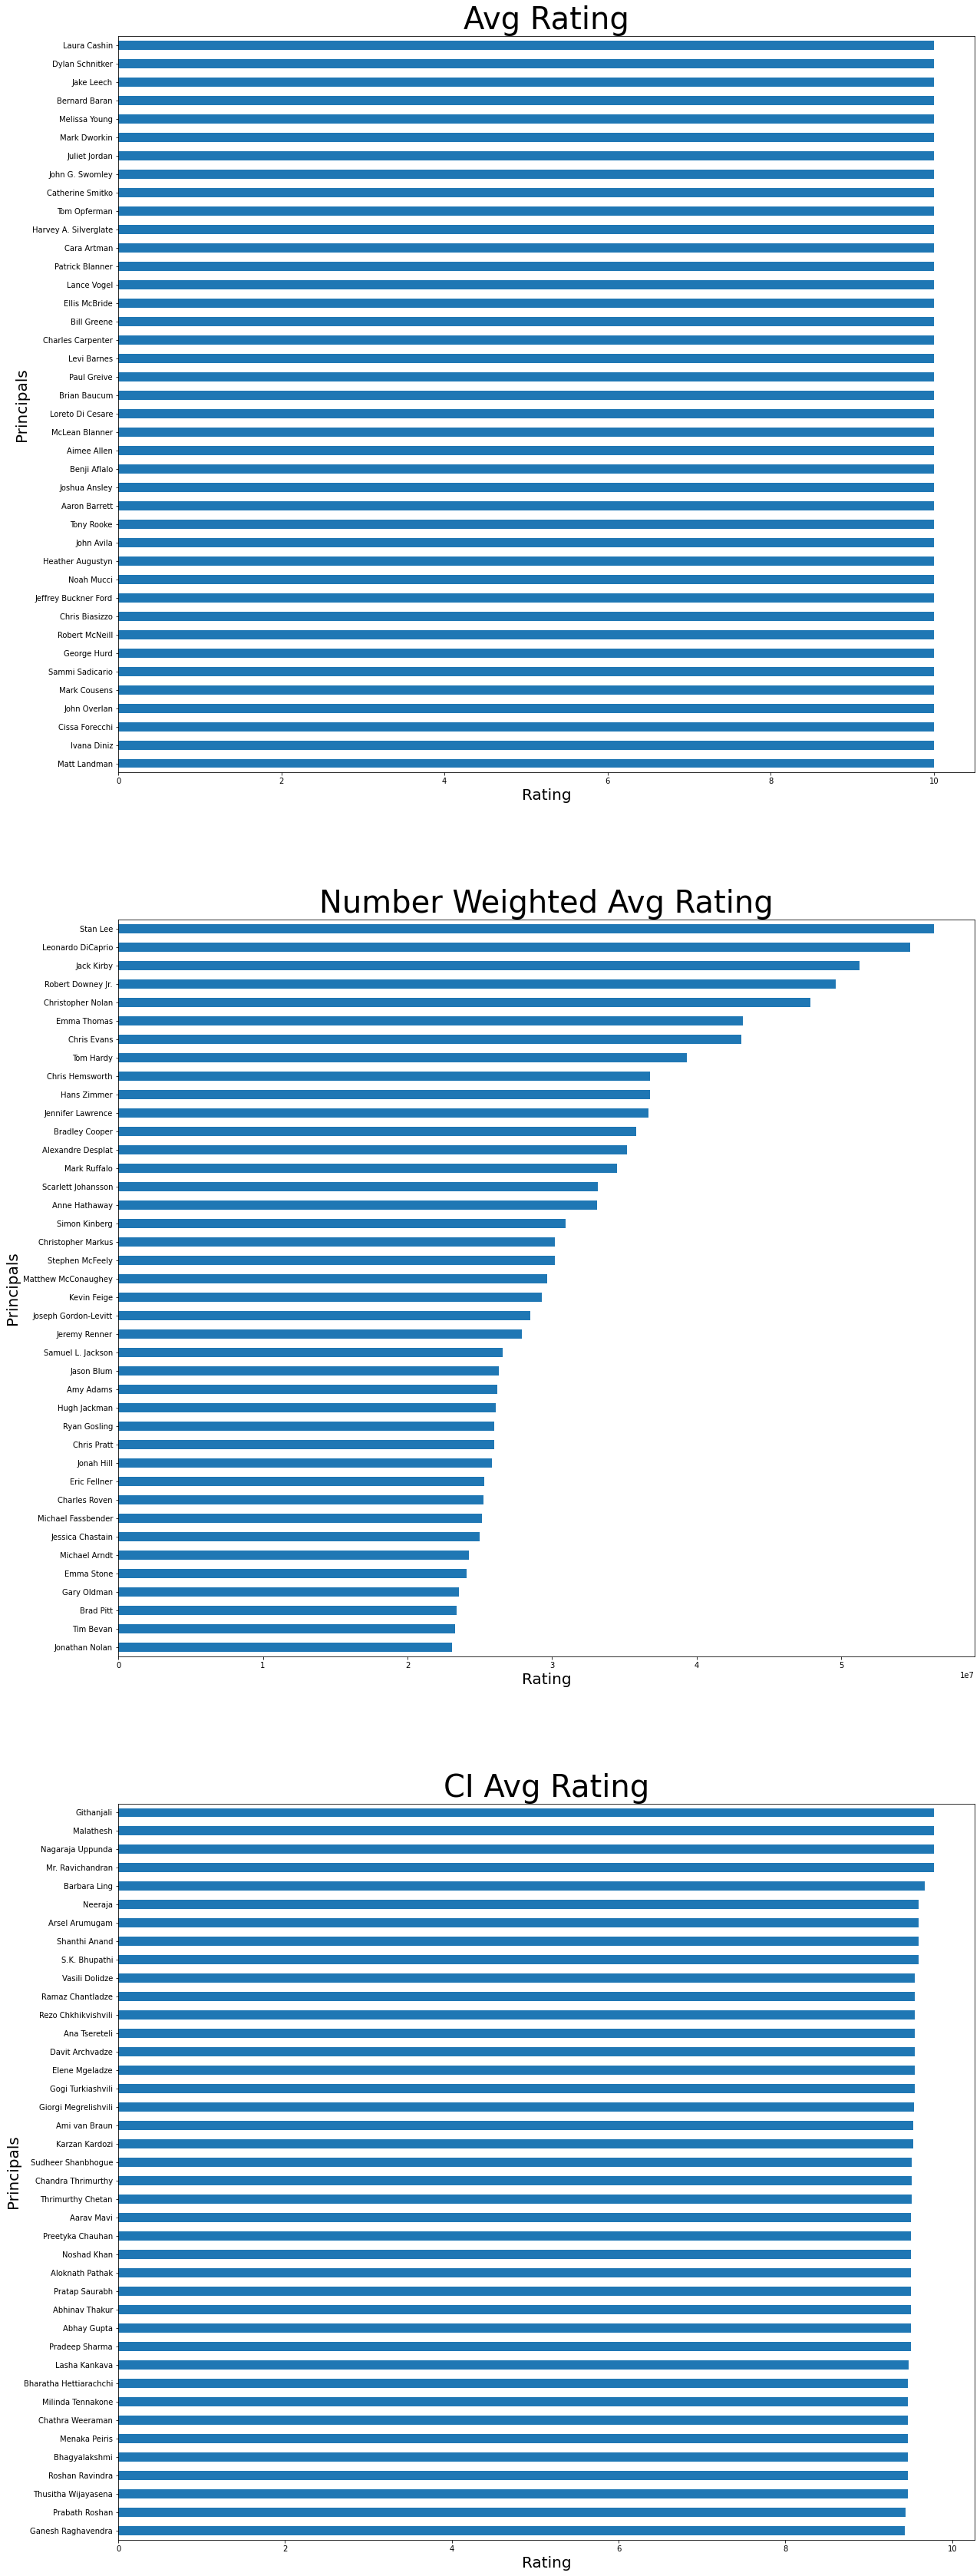

In [178]:
#Group Ratings Info by principal and generate rankings of each metric 
principals_ratings_df = group_ratings_info(ratings_and_principals_df,'principals')
generate_ratings_rankings(principals_ratings_df, "Principals")

In [251]:
#Calculate Mean/STD/Med Info for grouped principals/rating df
principals_ratings_df.describe()


num_movies   total_votes  avg_rating_numwtd     avg_rating  \
count  343864.000000  3.438640e+05       3.438640e+05  343864.000000   
mean        1.784755  7.433521e+03       5.128744e+04       6.339398   
std         2.182644  8.612120e+04       6.294737e+05       1.453741   
min         1.000000  1.000000e+00       0.000000e+00       0.000000   
25%         1.000000  1.600000e+01       1.064000e+02       5.500000   
50%         1.000000  6.600000e+01       3.984600e+02       6.500000   
75%         2.000000  4.190000e+02       2.369120e+03       7.310000   
max       167.000000  7.593560e+06       5.639826e+07      10.000000   

       avg_rating_CIwtd  
count     343864.000000  
mean           5.933345  
std            1.415780  
min           -2.550000  
25%            5.130000  
50%            6.130000  
75%            6.940000  
max            9.780000

François Cluzet        8.35
Kishore Kadam          8.33
Jeethu Joseph          8.32
B. Ajaneesh Loknath    8.30
Joel Lamangan          8.30
Omar Sy                8.29
Sruthi Hariharan       8.27
Sareh Bayat            8.24
Leila Hatami           8.23
Faridur Reza Sagar     8.23
Name: avg_rating, dtype: float64 

Stan Lee             56398255.38
Leonardo DiCaprio    54748040.47
Chris Evans          43083819.44
Tom Hardy            39292743.31
Chris Hemsworth      36783525.11
Hans Zimmer          36766199.76
Jennifer Lawrence    36680832.72
Bradley Cooper       35803236.89
Alexandre Desplat    35197013.87
Mark Ruffalo         34467827.70
Name: avg_rating_numwtd, dtype: float64 

François Cluzet        8.35
Jeethu Joseph          8.31
Omar Sy                8.29
Kishore Kadam          8.29
B. Ajaneesh Loknath    8.28
Joel Lamangan          8.26
Sruthi Hariharan       8.25
Sareh Bayat            8.23
Leila Hatami           8.22
Faridur Reza Sagar     8.21
Name: avg_rating_CIwtd, dtype: fl

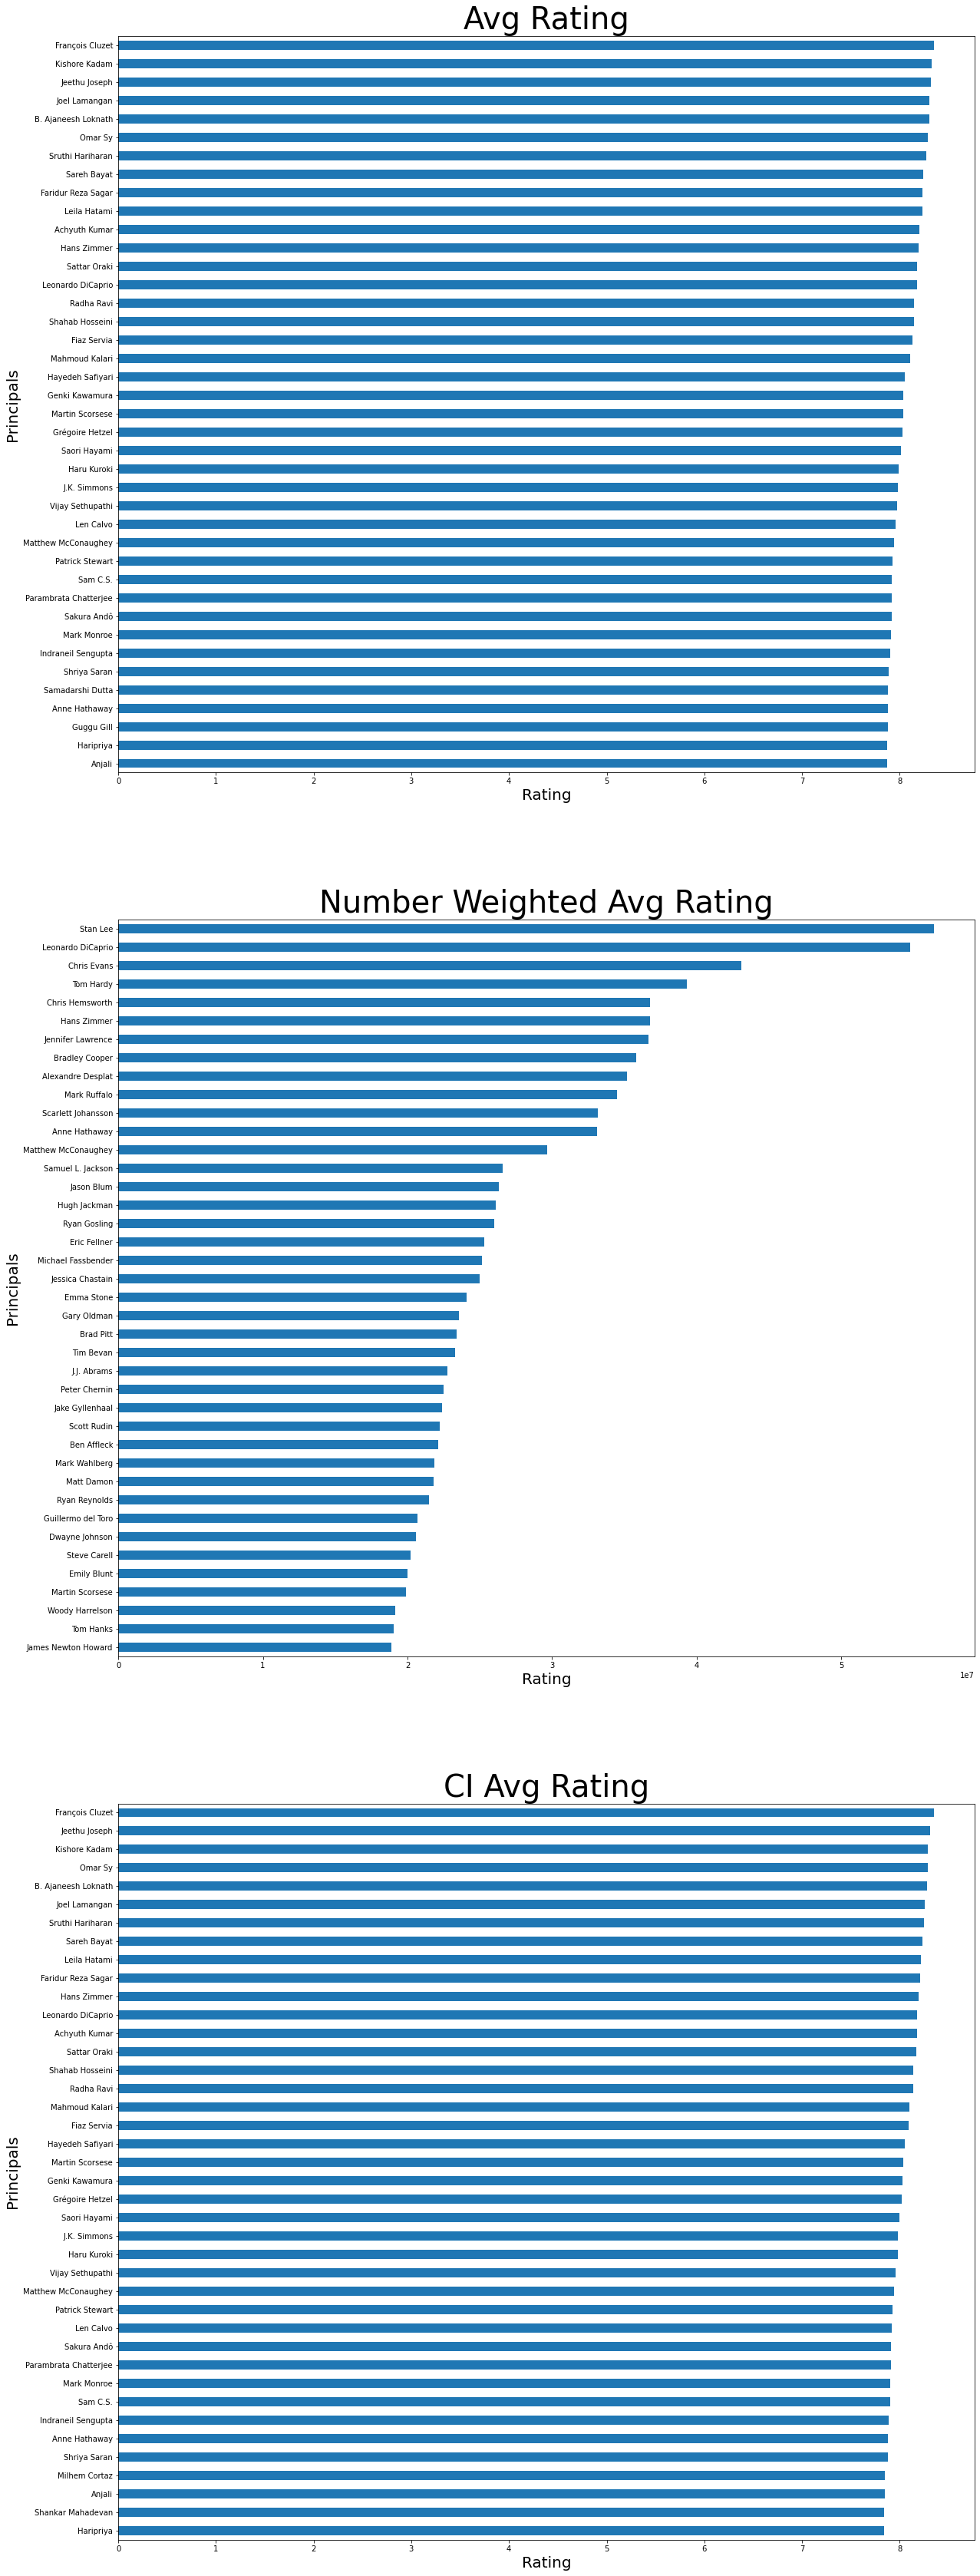

In [179]:
#Generate Rankings for principals involved in 15 or more films
generate_ratings_rankings(principals_ratings_df[principals_ratings_df['num_movies']>14],'Principals')


In [252]:
#Calculate Mean/STD/Med Info for grouped principals/rating df
principals_ratings_df[principals_ratings_df['num_movies']>14].describe()


num_movies   total_votes  avg_rating_numwtd   avg_rating  \
count  1672.000000  1.672000e+03       1.672000e+03  1672.000000   
mean     21.089713  2.772947e+05       1.950846e+06     6.409043   
std       9.085423  7.299553e+05       5.327458e+06     0.967945   
min      15.000000  1.150000e+02       4.933000e+02     1.480000   
25%      16.000000  5.935250e+03       3.693640e+04     5.967500   
50%      18.000000  2.011250e+04       1.254727e+05     6.600000   
75%      23.000000  1.003452e+05       6.842325e+05     7.060000   
max     167.000000  7.593560e+06       5.639826e+07     8.350000   

       avg_rating_CIwtd  
count       1672.000000  
mean           6.384318  
std            0.975576  
min            1.340000  
25%            5.940000  
50%            6.580000  
75%            7.040000  
max            8.350000

In [180]:
#Make Year column for ratings/principals dataframe for time filtering
ratings_and_principals_df['year'] = ratings_and_principals_df['i_tuple'].map(lambda tup: tup[1])
ratings_and_principals_df.head()

i_tuple  \
0  (!women art revolution, 2010)   
1       (#1 serial killer, 2013)   
2                     (#5, 2013)   
3                    (#66, 2015)   
4              (#abrohilo, 2019)   

                                     principals_imdb principals_rt  \
0                            (Lynn Hershman-Leeson,)                 
1  (Suan Toon Yeo, Jason Tobin, Eugenia Yuan, Tzi...                 
2                        (Ricky Bardy, Justin Bardy)                 
3  (Max Chan Tat Leong, Ari Riski Ananda, Erwin B...                 
4  (Manuel Bartual, Anita Botwin, Beatriz Cepeda,...                 

                                          principals  total_votes  \
0                            (Lynn Hershman-Leeson,)          196   
1  (Stanley Yung, Jason Tobin, Shoshana Bush, Que...           40   
2                        (Justin Bardy, Ricky Bardy)            6   
3  (Fandy Christian, Franki Darmawan, Daniel Tham...           18   
4  (Manuel Bartual, Pepe Colubi, Antonio J. Garcí...            8   

   vote_average  vote_average_CIwtd  vote_average_numwtd    year  
0           6.9                6.76               1352.4  2010.0  
1           5.6                5.29                224.0  2013.0  
2           6.8                6.01                 40.8  2013.0  
3           5.3                4.84                 95.4  2015.0  
4           6.6                5.92                 52.8  2019.0

In [181]:
ratings_and_principals_df['year'].value_counts().head(20)

2017.0    8466
2016.0    8435
2015.0    8170
2014.0    8160
2013.0    7806
2012.0    7521
2018.0    7298
2011.0    7238
2010.0    6673
2019.0    2143
2000.0      30
2009.0      26
1993.0      26
1995.0      26
2003.0      26
2001.0      26
1994.0      24
2002.0      24
1987.0      23
1998.0      22
Name: year, dtype: int64

Alexandre Desplat     7.66
Ronnie Screwvala      7.57
Bradford Hill         7.33
Marieve Herington     7.31
James Franco          7.30
David Gerrold         7.26
Donald F. Glut        7.25
Jason Barker          7.20
Yuvan Shankar Raja    7.10
William Winckler      7.05
Name: avg_rating, dtype: float64 

Alexandre Desplat      28914969.66
James Franco            7266529.48
Ronnie Screwvala        1669327.30
Danny Trejo             1458955.77
Pritam Chakraborty      1053276.70
Joe Swanberg             553694.08
Anupam Kher              415703.70
Prakash Raj              408382.62
William Shakespeare      239498.50
Sameer                   230038.00
Name: avg_rating_numwtd, dtype: float64 

Alexandre Desplat     7.66
Ronnie Screwvala      7.56
James Franco          7.30
Bradford Hill         7.23
Marieve Herington     7.21
David Gerrold         7.16
Donald F. Glut        7.15
Jason Barker          7.10
Yuvan Shankar Raja    7.08
William Winckler      6.97
Name: avg_rating_CIwtd, dtype: fl

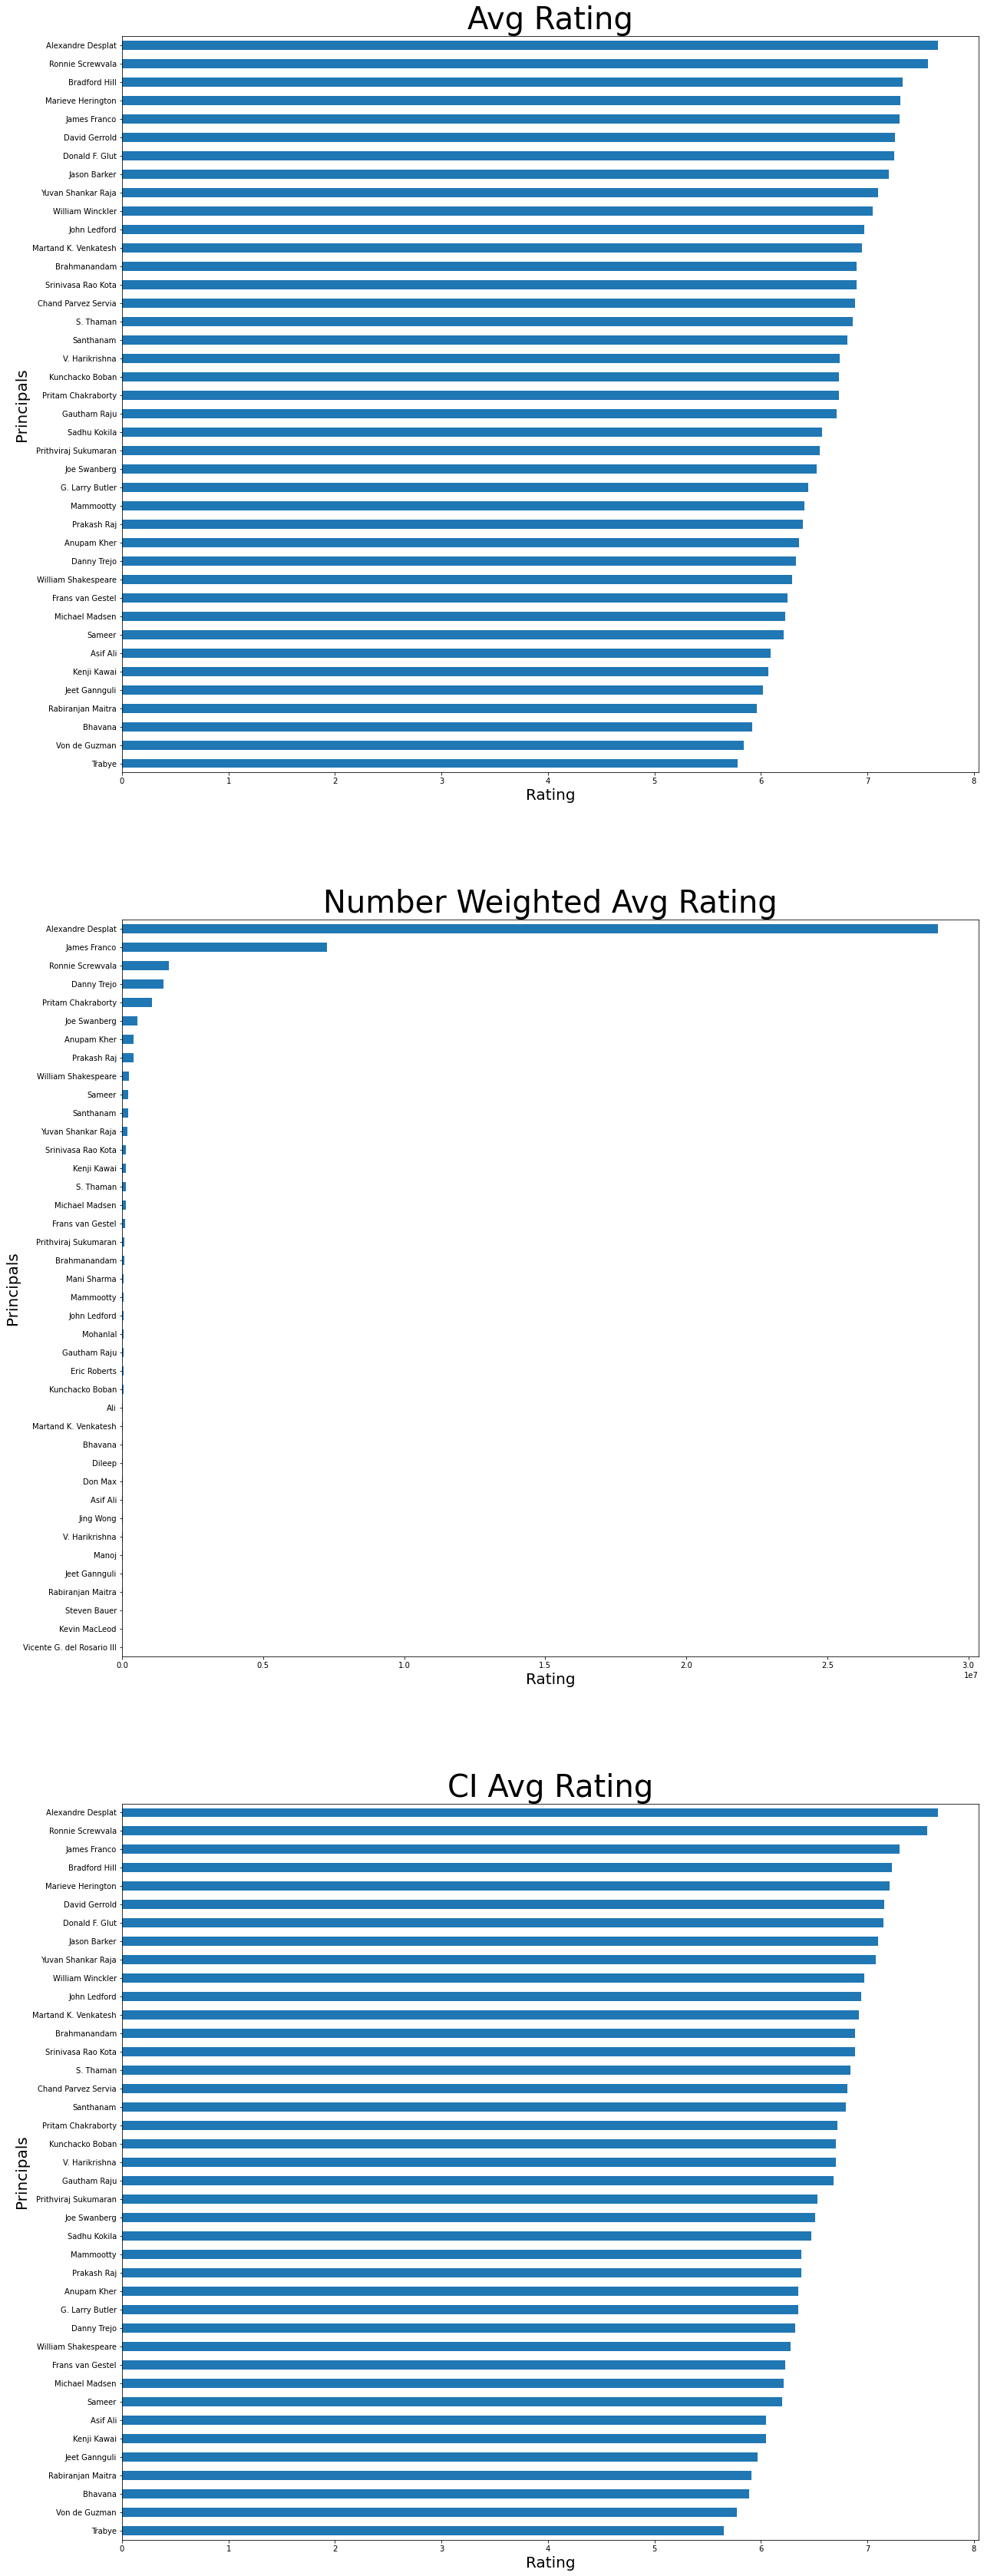

In [263]:
#A:2010-2012  
ratings_and_principals_2010_df = ratings_and_principals_df[(ratings_and_principals_df['year']>=2010)&(ratings_and_principals_df['year']<=2012)]
principals_ratings_2010_df = group_ratings_info(ratings_and_principals_2010_df,'principals')
generate_ratings_rankings(principals_ratings_2010_df[principals_ratings_2010_df['num_movies']>14],'Principals')


In [253]:
#Calculate Mean/STD/Med Info for grouped principals/rating df
principals_ratings_2010_df.describe()


num_movies   total_votes  avg_rating_numwtd     avg_rating  \
count  133905.000000  1.339050e+05       1.339050e+05  133905.000000   
mean        1.354520  7.053148e+03       4.872919e+04       6.254749   
std         1.032894  6.313806e+04       4.718255e+05       1.415680   
min         1.000000  1.000000e+00       1.000000e+00       1.000000   
25%         1.000000  1.600000e+01       1.027000e+02       5.410000   
50%         1.000000  6.500000e+01       3.900000e+02       6.400000   
75%         1.000000  4.220000e+02       2.333600e+03       7.200000   
max        57.000000  4.334660e+06       3.630496e+07      10.000000   

       avg_rating_CIwtd  
count     133905.000000  
mean           5.847556  
std            1.380046  
min           -1.550000  
25%            5.060000  
50%            6.060000  
75%            6.840000  
max            9.190000

Nassar                          8.15
Noam Chomsky                    7.78
Fahadh Faasil                   7.68
Mohanlal                        7.62
Anurag Kashyap                  7.62
Joy Mathew                      7.54
Veronique del Rosario-Corpus    7.50
Gopi Sundar                     7.49
Vicente G. del Rosario III      7.44
Anoop Rubens                    7.35
Name: avg_rating, dtype: float64 

Jason Blum             12455752.75
James Franco            6174512.32
Danny Bensi             2506033.33
Anurag Kashyap          1468769.10
Saunder Jurriaans       1241384.35
William Shakespeare      843525.74
Siddharth Roy Kapur      789732.40
Necati Akpinar           636456.30
Nassar                   567723.30
Danny Trejo              538713.69
Name: avg_rating_numwtd, dtype: float64 

Nassar                          8.14
Noam Chomsky                    7.76
Fahadh Faasil                   7.66
Mohanlal                        7.61
Anurag Kashyap                  7.61
Joy Mathew        

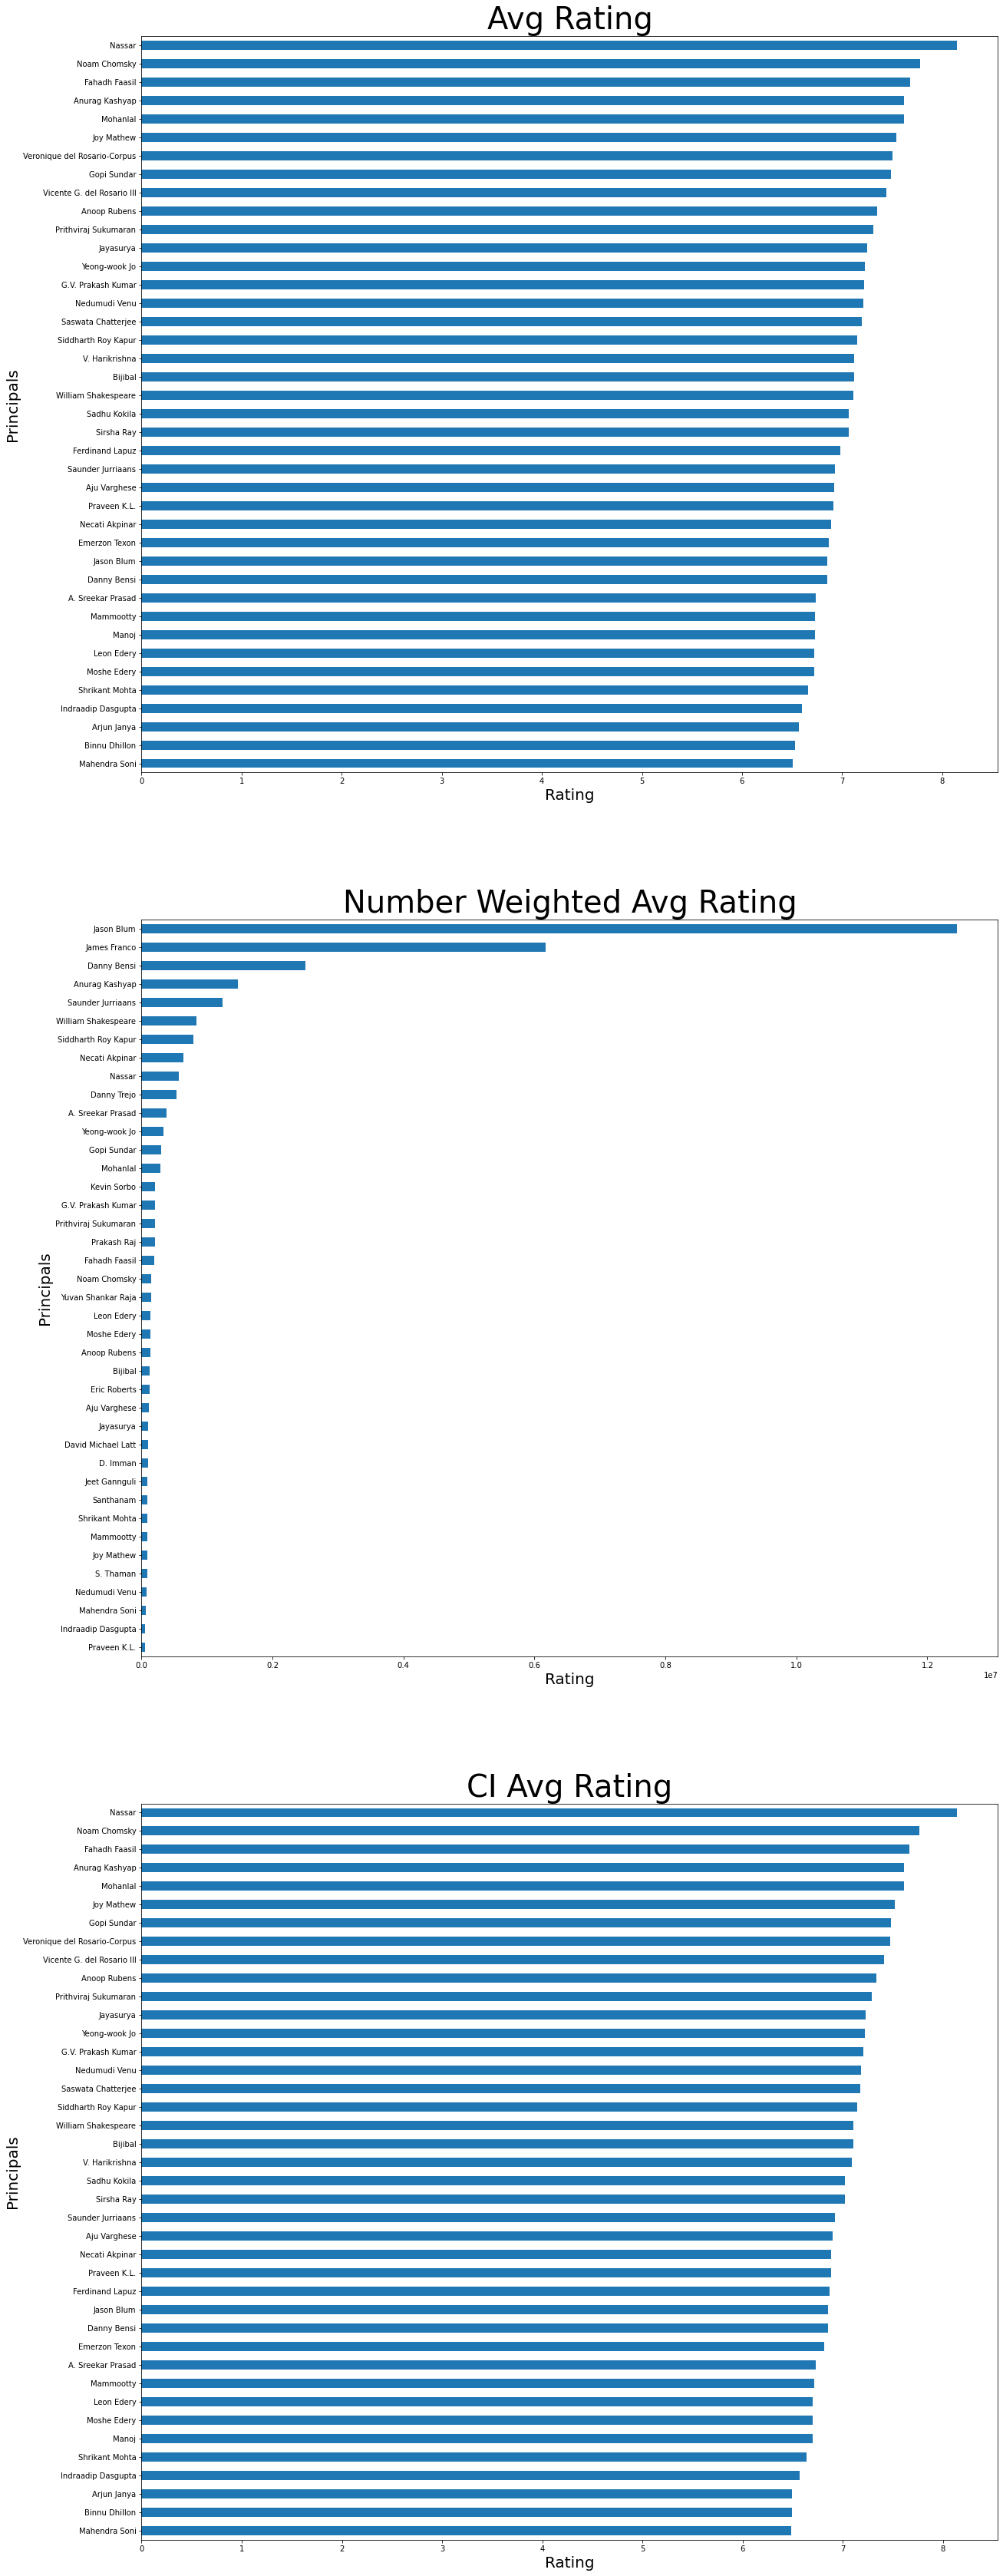

In [264]:
#A:2013-2015
ratings_and_principals_2013_df = ratings_and_principals_df[(ratings_and_principals_df['year']>=2013)&(ratings_and_principals_df['year']<=2015)]
principals_ratings_2013_df = group_ratings_info(ratings_and_principals_2013_df,'principals')
generate_ratings_rankings(principals_ratings_2013_df[principals_ratings_2013_df['num_movies']>14],'Principals')


In [254]:
#Calculate Mean/STD/Med Info for grouped principals/rating df
principals_ratings_2013_df.describe()


num_movies   total_votes  avg_rating_numwtd     avg_rating  \
count  149895.000000  1.498950e+05       1.498950e+05  149895.000000   
mean        1.364001  6.289559e+03       4.351720e+04       6.274784   
std         1.058805  5.827130e+04       4.284604e+05       1.421437   
min         1.000000  1.000000e+00       0.000000e+00       0.000000   
25%         1.000000  1.700000e+01       1.078000e+02       5.400000   
50%         1.000000  6.900000e+01       4.186000e+02       6.400000   
75%         1.000000  4.380000e+02       2.443000e+03       7.220000   
max        61.000000  3.069070e+06       2.324362e+07      10.000000   

       avg_rating_CIwtd  
count     149895.000000  
mean           5.876088  
std            1.385174  
min           -2.550000  
25%            5.070000  
50%            6.060000  
75%            6.860000  
max            9.530000

Achyuth Kumar          8.21
Chand Parvez Servia    8.17
Yuvan Shankar Raja     7.97
V. Harikrishna         7.71
Yogi Babu              7.68
Jagapathi Babu         7.61
Ferdinand Lapuz        7.51
Arjun Janya            7.49
Nathan Halpern         7.48
Prakash Raj            7.44
Name: avg_rating, dtype: float64 

Jason Blum         7383826.67
Willem Dafoe       5172553.76
James Franco       1592647.68
Mercedes Gamero    1073518.20
Michel Merkt       1063096.75
Mikel Lejarza      1011525.90
Sidonie Dumas       577807.44
Bhushan Kumar       510173.71
Jagapathi Babu      395977.00
Gopi Sundar         327893.90
Name: avg_rating_numwtd, dtype: float64 

Achyuth Kumar          8.18
Chand Parvez Servia    8.14
Yuvan Shankar Raja     7.95
V. Harikrishna         7.67
Yogi Babu              7.66
Jagapathi Babu         7.60
Arjun Janya            7.46
Nathan Halpern         7.46
Prakash Raj            7.43
Ferdinand Lapuz        7.42
Name: avg_rating_CIwtd, dtype: float64 



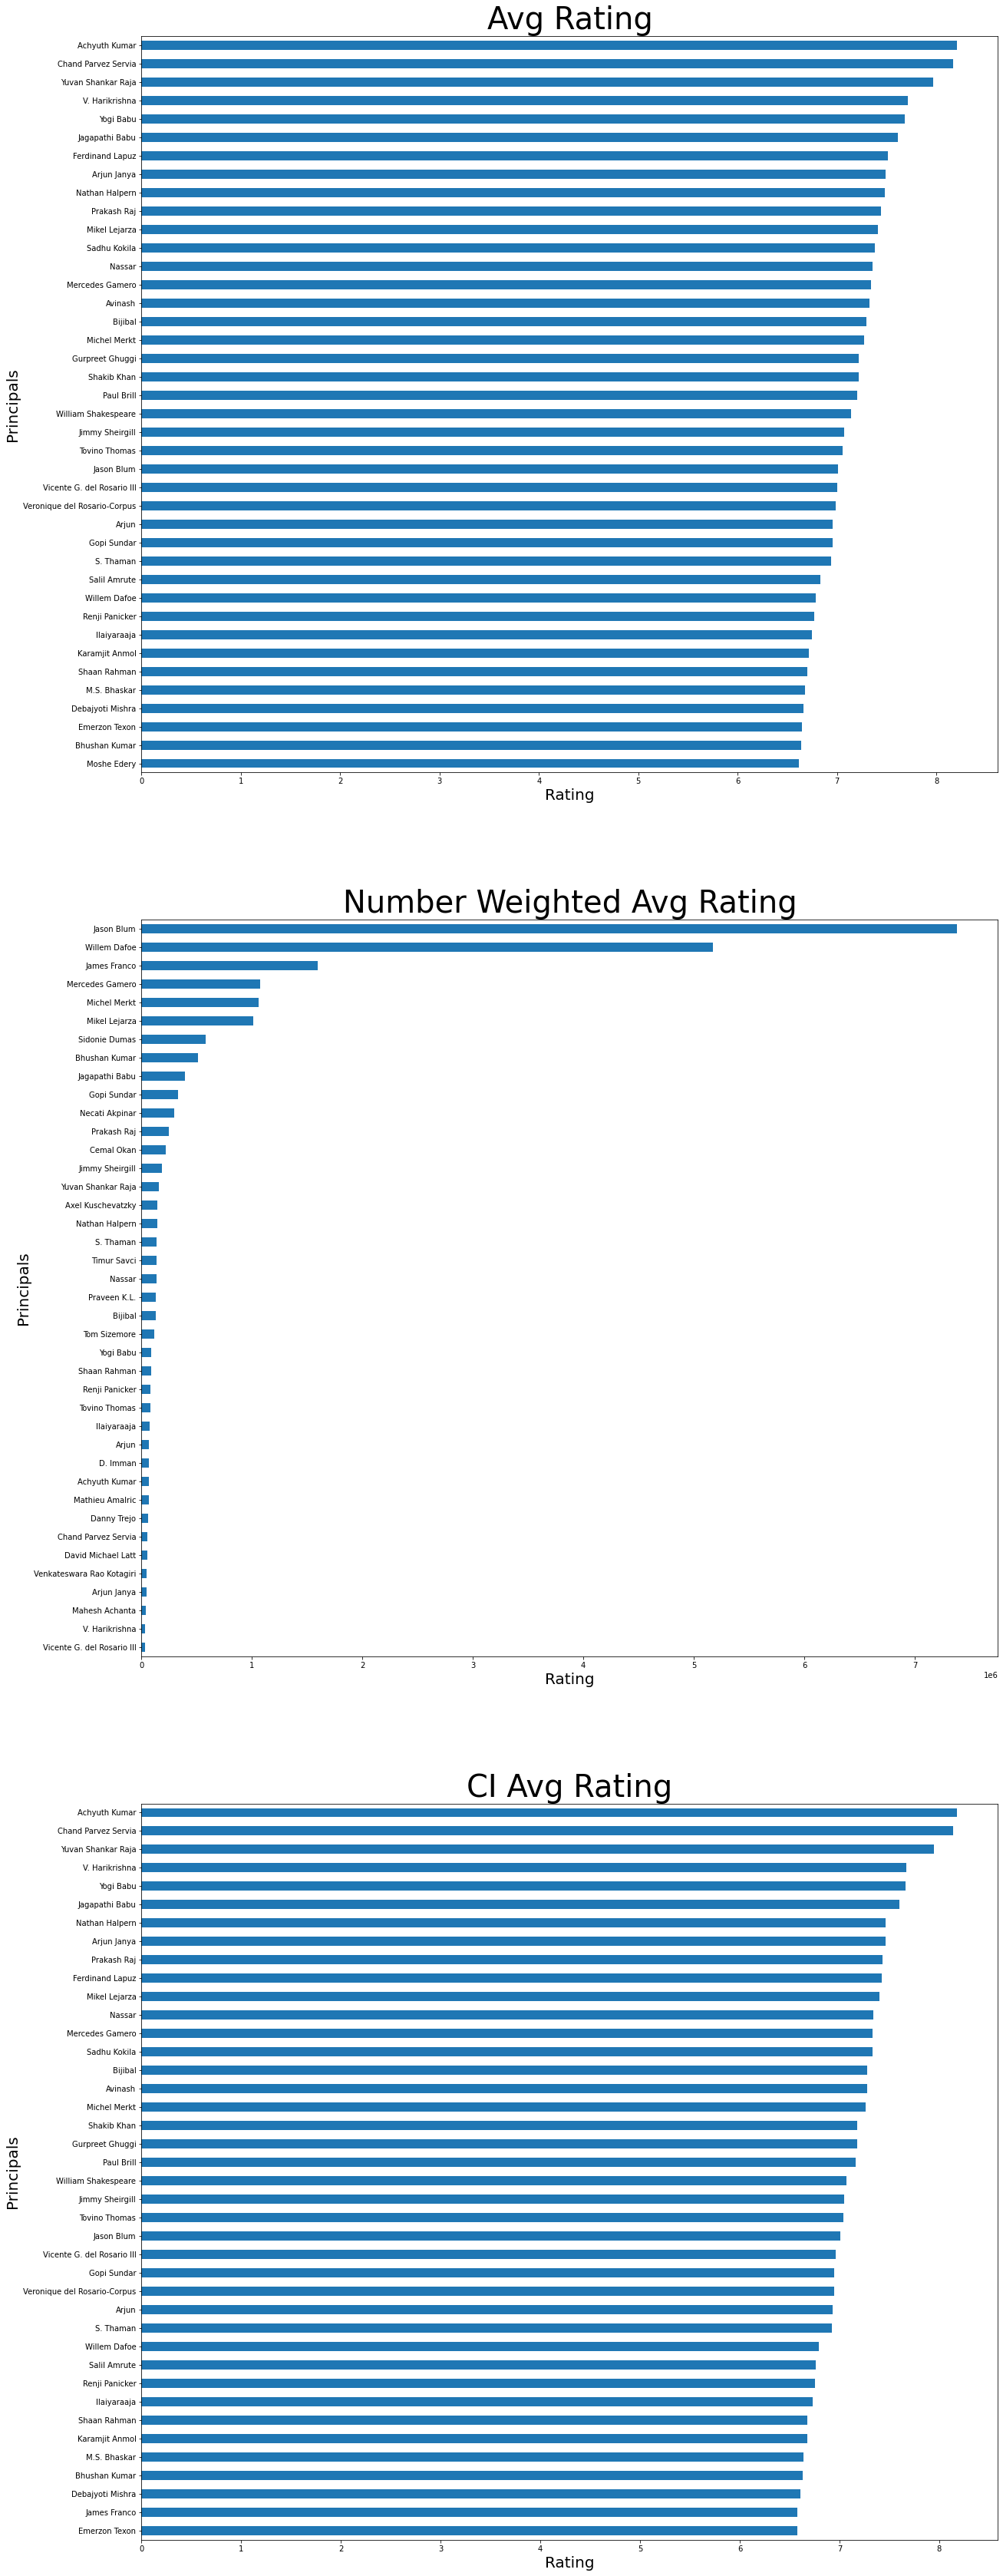

In [265]:
#A:2016-2018 
ratings_and_principals_2016_df = ratings_and_principals_df[(ratings_and_principals_df['year']>=2016)&(ratings_and_principals_df['year']<=2018)]
principals_ratings_2016_df = group_ratings_info(ratings_and_principals_2016_df,'principals')
generate_ratings_rankings(principals_ratings_2016_df[principals_ratings_2016_df['num_movies']>14],'Principals')


In [255]:
#Calculate Mean/STD/Med Info for grouped principals/rating df
principals_ratings_2016_df.describe()


num_movies   total_votes  avg_rating_numwtd     avg_rating  \
count  149020.000000  1.490200e+05       1.490200e+05  149020.000000   
mean        1.390921  4.283252e+03       2.935569e+04       6.385708   
std         1.105789  3.754874e+04       2.735947e+05       1.483886   
min         1.000000  1.000000e+00       0.000000e+00       0.000000   
25%         1.000000  1.700000e+01       1.131000e+02       5.500000   
50%         1.000000  7.000000e+01       4.226700e+02       6.500000   
75%         1.000000  3.950000e+02       2.294900e+03       7.400000   
max        48.000000  2.850146e+06       2.186174e+07      10.000000   

       avg_rating_CIwtd  
count     149020.000000  
mean           5.986870  
std            1.442206  
min           -2.550000  
25%            5.160000  
50%            6.170000  
75%            7.000000  
max            9.600000

Text(0.5, 1.0, 'Highest Rated (CI) Principals by Year')

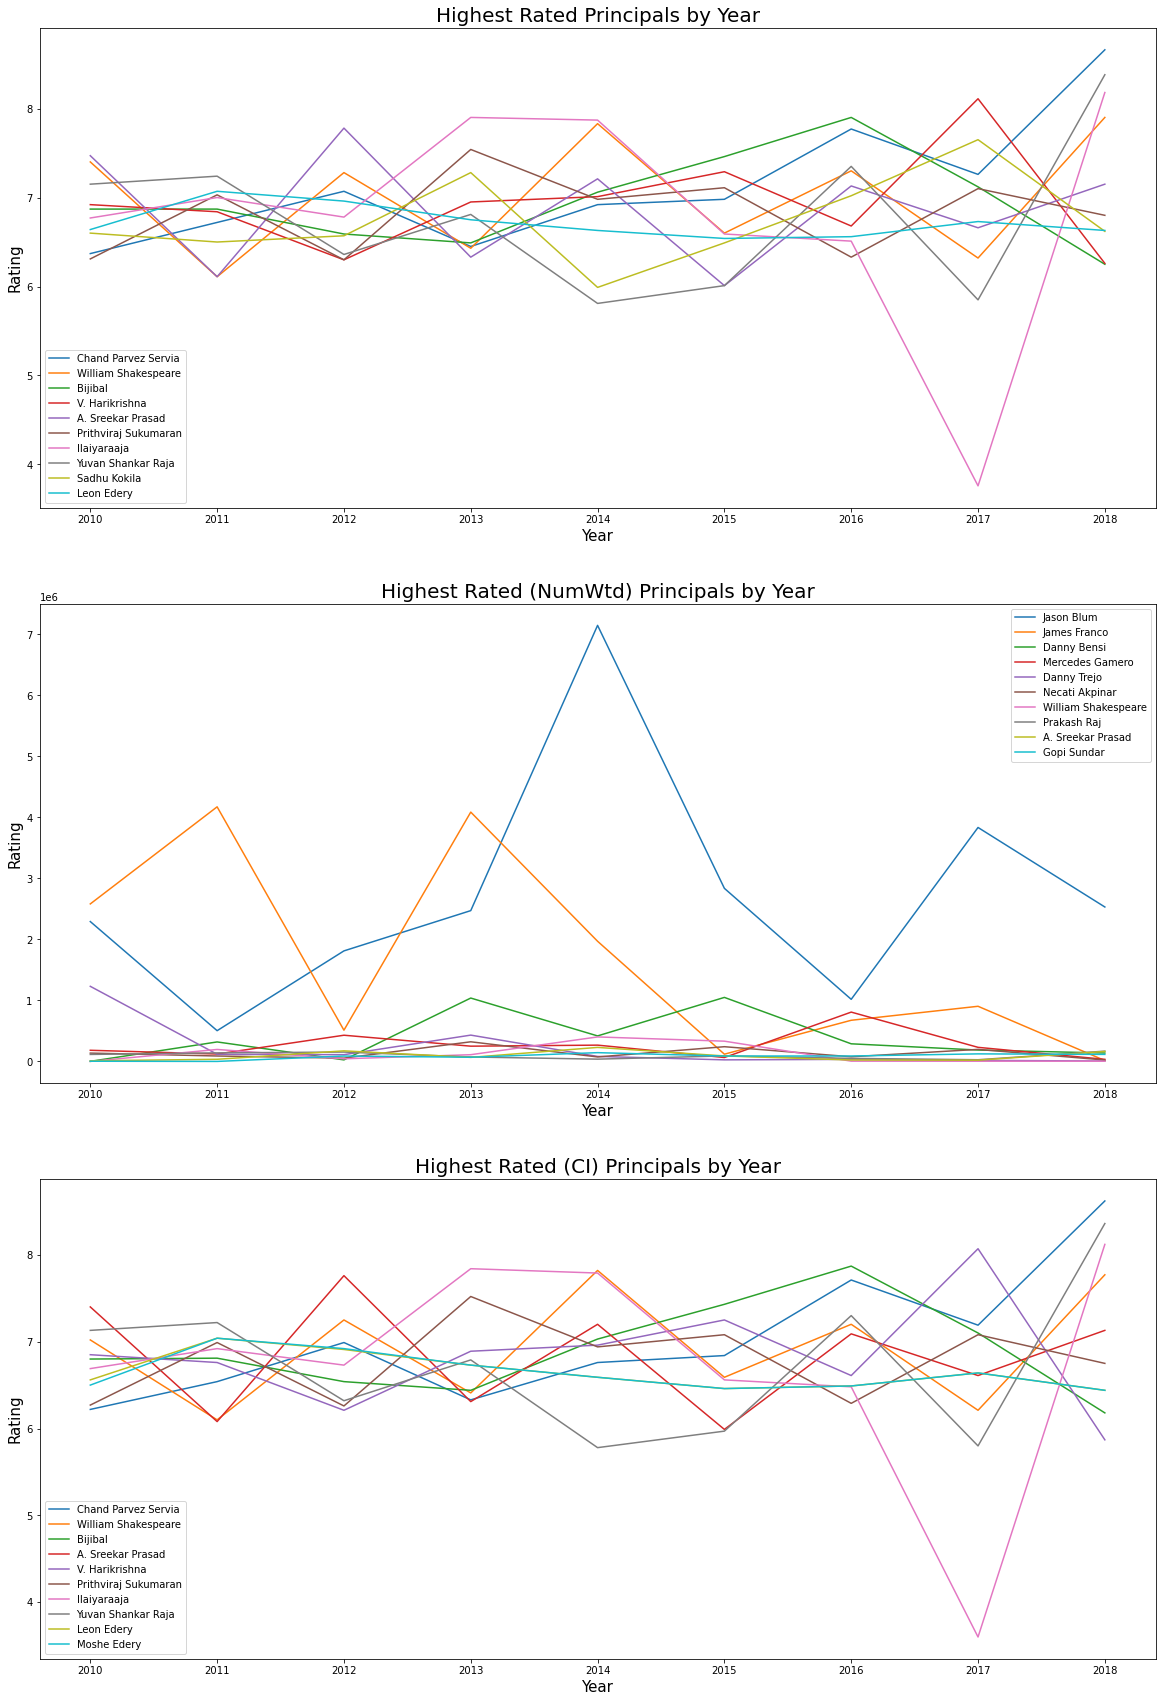

In [185]:
###Principals/Ratings Time Line Plot || Find Principals Average Ratings for each year of interest

#Create Genre Dictionary of List to hold Average Ratings Values
principals_list = list(principals_ratings_df.sort_values(by='num_movies',ascending=False).head(50).index)
avg_dict = {}
numwtd_dict = {}
ci_dict = {}
for principal in principals_list:
    avg_dict[principal] = []
    numwtd_dict[principal] = []
    ci_dict[principal] = []
    
for year in range(2010,2019):
    
    #Filter Rating/Genre Df by year
    year_df = ratings_and_principals_df[ratings_and_principals_df['year'] == year]
    
    #Group Yearly Rating/Genre df by Genre
    grouped_year_df = group_ratings_info(year_df,'principals')
    avg_ratings_series = grouped_year_df['avg_rating']
    numwtd_ratings_series = grouped_year_df['avg_rating_numwtd']
    ci_ratings_series = grouped_year_df['avg_rating_CIwtd']

    #Add Avg Ratings Information to results dict
    for key in avg_dict.keys():
        if key in avg_ratings_series.index:
            avg_dict[key].append(avg_ratings_series.loc[key])
        else:
            avg_dict[key].append(0.0)
            
    #Add NumWtd Ratings Information to results dict
    for key in numwtd_dict.keys():
        if key in numwtd_ratings_series.index:
            numwtd_dict[key].append(numwtd_ratings_series.loc[key])
        else:
            numwtd_dict[key].append(0.0)
            
    #Add CI Ratings Information to results dict
    for key in ci_dict.keys():
        if key in ci_ratings_series.index:
            ci_dict[key].append(ci_ratings_series.loc[key])
        else:
            ci_dict[key].append(0.0)
    
#Create Dataframes to show Ratings Results by year
avg_time_results_df = pd.DataFrame(avg_dict, index=range(2010,2019))
numwtd_time_results_df = pd.DataFrame(numwtd_dict, index=range(2010,2019))
ci_time_results_df = pd.DataFrame(ci_dict, index=range(2010,2019))

#Top Ten Genres in Yearly Average Ratings
avg_top_10_principals = list(avg_time_results_df.mean().sort_values(ascending=False).index)[:10]
numwtd_top_10_principals = list(numwtd_time_results_df.mean().sort_values(ascending=False).index)[:10]
ci_top_10_principals = list(ci_time_results_df.mean().sort_values(ascending=False).index)[:10]


#Time Line Plots
time_fig, (avg_ax,numwtd_ax,ci_ax) = plt.subplots(3,1,figsize=(20,30))
avg_time_results_df[avg_top_10_principals].plot.line(ax=avg_ax)
avg_ax.set_xlabel('Year',fontsize=15)
avg_ax.set_ylabel('Rating',fontsize=15)
avg_ax.set_title('Highest Rated Principals by Year',fontsize=20)
numwtd_time_results_df[numwtd_top_10_principals].plot.line(ax=numwtd_ax)
numwtd_ax.set_xlabel('Year',fontsize=15)
numwtd_ax.set_ylabel('Rating',fontsize=15)
numwtd_ax.set_title('Highest Rated (NumWtd) Principals by Year',fontsize=20)
ci_time_results_df[ci_top_10_principals].plot.line(ax=ci_ax)
ci_ax.set_xlabel('Year',fontsize=15)
ci_ax.set_ylabel('Rating',fontsize=15)
ci_ax.set_title('Highest Rated (CI) Principals by Year',fontsize=20)



Compared to our genre ratings, finding actionable information in the highest rated principal rankings was more difficult.  It seems that our ratings databases contained a large amount of eastern film data.  On top of this, eastern films appear to be more highly rated as their principals dominate the top  rankings when it comes to average and confidence interval ratings.  To make this analysis more useful, we need to go back and sort the film rating information by primary language for two reasons.  First, by filtering out non-western films, we can generate rankings focused on our primary audience that are more actionable.  Second, by having a separate database/ranking for eastern films, we can further analyze the eastern film market and audience to see whether or not investment in foreign markets can be profitable.  The domination of the average rating rankings show that there is much to uncover and analyze in these emerging/established markets.  For now, we will focus on western principals in our number weighted rankings as they are more consistent with our expectations.

Our top five highest rated principals, according to our number weighted rankings, is once again dominated by Marvel-involved principals (even when restricted our principal group to 15 minimum films) and Leonardo Dicaprio.  Stan Lee, Jack Kirby, Robert Downey Jr., Chris Evans, and Chris Hemsworth all make the top five in one or both (overall vs number restricted) rankings.  Many of the top rated non-Marvel principals, like Tom Hardy, Hans Zimmer, Jennifer Lawrence, Bradley Cooper, and Anne Hathaway, do move up in ranking when considering principals with 15 of more films.

Next, we analyzed how the number weighted rankings changed over the last decade. Similar to our treatment of genre, we filtered our ratings information by year, sorted them into three period databases, and generated rankings for each.  The highest rated principals in these three periods include James Franco (top five in all three!), Jason Blum, Danny Trejo, William Dafoe, Alexandre Desplat, and William Shakespeare.

To finish, we attempted to detect principals that were highly rated in all three of our film rating methods.  Just like with genres, principals that are highly rated in both average/CI and number weight rankings have both mass appeal as well as the respect from the established film culture/zeitgeist.  We found that Leonardo Dicarprio, Matthew McConaughey, Anne Hathaway, Hans Zimmer, James Franco, William Dafoe, and Jason Blum were involved in films that were highly rated in all three of our metrics.
